## Train NER with Spacy v3 📣

##### Author : Deepak John Reji


Youtube: https://youtu.be/9mXoGxAn6pM

Linkedin: https://www.linkedin.com/in/deepak-john-reji/

This Notebook details on te steps to train your Custom NER using new spacy format 
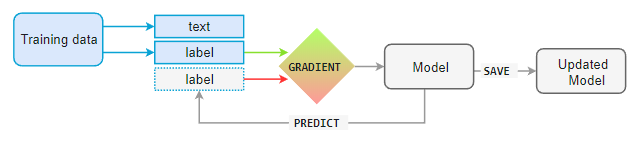

### Step-1 : Creation of Training Data

#### Annotate your data

https://prodi.gy/docs/named-entity-recognition

In [23]:
TEST_DATA=[('Все видео генерил три раза (что, вообще говоря, маловато) и использовал один и тот же промпт из этой GPT', {'entities': [(101, 104, 'PRODUCT')]}),
('Скажу честно, я топил за Luma, но после того, как Runway Gen-3 расправился с этим апельсином, мое мнение резко переменилось', {'entities': [(25, 29, 'PRODUCT'), (50, 62, 'PRODUCT')]}),
('Luma разрезала апельсин только после добавления endframe, хотя Gen-3 справился с первой попытки', {'entities': [(0, 4, 'PRODUCT'), (63, 68, 'PRODUCT')]}),
('У Runway есть анлим за 95 баксов, и если вы вот реально угарели по этой теме, то Runway ноубрейнер чойс', {'entities': [(2, 8, 'ORG'), (23, 32, 'MONEY'), (2, 8, 'ORG')]}),
('Luma за $100 дает 480 генераций, что кажется много, но по сути из 30 минут сгенерированного видео юзабельными будут минут 6-10 от силы, чего хватит на пару-тройку клипов', {'entities': [(0, 4, 'PRODUCT'), (8, 12, 'MONEY')]}),
('А еще можно скинуться с корешами на акк Runway, а для отдельных задач юзать фри токены лума (пока фичу со start & end keyframes не завезли в gen-3), но я вам об этом не говорил🤭', {'entities': [(40, 46, 'ORG')]}),
('Runway дает более киношную и чистую картинку, но меньше движений', {'entities': [(0, 6, 'ORG')]}),
('Luma, судя по первому видео, дает больше движений, но и больше артефактов', {'entities': [(0, 4, 'PRODUCT')]}),
('А еще в бесплатной версии ну оочень долгая очередь, как в первые дни релиза Luma (ждал ночь)', {'entities': [(76, 80, 'PRODUCT')]}),
('Пока мой выбор за Runway GEN-3', {'entities': [(18, 30, 'PRODUCT')]}),
('Это как MidJourney, ради красоты стоит потерпеть', {'entities': [(8, 18, 'PRODUCT')]}),
('@ai_newz Контролнеты для FLUX.1 поражают', {'entities': [(25, 31, 'PRODUCT')]}),
('Тут использовали Depth Controlnet для генерации фреймов и Luma для синтеза переходов между генерациями', {'entities': [(58, 62, 'PRODUCT')]}),
('Autodidax - туториал который проведёт вас сквозь имплементацию ядра Jax - библиотеки от Google, которая пришла на смену Tensorflow', {'entities': [(0, 9, 'PRODUCT'), (68, 71, 'PRODUCT'), (88, 94, 'ORG'), (120, 130, 'PRODUCT')]}),
('Сейчас Jax это основной конкурент PyTorch и доминирует в RL сфере', {'entities': [(7, 10, 'PRODUCT'), (34, 41, 'PRODUCT')]}),
('В основном это из-за DeepMind, но ещё на Jax возможно делать симуляцию окружения для ИИ агентов с безумной скоростью', {'entities': [(21, 29, 'ORG'), (41, 44, 'PRODUCT')]}),
('За пределами RL - XAI и Midjourney полностью на Jax, многие компании вроде Apple используют преимущественно Jax (модели для Apple Intelligence тренировались при помощи AXLearn, который работает поверх Jax)', {'entities': [(18, 21, 'ORG'), (24, 34, 'PRODUCT'), (48, 51, 'PRODUCT'), (75, 80, 'ORG'), (48, 51, 'PRODUCT'), (124, 142, 'PRODUCT'), (168, 175, 'PRODUCT'), (48, 51, 'PRODUCT')]}),
('Если autodidax кажется вам сложным - у Андрея Карпатого есть туториал о создании micrograd', {'entities': [(5, 14, 'PRODUCT'), (39, 55, 'PER'), (81, 90, 'PRODUCT')]}),
('А настоящие хардкорщики могут покопаться в tinygrad - полностью функционирующем ML фреймворке в менее чем 9000 строк кода', {'entities': [(43, 51, 'PRODUCT')]}),
('Несмотря на небольшую кодбазу фреймворк запускается на видяхах Nvidia, AMD, Intel, Qualcomm и Apple', {'entities': [(63, 69, 'ORG'), (71, 74, 'ORG'), (76, 81, 'ORG'), (83, 91, 'ORG'), (94, 99, 'ORG')]}),
('Если хочется разобраться во всей тематике поглубже, то есть университетский курс о компиляции нейронок от автора Apache TVM (', {'entities': [(113, 123, 'PRODUCT')]}),
('Три недели прошло с последнего дайджеста, возвращаюсь к формату', {'entities': [(0, 10, 'DATE')]}),
('- Обновления Qwen 2 - один тюн теперь SOTA по математике, а другой понимает аудио', {'entities': [(13, 19, 'PRODUCT'), (38, 42, 'PRODUCT')]}),
('- ReBased – новая архитектура линейного трансформера', {'entities': [(2, 9, 'PRODUCT')]}),
('Это лучший, на данный момент, вариант Linear Transformer, исправляющий ошибки прошлых архитектур', {'entities': [(38, 56, 'PRODUCT')]}),
('- Grok 2 - ещё одна модель уровня GPT-4', {'entities': [(2, 8, 'PRODUCT'), (34, 39, 'PRODUCT')]}),
('В пантеон OpenAI, Anthropic, Google и Meta добавился XAI', {'entities': [(10, 16, 'ORG'), (18, 27, 'ORG'), (29, 35, 'ORG'), (38, 42, 'ORG'), (53, 56, 'ORG')]}),
('- Context Caching для Claude - любимая фича для удешевления моделей наконец-то заехала в клода, но кэш живёт лишь пять минут, что ограничивает юзкейсы', {'entities': [(22, 28, 'PRODUCT')]}),
('- Презентация гугла - показали полуработающие демо Gemini, новые телефоны Pixel и кучу фич для их камер', {'entities': [(51, 57, 'PRODUCT'), (74, 79, 'PRODUCT')]}),
('- Команда из РФ победила на международной олимпиаде по AI - ребята молодцы, а задачки оттуда это хорошая практика даже для опытных спецов', {'entities': [(13, 15, 'LOC'), (55, 57, 'MISC')]}),
('- Поработал из офиса Meta в Варшаве - очень красиво, согласитесь', {'entities': [(21, 25, 'ORG'), (28, 35, 'LOC')]}),
('Да и в целом в Варшаве очень понравилось', {'entities': [(15, 22, 'LOC')]}),
('В последние годы сложно найти сферу в ML где SOTA это не трансформер', {'entities': [(45, 49, 'PRODUCT')]}),
('Основные кандидаты на замену сейчас это State Space Models (SSM) и так называемые Linear Transformers (которые в пейперах часто называют просто трансформерами, что неописуемо бесит)', {'entities': [(40, 58, 'PRODUCT'), (82, 101, 'PRODUCT')]}),
('Где-то на фоне ещё есть перерождение RNN в виде RWKV и CNN в виде Hyena', {'entities': [(37, 40, 'PRODUCT'), (48, 52, 'PRODUCT'), (55, 58, 'PRODUCT'), (66, 71, 'PRODUCT')]}),
('Тут появляется BASED - модель, которая использует квадратичную аппроксимацию экспоненты в качестве кернела', {'entities': [(15, 20, 'PRODUCT')]}),
('Но у BASED есть свои проблемы - она не очень хорошо игнорирует ненужные токены в длинных последовательностях', {'entities': [(5, 10, 'PRODUCT')]}),
('И тут на сцену выходит ReBased - эволюция BASED', {'entities': [(23, 30, 'PRODUCT'), (42, 47, 'PRODUCT')]}),
('Ресерчеры из T-Bank AI Research провели анализ недостатков BASED и внесли несколько изменений, исправляющих недостатки', {'entities': [(13, 31, 'ORG'), (59, 64, 'PRODUCT')]}),
('ReBased добавляет обучаемые параметры в кернел и нормализацию перед его применением', {'entities': [(0, 7, 'PRODUCT')]}),
('ReBased показывает результаты лучше BASED на задачах ассоциативного восстановления и языкового моделирования, особенно когда дело касается длинных контекстов', {'entities': [(0, 7, 'PRODUCT'), (36, 41, 'PRODUCT')]}),
('Поиск продолжается, но подход интересный - статью на этой неделе презентовали на ACL - главной конференции по NLP в мире', {'entities': [(81, 84, 'MISC'), (110, 113, 'MISC')]}),
('@ai_newz В этом году впервые прошла Международная олимпиада по искусственному интеллекту для школьников (IOAI) в Болгарии с 9 по 14 августа', {'entities': [(36, 88, 'MISC'), (113, 121, 'LOC'), (124, 139, 'DATE')]}),
('- Команда из России (школа Летово) одержала победу в общем зачете', {'entities': [(13, 19, 'LOC')]}),
('По сумме баллов за оба конкурса ребята обошли конкурентов из 39 стран, включая Китай, Японию, Канаду, Швецию, Нидерланды, США', {'entities': [(79, 84, 'LOC'), (86, 92, 'LOC'), (94, 100, 'LOC'), (102, 108, 'LOC'), (110, 120, 'LOC'), (122, 125, 'LOC')]}),
('В команду победителей вошли Никита Курлаев, Андрей Грицаев, Андрей Громыко и Анастасия Гайнуллина', {'entities': [(28, 42, 'PER'), (44, 58, 'PER'), (60, 74, 'PER'), (77, 97, 'PER')]}),
('К олимпиаде детей готовили преподаватели Центрального Университета, основанного при поддержке т-банка и других крупных компаний', {'entities': [(41, 66, 'ORG'), (94, 101, 'ORG')]}),
('Необычный формат олимпиады (не похоже на IMO или IOI): Задачи были в стиле Kaggle, но с ограничениями по времени и ресурсам', {'entities': [(41, 44, 'MISC'), (75, 81, 'PRODUCT')]}),
('- В ML задаче требовалось создать лучшие фичи для небольшого DecisionTree', {'entities': [(4, 6, 'MISC'), (61, 73, 'PRODUCT')]}),
('- В NLP задаче — зафайнтюнить mBERT для нового языка с зашифрованными текстами', {'entities': [(4, 7, 'MISC'), (30, 35, 'PRODUCT')]}),
('- В CV задаче — заставить miniSD всегда дорисовывать гидрант, если на картинке есть корова', {'entities': [(4, 6, 'MISC'), (26, 32, 'PRODUCT')]}),
('На сайте олимпиады, кстати, собрано много полезных ресурсов для подготовки, многие из которых хорошо подойдут всем, кто вкатывается в ML по работе: https://ioai-official.org/how-to-prepare/', {'entities': [(134, 136, 'MISC')]}),
('@ai_newz Пока у ChatGPT лаги, давайте поговорим о ненадёжных "сливах', {'entities': [(16, 23, 'PRODUCT')]}),
('Всю прошлую неделю у меня комментарии, как и твиттер, ломились от 🍓🍓🍓', {'entities': [(4, 18, 'DATE')]}),
('➖ sus-column-r на арене - это модель от OpenAI на основе новых прорывов', {'entities': [(2, 14, 'PRODUCT'), (40, 46, 'ORG')]}),
('В итоге оказалось, что это просто Grok-2 от XAI', {'entities': [(34, 40, 'PRODUCT'), (44, 47, 'ORG')]}),
('➖ Релиз gpt-4o-large-0813 13 августа в 10 утра по Калифорнии', {'entities': [(8, 25, 'PRODUCT'), (26, 36, 'DATE'), (39, 46, 'DATE'), (50, 60, 'LOC')]}),
('В 10 утра по Калифорнии была только презентация гугла, на которой я благополучно заснул', {'entities': [(2, 9, 'DATE'), (13, 23, 'LOC')]}),
('Из относительно качественных аккаунтов (про слухи и слив) можете подписаться на Jimmy Apples, хотя там в последнее время был контент о том, как он проходил Red Dead Redemption 2', {'entities': [(80, 92, 'PER'), (156, 177, 'PRODUCT')]}),
('Reve только вышли на рынок, а их модель Halfmoon 🌗 уже ТОП-1 на Image Generation Arena, обогнав Recraft V3, Imagen 3 и FLUX 1.1', {'entities': [(0, 4, 'ORG'), (40, 48, 'PRODUCT'), (96, 106, 'PRODUCT'), (108, 116, 'PRODUCT'), (119, 127, 'PRODUCT')]}),
('А вот про саму компанию мало чего понятно — известно лишь то, что их основали выходцы из Adobe Research', {'entities': [(89, 103, 'ORG')]}),
('Бесплатно дают 100 кредитов, 1 кредит = одна картинка, дальше они покупаются по $5 за 500 кредитов', {'entities': [(15, 27, 'MONEY'), (80, 82, 'MONEY'), (86, 98, 'MONEY')]}),
('И ждём ответку от Flux', {'entities': [(18, 22, 'PRODUCT')]}),
('@ai_newz Умная роборука за $110', {'entities': [(27, 31, 'MONEY')]}),
('Я уже писал про LeRobot — красавчики из Hugging Face продолжают пилить годноту для тех, кто хочет собрать и натренировать собственного робота дома', {'entities': [(16, 23, 'PRODUCT'), (40, 52, 'ORG')]}),
('Теперь есть SO-100 — роботизированная рука всего за $110', {'entities': [(12, 18, 'PRODUCT'), (52, 56, 'MONEY')]}),
('А ещё LeKiwi — та же рука, но уже на подвижной базе', {'entities': [(6, 12, 'PRODUCT')]}),
('Установка может показаться сложноватой для новичков, но если уметь читать инструкции и не боишься спросить у LLM, как завести код, справится даже гуманитарий', {'entities': [(109, 112, 'PRODUCT')]}),
('Вон, даже гуманоида за 300 баксов собрали (без учета привязанного к нему макбука)', {'entities': [(23, 33, 'MONEY')]}),
('Еще недавно добавили поддержку моделей вроде π0 и π0-FAST от Physical Intelligence — первых "фундаментальных" моделей для робототехники, которые понимают естественный язык и действия', {'entities': [(45, 47, 'PRODUCT'), (50, 57, 'PRODUCT'), (61, 82, 'ORG')]}),
('π0-FAST, кстати, в пять раз быстрее в обучении благодаря новой токенизации действий — это уже уровень, где робот может адаптироваться к новым задачам на лету (за день, хах)', {'entities': [(0, 7, 'PRODUCT')]}),
('Hugging Face недавно скооперировались с Yaak и выкатили Learning to Drive (L2D)', {'entities': [(0, 12, 'ORG'), (40, 44, 'ORG'), (56, 73, 'PRODUCT')]}),
('Всё это также будет использовано против вас в LeRobot', {'entities': [(46, 53, 'PRODUCT')]}),
('Гитхаб', {'entities': [(0, 6, 'ORG')]}),
('SO-100', {'entities': [(0, 6, 'PRODUCT')]}),
('LLM', {'entities': [(0, 3, 'PRODUCT')]}),
('- Mistral Small 3.1 — небольшой апдейт, по уровню чуть выше, чем Gemma 3, но с лицензией Apache 2.0', {'entities': [(2, 19, 'PRODUCT'), (65, 72, 'PRODUCT'), (89, 99, 'MISC')]}),
('- Move AI Gen 2 — motion tracking без спецкостюма', {'entities': [(2, 15, 'PRODUCT')]}),
('- Pika v2v — редактируем видео по текстовому запросу', {'entities': [(2, 10, 'PRODUCT')]}),
('Такое раньше мог только наш закрытый MovieGen, ну а здесь можно подергать самому', {'entities': [(37, 45, 'PRODUCT')]}),
('Правда, Pika традиционно с горсткой артефактов', {'entities': [(8, 12, 'PRODUCT')]}),
('- Blackwell Ultra — новые GPU от Nvidia в полтора раза мощнее предшественников', {'entities': [(2, 17, 'PRODUCT'), (26, 29, 'PRODUCT'), (33, 39, 'ORG')]}),
('@ai_newz Pika тизерят очередную фичу: v2v', {'entities': [(9, 13, 'PRODUCT')]}),
('На сей раз это что-то очень похожее на то, что делает наш MovieGen', {'entities': [(58, 66, 'PRODUCT')]}),
('У Pika модели всё же послабее, чем у текущих лидеров — Kling и Luma, не говоря уже про Veo 2', {'entities': [(2, 6, 'PRODUCT'), (55, 60, 'PRODUCT'), (63, 67, 'PRODUCT'), (87, 92, 'PRODUCT')]}),
('Мне нравится вектор развития Pika', {'entities': [(29, 33, 'PRODUCT')]}),
('Они, кажется, первыми придумали пресеты с нейроэффектами и ввели видеоэффекты типа Pikaditions, позволяющие вставлять в ролики новых персонажей или предметы просто по картинке', {'entities': [(83, 94, 'PRODUCT')]}),
('@ai_newz Blackwell Ultra — новые GPU от Nvidia', {'entities': [(9, 24, 'PRODUCT'), (33, 36, 'PRODUCT'), (40, 46, 'ORG')]}),
('В новые GB300 докинули памяти до 288 гигабайт, а компьют увеличили в полтора раза — с 10 Dense FP4 петафлопс в GB200, до 15 в GB300', {'entities': [(8, 13, 'PRODUCT'), (33, 45, 'PRODUCT'), (86, 98, 'PRODUCT'), (111, 116, 'PRODUCT'), (121, 123, 'PRODUCT'), (8, 13, 'PRODUCT')]}),
('Новые инструкции для аттеншна в два раза быстрее чем аттеншн на оригинальном Blackwell, ждём вайтпейпера с деталями', {'entities': [(77, 86, 'PRODUCT')]}),
('На основе GB300 будут и новые сервера — GB300 NVL72 и HGX B300 NVL16', {'entities': [(10, 15, 'PRODUCT'), (40, 51, 'PRODUCT'), (54, 68, 'PRODUCT')]}),
('В новом NVL72 теперь будет 20 терабайт видеопамяти, плюс 40 терабайт LPDDR5X, которые напрямую доступны GPU', {'entities': [(8, 13, 'PRODUCT'), (27, 38, 'PRODUCT'), (57, 68, 'PRODUCT'), (69, 76, 'PRODUCT'), (104, 107, 'PRODUCT')]}),
('Про цену ничего не сказали, но она явно выше 3 миллионов за GB200 NVL72', {'entities': [(45, 56, 'MONEY'), (60, 71, 'PRODUCT')]}),
('@ai_newz Mistral Small обновили', {'entities': [(9, 22, 'PRODUCT')]}),
('Mistral Small 3.1 обгоняет Gemma 3 по большинству бенчей, с особенно большим отрывом на мультимодальных бенчах', {'entities': [(0, 17, 'PRODUCT'), (27, 34, 'PRODUCT')]}),
('Да и с закрытыми дешёвыми моделями она хороша себя показывает — по мультимодальности Mistral Small рвёт 4o-mini и Haiku 3.5, но отстаёт от Flash 2.0', {'entities': [(85, 98, 'PRODUCT'), (104, 111, 'PRODUCT'), (114, 123, 'PRODUCT'), (139, 148, 'PRODUCT')]}),
('С текстом всё тоже неплохо, но разрыв с 4o-mini и Haiku 3.5 значительно меньше, а от Gemini модель по прежнему отстаёт', {'entities': [(40, 47, 'PRODUCT'), (50, 59, 'PRODUCT'), (85, 91, 'PRODUCT')]}),
('Модель быстрая — API выдаёт150 токенов в секунду — быстрее лишь Command A от Cohere и 2.0 Flash', {'entities': [(64, 73, 'PRODUCT'), (77, 83, 'ORG'), (86, 95, 'PRODUCT')]}),
('Что ещё важно — лицензия у них Apache 2.0, что означает полную свободу делать что угодно с моделью', {'entities': [(31, 41, 'MISC')]}),
('У той же Gemma 3 лицензия вирусная — под неё подпадают не только тюны, но и модели которые научили на основе данных из Gemma, что может стать проблемой', {'entities': [(9, 16, 'PRODUCT'), (9, 14, 'PRODUCT')]}),
('Зацените, что может Move AI Gen 2', {'entities': [(20, 33, 'PRODUCT')]}),
('Представьте, как весело актёрам: играешь Годзиллу и в реальном времени видишь себя, крушащего здания на экране, ведь всё это ещё цепляется к Unreal Engine 5', {'entities': [(141, 156, 'PRODUCT')]}),
('На сайте можно попробовать самому — дают 30 кредитов на 30 секунд видео', {'entities': [(41, 52, 'MONEY')]}),
('Подписка, правда, какая-то убер-дорогая: $15 за 180 кредитов', {'entities': [(41, 44, 'MONEY'), (48, 60, 'MONEY')]}),
('LLM', {'entities': [(0, 3, 'PRODUCT')]}),
('- Анонсы OpenAI – докинули удобных фич для API, в том числе computer use', {'entities': [(9, 15, 'ORG')]}),
('- Прямое включение – привет с Gemma Developer Day, смотрю на Gemma 3 из первых рук', {'entities': [(30, 49, 'MISC'), (61, 68, 'PRODUCT')]}),
('- Gemma 3 – топ-2 моделька в опенсорсе сразу после DeepSeek R1, удобно влезает в одну H100/A100 GPU в bf16', {'entities': [(2, 9, 'PRODUCT'), (51, 62, 'PRODUCT'), (96, 99, 'PRODUCT'), (102, 106, 'PRODUCT')]}),
('- T-lite и T-pro – челиксы запилили очень подробный техрепорт о тренировке LLM', {'entities': [(2, 8, 'PRODUCT'), (11, 16, 'PRODUCT'), (75, 78, 'PRODUCT')]}),
('- LanDiff – еще один видеогенератор, но на этот раз вместе с LLM', {'entities': [(2, 9, 'PRODUCT'), (61, 64, 'PRODUCT')]}),
('- Gemini Flash 2.0 – редактируем картинки текстом при помощи мультимодальной LLM', {'entities': [(2, 18, 'PRODUCT'), (77, 80, 'PRODUCT')]}),
('@ai_newz RIP Photoshop (нет)', {'entities': [(13, 22, 'PRODUCT')]}),
('Потестил я мультимодальную Gemini Flash 2.0 (Image Generation) Experimental', {'entities': [(27, 43, 'PRODUCT')]}),
('Мог бы сказать, что фотошоп в целом больше не нужен, но, блин, эта штука в туории может куда больше, чем мог бы Photoshop', {'entities': [(20, 27, 'PRODUCT'), (112, 121, 'PRODUCT')]}),
('Через ControlNet или inpainting так не сделаешь, потому что они изменяют детали — круассаны будут чуть другими или по-другому лежать', {'entities': [(6, 16, 'PRODUCT')]}),
('- Product photo — раньше нужно было бы тренить LoRA, чтобы получить пикчу №2', {'entities': [(47, 51, 'PRODUCT')]}),
('Повторяем лицо по одной фотографии так, словно это LoRA для Flux', {'entities': [(51, 55, 'PRODUCT'), (60, 64, 'PRODUCT')]}),
('Все это благодаря тому, что тут генерация изображений и LLM объединены вместе', {'entities': [(56, 59, 'PRODUCT')]}),
('В отличие от, например Flux или Imagen 3, тут картиночные токены выплевываются напрямую из LLM, без вызова диффузии', {'entities': [(23, 27, 'PRODUCT'), (32, 40, 'PRODUCT'), (91, 94, 'PRODUCT')]}),
('Qwen 2.5 Max — тестируем в чате', {'entities': [(0, 12, 'PRODUCT')]}),
('Это не лучше, чем R1, но есть много фич, например, генерация картинок и артефакты', {'entities': [(18, 20, 'PRODUCT')]}),
('- Mistral Small 3 — довольно маленькая, зато можно погонять на 3090', {'entities': [(2, 17, 'PRODUCT'), (63, 67, 'PRODUCT')]}),
('А лицензия Apache просто сок — можно юзать в проде без заморочек', {'entities': [(11, 17, 'MISC')]}),
('- Трамп про DeepSeek — успехи китайцев дошли даже до президента', {'entities': [(2, 7, 'PER'), (12, 20, 'PRODUCT')]}),
('- Сброс лимитов в Claude – датамайнеры нашли ещё не анонсированную фичу, которая обещает стать спасением для тех, кто любит потранжирить токены', {'entities': [(18, 24, 'PRODUCT')]}),
('- OpenAI o3-mini — главный релиз недели', {'entities': [(2, 8, 'ORG'), (9, 16, 'PRODUCT')]}),
('OpenAI не хочет отдавать первенство и поспешил с релизом', {'entities': [(0, 6, 'ORG')]}),
('- YuE — добротный генератор музыки с открытым исходным кодом', {'entities': [(2, 5, 'PRODUCT')]}),
('Станет ли он Stable Diffusion в мире музыки — пока неясно, но движение в этом направлении есть', {'entities': [(13, 29, 'PRODUCT')]}),
('- Qwen Video — таинственный видеогенератор из чата Qwen', {'entities': [(2, 12, 'PRODUCT'), (2, 6, 'ORG')]}),
('- Сходка на Бали — отчёт с фотками со встречи', {'entities': [(12, 16, 'LOC')]}),
('+ Анонс новой сходки сегодня (2 февраля) на Кипре', {'entities': [(44, 49, 'LOC')]}),
('- Моя первая принятая статья на ICLR — впервые работаю непосредственно над LLM', {'entities': [(32, 36, 'ORG'), (75, 78, 'PRODUCT')]}),
('Ускоряем 405B модель', {'entities': [(9, 13, 'PRODUCT')]}),
('- Сколько зарабатывает OpenAI', {'entities': [(23, 29, 'ORG')]}),
('— The Information слил примерные цифры', {'entities': [(2, 17, 'ORG')]}),
('@ai_newz Датамайнеры нашли в Claude (пока) не релизнутую возможность заплатить за "сброс" лимита сообщений, когда сообщения заканчиваются', {'entities': [(29, 35, 'PRODUCT')]}),
('У Claude последние несколько месяцев всё очень плохо с лимитами - они у Anthropic динамические и зависят от нагрузки, но серверов им не хватает и нагрузка там всегда очень высокая и лимиты крайне маленькие', {'entities': [(2, 8, 'PRODUCT'), (72, 81, 'ORG')]}),
('Но насколько нужно это сейчас, когда есть несколько серьёзных конкурентов без таких проблем с лимитами, куда и перешла значительная часть пользователей Claude - вопрос', {'entities': [(152, 158, 'PRODUCT')]}),
('А вам какой из новых способов монетизации низких лимитов больше нравится - этот, или подписка за $200', {'entities': [(97, 101, 'MONEY')]}),
('@ai_newz У ChatGPT 15,5 миллионов платных подписчиков', {'entities': [(11, 18, 'PRODUCT')]}),
('По данным The Information, с сентября добавилось более 4 миллионов подписчиков', {'entities': [(10, 25, 'ORG'), (29, 37, 'DATE')]}),
('Их доля общем количестве юзеров не растёт и составляет около 5%, а рост в количестве подписчиков обусловлен ростом юзербазы, которая за 2024 год утроилась', {'entities': [(136, 144, 'DATE')]}),
('При этом всём, по заявлениям Сэма Альтмана, подписка месяц назад была убыточной - OpenAI не расчитывали на такое активное использование', {'entities': [(29, 42, 'PER'), (82, 88, 'ORG')]}),
('При таких вводных подписка в $2,000 звучит уже не так безумно как несколько месяцев назад', {'entities': [(29, 35, 'MONEY')]}),
('Ещё быстрее подписок росла выручка с API - за 2024 она выросла в 7 раз, при том что компания несколько раз за 2024 год сбрасывала цены', {'entities': [(46, 50, 'DATE')]}),
('При этом всём, сколько именно зарабатывают сейчас OpenAI понять трудно', {'entities': [(50, 56, 'ORG')]}),
('Хоть мы и знаем, что за первое полугодие 2024 проекция выручки удвоилась до $3,4 миллиарда долларов в год, но как повлияли на выручку запуск Voice API и o1 - незвестно', {'entities': [(24, 45, 'DATE'), (76, 99, 'MONEY'), (153, 155, 'PRODUCT')]}),
('Зато известно что переговоры про новый раунд инвестиций размером в $40 миллиардов, ведутся уже при оценке компании в $260 миллиардов, что на 73% выше оценки в октябре 2024', {'entities': [(67, 81, 'MONEY'), (117, 132, 'MONEY'), (159, 171, 'DATE')]}),
('@ai_newz OpenAI выпустили o3-mini - бесплатно', {'entities': [(9, 15, 'ORG'), (26, 33, 'PRODUCT')]}),
('Также к o3-mini, в качестве эксперимента, прикрутили поиск', {'entities': [(8, 15, 'PRODUCT')]}),
('Цену скинули в три раза - стоит новая модель $1.10/$4.40 за миллион токенов, что лишь немногим дороже R1 с официального API (и дешевле многих неофициальных)', {'entities': [(45, 56, 'MONEY'), (102, 104, 'PRODUCT')]}),
('У новой модели есть три режима работы: \n(1) быстрый режим low compute,\n(2) обходящий o1-mini режим medium (всё равно на 24% быстрее),\n(3) и опережающий o1 на большинстве бенчей, более медленный режим high compute', {'entities': [(87, 94, 'PRODUCT')]}),
('Есть и нюансы - как и оригинальная o1-mini, o3-mini не поддерживает мультимодальный ввод, а одну из требующих агентности задач модель полностью провалила - использовала bash вместо питона не смотря на все попытки уговорить её это не делать', {'entities': [(35, 42, 'PRODUCT'), (44, 51, 'PRODUCT')]}),
('Ощущается как OpenAI задвигались, когда появилась конкуренция - и цены сбрасывают, и доступ бесплатным юзерам дают, и поиск прикручивают', {'entities': [(14, 20, 'ORG')]}),
('@ai_newz Qwen Video', {'entities': [(9, 19, 'PRODUCT')]}),
('Пару дней назад я писал про Qwen-2.5-Max – вот тут', {'entities': [(28, 40, 'PRODUCT')]}),
('Теперь доступ к видео есть почти у всех (в ЕС не работает, работает под американским и британским VPN)', {'entities': [(43, 45, 'LOC')]}),
('Подробностей про эту модельку нет от слова совсем, только текст на вотермарке – TONGYI WANX', {'entities': [(80, 91, 'MISC')]}),
('Можно было бы подумать, что это Kling 1.6 или Minimax, подключенный по API, но Qwen лепит свою вотермарку на видосы, да еще и генерит их бесплатно', {'entities': [(32, 41, 'PRODUCT'), (46, 53, 'PRODUCT'), (79, 83, 'ORG')]}),
('Кто-то предположил, что это может быть новый Minimax, они вроде бы связаны с Qwen через Alibaba', {'entities': [(45, 52, 'PRODUCT'), (77, 81, 'ORG'), (88, 95, 'ORG')]}),
('Как думаете, это новая безымянная модель от Qwen или что-то из уже известных', {'entities': [(44, 48, 'ORG')]}),
('Нашу статейку приняли на ICLR – spotlight', {'entities': [(25, 29, 'ORG')]}),
('Ну, и кстати, я впервые сабмитил что-то на ICLR, до этого были либо конференции по зрению либо NeurIPS', {'entities': [(43, 47, 'ORG'), (95, 102, 'ORG')]}),
('Это моя первая статья непосредственно по LLM, мы там представляем новый метод по значительному ускорению инференса 405-миллиардной модели', {'entities': [(41, 44, 'PRODUCT')]}),
('@ai_newz Mistral Small 3', {'entities': [(9, 24, 'PRODUCT')]}),
('О, вот и новая моделька от Mistral, от который уже несколько месяцев не было опенсорс релизов', {'entities': [(27, 34, 'ORG')]}),
('24B, по бенчам сравнивают с Llama 3.3 и Qwen 2.5 32B', {'entities': [(0, 3, 'PRODUCT'), (28, 37, 'PRODUCT'), (40, 52, 'PRODUCT')]}),
('Хорошая новость - лицензия Apache, так что с моделью можно делать вообще что угодно', {'entities': [(27, 33, 'MISC')]}),
('@ai_newz Фотоотчет с тусовки "эйай ньюз" на Бали', {'entities': [(44, 48, 'LOC')]}),
('Выкладываю запоздалые фоточки с оффлайн встречи 3 Января, которую мы провели на Бали', {'entities': [(48, 56, 'DATE'), (80, 84, 'LOC')]}),
('Как всегда было очень круто - интересные люди (не обошлось и без присущих Бали приколов), классное пространство (отдельное спасибо Ash Nuanu), и глубокие разговоры про AI', {'entities': [(74, 78, 'LOC')]}),
('Поэтому, пользуясь случаем, хочу анонсировать, что я буду на Кипре, в Лимассоле на этих выходных и хочу там тоже организовать сходку', {'entities': [(61, 66, 'LOC'), (70, 79, 'LOC')]}),
('Ориентировочно в Вск вечером 2.02.2025', {'entities': [(17, 38, 'DATE')]}),
('За подробностями присоединяйтесь к Кипрскому чату, если вы на Кипре', {'entities': [(35, 44, 'LOC'), (62, 67, 'LOC')]}),
('Правильно, китайцы YuE — по-русски йе', {'entities': [(19, 22, 'PRODUCT')]}),
('По звуку похоже скорее на Suno v2, но и это уже очень хорошо', {'entities': [(26, 33, 'PRODUCT')]}),
('Потребуется только 24 GB VRAM, то есть 4090 может осилить', {'entities': [(19, 24, 'PRODUCT'), (39, 43, 'PRODUCT')]}),
('@ai_newz Qwen-2.5-Max - китайцам тоже сложно конкурировать с DeepSeek', {'entities': [(9, 21, 'PRODUCT'), (61, 69, 'PRODUCT')]}),
('За модель просят 10 долларов за миллион токенов на вход и 30 долларов за миллион токенов на выход', {'entities': [(17, 28, 'MONEY'), (58, 69, 'MONEY')]}),
('Это, если что, в разы дороже чем все конкуренты - в 2.5x дороже чем Sonnet и аж в 30x дороже DeepSeek V3', {'entities': [(68, 74, 'PRODUCT'), (93, 104, 'PRODUCT')]}),
('Причём Qwen тут не предлагает никаких фич для оптимизации цен, даже тех, что уже стали стандартом', {'entities': [(7, 11, 'ORG')]}),
('Основное достоинство модели при такой цене - то, что её главный конкурент в Китае находится под жуткой нагрузкой уже второй день и не может выдержать всех желающих', {'entities': [(76, 81, 'LOC')]}),
('Ко всему прочему это закрытая модель, как и все современные MoE модельки Qwen', {'entities': [(73, 77, 'ORG')]}),
('Хух, в Китае наступил Китайский Новый год и релизов от них должно стать чуть меньше', {'entities': [(7, 12, 'LOC'), (22, 41, 'DATE')]}),
('@ai_newz Хайп по DeepSeek дошёл до Трампа', {'entities': [(17, 25, 'PRODUCT'), (35, 41, 'PER')]}),
('- Три опенсорс модели для русского языка — LLM, текстовый эмбеддинг и speech2text', {'entities': [(43, 46, 'PRODUCT')]}),
('- Бесплатный GitHub Copilot — 2000 дополнений кода на месяц в VS Code', {'entities': [(13, 27, 'PRODUCT'), (30, 34, 'MISC'), (62, 69, 'PRODUCT')]}),
('- Veo 2 — Google подготовились к анонсам OpenAI лучше, чем сами OpenAI', {'entities': [(2, 7, 'PRODUCT'), (10, 16, 'ORG'), (41, 47, 'ORG'), (41, 47, 'ORG')]}),
('Их text2video моделька по тестам (и теперь уже по зрительским симпатиям) опережает недавно вышедшую и теперь безлимитно доступную даже в базовой подписке Sora', {'entities': [(154, 158, 'PRODUCT')]}),
('- ElevenLabs Flash 2.5 — научились генерить голоса в реальном времени, довольно правдоподобно, но это, конечно, не Voice Mod', {'entities': [(2, 22, 'PRODUCT'), (115, 124, 'PRODUCT')]}),
('- Pika 2.0 бесплатно — кажется, поезд уже ушёл', {'entities': [(2, 10, 'PRODUCT')]}),
('Но не расстраивайтесь, Pika, как всегда, облажались и не завезли компьюта на такое количество народа', {'entities': [(23, 27, 'PRODUCT')]}),
('@ai_newz А вот и несколько задачек из ARC-AGI, на которых валится o3, даже в high-compute режиме (где на одну задачу уходят десятки миллионов токенов, стоимостью в несколько тысяч долларов)', {'entities': [(38, 45, 'MISC'), (66, 68, 'PRODUCT')]}),
('@ai_newz Прогнать o3 на ARC-AGI стоит до полутора миллиона долларов', {'entities': [(18, 20, 'PRODUCT'), (24, 31, 'MISC')]}),
('OpenAI запретили публиковать такие цены напрямую, но high-compute режим использует в 172 раза больше вычислений чем low-compute режим, цену которого мы уже знаем (8689 долларов)', {'entities': [(0, 6, 'ORG')]}),
('@ai_newz o3 и o3-mini - разрыв бенчмарков', {'entities': [(9, 11, 'PRODUCT'), (14, 21, 'PRODUCT')]}),
('Это ещё не AGI, но точно SOTA на всём что только можно', {'entities': [(11, 14, 'MISC'), (25, 29, 'MISC')]}),
('Стоимость тоже гигантская - на решение одного единственного таска могут уйти тысячи долларов', {'entities': [(77, 92, 'MONEY')]}),
('🎓 SOTA результаты по Frontier Math выросли с 2% до 25%', {'entities': [(2, 6, 'MISC')]}),
('💻 На SWE-Bench модель набрала 71,7%', {'entities': [(5, 14, 'MISC')]}),
('Чтобы вы понимали, в этом году стартап смог поднять 200 миллионов долларов с результатами 13,86%', {'entities': [(52, 74, 'MONEY')]}),
('👨‍💻 ELO на Codeforces - 2727, в мире всего у 150 человек больше ELO', {'entities': [(11, 21, 'MISC')]}),
('🔥На ARC-AGI модель набрала 87,5%, бенчмарк пять лет не могли покорить', {'entities': [(4, 11, 'MISC'), (43, 51, 'DATE')]}),
('Авторы уже партнёрятся с OpenAI чтобы создать вторую версию бенча', {'entities': [(25, 31, 'ORG')]}),
('👨‍🎓 На GPQA и AIME тоже очень хороший прогресс', {'entities': [(7, 11, 'MISC'), (14, 18, 'MISC')]}),
('Сегодня дают доступ ресёрчерам безопасности к o3-mini, простым смертным доступ к o3-mini дадут в конце января, к o3 чуть позже', {'entities': [(46, 53, 'PRODUCT'), (46, 53, 'PRODUCT'), (103, 109, 'DATE')]}),
('@ai_newz Вчера Google показал превью своего конкурента o1', {'entities': [(15, 21, 'ORG'), (55, 57, 'PRODUCT')]}),
('Пока он работает на основе Flash модели, а сам процесс размышлений показывается, в отличие от той же o1', {'entities': [(101, 103, 'PRODUCT')]}),
('Через пару месяцев у всей индустрии будет "o1 дома', {'entities': [(6, 18, 'DATE')]}),
('o1 - это сейчас последнее оставшееся большое технологическое преимущество OpenAI', {'entities': [(0, 2, 'PRODUCT'), (74, 80, 'ORG')]}),
('Veo 2 уверенно бьёт Sora, в генерации картинок их не обскакал только ленивый и т.д', {'entities': [(0, 5, 'PRODUCT'), (20, 24, 'PRODUCT')]}),
('А ведь у других лаб есть свои заметные преимущества, которые OpenAI всё не может реплицировать - к примеру, гигантский контекст Gemini и посттрейн магия Claude', {'entities': [(61, 67, 'ORG'), (128, 134, 'PRODUCT'), (153, 159, 'PRODUCT')]}),
('И в этот момент из OpenAI гуськом уходят очень заметные кадры - вон вчера ушёл автор оригинальной GPT, Alec Radford, перед ним ушли CTO и CRO компании', {'entities': [(19, 25, 'ORG'), (98, 101, 'PRODUCT'), (103, 115, 'PER'), (132, 135, 'ROLE'), (138, 141, 'ROLE')]}),
('И это только за последние три месяца, а до этого была вся драма с Ильёй Суцкевером', {'entities': [(26, 36, 'DATE'), (66, 82, 'PER')]}),
('Через полчаса у OpenAI будет последний из их 12 стримов', {'entities': [(16, 22, 'ORG')]}),
('По слухам, покажут o3 - сиквел к o1 (название O2 занято британским мобильным оператором)', {'entities': [(19, 21, 'PRODUCT'), (33, 35, 'PRODUCT'), (46, 48, 'PRODUCT')]}),
('Непонятно, хватит ли этого, чтобы заметно оторваться от Gemini 2.0 Ultra с включённым Thinking или от результатов гигантского трейнинг рана Anthropic, который уже несколько месяцев ощущают все пользователи Claude (другого объяснения этим всем лагам я не знаю)', {'entities': [(56, 72, 'PRODUCT'), (140, 149, 'ORG'), (163, 180, 'DATE'), (206, 212, 'PRODUCT')]}),
('Но главный вопрос - сможет ли OpenAI, с такой текущей кадров, совершить следующий большой прорыв и сохранить лидерство', {'entities': [(30, 36, 'ORG')]}),
('@ai_newz Pika 2.0 теперь можно попробовать бесплатно', {'entities': [(9, 17, 'PRODUCT')]}),
('Такой аттракцион будет продолжаться ещё 66 часов', {'entities': [(40, 48, 'DATE')]}),
('Звук генерится всего за 75 миллисекунд, предназначено это для риалтайм разговоров с ИИ', {'entities': [(24, 38, 'MISC')]}),
('Доступно только по API, а жаль, локальный хостинг позволил бы срезать несколько десятков миллисекунд сетевой задержки', {'entities': [(70, 100, 'MISC')]}),
('Хоть задержка у сетапа на основе такой модельки будет заметно побольше (но не факт), чем у омни-моделей вроде GPT-4o или Gemini 2.0 Flash, но тут больше и контроля - одни кастомные голоса чего стоят', {'entities': [(110, 116, 'PRODUCT'), (121, 137, 'PRODUCT')]}),
('@ai_newz 🤩 GitHub Copilot теперь бесплатный', {'entities': [(11, 25, 'PRODUCT')]}),
('Всем пользователям GitHub, при использовании VS Code, даётся 2000 дополнений кода в месяц и 50 сообщений к GPT-4o и Sonnet 3.5', {'entities': [(19, 25, 'ORG'), (45, 52, 'PRODUCT'), (61, 65, 'MISC'), (107, 113, 'PRODUCT'), (116, 126, 'PRODUCT')]}),
('Pro подписка за $10 всё ещё даёт сильно большие лимиты и доступ к o1-preview/o1-mini', {'entities': [(16, 19, 'MONEY')]}),
('@ai_newz 10 стрим OpenAI - ChatGPT теперь можно позвонить по телефону', {'entities': [(18, 24, 'ORG'), (27, 34, 'PRODUCT')]}),
('Пока только в США, остальные регионы могут писать ChatGPT через WhatsApp', {'entities': [(14, 17, 'LOC'), (50, 57, 'PRODUCT'), (64, 72, 'PRODUCT')]}),
('@ai_newz Тут по интернету пронеслась новость о том, что ключевой свидетель в деле против OpenAI о нарушении авторского права и бывший сотрудник все той же компании был найден мертвым у себя дома (совпадение?)', {'entities': [(89, 95, 'ORG')]}),
('Ведь всем и так понятно, что данные OpenAI парсят со всего интернета', {'entities': [(36, 42, 'ORG')]}),
('Никакие "пруфы" от инсайдера о том, что OpenAI крадёт чужие работы, этого не изменят', {'entities': [(40, 46, 'ORG')]}),
('Его главный довод из интервью с NYT', {'entities': [(32, 35, 'ORG')]}),
('@ai_newz 9 стрим OpenAI - апдейты API', {'entities': [(17, 23, 'ORG')]}),
('⭐️ Запустили полноценное API для o1: добавили structured outputs, картинки на вход, вызов функций и developer messages (дополнительный промпт по силе между системным и юзер промптом)', {'entities': [(33, 35, 'PRODUCT')]}),
('Ко всему этому o1 можно теперь указать насколько сильно модель должна думать над проблемой, что крайней полезно', {'entities': [(15, 17, 'PRODUCT')]}),
('Ещё хвастаются что полноценная o1 использует на 60% меньше токенов чем o1-preview', {'entities': [(31, 33, 'PRODUCT'), (71, 81, 'PRODUCT')]}),
('Ждём файнтюнов o1 и o1-pro в API', {'entities': [(15, 17, 'PRODUCT'), (20, 26, 'PRODUCT')]}),
('⏳Цену риалтайм API дропнули на 60% для обычной GPT-4o, но теперь риалтайм режим будет и у 4o-mini', {'entities': [(47, 53, 'PRODUCT')]}),
('Ещё в realtime режим API добавили поддержку WebRTC, должно улучшить стабильность и качество связи, плюс интегрировать будет куда проще', {'entities': [(44, 50, 'PRODUCT')]}),
('🪛 Добавили preference finetuning в API для GPT-4o, 4o-mini обещают скоро', {'entities': [(43, 49, 'PRODUCT'), (51, 58, 'PRODUCT')]}),
('@ai_newz Сбер выпустил в опенсорс три модели для русского языка', {'entities': [(9, 13, 'ORG')]}),
('Они все довольно небольшие и для их запуска не нужен сервер за сотни тысяч долларов, да и по качеству там всё в порядке', {'entities': [(63, 83, 'MONEY')]}),
('GigaChat Lite - MoE модель, с 3 миллиардами активных параметров', {'entities': [(0, 13, 'PRODUCT'), (16, 19, 'PRODUCT')]}),
('Она бьёт по качеству на русском все модели в 8B сегменте, но немного отстаёт от 8b на англоязычных бенчах', {'entities': [(45, 47, 'PRODUCT')]}),
('Длиной контекста тоже не обделили - модель поддерживает до 131 тысячи токенов контекста', {'entities': [(59, 69, 'MISC')]}),
('Это, кстати, первый опенсорс MoE для русского языка на моей памяти, причём это не что-то супер простое, типа Mixtral - там используется fine-grained MoE, вроде того что в DeepSeek V2', {'entities': [(29, 32, 'PRODUCT'), (109, 116, 'PRODUCT'), (29, 32, 'PRODUCT'), (171, 182, 'PRODUCT')]}),
('GigaEmbeddings - 2.5B Dense модель для эмбеддингов, которая бьёт даже 7B модели по качеству', {'entities': [(0, 14, 'PRODUCT'), (17, 21, 'PRODUCT'), (70, 72, 'PRODUCT')]}),
('GigaAMv2 - модель для распознавания речи, заточенная под русский, на бенчах лучше последних версий Whisper', {'entities': [(0, 8, 'PRODUCT'), (99, 106, 'PRODUCT')]}),
('Это важно, потому что в последних версиях, Whisper всё больше и больше тюнят чисто под английский, обделяя другие языки вниманием, хорошо иметь альтернативу', {'entities': [(43, 50, 'PRODUCT')]}),
('@ai_newz Veo 2 — новая SOTA видео-генерация', {'entities': [(9, 14, 'PRODUCT'), (23, 27, 'MISC')]}),
('Google стратегически дождались релиза Sora от OpenAI, чтобы сразу представить свою ответку', {'entities': [(0, 6, 'ORG'), (38, 42, 'PRODUCT'), (46, 52, 'ORG')]}),
('По их внутренним тестам, Veo 2 заметно опережает конкурентов', {'entities': [(25, 30, 'PRODUCT')]}),
('Правда, я бы не стал слепо доверять их тестам, согласно которым клинг чуть ли не лучше MovieGen и Sora', {'entities': [(87, 95, 'PRODUCT'), (98, 102, 'PRODUCT')]}),
('Как минимум, фламинго не путает передние и задние ноги и Veo 2 почти безошибочно справился с фигуристкой', {'entities': [(57, 62, 'PRODUCT')]}),
('Но с более динамичными сценами пока есть трудности, о чём сами признаются в DeepMind — см', {'entities': [(76, 84, 'ORG')]}),
('Длина видео — 8 секунд, золотая середина между 5-ю и 10-ю секундами, где уже чаще возникают артефакты', {'entities': [(14, 22, 'MISC')]}),
('@ai_newz В ChatGPT улучшили поиск', {'entities': [(11, 18, 'PRODUCT')]}),
('@ai_newz После релиза подписки от OpenAI за $200 баксов, сразу нашлись желающие сделать подписку за $500', {'entities': [(34, 40, 'ORG'), (44, 55, 'MONEY'), (100, 104, 'MONEY')]}),
('Столько берут за Devin - ИИ агента, который должен быть "ещё одним джуном в команде, на которого можно скидывать мелкие задачи', {'entities': [(17, 22, 'PRODUCT')]}),
('Взаимодействие идёт прямо через Slack или Github, причём за одну подписку доступ даётся сразу всей тиме', {'entities': [(32, 37, 'PRODUCT'), (42, 48, 'PRODUCT')]}),
('За эти $500, в месяц дают 250 ACU - в лучшем случае это чуть больше 60 часов работы агента', {'entities': [(7, 11, 'MONEY'), (15, 20, 'DATE'), (26, 29, 'MISC'), (68, 76, 'MISC')]}),
('Съесть их можно довольно быстро - Devin может делать несколько задач одновременно, а на отдельную задачу может спокойно уйти 3-5 часов (без гарантии успеха)', {'entities': [(34, 39, 'PRODUCT'), (125, 134, 'MISC')]}),
('Есть и юзеры у которых за $500 Devin смог сделать лишь два изменения в документации', {'entities': [(26, 30, 'MONEY'), (31, 36, 'PRODUCT')]}),
('За неполную неделю после релиза, Devin попал и в небольшой скандал с кибербезопасностью - прямо на стриме популярнейшего стримера Primagen, в Devin нашли неприятную уязвимость', {'entities': [(3, 18, 'DATE'), (33, 38, 'PRODUCT'), (130, 138, 'PER'), (33, 38, 'PRODUCT')]}),
('При использовании одной из фич, в ссылке, которую видно в адресной строке браузере, был ключ, позволяющий получить доступ ко всему к чему имеет доступ Devin', {'entities': [(151, 156, 'PRODUCT')]}),
('OpenAI выпустили в публичный доступ SearchGPT - всё ещё отстаёт от Perplexity по качеству, зато довольно быстрый, да и обычные пользователи про Perplexity и не слышали', {'entities': [(0, 6, 'ORG'), (36, 45, 'PRODUCT'), (67, 77, 'ORG'), (67, 77, 'ORG')]}),
('Почти одновременно с SearchGPT они выпустили возможность дистиллировать модели', {'entities': [(21, 30, 'PRODUCT')]}),
('То есть сначала можно отвечать моделью вроде o1 либо 4o, а потом дистиллировать их ответы для вашего конкретного юзкейса в модель поменьше, например 4o-mini', {'entities': [(45, 47, 'PRODUCT'), (53, 55, 'PRODUCT'), (149, 156, 'PRODUCT')]}),
('Ещё случайно сделали доступной полноценную o1 на пару часов - видимо релиз близко', {'entities': [(43, 45, 'PRODUCT')]}),
('В добавок к возможности загружать файлы и картинки, она заметно умнее o1-preview - та заметно проседает в математике и кодинге и отстаёт в этом даже от o1-mini', {'entities': [(70, 80, 'PRODUCT'), (152, 159, 'PRODUCT')]}),
('Интересно, GPT-5 так утечёт', {'entities': [(11, 16, 'PRODUCT')]}),
('Anthropic выпустили приложение Claude для Mac и Windows — в принципе, похоже на мобильное, возможно, готовятся к релизу функции computer use для подписчиков', {'entities': [(0, 9, 'ORG'), (31, 37, 'PRODUCT'), (42, 45, 'PRODUCT'), (48, 55, 'PRODUCT')]}),
('Кроме того, теперь Claude может понимать изображения в PDF', {'entities': [(19, 25, 'PRODUCT'), (55, 58, 'PRODUCT')]}),
('Google добавили Grounding для Gemini в AI Studio и API', {'entities': [(0, 6, 'ORG'), (16, 25, 'PRODUCT'), (30, 36, 'PRODUCT'), (39, 48, 'PRODUCT'), (51, 54, 'PRODUCT')]}),
('Теперь запросы к LLM можно привязывать к результатам поиска', {'entities': [(17, 20, 'PRODUCT')]}),
('Стоимость — $35 за тысячу запросов', {'entities': [(12, 15, 'MONEY')]}),
('Победители получили денежную премию в зависимости от номинации и ещё гранты в Yandex Cloud для расчетов + остальные плюшки', {'entities': [(78, 90, 'ORG')]}),
('@ai_newz Еще один миллиардер мульти-миллионер вышел из OpenAI на пенсию', {'entities': [(55, 61, 'ORG')]}),
('Chief Research Officer уволился из OpenAI', {'entities': [(0, 22, 'ROLE'), (35, 41, 'ORG')]}),
('Учитывая 10x рост оценки OpenAI c $15 млрд до $157 млрд только за последние 4 года, легко оценить что Бобу больше не нужно будет работать никогда', {'entities': [(25, 31, 'ORG'), (34, 42, 'MONEY'), (46, 55, 'MONEY'), (102, 106, 'PER')]}),
('@ai_newz Уже пару недель прошло с выставки Adobe MAX, а только сейчас дошли руки посмотреть, что там они наворотили', {'entities': [(43, 52, 'PRODUCT')]}),
('Причем нигде нет какого-то списка нововведений, поэтому я собрал свой дайджест новых фич с упором на GenAI, чтобы убедиться, что вы ничего не пропустили', {'entities': [(101, 106, 'PRODUCT')]}),
('Photoshop', {'entities': [(0, 9, 'PRODUCT')]}),
('Firefly 3', {'entities': [(0, 9, 'PRODUCT')]}),
('Юзается в Generative Fill и почти во всем, что идет далее', {'entities': [(10, 25, 'PRODUCT')]}),
('Project Clean Machine', {'entities': [(0, 21, 'PRODUCT')]}),
('Harmonize', {'entities': [(0, 9, 'PRODUCT')]}),
('По сути, релайт, но удобно встроенный в Photoshop', {'entities': [(40, 49, 'PRODUCT')]}),
('Substance 3D', {'entities': [(0, 12, 'PRODUCT')]}),
('Кроме того, Adobe научили Photoshop генерить гауссиан сплаты, которые потом можно апгрейдить до юзабельного состояния через встроенный img2img рефайнер', {'entities': [(12, 17, 'ORG'), (26, 35, 'PRODUCT')]}),
('Generative Work Space', {'entities': [(0, 21, 'PRODUCT')]}),
('Встроенный интерфейс Midjourney', {'entities': [(21, 31, 'PRODUCT')]}),
('Из приколов — знакомый нам IP Adapter на стиль и новый Composition Reference, ну и всякие пресетики для ньюбисов', {'entities': [(27, 37, 'PRODUCT'), (55, 76, 'PRODUCT')]}),
('Project Concept', {'entities': [(0, 15, 'PRODUCT')]}),
('Там же — realtime генерация с перемещением картинок как в Krea', {'entities': [(58, 62, 'ORG')]}),
('Короче, упор не в промптинг, а в смешивание картинок через img2img или IP-адаптеры всех мастей', {'entities': [(59, 66, 'PRODUCT')]}),
('Premiere Pro / After Effects', {'entities': [(0, 12, 'PRODUCT'), (15, 28, 'PRODUCT')]}),
('Firefly Video и Generative Extend', {'entities': [(0, 13, 'PRODUCT'), (16, 33, 'PRODUCT')]}),
('Project Super Sonic', {'entities': [(0, 19, 'PRODUCT')]}),
('Также улучшили выделение объектов по типу как в Segment Anything Video', {'entities': [(48, 70, 'PRODUCT')]}),
('Illustrator', {'entities': [(0, 11, 'PRODUCT')]}),
('Gen Shape Fill', {'entities': [(0, 14, 'PRODUCT')]}),
('Generative Fill для Illustrator', {'entities': [(0, 15, 'PRODUCT'), (20, 31, 'PRODUCT')]}),
('Наверное, лучший txt2svg, но нужно тестить', {'entities': [(17, 24, 'PRODUCT')]}),
('Rotatable Vectors', {'entities': [(0, 17, 'PRODUCT')]}),
('Идем ботать программирование под GPU', {'entities': [(33, 36, 'PRODUCT')]}),
('- Преза Apple', {'entities': [(8, 13, 'ORG')]}),
('Поговорили про поступление в ЕС, PhD программу в Meta и еще кучу ништяков, кто не успел — тот опоздал', {'entities': [(29, 31, 'LOC'), (49, 53, 'ORG')]}),
('@ai_newz Смотрите что делают с фортнайтом в новом video to video режиме Runway GEN-3', {'entities': [(72, 84, 'PRODUCT')]}),
('@ai_newz WebGPU puzzles', {'entities': [(9, 15, 'PRODUCT')]}),
('Если всегда было интересно, как работать с GPU, но вы не знали с чего начать, то принёс вам занятие на субботний вечер - WebGPU Puzzles', {'entities': [(43, 46, 'PRODUCT'), (121, 135, 'PRODUCT')]}),
('Это небольшой курс задачек, вдохновлённый оригинальными GPU Puzzles, но работает прямо в браузере', {'entities': [(56, 67, 'PRODUCT')]}),
('Из минусов - пока поддерживается только Chrome', {'entities': [(40, 46, 'PRODUCT')]}),
('Возможным это стало из-за gpu.cpp - библиотеки поверх WebGPU, упрощающей работу с компьютом', {'entities': [(26, 33, 'PRODUCT'), (54, 60, 'PRODUCT')]}),
('Answer AI с момента основания только и занимается тем, что создаёт такие мелочи, упрощающие жизнь', {'entities': [(0, 9, 'ORG')]}),
('Они первыми заставили QLora работать с FSDP, а недавно выпустили FastHTML - фреймворк для создания небольших веб-приложений на чистом Python, хорошая альтернатива Gradio', {'entities': [(22, 27, 'PRODUCT'), (39, 43, 'PRODUCT'), (65, 73, 'PRODUCT'), (134, 140, 'PRODUCT'), (163, 169, 'PRODUCT')]}),
('@ai_newz Наткнулся в Твиттере на шикарную визуализацию LLM', {'entities': [(55, 58, 'PRODUCT')]}),
('Как выяснилось, ей уже целый год, но для новичков это все ещё полезная штука', {'entities': [(29, 32, 'DATE')]}),
('По архитектурам там есть GPT-2, nanoGPT, GPT-2 XL, ну и GPT-3', {'entities': [(25, 30, 'PRODUCT'), (32, 39, 'PRODUCT'), (41, 49, 'PRODUCT'), (56, 61, 'PRODUCT')]}),
('@ai_newz А вот и прайсинг API новых моделек, понятно почему не выпускали это практически год - ждали пока упадёт цена инференса', {'entities': [(89, 92, 'DATE')]}),
('Цены на такое с использованием оригинальной GPT-4 или даже GPT-4 Turbo были бы астрономические', {'entities': [(44, 49, 'PRODUCT'), (59, 70, 'PRODUCT')]}),
('@ai_newz o1 - новая моделька от OpenAI, та самая 🍓', {'entities': [(32, 38, 'ORG'), (9, 11, 'PRODUCT')]}),
('Основной прорыв - научили модель скейлить инференс компьют через CoT, чем больше компьюта - тем лучше результаты', {'entities': [(65, 68, 'PRODUCT')]}),
('Доступ дают всем подписчикам ChatGPT и девам 5 тира (те кто потратили больше $1k на API)', {'entities': [(29, 36, 'PRODUCT'), (77, 80, 'MONEY')]}),
('Подписчикам будут давать по 30 сообщений с o1 и 50 сообщений с o1-mini в неделю', {'entities': [(43, 45, 'PRODUCT'), (63, 70, 'PRODUCT'), (73, 79, 'DATE')]}),
('SambaNova запустили Llama 3.1: 405B на подтверждённой скорости в 132 токена в секунду, 70B - на скорости 461 токен в секунду и 8B - на скорости 1066 токенов в секунду', {'entities': [(0, 9, 'ORG'), (20, 29, 'PRODUCT'), (31, 35, 'PRODUCT'), (87, 90, 'PRODUCT'), (127, 129, 'PRODUCT')]}),
('Это всё в bf16, без квантизации', {'entities': [(10, 14, 'PRODUCT')]}),
('На лидерборде Artificial Analysis у SambaNova точность 405B выше всех других провайдеров, но с моделями поменьше не всё так радужно', {'entities': [(14, 33, 'ORG'), (36, 45, 'ORG'), (55, 59, 'PRODUCT')]}),
('Я потестил их инференс, скорость и правда очень высокая - у меня 405B выдавала от 110 до 124 токенов в секунду, что очень близко к заявленным числам', {'entities': [(65, 69, 'PRODUCT')]}),
('8B доходила до 1100 токенов в секунду, а вот 70B, хоть и выдавала до 466 в секунду на пике (в твиттере стартап вообще заявлял скорость до 570 в секунду), но у части запросов скорость была аж в два раза меньше', {'entities': [(0, 2, 'PRODUCT'), (45, 48, 'PRODUCT')]}),
('Цена 405B - $5/mt на вход и $10/mt на выход', {'entities': [(5, 9, 'PRODUCT'), (12, 17, 'MONEY'), (28, 34, 'MONEY')]}),
('Так как в личке всем развернуто ответить сложно, я решил провести еще один стрим на тему учебы в Европе и того, что нужно для роли AI Scientist / AI Engineer в FAANG', {'entities': [(97, 103, 'LOC'), (131, 143, 'ROLE'), (146, 157, 'ROLE'), (160, 165, 'ORG')]}),
('Мы с ними обсудим учебу в Германии, Франции и Великобритании и наш опыт из первых рук', {'entities': [(26, 34, 'LOC'), (36, 43, 'LOC'), (46, 60, 'LOC')]}),
('Настя училась на бакалавриате и в магистратуре в Karlsruhe Institute of Technology (KIT) в Германии', {'entities': [(0, 5, 'PER'), (49, 88, 'ORG'), (91, 99, 'LOC')]}),
('Никита учился в магистратуре École Polytechnique во Франции, и на PhD в Лондоне на совместной программе между Meta и Oxford University', {'entities': [(0, 6, 'PER'), (29, 48, 'ORG'), (52, 59, 'LOC'), (72, 79, 'LOC'), (110, 114, 'ORG'), (117, 134, 'ORG')]}),
('- Поговорим про различные роли в AI: Research Scientist, Research Engineer, ML Engineer, Data Scientist', {'entities': [(33, 35, 'MISC'), (37, 55, 'ROLE'), (57, 74, 'ROLE'), (76, 87, 'ROLE'), (89, 103, 'ROLE')]}),
('- Про PhD, магистратуру и бакалавриат в разных странах Европы и чем они отличаются', {'entities': [(55, 61, 'LOC')]}),
('- Про PhD программу внутри Meta в Лондоне и Париже, и как туда попасть студенту', {'entities': [(27, 31, 'ORG'), (34, 41, 'LOC'), (44, 50, 'LOC')]}),
('- Про собеседования и поиск работы в AI', {'entities': [(37, 39, 'MISC')]}),
('@ai_newz Pixtral - 12B мультимодальная модель от Mistral', {'entities': [(9, 22, 'PRODUCT'), (49, 56, 'ORG')]}),
('Скорее всего, она основана на NeMo - параметры конфига совпадают', {'entities': [(30, 34, 'PRODUCT')]}),
('@ai_newz Гонка инференса продолжается - Groq вырывается вперёд', {'entities': [(40, 44, 'ORG')]}),
('Ускоренный инференс Llama 3.1 70B выдаёт более полутысячи токенов в секунду и скоро будет доступен всем пользователям', {'entities': [(20, 33, 'PRODUCT')]}),
('Правда, похоже с 8B моделью не получилось обогнать Cerebras - у них вся модель в один чип влезает, конкурировать сложно', {'entities': [(17, 19, 'PRODUCT'), (51, 59, 'ORG')]}),
('Кстати, CS-3 от Cerebras производят на 5нм техпроцессе, а вот чипы Groq произведены по 14нм техпроцессу 14LPP - ему в этом году стукнет 8 лет', {'entities': [(8, 12, 'PRODUCT'), (16, 24, 'ORG'), (67, 71, 'ORG'), (104, 109, 'PRODUCT'), (136, 141, 'DATE')]}),
('Второе поколение чипов будет уже на 4нм и выпустится до конца следующего года', {'entities': [(62, 77, 'DATE')]}),
('Одна H200 может выдать с Llama 2 70B более 4к токенов в секунду, но только при больших батчах, на одного пользователя там скорость сильно меньше сотни токенов в секунду', {'entities': [(5, 9, 'PRODUCT'), (25, 36, 'PRODUCT')]}),
('@ai_newz Началась презентация Apple, го смотреть', {'entities': [(30, 35, 'ORG')]}),
('Кучу всего уже показали на WWDC, но на эту презентацию явно что-то приберегли', {'entities': [(27, 31, 'MISC')]}),
('➖ Показали A18 - новый SOC на трёх нанометрах', {'entities': [(11, 14, 'PRODUCT')]}),
('GPU быстрее A16 на 40%', {'entities': [(0, 3, 'PRODUCT'), (12, 15, 'PRODUCT')]}),
('➖ Apple Intelligence будет досутпен в следующем месяце', {'entities': [(2, 20, 'PRODUCT'), (38, 54, 'DATE')]}),
('Пока только на английском, другие языки будут в следующем году', {'entities': [(48, 62, 'DATE')]}),
('Читайте людей у кого есть научные статьи в AI или тех, у кого есть проверенный солидный опыт', {'entities': [(43, 45, 'MISC')]}),
('Что на\xa0самом деле происходит с\xa0этой новой моделью Reflection-70B', {'entities': [(56, 70, 'PRODUCT')]}),
('Пару дней твиттерский показал свою новую языковую 70B-модель которая с\xa0рекордами прошла все бенчмарки (по\xa0его утверждению это был файнтюн Llama\xa03.1 70b ) и\xa0что такая\xa0же 400b будет вот-вот', {'entities': [(50, 60, 'PRODUCT'), (144, 160, 'PRODUCT')]}),
('Сообщество начало тестировать, разобрало модель по\xa0кусочкам и\xa0оказалось, что это файнтюн Llama 70b 3.0, а\xa0не\xa03.1', {'entities': [(95, 108, 'PRODUCT')]}),
('И\xa0причем не\xa0файнтюн модели целиком, а\xa0просто Lora-адаптер вмерженного в\xa0модель (тренируют кусочек модели который замещает часть модели)', {'entities': [(54, 66, 'PRODUCT')]}),
('Автор сказал, я\xa0вообще не\xa0помню что я\xa0там использовал\xa0— толи 3.0 толи 3.1, что такое Lora я\xa0не\xa0знаю, это не\xa0важно все\xa0— мы\xa0тут сейчас все заново поставим тренироваться, уже поставили точнее (зачем перетренивать модель которая по\xa0метрикам побила все бенчмарки пару дней назад мы не узнаем)', {'entities': [(97, 101, 'PRODUCT')]}),
('Пару часов назад автор публикует новую версию модели Reflection 70b e3 и сразу пишет, что с ней что-то не так: «Веса залились, но мы все еще проверяем, чтобы убедиться, что они правильные, прежде чем мы собираемся закончить день» – зачем заливать модель до тестов', {'entities': [(53, 70, 'PRODUCT')]}),
('Люди тестирующие веб версию Reflection 70b, обратили внимание, что она очень похожа на\xa0Sonnet\xa03.5\xa0— буквально токен в\xa0токен отдает ответы такие же ответы', {'entities': [(28, 42, 'PRODUCT')]}),
('Ну и для нейронок лучше читать проверенные ML-каналы, сейчас такое время, что все экспертами в АИ стали (я даже не про свой, я их часто сюда репощу) Нейродайджест за неделю (#34)', {'entities': [(95, 97, 'MISC'), (166, 172, 'DATE')]}),
('GPU', {'entities': [(0, 3, 'PRODUCT')]}),
('- Colossus XAI', {'entities': [(2, 14, 'PRODUCT')]}),
('Мегачад Маск уже запустил свой крупнейший кластер GPU для тренировки', {'entities': [(8, 12, 'PER'), (50, 53, 'PRODUCT')]}),
('- GPU кластер на 10 гигаватт', {'entities': [(2, 5, 'PRODUCT')]}),
('В данном случае стоит Turbo', {'entities': [(22, 27, 'PRODUCT')]}),
('Подозрительное письмо — "Корпоративным повелителям искусственного интеллекта", где обвиняют OpenAI в абьюзе бесплатного труда с целью пиара, ссылаясь на то, что лишь малая часть сгенерированных видео увидит свет', {'entities': [(92, 98, 'ORG')]}),
('В письме также утверждается, что они хотят помочь OpenAI стать более "open', {'entities': [(50, 56, 'ORG')]}),
('Водяной знак OpenAI, который, конечно, можно было подделать', {'entities': [(13, 19, 'ORG')]}),
('some sora-alpha-artists, Jake Elwes, Memo Akten, CROSSLUCID, Maribeth Rauh, Joel Simon, Jake Hartnell, Bea Ramos, Power Dada, aurèce vettier, acfp, Iannis Bardakos, 204 no-content | Cintia Aguiar Pinto & Dimitri De Jonghe, Emmanuelle Collet, XU Cheng, Operator, Katie Peyton Hofstadter', {'entities': [(25, 35, 'PER'), (37, 47, 'PER'), (49, 59, 'PER'), (61, 74, 'PER'), (76, 86, 'PER'), (88, 101, 'PER'), (103, 112, 'PER'), (114, 124, 'PER'), (126, 140, 'PER'), (142, 146, 'PER'), (148, 163, 'PER'), (182, 201, 'PER'), (204, 221, 'PER'), (223, 240, 'PER'), (242, 250, 'PER'), (252, 260, 'PER'), (262, 285, 'PER')]}),
('Sora ли это на самом деле или может это все часть маркетинговой кампании', {'entities': [(0, 4, 'PRODUCT')]}),
('@ai_newz SmolVLM - новая VLM с мизерным потреблением памяти', {'entities': [(9, 16, 'PRODUCT')]}),
('Huggingface заделали конкурента для moondream, маленькой 2B VLM, о которой я рассказывал на прошлой неделе', {'entities': [(0, 11, 'ORG'), (36, 45, 'PRODUCT')]}),
('К SmolLM 2 1.7B прицепили visual encoder от SigLIP', {'entities': [(2, 15, 'PRODUCT'), (44, 50, 'PRODUCT')]}),
('Модель при мизерном потреблении памяти еще и умудряется сильно обскакать moondream по качеству', {'entities': [(73, 82, 'PRODUCT')]}),
('Так мало памяти SmolVLM кушает из-за более эффективной токенизации картинок', {'entities': [(16, 23, 'PRODUCT')]}),
('Из-за большего размера патчей в картинках, на тот же промпт, где у SmolVLM уходит 1,2к токенов, у Qwen2-VL 2B уходит 16к', {'entities': [(67, 74, 'PRODUCT'), (98, 109, 'PRODUCT')]}),
('Таким образом, при одинаковом количестве параметров, SmolVLM вплоть до 5x быстрее и кушает почти в три раза меньше памяти', {'entities': [(53, 60, 'PRODUCT')]}),
('Размер патча в SigLip увкличили за счет применения к закодированной кантинке блока Pixel shuffle, который дополнительно уменьшает количество токенов в 9 раз', {'entities': [(15, 21, 'PRODUCT')]}),
('Pixel Shuffle преобразует квадраты из 3x3 токенов в один токен, перещая токены из spacial размерности в channels', {'entities': [(0, 13, 'PRODUCT')]}),
('Все же тут палка о двух концах - хоть Qwen и медленнее, но качество у него сильно выше', {'entities': [(38, 42, 'PRODUCT')]}),
('@ai_newz AI Assistant API или RAG из коробки', {'entities': [(9, 25, 'PRODUCT')]}),
('RAG – это хороший способ залить в нейронку свою базу данных и избежать галлюцинаций (вот здесь я писал подробнее про это)', {'entities': [(0, 3, 'PRODUCT')]}),
('RAG достаточно жестко задает контекст в виде фрагментов текста, на базе которых LLM должна скомпоновать ответ, то есть нейросеть не обучают на нем, а используют непосредственно в момент генерации', {'entities': [(0, 3, 'PRODUCT'), (80, 83, 'PRODUCT')]}),
('Имплементировать RAG самому, хоть и не очень сложно, но всё же требует специальных умений', {'entities': [(17, 20, 'PRODUCT')]}),
('Тут Яндекс решил ещё упростить жизнь разработчиками и внедрил RAG в свой API', {'entities': [(4, 10, 'ORG'), (62, 65, 'PRODUCT')]}),
('Ну а кроме этого, RAG полезен для работы с внутренней документацией, crm и прочими базами данных', {'entities': [(18, 21, 'PRODUCT')]}),
('@ai_newz INTELLECT-1 - первая децентрализованно натренированная LLM', {'entities': [(9, 20, 'PRODUCT'), (64, 67, 'PRODUCT')]}),
('В результате вышла 10B модель, натренированная на одном триллионе токенов, на что ушло около 80к H100-часов', {'entities': [(19, 22, 'PRODUCT')]}),
('В тренировке поучавствовало около 30 людей и организаций, компьютом скинулся даже Hugging Face', {'entities': [(82, 94, 'ORG')]}),
('Большую часть времени тренировки регистрация была закрыта, а поучаствовать можно было только задеплоив готовый образ на машине с 8xH100 80Gb через Prime Intellect, агрегатор GPU-провайдеров, который и организовал тренировку', {'entities': [(147, 162, 'ORG')]}),
('В следующих трейнинг ранах обещают открыть доступ к тренировке и с другого железа и не через Prime Intellect, ждём', {'entities': [(93, 108, 'ORG')]}),
('Но даже когда тренировать смогут все желающие на любом железе, на консьюмерских видеокартах поучаствовать вряд-ли выйдет - сейчас в 24 гига 4090, для тренировки, влезет максимум модель 3B класса', {'entities': [(140, 144, 'PRODUCT'), (185, 187, 'PRODUCT')]}),
('Вышла явно не SOTA - современные модели тренируют, используя на порядок больше данных', {'entities': [(14, 18, 'PRODUCT')]}),
('Если авторы сильно не налажали, результаты должны быть где-то в районе Llama 2 13B', {'entities': [(71, 82, 'PRODUCT')]}),
('Сделали такую распределённую тренировку возможной через слегка модифицированный DiLoCo, а код тренировки открыт и лежит на гитхабе', {'entities': [(80, 86, 'PRODUCT')]}),
('@ai_newz Anthropic показали универсальный способ общения LLM с внешним миром', {'entities': [(9, 18, 'ORG'), (57, 60, 'PRODUCT')]}),
('MCP (Model Context Protocol) - открытый протокол, позволяющий любой LLM получать доступ к инструментам и информации', {'entities': [(0, 3, 'PRODUCT'), (68, 71, 'PRODUCT')]}),
('В качестве демо Claude попросили создать веб-страницу, залить её на GitHub, создать issue и PR, что он успешно и сделал (показано на видео)', {'entities': [(16, 22, 'PRODUCT'), (68, 74, 'ORG')]}),
('Вдохновлялись LSP - протоколом, который позволил написать ядро интеграции языка с IDE один раз и использовать её повсюду, чем изменил рынок редакторов кода, дав маленьким проектам конкурировать с большими IDE', {'entities': [(14, 17, 'PRODUCT')]}),
('MCP работает по простой клиент-серверной архитектуре - приложения на основе LLM (клиенты) могут запрашивать информацию у серверов, а также пользоваться предоставленными серверами инструментами', {'entities': [(0, 3, 'PRODUCT'), (76, 79, 'PRODUCT')]}),
('Сделать сервер довольно просто - показанный в видео сервер для GitHub написали меньше чем за час', {'entities': [(63, 69, 'ORG')]}),
('Клиент пока что только один - Claude Desktop, а серверы нужно разворачивать своими руками локально', {'entities': [(30, 44, 'PRODUCT')]}),
('Потом обещают поддержку сторонних серверов - то есть в каком-то Notion будет кнопка "привязать Claude/ChatGPT/Gemini", через которую LLM будет даваться доступ к вашим данным', {'entities': [(64, 70, 'ORG'), (133, 136, 'PRODUCT')]}),
('Выглядит это куда интереснее, чем то как пытаются сделать интеграции OpenAI и Google в ChatGPT и Gemini', {'entities': [(69, 75, 'ORG'), (78, 84, 'ORG'), (87, 94, 'PRODUCT'), (97, 103, 'PRODUCT')]}),
('Во-первых, MCP более гибкий - авторы приложений могут встраивать туда MCP-серверы', {'entities': [(11, 14, 'PRODUCT')]}),
('Во-вторых, открытость протокола позволит более маленьким провайдерам, вроде Mistral или DeepSeek, использовать куда больше тулов, чем если бы они пытались сделать это сами', {'entities': [(76, 83, 'ORG'), (88, 96, 'ORG')]}),
('В качестве примеров для разработчиков Anthropic сделали 9 MCP-серверов - Slack, Google Maps, GitHub и ещё несколько', {'entities': [(38, 47, 'ORG'), (73, 78, 'ORG'), (80, 91, 'PRODUCT'), (93, 99, 'ORG')]}),
('Несколько компаний уже принялись делать и сторонних клиентов - к примеру, авторы Zed и Codeium', {'entities': [(81, 84, 'PRODUCT'), (87, 94, 'PRODUCT')]}),
('LLM', {'entities': [(0, 3, 'PRODUCT')]}),
('- DeepSeek 2.5 – лучший в своем деле', {'entities': [(2, 14, 'PRODUCT')]}),
('Подъехали неожиданные результаты с Copilot Arena', {'entities': [(35, 48, 'PRODUCT')]}),
('- Pixtral Large – Open source SOTA даже среди фронтирных моделей в мультимодалках, правда, и здесь не без подвоха', {'entities': [(2, 15, 'PRODUCT'), (30, 34, 'PRODUCT')]}),
('- Phi1.6B + SigLIP 400M vision encoder – мини-моделька на коленке оказалась лучшей в своем классе, или о том, как случайно сделать стартап, подняв $4,5M', {'entities': [(2, 9, 'PRODUCT'), (12, 23, 'PRODUCT')]}),
('- R1-Lite – опенсорс-аналог o1 от OpenAI', {'entities': [(2, 9, 'PRODUCT'), (34, 40, 'ORG')]}),
('- Llama 3.1 405B – на скорости 1k токенов/сек', {'entities': [(2, 16, 'PRODUCT')]}),
('Гонки инференса продолжаются, Cerebras пока лидирует', {'entities': [(30, 38, 'ORG')]}),
('- Бойня на арене – Gemini топ-1, тюн под ELO арены и прочие грязные приемчики', {'entities': [(19, 25, 'PRODUCT')]}),
('- Cтримец про Movie Gen от коллег', {'entities': [(14, 23, 'PRODUCT')]}),
('- FLUX.1 Tools – BFL снабдили нас всем необходимым для полноценного пользования FLUX, остальное – на плечах опенсорса', {'entities': [(2, 14, 'PRODUCT'), (2, 6, 'PRODUCT')]}),
('- Насильный манирейз от Amazon – сколько бы Anthropic ни отнекивались, все-таки взяли 4 миллиарда зеленых', {'entities': [(24, 30, 'ORG'), (44, 53, 'ORG'), (86, 97, 'MONEY')]}),
('- Мой доклад про CV – видос лежит на YouTube, сделал обзор на новиночки в вижене за 2023-2024', {'entities': [(17, 19, 'MISC')]}),
('Неделю назад Gemini-1114 заняла первое место на арене, обогнав все модели OpenAI', {'entities': [(13, 24, 'PRODUCT'), (74, 80, 'ORG')]}),
('В среду OpenAI ответили более новой версией 4o, Artificial Analysis протестировали её, и выводы печальные - хоть рейтинг на арене и растёт, бенчи MATH и GPQA просели ниже результатов июльской 4o-mini', {'entities': [(8, 14, 'ORG'), (44, 46, 'PRODUCT'), (48, 67, 'ORG'), (192, 199, 'PRODUCT')]}),
('Кстати, жёсткий тюн под арену не сильно помог OpenAI - новая 4o продержалась в топе всего лишь чуть больше суток', {'entities': [(46, 52, 'ORG'), (61, 63, 'PRODUCT')]}),
('В четверг вечером первое место заняла уже Gemini-Exp-1121', {'entities': [(42, 57, 'PRODUCT')]}),
('Под постом про набор интернов у меня спрашивали, чем лучше сейчас заняться в AI', {'entities': [(77, 79, 'MISC')]}),
('@ai_newz ☀️Computer Vision Research in 2023-2024: A Brief Overview', {'entities': [(39, 48, 'DATE')]}),
('Наконец-то выкладываю видео моего доклада на мини-конфе в Тбилиси в марте', {'entities': [(58, 65, 'LOC'), (68, 73, 'DATE')]}),
('Я рассказывал про основные интересности в Компьютерном Зрении (не GenAI), которые прозошли c марта 2023 до марта 2024', {'entities': [(42, 61, 'MISC'), (93, 103, 'DATE'), (107, 117, 'DATE')]}),
('За пол года SOTA уже, конечно, обновилась, но концептуально я разобрал много базированных статей 23-го и 24-го года, поэтому доклад все еще актуален', {'entities': [(12, 16, 'PRODUCT')]}),
('What matters in CV in 2024', {'entities': [(16, 18, 'MISC'), (22, 26, 'DATE')]}),
('Papers dicsussed:\n• NaViT: Vision Transformer for any Aspect Ratio and Resolution, NeurIPS 2023\n• Getting ViT in Shape: Scaling Laws for Compute-Optimal Model Design, NeurIPS 2023\n• ViT-22B: Scaling Vision Transformers to 22 Billion Parameters, ICML 2023\n• EVA-CLIP-18B: Scaling CLIP to 18 Billion Parameters\n• Data Filtering Networks (DFN), ICLR 2024\n• What does clip know about a red circle?\nvisual prompt engineering for VLMs, ICCV 2023\n• SigLip: Sigmoid Loss for Language Image Pre-Training, ICCV 2023\n• Image Captioners Are Scalable Vision Learners Too, NeurIPS 2023\n• The effectiveness of MAE pre-pretraining for billion-scale pretraining\n• DINOv2: Learning Robust Visual Features without Supervision, ICLR 2024\n• ImageBind: One Embedding Space To Bind Them All, CVPR 2023\n• LLaVa 1.0 & 1.5: Visual Instruction Tuning, NeurIPS 2023, Improved Baselines with Visual Instruction Tuning, arXiv 2023\n• PaLI-3 Vision Language Models: Smaller, Faster, Stronger\n• Segment Anything, ICCV 2023\n• CoTracker: It is Better to Track Together, ECCV 2024', {'entities': [(21, 26, 'PRODUCT'), (28, 46, 'PRODUCT'), (185, 192, 'PRODUCT'), (261, 273, 'PRODUCT'), (431, 435, 'PRODUCT'), (450, 456, 'PRODUCT'), (658, 664, 'PRODUCT'), (732, 741, 'PRODUCT'), (794, 803, 'PRODUCT'), (917, 923, 'PRODUCT'), (977, 993, 'PRODUCT'), (1008, 1017, 'PRODUCT'), (1051, 1060, 'DATE')]}),
('Ну, и на последок, вот фото со встречи эйай ньюз в Тбилиси', {'entities': [(51, 58, 'LOC')]}),
('@ai_newz Amazon инвестирует ещё 4 миллиарда в Anthropic', {'entities': [(9, 15, 'ORG'), (32, 43, 'MONEY'), (46, 55, 'ORG')]}),
('Слухи ходили уже какое-то время, я уже писал об этом раунде в начале ноября', {'entities': [(69, 75, 'DATE')]}),
('И вот свершилось - Amazon всё таки удалось заставить Anthropic тренировать на своих чипах Trainium, что позволит довести эти чипы до ума, а там, глядишь, и кто-то их начнёт арендовать у амазона', {'entities': [(19, 25, 'ORG'), (53, 62, 'ORG'), (90, 98, 'PRODUCT')]}),
('#technodeus #news #Nothing: Phone 3a показался на живых фотографиях', {'entities': [(28, 36, 'PRODUCT')]}),
('Презентация ориентировочно 4 марта', {'entities': [(27, 34, 'DATE')]}),
('Президентом всей корпорации назначен Хироки Тотоки, который отработал в компании уже 38 лет', {'entities': [(37, 50, 'PER')]}),
('А отдел Sony Interactive Entertainment возглавит Хидеаки Нисино, уже работавший на этой должности совместно с Германом Хульстом', {'entities': [(8, 38, 'ORG'), (49, 63, 'PER'), (110, 127, 'PER')]}),
('#technodeus #news #Apple: выпущен финальный билд iOS 18.3', {'entities': [(49, 57, 'PRODUCT')]}),
('#technodeus #news #ios #Apple: опубликованы новые фотки iPhone 16E', {'entities': [(56, 66, 'PRODUCT')]}),
('Первая и вторая - сравнение габаритов новинки и iPhone 16', {'entities': [(48, 57, 'PRODUCT')]}),
('#technodeus #news #iphone #Alibaba: представлены два чат-бота, обошедшие ChatGPT 4o в бенчмарке', {'entities': [(73, 83, 'PRODUCT')]}),
('Компания показала сразу две новые модели Qwen 2.5, которые способны работать с огромными текстами под миллион токенов (4о принимает только 128 тысяч)', {'entities': [(41, 49, 'PRODUCT')]}),
('#technodeus #news #Apple: HomePod уже на подходе', {'entities': [(26, 33, 'PRODUCT')]}),
('В основу ляжет А18, так что ещё и Apple Intelligence будет', {'entities': [(15, 18, 'PRODUCT'), (34, 52, 'PRODUCT')]}),
('#technodeus #news #ASUS: опубликован рекламный постер Zenfone 12 Ultra', {'entities': [(54, 70, 'PRODUCT')]}),
('Новинка будет полным аппаратным клоном ROG Phone 9: Snap 8 Elite, LTPO дисплей с диагональю 6,78" и АКБ на 5800 мАч с 65 Вт зарядкой', {'entities': [(39, 50, 'PRODUCT'), (52, 64, 'PRODUCT')]}),
('Ранее в сети появился патент на Galaxy Z Flip7 с тройной тыльной камерой, однако, по последним данным, корейцы все же будут использовать ту же конфигурацию камер, что и в Z Flip6', {'entities': [(32, 46, 'PRODUCT'), (171, 178, 'PRODUCT')]}),
('#technodeus #news #PS и #Xbox могут перестать поставляться в Россию', {'entities': [(61, 67, 'LOC')]}),
('Все дело в новом пакете санкций ЕС, в который могут быть включены устройства Sony и Microsoft, так как их можно использовать для управления БПЛА', {'entities': [(77, 81, 'ORG'), (84, 93, 'ORG')]}),
('Все решится 22 февраля', {'entities': [(12, 22, 'DATE')]}),
('#technodeus #news #sony #microsoft #DeepSeek: китайский ИИ обошел ChatGPT в AppStore', {'entities': [(66, 73, 'PRODUCT')]}),
('После внедрения в бота модели DeepSeek-V3 прошла целая волна слухов о сумасшедшей точности и скорости ответов', {'entities': [(30, 41, 'PRODUCT')]}),
('Правда, слава слегка раздута и модель даже вряд ли находится на одном уровне с последним ChatGPT', {'entities': [(89, 96, 'PRODUCT')]}),
('Пока известно, что Phone 3a Plus первым среди смартфонов Nothing получит перископ', {'entities': [(19, 32, 'PRODUCT'), (57, 64, 'ORG')]}),
('#technodeus #news #phone #Apple: iPhone 16E получит старую переднюю панель', {'entities': [(33, 43, 'PRODUCT')]}),
('#technodeus #news #iphone #Samsung: компания убрала Bluetooth у S Pen, чтобы заработать больше', {'entities': [(64, 69, 'PRODUCT'), (52, 61, 'PRODUCT')]}),
('Многие поклонники сильно расстроились, когда узнали, что базовый S Pen не получит модуль Bluetooth, но все было предусмотрено', {'entities': [(65, 70, 'PRODUCT'), (89, 98, 'PRODUCT')]}),
('Прокачанный стилус выйдет в продажу примерно за $50', {'entities': [(48, 51, 'MONEY')]}),
('Ждёте у нас Samsung S25', {'entities': [(12, 23, 'PRODUCT')]}),
('Компания Forest Neurotech планирует протестировать имплант на 30 пациентах с разными травмами головы', {'entities': [(9, 25, 'ORG')]}),
('#technodeus #news #Rockstar: GTA VI так долго находится в разработке, что в магазинах уже появляются пародии на нее', {'entities': [(29, 35, 'PRODUCT')]}),
('Студия Violarte выкатила Grand Taking Ages VI - игру-пародию, геймплей которой очень похож на GTA VI', {'entities': [(7, 15, 'ORG'), (25, 45, 'PRODUCT'), (94, 100, 'PRODUCT')]}),
('Из магазина PS игру Sony, конечно же, удалила, а вот Valve согласилась оставить ее в Steam', {'entities': [(12, 14, 'PRODUCT'), (20, 24, 'ORG'), (53, 58, 'ORG')]}),
('- Apple планирует серьезно поменять интерфейс системы в #iOS 19', {'entities': [(2, 7, 'ORG')]}),
('- #Samsung представила линейку флагманов S25 и анонсировала S25 Edge, который выйдет позже', {'entities': [(41, 44, 'PRODUCT'), (60, 68, 'PRODUCT')]}),
('- #Google решила серьезно сэкономить при создании бюджетного Pixel 10a', {'entities': [(61, 70, 'PRODUCT')]}),
('- #Apple готовится представить iPad 11, iPad Air на М3 и iPhone SE 4 (16E)', {'entities': [(31, 38, 'PRODUCT'), (40, 48, 'PRODUCT'), (52, 54, 'PRODUCT'), (57, 68, 'PRODUCT')]}),
('- Раскрыт дизайн гарнитуры Project Moohan, которая создаётся совместно Samsung и Google', {'entities': [(27, 41, 'PRODUCT'), (71, 78, 'ORG'), (81, 87, 'ORG')]}),
('- После анонса Samsung S25 Edge постепенно стали появляться характеристики смартфона', {'entities': [(15, 31, 'PRODUCT')]}),
('#technodeus #news #Xiaomi: опубликована первая живая фотка Xiaomi 15 Ultra', {'entities': [(59, 74, 'PRODUCT')]}),
('Презентация уже в феврале', {'entities': [(18, 25, 'DATE')]}),
('#technodeus #news #Samsung: постепенно появляются характеристики S25 Edge', {'entities': [(65, 73, 'PRODUCT')]}),
('Стало известно, что экран получит диагональ, как у Galaxy S25+ - 6,7', {'entities': [(51, 62, 'PRODUCT')]}),
('Процессор будет семиядерный Snap 8 Elite', {'entities': [(28, 40, 'PRODUCT')]}),
('#technodeus #news #Telegram: в iOS версии приложения могут ввести рекламу в чатах', {'entities': [(31, 34, 'PRODUCT')]}),
('#technodeus #news #OpenAI: анонсирована ещё одна часть ChatGPT - Operator', {'entities': [(55, 62, 'PRODUCT'), (65, 73, 'PRODUCT')]}),
('Эта нейросеть в сочетании с GPT 4o может выполнять рутинные и/или ежедневные задачи в браузере, при этом возвращая управление пользователю, когда надо ввести какие-то конфиденциальные данные', {'entities': [(28, 34, 'PRODUCT')]}),
('#technodeus #news #chatgpt #Apple: ещё не выпустив iPhone 17 Air, компания задала новый тренд', {'entities': [(51, 64, 'PRODUCT')]}),
('По данным инсайдеров, в этом году тонкие смартфоны выпустят еще и Xiaomi, Vivo и Oppo', {'entities': [(66, 72, 'ORG'), (74, 78, 'ORG'), (81, 85, 'ORG')]}),
('Правда, это будут среднебюджетные устройства, правда, АКБ там будут все же побольше, чем у Samsung S25 Edge с его 3900 мАч', {'entities': [(91, 107, 'PRODUCT')]}),
('#technodeus #news #samsung #Qualcomm: узнаем, в чем преимущество Snapdragon 8 Elite for Galaxy', {'entities': [(65, 94, 'PRODUCT')]}),
('По бенчмарку сразу был виден прирост пиковой частоты (4,47 против 4,32 ГГц), но помимо этого компания добавила сразу две технологии: ProScaler (качество апскейлинга выросло на 40%) и mDNIe (набор алгоритмов для улучшения энергоэффективности дисплея)', {'entities': [(133, 142, 'PRODUCT'), (183, 188, 'PRODUCT')]}),
('Название сего чуда - Huawei Pura 80 Ultra, презентация ожидается в апреле', {'entities': [(21, 41, 'PRODUCT'), (67, 73, 'DATE')]}),
('#technodeus #news #Samsung: компания раскрыла дизайн гарнитуры Project Moohan', {'entities': [(63, 77, 'PRODUCT')]}),
('Это рабочее название гарнитуры, которая создаётся совместно с Google уже не первый год', {'entities': [(62, 68, 'ORG')]}),
('Внешне новинки напоминает решения Apple и HTC, что в принципе было очевидно', {'entities': [(34, 39, 'ORG'), (42, 45, 'ORG')]}),
('#technodeus #news #Apple: а вот и первая живая фотография нового дизайна iPhone 17', {'entities': [(73, 82, 'PRODUCT')]}),
('Какая именно модель изображена на фото пока непонятно, но скорее всего это iPhone 17 Air', {'entities': [(75, 88, 'PRODUCT')]}),
('Вряд ли даже у базового IPhone 17 будет только одна камера', {'entities': [(24, 33, 'PRODUCT')]}),
('#technodeus #news #iphone #Google: компания планирует серьезно сэкономить на Pixel 10a', {'entities': [(77, 86, 'PRODUCT')]}),
('По данным инсайдеров, новинка получит уже старый (через год уж точно) Tensor G4, потому что версия G5, которая сейчас активно тестируется, пока получается очень дорогой', {'entities': [(70, 79, 'PRODUCT')]}),
('#technodeus #news #pixel #Samsung: а теперь про основную линейку: S25, S25+ и S25 Ultra (характеристики будут в том же порядке)', {'entities': [(66, 69, 'PRODUCT'), (71, 75, 'PRODUCT'), (78, 87, 'PRODUCT')]}),
('Камеры у S25 и S25+ не поменяли: 50 Мп + 12 Мп + 10 Мп (основная + ширик + телевик с 3х зумом)', {'entities': [(9, 12, 'PRODUCT'), (15, 19, 'PRODUCT')]}),
('Ну и, конечно же, Snap 8 Elite', {'entities': [(18, 30, 'PRODUCT')]}),
('#technodeus #news #Samsung: компания анонсировала S25 Edge', {'entities': [(50, 58, 'PRODUCT')]}),
('Смартфон будет продаваться как минимум в Корее и США, а может быть и еще где-то', {'entities': [(41, 46, 'LOC'), (49, 52, 'LOC')]}),
('Релиз состоится примерно в мае, и, судя по словам представителей компании, это и есть тот самый Samsung S25 Slim', {'entities': [(27, 30, 'DATE'), (96, 112, 'PRODUCT')]}),
('#technodeus #news #Xiaomi 15 Ultra поедет в Европу сразу после презентации в Китае', {'entities': [(44, 50, 'LOC'), (77, 82, 'LOC')]}),
('Гендир компании сообщил, что анонс состоится в феврале, и сразу после него начнутся продажи по всему миру', {'entities': [(47, 54, 'DATE')]}),
('Смартфону приписывают Snap 8 Elite, АКБ на 6000 мАч и 2К дисплей', {'entities': [(22, 34, 'PRODUCT')]}),
('#technodeus #news #Samsung: компания может показать тройную "раскладушку" вместе с Z Fold7', {'entities': [(83, 90, 'PRODUCT')]}),
('#technodeus #news #fold #Xiaomi: компания поставит в Xiaomi 15 Ultra чип собственной разработки', {'entities': [(53, 68, 'PRODUCT')]}),
('Он получит название Small Surge и, вполне вероятно, будет отвечать за быструю зарядку смартфона', {'entities': [(20, 31, 'PRODUCT')]}),
('- #Xiaomi анонсировала Redmi Turbo с большим АКБ и большим дисплеем за, в целом, адекватные деньги', {'entities': [(23, 34, 'PRODUCT')]}),
('- #ZTE засудила блогера, который очень нелестно отозвался о ее смартфоне из серии Nubia', {'entities': [(82, 87, 'PRODUCT')]}),
('Штраф - 7000 долларов', {'entities': [(8, 21, 'MONEY')]}),
('- #Apple решила не сильно менять ценовую политику и просто заменит версию Plus на Air в линейке айфонов, не меняя особо стоимость', {'entities': [(82, 85, 'PRODUCT')]}),
('#technodeus #news #итогинедели #Vivo: слиты характеристики флагманского Vivo X200 Ultra', {'entities': [(72, 87, 'PRODUCT')]}),
('Из остального: Snap 8 Elite, 6,82" 120 Гц с 2К разрешением и фронталка с основной камерой на 50 Мп каждая', {'entities': [(15, 27, 'PRODUCT')]}),
('#technodeus #news #OnePlus: глобальная модель OnePlus 13R будет представлена уже послезавтра', {'entities': [(46, 57, 'PRODUCT')]}),
('Ранее предполагалось, что смартфон будет точной копией Ace 5, но как оказалось - нет', {'entities': [(55, 60, 'PRODUCT')]}),
('В основу ляжет Snap 8 Gen 3, будет 12/256 Гб памяти и АКБ на 6000 мАч', {'entities': [(15, 27, 'PRODUCT')]}),
('#technodeus #news Minecraft 2', {'entities': [(18, 29, 'PRODUCT')]}),
('Создатель культовой игры Маркус Перссон сообщил у себя на страничке в Х, что готов сделать новую игру для фанатов и запустил опрос, где фигурировала вторая часть Minecraft', {'entities': [(25, 39, 'PER'), (162, 171, 'PRODUCT')]}),
('Очевидно, что она победила, на что Маркус ответил - "считайте это анонсом', {'entities': [(35, 41, 'PER')]}),
('#technodeus #news #Apple: AirPods Pro 3 выйдут в последнем квартале 2025', {'entities': [(26, 39, 'PRODUCT'), (68, 72, 'DATE')]}),
('#technodeus #news #airpods #Apple: iPhone 17 Air окажется примерно таким же по цене, как iPhone 16 Plus', {'entities': [(35, 48, 'PRODUCT'), (89, 103, 'PRODUCT')]}),
('Судя по всему, компания решила полностью заменить модель Plus на Air в линейке айфонов, оставив те же ценовые предложения', {'entities': [(65, 68, 'PRODUCT')]}),
('Кстати, iPhone 17 Air окажется тоньше, чем Samsung Galaxy S25 Slim: 6,25 мм против ≈6,5 мм', {'entities': [(8, 21, 'PRODUCT'), (43, 66, 'PRODUCT')]}),
('1) До 10 января разыгрываем iPad 10, AirPods 4 и зарядку Magssory 3 в 1', {'entities': [(6, 15, 'DATE'), (28, 35, 'PRODUCT'), (37, 46, 'PRODUCT')]}),
('2) И ещё один iPhone 16 Pro в очень крутой расцветке до 28 января будет ждать своего владельца)', {'entities': [(14, 27, 'PRODUCT'), (56, 65, 'DATE')]}),
('#technodeus #news #розыгрыши Розыгрыш Розыгрыш iPhone 16 Pro', {'entities': [(47, 60, 'PRODUCT')]}),
('Володя (id8132754669) - 25vd46', {'entities': [(0, 6, 'PER')]}),
('Evgeniia Smirnova (id995022079) - 249frc Поделитесь своими красивыми новогодними фотками в комментариях, давайте ещё раз подзарядимся праздничным настроением) Ну и подпишите, на что снимали, у нас же всё-таки технологический канал😁 #ZTE: компания засудила блогера, снявшего негативный видеообзор на один из смартфонов Nubia', {'entities': [(0, 17, 'PER'), (318, 323, 'PRODUCT')]}),
('Дело было заведено ещё в 2023 в Китае с иска корпорации, которой явно не понравились фразы «самый мусорный ночной режим в истории», «худшее качество съёмки» и т.д', {'entities': [(25, 29, 'DATE'), (32, 37, 'LOC')]}),
('В итоге, после полуторалетнего суда блогера обязали оплатить штраф в 7К долларов и принести публичные извинения компании', {'entities': [(69, 80, 'MONEY')]}),
('#technodeus #news #nubia Уже завтра в 19:00 будут итоги розыгрыша iPhone 16 Pro на 128 Гб', {'entities': [(66, 79, 'PRODUCT')]}),
('🔥 Розыгрыш iPhone 16 Pro', {'entities': [(11, 24, 'PRODUCT')]}),
('Подарков много не бывает, поэтому мы с ProHiTech и Яблочным Маньяком собрались за новогодними столом и решили сделать праздничный розыгрыш', {'entities': [(39, 48, 'ORG')]}),
('1️⃣ Подпишись на каналы: Technodeus, Голос Маньяка и PRO Hi-Tech', {'entities': [(25, 35, 'ORG'), (53, 64, 'ORG')]}),
('3️⃣ 28 января в 15:00 бот случайно выберет победителя', {'entities': [(4, 13, 'DATE')]}),
('4️⃣ Приз доставим бесплатно по СНГ, где есть СДЭК', {'entities': [(31, 34, 'LOC')]}),
('🍀 #Xiaomi: анонсирован Redmi Turbo 4 (на глобальном рынке - Poco X7 Pro)', {'entities': [(23, 36, 'PRODUCT')]}),
('Новинка может похвастаться только что представленным Dimensity 8400 и большим аккумулятором на 6550 мАч', {'entities': [(53, 67, 'PRODUCT')]}),
('Цена от 273 баксов', {'entities': [(8, 18, 'MONEY')]}),
('#technodeus #news #redmi #ИИ: все больше банков Китая используют ботов как HR-специалистов', {'entities': [(48, 53, 'LOC')]}),
('Провожайте старый год вместе с нами) #Apple: в iOS 18 появилась функция "Расширенного визуального поиска', {'entities': [(47, 53, 'PRODUCT')]}),
('Теперь когда пользователь делает любую фотографию, она по умолчанию отправляется на сервера Apple для обработки и возвращается с полной информацией о месте, где вы сфоткались', {'entities': [(92, 97, 'ORG')]}),
('#technodeus #news #Nintendo: консоль Switch 2 появится в продаже 28 марта', {'entities': [(37, 45, 'PRODUCT'), (65, 73, 'DATE')]}),
('После череды переносов, похоже, компания готова представить новинку в январе и в марте выкатить ее на рынок', {'entities': [(70, 76, 'DATE'), (81, 86, 'DATE')]}),
('Ждёте Nintendo Switch 2 у нас в магазине', {'entities': [(6, 23, 'PRODUCT')]}),
('#technodeus #news #switch #Apple: ещё одна версия iPhone 17', {'entities': [(50, 59, 'PRODUCT')]}),
('- #Samsung оснастит S25 Slim флагманским железом и адекватным АКБ, несмотря на небольшую толщину корпуса', {'entities': [(20, 28, 'PRODUCT')]}),
('- #Apple не успеет сделать смартфон с "нулевыми" рамками к 2025-26 годам, как того хотела ранее', {'entities': [(59, 72, 'DATE')]}),
('- #Google совершенно точно задумалась над дизайном Pixel 10 на фоне слухов о смене внешнего вида iPhone 17', {'entities': [(51, 59, 'PRODUCT'), (97, 106, 'PRODUCT')]}),
('- В есть утекли первые качественные рендеры складного #OnePlus Open 2', {'entities': [(63, 69, 'PRODUCT')]}),
('- Samsung не смогла выиграть тендер #Qualcomm на производство новых Snapdragon 8 Elite Gen 2, он ушел в TSMC', {'entities': [(2, 9, 'ORG'), (68, 92, 'PRODUCT'), (104, 108, 'ORG')]}),
('- Apple потихоньку движется к смартфону с подэкранной фронталкой, убирая по одному датчику под дисплей', {'entities': [(2, 7, 'ORG')]}),
('#technodeus #news #итогинедели #Huawei: ещё одна золотая версия Mate XT', {'entities': [(64, 71, 'PRODUCT')]}),
('На этот раз новинка сделана из золота похуже и подешевле, зато Caviar удалось достичь довольно низкой цены для такого типа аппарата - $16000', {'entities': [(63, 69, 'ORG'), (134, 140, 'MONEY')]}),
('#technodeus #news #caviar #Samsung: компания проиграла тендер на производство Snapdragon 8 Elite Gen 2', {'entities': [(78, 102, 'PRODUCT')]}),
('Qualcomm объяснила свое решение выбрать TSMC тем, что хочет минимизировать все возможные риски в нынешней сложной экономической ситуации', {'entities': [(0, 8, 'ORG'), (40, 44, 'ORG')]}),
('А с учётом прошлого опыта сотрудничества с Samsung и проблем ее фирменного Exynos это вполне обоснованные опасения', {'entities': [(43, 50, 'ORG'), (75, 81, 'PRODUCT')]}),
('#technodeus #news #qualcomm #SpaceX: компания Илона Маска поставила новый рекорд по запускам ракет в год', {'entities': [(46, 57, 'PER')]}),
('Основная масса запусков (129 штук, если быть точным) пришлась на Falcon 9, в основном занимающийся расширением сити Starlink', {'entities': [(65, 73, 'PRODUCT'), (116, 124, 'PRODUCT')]}),
('Еще постарались Falcon Heavy и Starship', {'entities': [(16, 28, 'PRODUCT'), (31, 39, 'PRODUCT')]}),
('Ближайший преследователь - Китай с 67 запусками', {'entities': [(27, 32, 'LOC')]}),
('Китайская корпорация с 2016 ведёт активную работу в этом направление и сейчас планирует активно масштабироваться', {'entities': [(23, 27, 'DATE')]}),
('#technodeus #news #OnePlus: в сети появились первые рендеры смартфона Open 2', {'entities': [(70, 76, 'PRODUCT')]}),
('Во-вторых, можно выиграть iPhone 16 Pro, так что поспешите', {'entities': [(26, 39, 'PRODUCT')]}),
('#technodeus #news #розыгрыш #Google: в мобильной версии YouTube появится новая кнопка', {'entities': [(56, 63, 'PRODUCT')]}),
('#technodeus #news #youtube #Samsung: кольцо Galaxy Ring 2 будет представлено в январе', {'entities': [(44, 57, 'PRODUCT'), (79, 85, 'DATE')]}),
('#technodeus #news #ring #Google: таким может быть Pixel 10', {'entities': [(50, 58, 'PRODUCT')]}),
('После череды слухов о редизайне iPhone 17 нет ничего удивительного в появлении слухов о смене внешнего облика Pixel 10, у которого блок камер повернется на 90°', {'entities': [(32, 41, 'PRODUCT'), (110, 118, 'PRODUCT')]}),
('Один из инсайдеров решил покопаться в очередной бэта-версии прошивки One UI 7 и отыскал там функцию, которая позволит, как минимум, мгновенно перекидывать на ноутбук и часы фотки, которые были сняты на смартфона', {'entities': [(69, 77, 'PRODUCT')]}),
('Что-то похожее уже давно есть и у Apple, или я что-то путаю', {'entities': [(34, 39, 'ORG')]}),
('В iPhone 17 может дебютировать обновленный вырез под датчики, который раза в полтора меньше нынешнего', {'entities': [(2, 11, 'PRODUCT')]}),
('Во время судебного процесса против Google выступил и представитель Apple, заявивший, что коллаб с "корпорацией добра" приносит выгоду всем', {'entities': [(35, 41, 'ORG'), (67, 72, 'ORG')]}),
('1️⃣ Менеджер по продажам — чтобы вдохновлять клиентов на покупки и рассказывать о гаджетах так, чтобы у всех горели глаза', {'entities': [(4, 24, 'ROLE')]}),
('2️⃣ Внутренний курьер — чтобы доставлять технику быстро и с улыбкой', {'entities': [(4, 21, 'ROLE')]}),
('- Зарплата, которая порадует ~ 100.000₽', {'entities': [(31, 39, 'MONEY')]}),
('Technodeus — это не просто работа, это твой шанс стать частью команды мечты', {'entities': [(0, 10, 'ORG')]}),
('Мы находимся в г.Москва, строго с 18 лет iPhone 16E бьёт все рекорды', {'entities': [(15, 23, 'LOC'), (41, 51, 'PRODUCT')]}),
('За первые недели продаж новинка была куплена на 60% раз больше, чем iPhone SE 2022 за аналогичный период', {'entities': [(68, 82, 'PRODUCT')]}),
('Да и в Индии ожидается, что 20% продаж придутся как раз на iPhone 16E', {'entities': [(7, 12, 'LOC'), (59, 69, 'PRODUCT')]}),
('#news #Apple iPhone 17 Air становится все более и более сомнительным решением', {'entities': [(13, 26, 'PRODUCT')]}),
('#news #Apple #iPhone Публикуем итоги розыгрыша стайлера Dyson на 8 марта', {'entities': [(56, 61, 'PRODUCT'), (65, 72, 'DATE')]}),
('AirPods могут получить синхронный перевод', {'entities': [(0, 7, 'PRODUCT')]}),
('Apple постарается успеть завершить работу над этой функцией к релизу iOS 19', {'entities': [(0, 5, 'ORG'), (69, 75, 'PRODUCT')]}),
('#видео #csgo Huawei достиг стопроцентной локализации при создании нового ноутбука', {'entities': [(13, 19, 'ORG')]}),
('Компания готовится представить устройство под новым брендом Qingyun, все компоненты которого были разработаны и произведены на территории Китая', {'entities': [(60, 67, 'PRODUCT'), (138, 143, 'LOC')]}),
('Конечно же, будет поддержка DeepSeek', {'entities': [(28, 36, 'PRODUCT')]}),
('#news #huawei #deepseek Samsung наконец-то обновит свою раскладушку', {'entities': [(24, 31, 'ORG')]}),
('Судя по всему, нас ждёт мажорный апдейт Galaxy Z Fold7', {'entities': [(40, 54, 'PRODUCT')]}),
('#news #samsung #galaxy Сбер представил самую сильную языковую модель в РФ', {'entities': [(23, 27, 'ORG'), (71, 73, 'LOC')]}),
('GigaChat 2 во всех бенчмарках превзошел конкурентов из России и навязал борьбу таким моделям как ChatGPT 4o, DeepSeek V3 и прочим', {'entities': [(0, 10, 'PRODUCT'), (55, 61, 'LOC'), (97, 107, 'PRODUCT'), (109, 120, 'PRODUCT')]}),
('#news #ии #сбер #gigachat Apple определилась с дизайном iPhone 17 Pro Max', {'entities': [(26, 31, 'ORG'), (56, 73, 'PRODUCT')]}),
('Видно, что компания сохранит MagSafe, а лидар со вспышкой перенесет на правую сторону, что согласуется с предыдущими сливами', {'entities': [(29, 36, 'PRODUCT')]}),
('#news #apple #iphone Apple внедрит популярную технологию, используемую в Android смартфонах', {'entities': [(21, 26, 'ORG'), (73, 80, 'PRODUCT')]}),
('#news #apple #iphone #android ⚡Разыгрываем новенький iPhone 16e и AirPods 4 с активным шумоподавлением', {'entities': [(53, 63, 'PRODUCT'), (66, 75, 'PRODUCT')]}),
('Подписаться на Газету.Ru', {'entities': [(15, 24, 'ORG')]}),
('Дождаться результатов 24 марта — в этот день бот случайным образом выберет имена двоих счастливчиков в соответствии с правилами проведения конкурса', {'entities': [(22, 30, 'DATE')]}),
('Google показала Gemma 3 - очередную LLM - с 27 миллиардами параметров', {'entities': [(0, 6, 'ORG'), (16, 23, 'PRODUCT')]}),
('#news #google #gemma #ии А вот и рендеры Pixel 10 Pro и Pixel 10 Pro XL', {'entities': [(41, 53, 'PRODUCT'), (56, 71, 'PRODUCT')]}),
('Если бы я прикрепил ещё и фотку Pixel 9 Pro, то вы бы вряд ли смогли отгадать, где какой смартфон', {'entities': [(32, 43, 'PRODUCT')]}),
('Изменений нет от слова совсем, зато нас ждёт анонс Tensor G5, который производился на мощностях TSMC', {'entities': [(51, 60, 'PRODUCT'), (96, 100, 'ORG')]}),
('#news #google #pixel OnePlus совсем скоро представит своего "убийцу флагманов', {'entities': [(21, 28, 'ORG')]}),
('Ace 5V получит мощнейший Dimensity 9400+, большой 1,5К дисплей на 6,83" с 120 Гц', {'entities': [(0, 6, 'PRODUCT'), (25, 40, 'PRODUCT')]}),
('#news #oneplus #ace #dimensity #Apple работает над интеграцией небольших камер в AirPods', {'entities': [(81, 88, 'PRODUCT')]}),
('#news #airpods #Google: Pixel 10 засветился на четких рендерах', {'entities': [(24, 32, 'PRODUCT')]}),
('#news #pixel Вакансия: Ведущий на наш канал Technodeus 🎥', {'entities': [(44, 54, 'ORG'), (23, 30, 'ROLE')]}),
('Ищем в Москве человека, который не просто любит гаджеты, но и имеет о них собственное мнение', {'entities': [(7, 13, 'LOC')]}),
('В начале этого года подобный проект уже был завершён Купертино из-за невозможности полной интеграции с iPhone', {'entities': [(53, 62, 'LOC'), (103, 109, 'PRODUCT')]}),
('Вполне возможно, что будет рассмотрена облегченная версия - без каких-либо невероятных AR эффектов, только ИИ и хороший звук уровня AirPods', {'entities': [(107, 109, 'MISC'), (132, 139, 'PRODUCT')]}),
('Ожидается, что изменения в iOS и iPadOS будут самыми крупными аж с 2013 года (iOS 7)', {'entities': [(27, 30, 'PRODUCT'), (33, 39, 'PRODUCT'), (67, 76, 'DATE')]}),
('Предположительно, Купертино приведет все к одному "знаменателю" - VisionOS', {'entities': [(18, 27, 'LOC'), (66, 74, 'PRODUCT')]}),
('#news #iphone #ios #vision Собрали все то, что мы уже знаем о, потенциально, самом лучшем фотофлагмане этого года - Oppo Find X8 Ultra', {'entities': [(116, 134, 'PRODUCT')]}),
('Вслед за Apple компания отказалась от классического Alert Slider, который появился уже 10 лет назад', {'entities': [(9, 14, 'ORG'), (52, 64, 'PRODUCT')]}),
('Ну и, очевидно, Snap 8 Elite Gen 2', {'entities': [(16, 34, 'PRODUCT')]}),
('#news #snapdragon #Apple отложила запуск своего Smart Hub', {'entities': [(48, 57, 'PRODUCT')]}),
('Причина - неготовность Siri', {'entities': [(23, 27, 'PRODUCT')]}),
('#news #ии #siri #Samsung: раскрыта стоимость Galaxy S25 Edge', {'entities': [(45, 60, 'PRODUCT')]}),
('За смартфон на Snapdragon 8 Elite с 12/256 Гб памяти попросят $999, столько же сколько и за S25 Plus', {'entities': [(15, 33, 'PRODUCT'), (62, 66, 'MONEY'), (92, 100, 'PRODUCT')]}),
('#news #snapdragon #galaxy #Apple: запуск Siri откладывается на следующий год', {'entities': [(41, 45, 'PRODUCT')]}),
('Пресс секретарь компании сообщила, что инженеры Купертино столкнулись с неожиданными проблемами, а руководство не было удовлетворено текущим качеством виртуального помощника', {'entities': [(48, 57, 'LOC')]}),
('Так что ждём iOS 19.4', {'entities': [(13, 21, 'PRODUCT')]}),
('#news #ios #ai #ии #siri #ИИ: Cherry выпустила компьютерную мышь с поддержкой DeepSeek', {'entities': [(30, 36, 'ORG'), (78, 86, 'PRODUCT')]}),
('Стоит, правда, 55 баксов', {'entities': [(15, 24, 'MONEY')]}),
('- Apple представила #iPad Air и iPad', {'entities': [(2, 7, 'ORG')]}),
('Цены, как обычно, не радуют, да и не в обеих моделях есть фирменный ИИ', {'entities': [(68, 70, 'MISC')]}),
('- #Samsung привезла на MWC 2025 свой концерт тройной раскладушки', {'entities': [(23, 31, 'DATE')]}),
('- В сети появились постеры #Google Pixel 9a с широкими рамками', {'entities': [(35, 43, 'PRODUCT')]}),
('- #Apple планирует выпустить в 2026 году свой первый складной смартфон (возможно, даже не один)', {'entities': [(31, 40, 'DATE')]}),
('- Samsung Galaxy Z Flip7 засветился на четких рендерах, на который видно, что компания все же решилась поменять приевшийся дизайн', {'entities': [(2, 9, 'ORG'), (10, 24, 'PRODUCT')]}),
('Идея такова - добавить управление в Vision Pro через контроллеры PlayStation VR2 и, может быть, даже добавить возможность подключения гарнитуры к консоли', {'entities': [(36, 46, 'PRODUCT'), (65, 80, 'PRODUCT')]}),
('Компания представила концепт электромобиля Type 00, использующего инновационную фирменную архитектуру Jaguar Electrical Architecture', {'entities': [(43, 50, 'PRODUCT'), (102, 132, 'PRODUCT')]}),
('В следующем году обещают коммерческий образец на основе этой модели', {'entities': [(0, 16, 'DATE')]}),
('#technodeus #news AI: компания Илона Маска представила собственного чат-бота Grok AI', {'entities': [(31, 42, 'PER'), (77, 84, 'PRODUCT')]}),
('- Apple уменьшит фирменный Dynamic Island специально для модели #iPhone 17 Pro Max', {'entities': [(2, 7, 'ORG'), (27, 41, 'PRODUCT')]}),
('- #Samsung решила увеличить диагональ экранов у складных смартфонов, увидев успех недавно представленного Galaxy Z Fold6 SE', {'entities': [(106, 123, 'PRODUCT')]}),
('- #Apple отказалась от складного устройства в форм-факторе Galaxy Z Flip, решив, что такие гаджеты не особо популярны и функциональны', {'entities': [(59, 72, 'PRODUCT')]}),
('- В сети появилось первое "живое" видео Samsung Galaxy S25 Ultra, на котором видно, что, несмотря на редизайн, смартфон не потерял свой уникальности', {'entities': [(40, 64, 'PRODUCT')]}),
('- Apple представит большой складной планшет с экраном диагональю 18,8 дюймов уже в 2028 году', {'entities': [(2, 7, 'ORG'), (83, 92, 'DATE')]}),
('#technodeus #news #итогинедели #Apple: новые MacBook получат поддержку сотовой связи', {'entities': [(45, 52, 'PRODUCT')]}),
('И начнет Купертино с MacBook в ближайшие пару лет, а затем возьмётся за Vision Pro', {'entities': [(9, 18, 'LOC'), (21, 28, 'PRODUCT'), (41, 49, 'DATE'), (72, 82, 'PRODUCT')]}),
('#technodeus #news #macbook #Samsung: S25+ снова засветился в Geekbench с Exynos 2500', {'entities': [(37, 41, 'PRODUCT'), (73, 84, 'PRODUCT')]}),
('#technodeus #news #exynos #Google: Pixel 9a уже на подходе', {'entities': [(35, 43, 'PRODUCT')]}),
('Кроме того, известно, что в основу ляжет Tensor G4, аккум будет на 5000 мАч с 18 Вт зарядкой', {'entities': [(41, 50, 'PRODUCT')]}),
('С 2023 года техногигант активно ведёт разработку нового гаджета совместно с Qualcomm и Google, так что самое время уже показать результат', {'entities': [(2, 11, 'DATE'), (76, 84, 'ORG'), (87, 93, 'ORG')]}),
('Презентация состоится в январе вместе с Galaxy S25', {'entities': [(22, 30, 'DATE'), (40, 50, 'PRODUCT')]}),
('Так, в 2027 году LTPO экраны приедут в линейку iPad Air, а в 2026 новые "тандемные" OLED матрицы поставят в MacBook Pro', {'entities': [(7, 16, 'DATE'), (17, 21, 'PRODUCT'), (47, 55, 'PRODUCT'), (61, 65, 'DATE'), (84, 88, 'PRODUCT'), (108, 119, 'PRODUCT')]}),
('А уже в 2028 нас ждёт некое складное устройство с диагональю экрана аж 18,8 дюйма', {'entities': [(8, 12, 'DATE')]}),
('#technodeus #news #ring #Apple: начало производства HomePod снова откладывается', {'entities': [(52, 59, 'PRODUCT')]}),
('По данным Минг-Чи Куо, теперь в компании планируют начать производить "умную" колонку в 3 квартале 2025 года, после WWDC 2025', {'entities': [(10, 21, 'PER'), (88, 108, 'DATE'), (116, 125, 'MISC')]}),
('Скорее всего, нас ждёт что-то наподобие Google Nest Hub (на фото сверху), только с фирменной оболочкой, из-за которой как раз задержки и происходят', {'entities': [(40, 55, 'PRODUCT')]}),
('Так, Pura 80 должен получить улучшенный АКБ на 6000 мАч, "технологически новые" модули камер, в том числе перископ с переменным ЭФР и увеличенным зумом', {'entities': [(5, 12, 'PRODUCT')]}),
('#technodeus #news #pura #Apple: в iPhone 17 Pro Max может быть сделан самый маленький "островок" в линейке', {'entities': [(34, 51, 'PRODUCT')]}),
('Мы продолжаем день Купертино и на этот раз рассмотрим патент компании, в котором рассматривается возможность убрать датчики распознавания лица и фронталку под экран', {'entities': [(19, 28, 'LOC')]}),
('По слухам, такую реализацию может предложить именно iPhone 17 Pro Max', {'entities': [(52, 69, 'PRODUCT')]}),
('Судя по контрактам компании, в iPhone 17 Pro может дебютировать новая технология изготовления матрицы экрана - Low-Dielectric TEE', {'entities': [(31, 44, 'PRODUCT'), (111, 129, 'PRODUCT')]}),
('Ранее сообщалось, что в 2026 году мы увидим первую "раскладушку" от Купертино, и она будет в форм-факторе Galaxy Z Flip', {'entities': [(24, 33, 'DATE'), (68, 77, 'LOC'), (106, 119, 'PRODUCT')]}),
('Теперь же авторитетный инсайдер Росс Янг утверждает, что в компании пересмотрели концепцию и решили сначала реализовать "книжку", по типу Galaxy Z Fold', {'entities': [(32, 40, 'PER'), (138, 151, 'PRODUCT')]}),
('А вот релиз все так же намечен на 2026, уже совсем скоро', {'entities': [(34, 38, 'DATE')]}),
('#technodeus #news #iphone #samsung #Amazon: представлены сразу 6 моделей ИИ, призванных конкурировать с решениями Google и OpenAI', {'entities': [(114, 120, 'ORG'), (123, 129, 'ORG')]}),
('Вот их поименный список:\n• Nova Micro (небольшая быстрая текстовая модель)\n• Nova Lite (дешёвая мультимодальная модель)\n• Nova Pro (точная и быстрая мультимодальная модель)\n• Nova Canvas (генератор картинок)\n• Nova Reel (генератор видео)', {'entities': [(28, 38, 'PRODUCT'), (79, 88, 'PRODUCT'), (125, 133, 'PRODUCT'), (179, 190, 'PRODUCT'), (215, 224, 'PRODUCT')]}),
('Ещё в 2025 году выйдет Nova Premier, в которой можно будет создавать свои собственные модели на ее основе, и ещё один бот для создания фото и видео', {'entities': [(6, 15, 'DATE'), (23, 35, 'PRODUCT')]}),
('Один из работников Купертино подал в суд, указав в иске, что Apple заставляет сотрудников подключать собственные устройства ко всем сервисам', {'entities': [(19, 28, 'LOC'), (61, 66, 'ORG')]}),
('За счёт этого, по мнению истца, за работниками ведётся слежка, причем Apple явно требует согласиться с тем, что она имеет право на видео- и электронное наблюдение за ними', {'entities': [(70, 75, 'ORG')]}),
('Ещё сообщается о задержках выплат зарплаты и запрета публичных упоминаний работы в Купертино', {'entities': [(83, 92, 'LOC')]}),
('Судя по всему, южнокорейский техногигант обкатывал новый формат на Galaxy Z Fold6 SE и остался доволен результатом', {'entities': [(67, 84, 'PRODUCT')]}),
('Поэтому в Galaxy Z Fold7 будет внутренний дисплей на 8 дюймов, внешний на 6,5', {'entities': [(10, 24, 'PRODUCT')]}),
('У Z Flip7 экран тоже подрастет до 6,58" и 4" соответственно', {'entities': [(2, 9, 'PRODUCT')]}),
('#technodeus #news #galaxy #Huawei: в декабре мы увидим сразу 4 новинки от компании', {'entities': [(35, 44, 'DATE')]}),
('Если суммировать все слухи, то до конца года мы вправе ожидать презентацию сразу 4 гаджетов: смартфон Enjoy 70+, два устройства начального уровня (смартфон и планшет) и очки Smart Glasses 2', {'entities': [(102, 111, 'PRODUCT')]}),
('Скорее всего, это все мы увидим на мероприятии 24 декабря, а 12 состоится глобальный релиз флагманов', {'entities': [(47, 57, 'DATE')]}),
('#technodeus #news #iphone #Xiaomi: стали известны характеристики всех камер Xiaomi 15 Ultra', {'entities': [(76, 91, 'PRODUCT')]}),
('#technodeus #news #ultra #Intel: совет директоров уволил генерального директора Пэта Гелсингера', {'entities': [(80, 95, 'PER')]}),
('Пэт был приглашен на должность 4 года назад и должен был вернуть компании было величие, но по итогу ещё больше развалил ее', {'entities': [(0, 3, 'PER'), (31, 43, 'DATE')]}),
('Только за последний год цена акции Intel упала на 50%, а долг достиг суммы в 50 млрд долларов', {'entities': [(10, 23, 'DATE'), (35, 40, 'ORG'), (77, 93, 'MONEY')]}),
('Посмотрим, кто будет следующим, и, может, Qualcomm всё-таки что-то выкупит)', {'entities': [(42, 50, 'ORG')]}),
('Согласно последнему исследованию, доля корпорации в американской поисковой рекламе впервые за все время наблюдений упала ниже 50%, а доход за этот год уменьшился уже на 8%', {'entities': [(142, 150, 'DATE')]}),
('В компании уже думают над решением этой проблемы, а параллельно активно развивается ChatGPT Search, который в перспективе вполне может обогнать Гугл', {'entities': [(84, 98, 'PRODUCT')]}),
('Схема, в целом, не нова - так уже делают в Waymo и Zoox (Amazon)', {'entities': [(43, 48, 'ORG'), (51, 55, 'ORG')]}),
('#technodeus #news #amazon #Realme: пионером в деле огромных АКБ станет всё-таки Neo7, а не GT8 Pro', {'entities': [(80, 84, 'PRODUCT'), (91, 98, 'PRODUCT')]}),
('Компания официально заявила, что новинка получит аккум на 7000 мАч, при этом сохранив адекватную толщину - 8,5 мм, что даже меньше, чем в прошлом году', {'entities': [(136, 150, 'DATE')]}),
('В основу смартфона ляжет Dimensity 9300+ - довольно энергоэффективный чип', {'entities': [(25, 40, 'PRODUCT')]}),
('Презентация уже через 11 декабря', {'entities': [(22, 32, 'DATE')]}),
('#technodeus #news #neo #Samsung: в сети появилось "живое" видео Galaxy S25 Ultra', {'entities': [(64, 80, 'PRODUCT')]}),
('Ждём презентация в январе', {'entities': [(17, 25, 'DATE')]}),
('#news #technodeus #galaxy #Realme: смартфон GT8 Pro может стать рекордсменом', {'entities': [(44, 51, 'PRODUCT')]}),
('Совсем недавно нам показали GT7 Pro, а тут уже стало известно, что компания активно работает над новой линейкой', {'entities': [(28, 35, 'PRODUCT')]}),
('#technodeus #news #gt #Huawei: китайский производитель представил автомобиль Maextro S800', {'entities': [(77, 89, 'PRODUCT')]}),
('Новинка - электрический седан класса люкс - была создана совместно с Jack Motors и призвана составить конкуренцию Maybach и Rolls-Royce, так что внешнее сходство отнюдь не случайно', {'entities': [(69, 80, 'ORG'), (114, 121, 'PRODUCT'), (124, 135, 'PRODUCT')]}),
('Даже звёздное небо стащили) цена будет болтаться в диапазоне 140-200 тысяч долларов в зависимости от комплектации', {'entities': [(61, 83, 'MONEY')]}),
('- #Samsung может заменить в флагманской линейке S25 модель S25+ на новый S25 Slim, оснащенный самыми новыми камерами', {'entities': [(48, 51, 'PRODUCT'), (59, 63, 'PRODUCT'), (73, 81, 'PRODUCT')]}),
('В США уже проверяют компанию по всем фронтам', {'entities': [(2, 5, 'LOC')]}),
('- #Xiaomi представила линейку Redmi K80 с мощнейшим железом и ценой до 660 баксов в Китае', {'entities': [(30, 39, 'PRODUCT'), (71, 81, 'MONEY'), (84, 89, 'LOC')]}),
('Интересно, что по ценам будет в Европе', {'entities': [(32, 38, 'LOC')]}),
('#technodeus #news Не забываем, что у нас есть сейчас проходит крутецкий розыгрыш на iPhone 16 Pro в отличной расцветке, который продлится до 28 января', {'entities': [(84, 97, 'PRODUCT'), (141, 150, 'DATE')]}),
('Подтвердились все ключевые характеристики Oppo Find X8 Mini: экран диагональю 6,3" со 120 Гц (понятно, что рамки тонкие, но экран то все равно немаленький для компакта как будто), проц Dimensity 9400 и два модуля тыльной камеры на 50 Мп - основной и перископ', {'entities': [(42, 59, 'PRODUCT'), (185, 199, 'PRODUCT')]}),
('#technodeus #news #Qualcomm: выпущена новая модификация Snapdragon 8 Elite', {'entities': [(56, 74, 'PRODUCT')]}),
('#technodeus #news #snapdragon #Apple: компания запатентовала подэкранный датчик Face ID', {'entities': [(80, 87, 'PRODUCT')]}),
('И чем это отличается от решения ZTE', {'entities': [(32, 35, 'ORG')]}),
('#technodeus #news #Apple: iPhone SE 4 (16E) будет очень сильно напоминать iPhone 4 (2010)', {'entities': [(26, 37, 'PRODUCT'), (74, 82, 'PRODUCT')]}),
('А вот спереди вопрос: либо челка iPhone 14, либо Dynamic Island iPhone 15', {'entities': [(33, 42, 'PRODUCT'), (49, 73, 'PRODUCT')]}),
('Главное что проц A18 от iPhone 16, а значит будет Apple Intelligence', {'entities': [(17, 20, 'PRODUCT'), (24, 33, 'PRODUCT'), (50, 68, 'PRODUCT')]}),
('#technodeus #news #iphone #Apple: у Mac mini регистрируется все больше проблем с USB портами', {'entities': [(36, 44, 'PRODUCT')]}),
('#technodeus #news #mac #Samsung: в Geekbench засветился Galaxy S25+', {'entities': [(56, 67, 'PRODUCT')]}),
('Подтвердились слухи о наличии Snapdragon 8 Elite for Galaxy с пиковой частотой 4,47 ГГц (против 4,32 ГГц у стандартной модели)', {'entities': [(30, 59, 'PRODUCT')]}),
('#technodeus #news #Nintendo: компания показала Switch 2 в официальном ролике', {'entities': [(47, 55, 'PRODUCT')]}),
('#technodeus #news #Microsoft: все компьютеры на Windows получат обновленный Paint', {'entities': [(48, 55, 'PRODUCT'), (76, 81, 'PRODUCT')]}),
('Ранее компания выпускала ИИ-функции только на устройства с Copilot, но это обновление коснется всех без исключения', {'entities': [(59, 66, 'PRODUCT')]}),
('#technodeus #news #windows #Apple: iPhone 17 Air может сильно просесть по автономности', {'entities': [(35, 48, 'PRODUCT')]}),
('То же самое, кстати, написали и про Samsung Galaxy S25 Slim, хотя ранее была другая информация', {'entities': [(36, 43, 'ORG'), (44, 59, 'PRODUCT')]}),
('#technodeus #news #iphone #samsung #Samsung: раскрыт дизайн Galaxy S25 Slim', {'entities': [(60, 75, 'PRODUCT')]}),
('Новинка в целом будет очень похожа на S24, хотя вроде бы нам обещали новый дизайн, который переедет потом в S26', {'entities': [(38, 41, 'PRODUCT'), (108, 111, 'PRODUCT')]}),
('#technodeus #news #Micosoft: глава корпорации планировал закрыть Xbox ещё в 2021, но дал подразделению шанс', {'entities': [(65, 69, 'PRODUCT'), (76, 80, 'DATE')]}),
('Как мы видим по нынешней ситуации, возможно, ему стоило принять решение ещё тогда, потому что сейчас уже и новая консоль выпущена, и куча активов куплено (Blizzard, Bethesda и тд), в общем деньги потрачены, а результата ноль', {'entities': [(165, 173, 'ORG')]}),
('#technodeus #news #xbox А я хочу вам напомнить, что у нас есть сейчас проходят розыгрыш на iPhone 16 Pro в очень крутой расцветке, который продлится до 28 января', {'entities': [(91, 104, 'PRODUCT'), (152, 161, 'DATE')]}),
('#technodeus #news #розыгрыши #OpenAI: ChatGPT научился выполнять отложенные и регулярные задачи', {'entities': [(38, 45, 'PRODUCT')]}),
('#technodeus #news #chatgpt #ВК впервые опередил YouTube по месячному охвату', {'entities': [(48, 55, 'PRODUCT')]}),
('ВК смогли воспользоваться моментом и, по сути скопировав конкурента в ВК Видео, переманить часть аудитории и авторов контента к себе', {'entities': [(0, 2, 'ORG')]}),
('#technodeus #news #youtube #Samsung: подведем итоги, что мы знаем о Galaxy S25 Slim', {'entities': [(68, 83, 'PRODUCT')]}),
('В тонком корпусе толщиной всего 6,5 мм планируется уместить Snap 8 Elite, аккум на 4700-5000 мАч и камеры от Ultra модели: основная на 200 Мп, ширик на 50 Мп и новый телевик на 50 Мп', {'entities': [(60, 72, 'PRODUCT')]}),
('#technodeus #news #Nubia: представлена бюджетная раскладушка Nubia Flip 2', {'entities': [(61, 73, 'PRODUCT')]}),
('В основе Dimensity 7300X, аккум 4300 мАч с 33 Вт зарядкой', {'entities': [(9, 24, 'PRODUCT')]}),
('Зато цена всего 468 баксов, что для раскладушки очень дёшево, конечно', {'entities': [(16, 26, 'MONEY')]}),
('Компания явно спешит, тем более что смартфон будет сильно отличаться от варианта Huawei', {'entities': [(81, 87, 'ORG')]}),
('Компания рассматривает возможность начала производства собственных чипов, которые будут наравне конкурировать с решениями Qualcomm, MediaTek, Apple и других', {'entities': [(122, 130, 'ORG'), (132, 140, 'ORG'), (142, 147, 'ORG')]}),
('#technodeus #news #apple #Google: на Android может появиться полезная функция для любителей трехкнопочной навигации', {'entities': [(37, 44, 'PRODUCT')]}),
('#technodeus #news #android #Apple: iPad 11 будет в разы мощнее своего предшественника', {'entities': [(35, 42, 'PRODUCT')]}),
('Новинка получит процессор А17 Pro, который установлен в "прошках" iPhone 15', {'entities': [(26, 33, 'PRODUCT'), (66, 75, 'PRODUCT')]}),
('А вкупе с 8 Гб оперативки станет доступен Apple Intelligence, что может сыграть в плюс для продаж планшета', {'entities': [(42, 60, 'PRODUCT')]}),
('#technodeus #news #ipad #Samsung: объявлен лидер по продажам смартфонов по статистике Counterpoint', {'entities': [(86, 98, 'ORG')]}),
('Так, первое место забрала Samsung с 19%, далее, очень близко, Apple - 18%', {'entities': [(26, 33, 'ORG'), (62, 67, 'ORG')]}),
('На третьем месте расположилась Xiaomi с 14%', {'entities': [(31, 37, 'ORG')]}),
('#technodeus #news #Apple #Xiaomi #Oppo: компания официально заявила, что Find N5 будет самым тонким складным смартфоном на рынке', {'entities': [(73, 80, 'PRODUCT')]}),
('По ранним утечкам мы знаем о Snap 8 Elite, беспроводной зарядке и продвинутой защите от воды', {'entities': [(29, 41, 'PRODUCT')]}),
('Кроме того, ожидается стандартный набор камер Hasselblad: три модуля по 50 Мп, включая перископ', {'entities': [(46, 56, 'ORG')]}),
('В планах Илона Маска уже в этом году довести число успешных операций (с помощью аппарата на фото) до 80-100', {'entities': [(9, 20, 'PER')]}),
('#technodeus #news #Xiaomi: в сеть утекли возможные характеристики Xiaomi 15 Civi', {'entities': [(66, 80, 'PRODUCT')]}),
('В основу новинки лягут Snapdragon 8s Elite и аккумулятор на 5500 мАч с зарядкой на 90 Вт', {'entities': [(23, 42, 'PRODUCT')]}),
('На фото Xiaomi 14 Civi, дизайн вряд ли останется тем же, но вдруг', {'entities': [(8, 22, 'PRODUCT')]}),
('По данным аналитиков, отгрузки Купертино в Китае за декабрь уменьшились на 10-12% по сравнению с прошлым годом', {'entities': [(31, 40, 'ORG'), (43, 48, 'LOC'), (52, 59, 'DATE')]}),
('И это не предел - в следующем году будет под 15%, даже несмотря на выход iPhone SE 4 (iPhone 16E)', {'entities': [(73, 84, 'PRODUCT')]}),
('Да и полный переход на eSIM в iPhone 17 вряд ли сильно обрадует тот же Китай', {'entities': [(30, 39, 'PRODUCT'), (71, 76, 'LOC')]}),
('- Представлена флагманская видеокарта #NVIDIA GeForce RTX 5090, за которую просят $1999', {'entities': [(46, 62, 'PRODUCT'), (82, 87, 'MONEY')]}),
('- #OnePlus планирует вернуть на рынок относительно компактные смартфоны, начав с OnePlus 13 Mini', {'entities': [(81, 96, 'PRODUCT')]}),
('- Samsung видимо решила, что ее беды с фирменным Exynos не должны остаться неоплаченными, поэтому поднимет цены на грядущие флагманы', {'entities': [(2, 9, 'ORG'), (49, 55, 'PRODUCT')]}),
('#technodeus #news #итогинедели #Samsung Galaxy S25+ не сильно далеко уйдет', {'entities': [(40, 51, 'PRODUCT')]}),
('#technodeus #news #Samsung: стали известны все характеристики Galaxy S25', {'entities': [(62, 72, 'PRODUCT')]}),
('В основу ляжет Snap 8 Elite for Galaxy с 12 Гб оперативки и 128-512 Гб постоянной памяти', {'entities': [(15, 38, 'PRODUCT')]}),
('Модель Find N5 получит мощнейшее железо: Snap 8 Elite, АКБ на 6000 мАч с беспроводной зарядкой, три камеры Hasselblad с перископом и спутниковую связь', {'entities': [(7, 14, 'PRODUCT'), (41, 53, 'PRODUCT'), (107, 117, 'ORG')]}),
('При этом он должен быть тоньше, чем нынешний рекордсмен - Honor Magic V3', {'entities': [(58, 72, 'PRODUCT')]}),
('На сайте итальянского ритейлера появились примерные цены новинок, и вот они', {'entities': [(9, 21, 'LOC')]}),
('- S25: 999-1199 евро за 128-512 Гб', {'entities': [(2, 5, 'PRODUCT')]}),
('- S25+: 1249-1399 евро за 256-512 Гб', {'entities': [(2, 6, 'PRODUCT')]}),
('- S25 Ultra: 1599-1949 евро за 256 Гб - 1 Тб памяти', {'entities': [(2, 11, 'PRODUCT')]}),
('Разобрались, почему AirPods 4 действительно крутые наушники и зачем они нужны именно вам', {'entities': [(20, 29, 'PRODUCT')]}),
('https://youtu.be/5qOGPi_Y4qU #Samsung: S25 Slim пока что очень плох', {'entities': [(39, 47, 'PRODUCT')]}),
('Новинка засветилась в Geekbench, где набрала явно маловато баллов для процессора Snap 8 Elite', {'entities': [(22, 31, 'ORG'), (81, 93, 'PRODUCT')]}),
('На этот раз обещанная дата - 20 марта', {'entities': [(29, 37, 'DATE')]}),
('Но вполне вероятно, что тут ещё и желание не пересекаться с прямыми конкурентами, которые тоже проводят презентации в середине февраля', {'entities': [(127, 134, 'DATE')]}),
('#technodeus #news #Apple: обновлен AppStore', {'entities': [(35, 43, 'PRODUCT')]}),
('#technodeus #news #Apple: iPhone могли поставляться по подписке', {'entities': [(26, 32, 'PRODUCT')]}),
('Если верить инсайдерам, Купертино рассматривала новую схему продажи айфонов, предполагающую фиксированный ежемесячный платеж, за который поклонники будут получать ежегодно актуальную модель iPhone', {'entities': [(24, 33, 'LOC'), (190, 196, 'PRODUCT')]}),
('#technodeus #news #iphone #GitHub: чат-бот Copilot стал доступен бесплатно', {'entities': [(43, 50, 'PRODUCT')]}),
('Веб-сервис сообщил о появлении тарифа Copilot Free, который позволит пользователям делать до 50 обращений в чат в день и получать до 2000 подсказок в месяц', {'entities': [(38, 50, 'PRODUCT')]}),
('Среди доступных моделей - GPT 4o и Claude 3.5', {'entities': [(26, 32, 'PRODUCT'), (35, 45, 'PRODUCT')]}),
('#technodeus #news #chatgpt #Samsung: стали известны все возможные расцветки линейки Galaxy S25', {'entities': [(84, 94, 'PRODUCT')]}),
('Samsung Galaxy S25 Ultra получит версии следующих цветов (все с приставкой титановый): черный, серый, нефритово зелёный, глубокий черный, розовое золото, серебристо-синий и бело-серебристый', {'entities': [(0, 24, 'PRODUCT')]}),
('#technodeus #news #galaxy #Apple: Apple Intelligence перегревает айфоны', {'entities': [(34, 52, 'PRODUCT')]}),
('Последний крупный патч iOS 18.2 принес с собой множество ИИ-функций, и уже через неделю появились отрицательные отзывы', {'entities': [(23, 31, 'PRODUCT')]}),
('В основном страдают владельцы iPhone 15 Pro (Max) при использовании Image Playground и Genmoji', {'entities': [(30, 43, 'PRODUCT'), (68, 84, 'PRODUCT'), (87, 94, 'PRODUCT')]}),
('#technodeus #news #iphone А вот и счастливый обладатель новенькой Sony PS5, победивший у нас в розыгрыше во время черной пятницы', {'entities': [(66, 74, 'PRODUCT')]}),
('1) iPhone 16 Pro 128 Гб до 3 января', {'entities': [(3, 16, 'PRODUCT'), (27, 35, 'DATE')]}),
('2) iPad 10 без воздушной прослойки и AirPods 4 до 10 января', {'entities': [(3, 10, 'PRODUCT'), (37, 46, 'PRODUCT'), (50, 59, 'DATE')]}),
('#technodeus #розыгрыш #Apple: подъехали первые качественные рендеры iPhone 17 Pro Max', {'entities': [(68, 85, 'PRODUCT')]}),
('#technodeus #news #iphone #Samsung: Galaxy S25 Ultra выиграет "войну рамок', {'entities': [(36, 52, 'PRODUCT')]}),
('Если верить авторитетному инсайдеру Ice Universe (а нам стоит это сделать), рамки флагмана будут самыми тонкими на рынке', {'entities': [(36, 48, 'PER')]}),
('По данным Марка Гурмана, Купертино не желает останавливаться на Vision Pro и рвется в другую нишу', {'entities': [(10, 23, 'PER'), (25, 34, 'LOC'), (64, 74, 'PRODUCT')]}),
('Ранее стало известно, что Samsung работает над похожим устройством совместно с Google', {'entities': [(26, 33, 'ORG'), (79, 85, 'ORG')]}),
('#technodeus #news #samsung #google #Huawei: китайцы обогнали Apple в нише носимых устройств', {'entities': [(61, 66, 'ORG')]}),
('Согласно последнему исследованию, Купертино продала 22,5 млн устройств, что на 12,8% меньше, чем в прошлом году', {'entities': [(34, 43, 'LOC')]}),
('А Huawei увеличила отгрузки на 44% и продала 23,6 млн гаджетов', {'entities': [(2, 8, 'ORG')]}),
('Тройку замыкает Xiaomi с 20,5 млн отгрузок', {'entities': [(16, 22, 'ORG')]}),
('#technodeus #news #apple #xiaomi #Honor: представлен недорогой игровой смартфон Honor GT', {'entities': [(80, 88, 'PRODUCT')]}),
('В основу лег чип Snapdragon 8 Gen 3, а памяти будет до 16 Гб/1 Тб', {'entities': [(17, 35, 'PRODUCT')]}),
('Цена стартует с 300 баксов за 12/256 Гб', {'entities': [(16, 26, 'MONEY')]}),
('#technodeus #news #Apple: представлена камера для записи видео для Vision Pro', {'entities': [(67, 77, 'PRODUCT')]}),
('Цифровая камера URSA Cine Immersive умеет писать в разрешении 8160 на 7200 пикселей на каждый глаз, сохраняя при этом частоту кадров 90 fps', {'entities': [(16, 35, 'PRODUCT')]}),
('Цена примерно как за Tesla Model Y - ≈30К баксов', {'entities': [(21, 34, 'PRODUCT'), (37, 48, 'MONEY')]}),
('#technodeus #news #tesla #Apple: Apple Intelligence не привлекает должное количество пользователей', {'entities': [(33, 51, 'PRODUCT')]}),
('По крайней мере, так решили в американской корпорации, а что об этом думают в Sony - бог его знает', {'entities': [(78, 82, 'ORG')]}),
('Microsoft уже с этого года потихоньку делает все игры мультиплатформенными, но теперь эта практика станет чуть ли не обязательной, разве что разработчиков не будут заставлять делать все игры на обе платформы', {'entities': [(0, 9, 'ORG')]}),
('#technodeus #news #xbox #sony #ps #AgiBot: гуманоидные роботы от бывшего сотрудника ИИ-лаборатории Huawei = восстание машин', {'entities': [(99, 105, 'ORG')]}),
('Всего у AgiBot есть три модели ботов: Raise A1, Raise A2, Raise A2-W (фотки по порядку)', {'entities': [(8, 14, 'PRODUCT'), (38, 46, 'PRODUCT'), (48, 56, 'PRODUCT'), (58, 68, 'PRODUCT')]}),
('#technodeus #news #huawei #Сбер: GigaChat научился писать музыку', {'entities': [(33, 41, 'PRODUCT')]}),
('На конференции AI Journey компания анонсировала новую функцию своего ИИ-бота, которая на данный момент доступна в мини-приложении в ВК, а в следующем году ею можно будет пользоваться в ТГ и на официальном сайте', {'entities': [(15, 25, 'MISC')]}),
('#technodeus #news #gigachat #Oppo: складной Find N5 будет тонким и производительным', {'entities': [(44, 51, 'PRODUCT')]}),
('Скорее всего, все эти характеристики могут быть применены при описании гаджета, но вряд ли этот опрос что-то уже сможет поменять, ведь презентация уже в январе', {'entities': [(153, 159, 'DATE')]}),
('#technodeus #news #find #Google: может и хорошо, что у нас YouTube работает кое-как?)', {'entities': [(59, 66, 'PRODUCT')]}),
('#technodeus #news #youtube #Apple: The Wall Street Journal очень сильно верит в Купертино', {'entities': [(35, 58, 'ORG'), (80, 89, 'LOC')]}),
('По их данным, компания выпустит первый складной смартфон в форм-факторе "Fold" уже в 2026 году, когда заработает шарнир и защитное покрытие для дисплея', {'entities': [(85, 94, 'DATE')]}),
('Устройство получило титановый корпус, защиту от воды 5АТМ и цену в $90', {'entities': [(67, 70, 'MONEY')]}),
('- #Qualcomm переборщил с мощностью Snapdragon 8 Elite Gen 2 и может поплатиться за это', {'entities': [(35, 59, 'PRODUCT')]}),
('На замену придет Dynamic Island', {'entities': [(17, 31, 'PRODUCT')]}),
('- #Samsung видимо решила подзаработать на своих поклонниках и поднимет цены в Европе', {'entities': [(78, 84, 'LOC')]}),
('- Вся линейка Samsung Galaxy S26 будет основана на фирменном чипе Exynos 2600', {'entities': [(14, 32, 'PRODUCT'), (66, 77, 'PRODUCT')]}),
('#technodeus #news #итогинедели #Инновации: финский стартап Steady Energy предложил обогревать города с помощью ядерных реакторов', {'entities': [(59, 72, 'ORG')]}),
('1) iPhone 16 Pro 128 до 3 января', {'entities': [(3, 16, 'PRODUCT'), (24, 32, 'DATE')]}),
('2) iPad 10 без воздушной прослойки и AirPods 4', {'entities': [(3, 10, 'PRODUCT'), (37, 46, 'PRODUCT')]}),
('#Samsung: вся линейка флагманов Galaxy S26 получит фирменный Exynos 2600', {'entities': [(32, 42, 'PRODUCT'), (61, 72, 'PRODUCT')]}),
('Я думаю, вы помните, что примерно такие же слухи были и о Galaxy S25, но тогда компания столкнулась с проблемами в производстве чипов', {'entities': [(58, 68, 'PRODUCT')]}),
('По данным инсайдеров, Купертино вплотную приблизилась к выполнению задачи полного перехода на свое производство железа', {'entities': [(22, 31, 'LOC')]}),
('Первыми устройствами с новыми чипами станут приставка Apple TV и колонка HomePod Mini в 2025 году', {'entities': [(54, 62, 'PRODUCT'), (73, 85, 'PRODUCT'), (88, 97, 'DATE')]}),
('Интересно, будет ли когда-нибудь Купертино производить дисплеи 🤔', {'entities': [(33, 42, 'LOC')]}),
('#technodeus #news #homepod #Samsung: совсем скоро выйдет гарнитура с кодовым названием Project Moohan', {'entities': [(87, 101, 'PRODUCT')]}),
('Новинка разрабатывается совместно с Google, так что неудивительно, что в качестве ОС выступит представленная вчера Android XR', {'entities': [(36, 42, 'ORG'), (115, 125, 'PRODUCT')]}),
('Новинка должна быть легче и дешевле, чем Apple Vision Pro, но при этом не сильно уступать по всех характеристикам', {'entities': [(41, 57, 'PRODUCT')]}),
('#technodeus #news #apple #google Viber 🫡', {'entities': [(33, 38, 'PRODUCT')]}),
('С этого дня он заблокирован на территории РФ Роскомнадзором', {'entities': [(42, 44, 'LOC'), (45, 59, 'ORG')]}),
('Press F (если вы им пользовались, конечно) РАЗЫГРЫВАЕМ iPhone 16 Pro', {'entities': [(55, 68, 'PRODUCT')]}),
('Друзья, канал о будущем и технологиях «Вселенная Плюс» Сурдина и Семихатова, медиа о видеоконтенте Share и магазин гаджетов Technodeus объединились, чтобы устроить большой новогодний розыгрыш', {'entities': [(55, 62, 'PER'), (65, 75, 'PER'), (99, 104, 'ORG'), (124, 134, 'ORG')]}),
('На кону:\n🔹iPhone 16 Pro 128 GB Desert Titanium\n🔹Два сертификата на покупку техники в магазине Technodeus номиналом 5000 рублей', {'entities': [(96, 106, 'ORG'), (117, 128, 'MONEY')]}),
('Итоги – 3 января', {'entities': [(8, 16, 'DATE')]}),
('Первый получит iPhone, двое других получат сертификаты', {'entities': [(15, 21, 'PRODUCT')]}),
('Отправка выигрыша возможна в зоне покрытия CDEK', {'entities': [(43, 47, 'ORG')]}),
('Участников: 61095\nПризовых мест: 3\nДата розыгрыша: 19:00, 03.01.2025 MSK (завершён)', {'entities': [(60, 70, 'DATE')]}),
('Володя - 25vd46\n2', {'entities': [(0, 6, 'PER')]}),
('ultimate - 26pbmk\n3', {'entities': [(0, 8, 'PER')]}),
('Evgeniia Smirnova - 249frc #Samsung: складные Galaxy Z Flip7 и Flip7 FE получат Exynos 2500', {'entities': [(0, 17, 'PER'), (46, 60, 'PRODUCT'), (63, 71, 'PRODUCT'), (80, 91, 'PRODUCT')]}),
('По данным инсайдеров, компания полностью отказалась от идеи ставить собственные процессоры в флагманскую линейку Galaxy S25, зато к лету планируют решить все проблемы и оснастить своими чипами часть складных устройств', {'entities': [(113, 123, 'PRODUCT')]}),
('Так что советую покупать Z Flip на Snapdragon, пока есть такая возможность)', {'entities': [(25, 31, 'PRODUCT'), (35, 45, 'PRODUCT')]}),
('#technodeus #news #galaxy Итоги розыгрыша PS5 среди ВСЕХ покупателей, совершивших заказ с 22 по 29 ноября включительно 🥳', {'entities': [(42, 45, 'PRODUCT'), (90, 105, 'DATE')]}),
('Поздравляем победителя, а остальным желаем удачи в новых розыгрышах, которые будут уже совсем скоро 😎 #Apple: разработчики не успеют сделать iOS 19', {'entities': [(141, 147, 'PRODUCT')]}),
('Как вы знаете, компания не успела полностью реализовать все заявленные функции iOS 18 и постепенно выпускает их сейчас', {'entities': [(79, 85, 'PRODUCT')]}),
('Так, только к апрелю 2025 Купертино сможет дать пользователям все, что обещала', {'entities': [(14, 25, 'DATE'), (26, 35, 'LOC')]}),
('И разработчики сейчас сидят именно над доработкой iOS 18, а не над новой iOS 19', {'entities': [(50, 56, 'PRODUCT'), (73, 79, 'PRODUCT')]}),
('Это было первое строение модерна, спроектированное специально для художников', {'entities': [(25, 32, 'MISC')]}),
('Именно там, вероятно, Чейз нашёл модель для сегодняшней работы', {'entities': [(22, 26, 'PER')]}),
('Поза, ракурс и минималистичная палитра напоминают знаменитую «Мать художника» работы Уистлера', {'entities': [(85, 93, 'PER')]}),
('Когда Чейз отправил картину на выставку, он сменил название на более нейтральное — At Her Ease (можно перевести как «Она отдыхает», «Её покой», «Минута праздности»)', {'entities': [(6, 10, 'PER')]}),
('Видимо, как и Уистлер, Чейз хотел абстрагироваться от социального подтекста, сосредоточившись на самой картине', {'entities': [(14, 21, 'PER'), (23, 27, 'PER')]}),
('Казимир Малевич', {'entities': [(0, 15, 'PER')]}),
('Русский музей, Санкт-Петербург', {'entities': [(0, 13, 'ORG'), (15, 30, 'LOC')]}),
('Утамаро Китагава, 1801', {'entities': [(0, 16, 'PER'), (18, 22, 'DATE')]}),
('Музей изящных искусств, Бостон', {'entities': [(0, 22, 'ORG'), (24, 30, 'LOC')]}),
('Вообще Ямауба (дословно «горная старуха», «горная карга») — демонический дух-они, приносящий людям беду', {'entities': [(7, 13, 'MISC')]}),
('Но разве мог мастер Утамаро, писавший красоток, изобразить женщину уродливой', {'entities': [(20, 27, 'PER')]}),
('Как и Оива у Хокусая, «японская Баба-Яга» Ямауба здесь предстаёт не страшной', {'entities': [(6, 10, 'PER'), (13, 20, 'PER'), (42, 48, 'MISC')]}),
('По одному из преданий, она была матерью (родной или приёмной) японского героя Кинтаро', {'entities': [(78, 85, 'PER')]}),
('У крепыша Кинтаро в руках его топор-оно, один из атрибутов лесного богатыря', {'entities': [(10, 17, 'PER')]}),
('Эрнесто Сабато', {'entities': [(0, 14, 'PER')]}),
('Леонардо да Винчи, ок', {'entities': [(0, 17, 'PER')]}),
('1489', {'entities': [(0, 4, 'DATE')]}),
('Музей Чарторыйских, Краков', {'entities': [(0, 18, 'ORG'), (20, 26, 'LOC')]}),
('Одна из самых знаменитых работ да Винчи', {'entities': [(31, 39, 'PER')]}),
('Возможно, не будь истории с похищением, Мона Лиза была бы менее популярна, чем эта красотка из Ломбардии', {'entities': [(40, 49, 'MISC'), (95, 104, 'LOC')]}),
('Большинство считает, что перед нами Чечилия Галлерани, одна из любовниц герцога Лодовико Сфорца', {'entities': [(36, 53, 'PER'), (80, 95, 'PER')]}),
('Некоторые относили портрет к более раннему миланскому периоду да Винчи, 1482-му году — тогда Галлерани было лишь 10 лет', {'entities': [(62, 70, 'PER'), (72, 84, 'DATE'), (93, 102, 'PER')]}),
('Но испанские причёски ввела в моду в Милане Изабелла Арагонская, а она прибыла в герцогство не ранее 1487-го', {'entities': [(37, 43, 'LOC'), (44, 63, 'PER'), (101, 108, 'DATE')]}),
('Такой портрет в три четверти считают изобретением да Винчи, которое подхватили другие художники', {'entities': [(50, 58, 'PER')]}),
('Морис Сендак', {'entities': [(0, 12, 'PER')]}),
('Поль Гоген', {'entities': [(0, 10, 'PER')]}),
('Пабло Пикассо', {'entities': [(0, 13, 'PER')]}),
('Галерея Альбертина, Вена', {'entities': [(0, 18, 'ORG'), (20, 24, 'LOC')]}),
('Лазаря в Венеции', {'entities': [(9, 16, 'LOC')]}),
('Иван Айвазовский, 1899', {'entities': [(0, 16, 'PER'), (18, 22, 'DATE')]}),
('Национальная картинная галерея Армении, Ереван', {'entities': [(0, 38, 'ORG'), (40, 46, 'LOC')]}),
('Лорд Байрон был знаменит не только скандальными любовными связями (реальными или надуманными), но и борьбой за свободу угнетённых народов', {'entities': [(0, 11, 'PER')]}),
('За год до рождения Айвазовского Байрон прибыл в Венецию', {'entities': [(19, 31, 'PER'), (32, 38, 'PER'), (48, 55, 'LOC')]}),
('Он посетил остров Сан-Ладзаро-дельи-Армени, где с 1717-го расположен армянский католический монастырь', {'entities': [(18, 42, 'LOC'), (50, 57, 'DATE')]}),
('Байрон выучил два армянских языка, составил англо-армянский словарь и стал соавтором книг по армянской грамматике', {'entities': [(0, 6, 'PER')]}),
('Айвазовский (его брат тоже жил на Сан-Ладзаро) не мог не отметить такое внимание к судьбе родного народа', {'entities': [(0, 11, 'PER')]}),
('Но величественная фигура Байрона у него прячется на краю холста, занятого гладью венецианских вод под романтическими облаками', {'entities': [(25, 32, 'PER')]}),
('Пит Мондриан', {'entities': [(0, 12, 'PER')]}),
('Музей современного искусства, Нью-Йорк', {'entities': [(0, 28, 'ORG'), (30, 38, 'LOC')]}),
('Альберт Бирштадт много путешествовал по Альпам', {'entities': [(0, 16, 'PER'), (40, 46, 'LOC')]}),
('А вот американские Скалистые горы долго были неизведанной территорией', {'entities': [(6, 33, 'LOC')]}),
('В 1863-м он совершил первое задокументированные восхождение на безымянную вершину в штате Колорадо', {'entities': [(2, 8, 'DATE'), (90, 98, 'LOC')]}),
('Потому гору назвали в его честь: Бирстадт (так по-английски читается фамилия художника)', {'entities': [(33, 41, 'LOC')]}),
('Картина «Буря в Скалистых горах» (1866) из коллекции Бруклинского музея в Нью-Йорке написана в районе горы Бирстадт', {'entities': [(16, 31, 'LOC'), (53, 71, 'ORG'), (74, 83, 'LOC'), (107, 115, 'LOC')]}),
('Анри Матисс', {'entities': [(0, 11, 'PER')]}),
('Доменико Гирландайо, 1490', {'entities': [(0, 19, 'PER'), (21, 25, 'DATE')]}),
('Лувр, Париж', {'entities': [(0, 4, 'ORG'), (6, 11, 'LOC')]}),
('В эпоху Ренессанса красота внешняя соотносилась с красотой внутренней', {'entities': [(8, 18, 'MISC')]}),
('Например, среди апостолов Иуда обычно выделяется злым и мрачным лицом', {'entities': [(26, 30, 'PER')]}),
('Сегодняшняя работа Гирландайо — явное исключение', {'entities': [(19, 29, 'PER')]}),
('Михаил Врубель, 1891', {'entities': [(0, 14, 'PER'), (16, 20, 'DATE')]}),
('Третьяковская галерея, Москва', {'entities': [(0, 21, 'ORG'), (23, 29, 'LOC')]}),
('Эта картина Врубеля похожа на фотографию в сепии', {'entities': [(12, 19, 'PER')]}),
('В 1891-м Пётр Кончаловский редактировал юбилейный сборник сочинений Лермонтова', {'entities': [(9, 26, 'PER'), (68, 78, 'PER')]}),
('Иллюстрировать книгу он пригласил Леонида Пастернака', {'entities': [(34, 52, 'PER')]}),
('Пастернак позвал Серова (а с ним традиционно пришёл и Коровин), а тот в свою очередь дал рекомендации Врубелю', {'entities': [(0, 9, 'PER'), (17, 23, 'PER'), (102, 109, 'PER')]}),
('Врубель к тому моменту уже давно разрабатывал своё ви́дение Демона', {'entities': [(0, 7, 'PER')]}),
('Кончаловский снял для него комнату в том же доме, где жил сам', {'entities': [(0, 12, 'PER')]}),
('Герман Крюйдер', {'entities': [(0, 14, 'PER')]}),
('Нидерландский институт истории искусств, Гаага', {'entities': [(0, 39, 'ORG'), (41, 46, 'LOC')]}),
('Ричард Дадд, 1841', {'entities': [(0, 11, 'PER'), (13, 17, 'DATE')]}),
('Лувр, Париж', {'entities': [(0, 4, 'ORG'), (6, 11, 'LOC')]}),
('Промышленная революция викторианской эпохи в Великобритании балансировалась увлечением фольклором и спиритуализмом', {'entities': [(45, 59, 'LOC')]}),
('В конце 1830-х Ричард Дадд собрал клуб художников-единомышленников, иронично названный «Клика', {'entities': [(8, 14, 'DATE'), (15, 26, 'PER')]}),
('Коллеги заявили: «Ретроградные традиции Академии Художеств не соответствуют требованиям современного искусства', {'entities': [(40, 58, 'ORG')]}),
('Они собирались у Дадда, писали эскизы и картины на заданную тему, обсуждали их и дискутировали', {'entities': [(17, 22, 'PER')]}),
('Прежде всего, конечно, Шекспира', {'entities': [(23, 31, 'PER')]}),
('Похожий приём Дадд применит в другой иллюстрации Шекспира', {'entities': [(14, 18, 'PER'), (49, 57, 'PER')]}),
('Уильям Блейк', {'entities': [(0, 12, 'PER')]}),
('Галерея Тейт, Лондон', {'entities': [(0, 12, 'ORG'), (14, 20, 'LOC')]}),
('Франц Халс, 1664', {'entities': [(0, 10, 'PER'), (12, 16, 'DATE')]}),
('Музей Франца Халса, Харлем', {'entities': [(0, 18, 'ORG'), (20, 26, 'LOC')]}),
('Гильдейские портреты в XVII веке не были редкостью, их заказывали общины мастеров разных профессий', {'entities': [(23, 32, 'DATE')]}),
('Но если Рембрандт с композицией экспериментировал, то у Халса вышло более классическое построение', {'entities': [(8, 17, 'PER'), (56, 61, 'PER')]}),
('Одно время считалось, что в старости Халс обнищал и жил в городской богадельне', {'entities': [(37, 41, 'PER')]}),
('Это одна из последних работ Халса: ему было 82 года', {'entities': [(28, 33, 'PER')]}),
('Боб Дилан', {'entities': [(0, 9, 'PER')]}),
('Огюст Ренуар, 1874', {'entities': [(0, 12, 'PER'), (14, 18, 'DATE')]}),
('Национальная галерея искусства, Вашингтон', {'entities': [(0, 30, 'ORG'), (32, 41, 'LOC')]}),
('Мы знаем танцовщиц Дега и Серебряковой', {'entities': [(19, 23, 'PER'), (26, 38, 'PER')]}),
('Не обошёл их вниманием и Ренуар', {'entities': [(25, 31, 'PER')]}),
('В знаменитом фельетоне, давшем имя импрессионистам, Луи Леруа писал об этой работе: «Какая жалость, что художник, явно имеющий чувство цвета, не научился хорошо рисовать', {'entities': [(52, 61, 'PER')]}),
('Ноги его танцовщицы выглядят такими же безжизненными, как их газовые юбки!» Впрочем, сравнивая с остальными работами на выставке, автор всё же признал, что Ренуар ещё неплохо рисует', {'entities': [(156, 162, 'PER')]}),
('Танцовщица Ренуара стоит в сложной танцевальной позиции, но при этом лицо её расслаблено, а на губах играет лёгкая улыбка', {'entities': [(11, 18, 'PER')]}),
('Иисус был влиятельной и ключевой фигурой в моей жизни', {'entities': [(0, 5, 'PER')]}),
('Джим Кэрри', {'entities': [(0, 10, 'PER')]}),
('Пабло Пикассо, 1905', {'entities': [(0, 13, 'PER'), (15, 19, 'DATE')]}),
('Метрополитен-музей, Нью-Йорк', {'entities': [(0, 18, 'ORG'), (20, 28, 'LOC')]}),
('После самоубийства своего друга, художника Касагемаса, Пикассо сошёлся с его возлюбленной Жермен Пишо', {'entities': [(43, 53, 'PER'), (55, 62, 'PER'), (90, 101, 'PER')]}),
('Но Пикассо со своей пассией ходили по заведениям Монмартра', {'entities': [(3, 10, 'PER'), (49, 58, 'LOC')]}),
('Совладельцем заведения вместе с Аристидом Брюаном был Фредерик Жерар', {'entities': [(32, 49, 'PER'), (54, 68, 'PER')]}),
('Поэтому когда он заказал Пикассо (вероятно, в виде оплаты долгов) картину из жизни заведения, то рассчитывал увидеть на ней себя в центре внимания', {'entities': [(25, 32, 'PER')]}),
('К XX веку художники писали заказчиков именно так, а не как донаторов', {'entities': [(2, 9, 'DATE')]}),
('Но Пикассо пошёл другим путём', {'entities': [(3, 10, 'PER')]}),
('Рядом — Жермен', {'entities': [(8, 14, 'PER')]}),
('А заказчик, Жерар, играет на гитаре позади них', {'entities': [(12, 17, 'PER')]}),
('Картина висела в кабаре до 1912-го', {'entities': [(27, 34, 'DATE')]}),
('Энди Уорхол', {'entities': [(0, 11, 'PER')]}),
('Франсиско Гойя, 1813', {'entities': [(0, 14, 'PER'), (16, 20, 'DATE')]}),
('Пушкина, Москва', {'entities': [(0, 7, 'ORG'), (9, 15, 'LOC')]}),
('В 1995-м в ГМИИ прошла выставка «Дважды спасённые', {'entities': [(2, 8, 'DATE'), (11, 15, 'ORG')]}),
('На ней впервые за полвека публике показали трофейные картины, вывезенные из Германии в конце Второй мировой', {'entities': [(76, 84, 'LOC')]}),
('Был среди них и сегодняшний портрет работы Гойи', {'entities': [(43, 47, 'PER')]}),
('Упоминание художницы Лолы Хименес, вероятно, нашли в каких-то описях, хотя о такой художнице информацию найти не удалось (если кто из подписчиков знает о ней — расскажите)', {'entities': [(21, 33, 'PER')]}),
('Герман Гессе', {'entities': [(0, 12, 'PER')]}),
('Амедео Модильяни, 1907', {'entities': [(0, 16, 'PER'), (18, 22, 'DATE')]}),
('Амедео Модильяни родился в еврейской семье в Италии', {'entities': [(0, 16, 'PER'), (45, 51, 'LOC')]}),
('Когда солнце сдвигалось, менялась и картина, над которой работал Моне', {'entities': [(65, 69, 'PER')]}),
('Стога» восхищали не только Кандинского', {'entities': [(27, 38, 'PER')]}),
('Эту серию полюбили в США', {'entities': [(21, 24, 'LOC')]}),
('Герхард Рихтер', {'entities': [(0, 14, 'PER')]}),
('Теофиль-Александр Стейнлен, 1896', {'entities': [(0, 26, 'PER'), (28, 32, 'DATE')]}),
('Национальный музей искусства Каталонии, Барселона', {'entities': [(0, 38, 'ORG'), (40, 49, 'LOC')]}),
('Ещё до культового «Мулен Руж» на Монмартре в 1881-м открылось первое кабаре в Париже (и в мире) — «Чёрный кот', {'entities': [(33, 42, 'LOC'), (78, 84, 'LOC')]}),
('Его создал художник Родольф Сали (Салис)', {'entities': [(20, 32, 'PER')]}),
('Впрочем, его художественное наследие забыто: он писал образки для продажи на площади Сен-Сюльпис', {'entities': [(85, 96, 'LOC')]}),
('На сцене «Чёрного кота» пели Иветта Гильбер и Аристид Брюан, сам Сали был импресарио и конферансье', {'entities': [(29, 43, 'PER'), (46, 59, 'PER'), (65, 69, 'PER')]}),
('Первое заведение «Ша Нуар» открылось на бульваре Рошешуар и ютилось в двух комнатках', {'entities': [(49, 57, 'LOC')]}),
('Но уже в 1885-м Сали с помпой переехал в новое помещение, а в 1890-х начал давать туры своего шоу по стране', {'entities': [(16, 20, 'PER'), (62, 68, 'DATE')]}),
('Именно к такому туру Стейнлен написал сегодняшнюю афишу', {'entities': [(21, 29, 'PER')]}),
('Сейчас этот плакат стал символом «прекрасной эпохи» — периода с конца XIX века до начала Первой мировой', {'entities': [(70, 78, 'DATE'), (89, 103, 'MISC')]}),
('Марк Шагал', {'entities': [(0, 10, 'PER')]}),
('Питер Пауль Рубенс, 1636', {'entities': [(0, 18, 'PER'), (20, 24, 'DATE')]}),
('Национальная галерея, Лондон', {'entities': [(0, 20, 'ORG'), (22, 28, 'LOC')]}),
('Мы знаем Рубенса как портретиста, придворного художника и автора мифологических сцен', {'entities': [(9, 16, 'PER')]}),
('В 1635-м Рубенс купил поместье Хет Стен в деревне Элевейт к югу от Антверпена', {'entities': [(9, 15, 'PER'), (31, 39, 'LOC'), (50, 57, 'LOC'), (67, 77, 'LOC')]}),
('Сам же Рубенс наконец-то мог писать для удовольствия', {'entities': [(7, 13, 'PER')]}),
('Но работа увлекла Рубенса, и постепенно он добавил ещё 17 панелей', {'entities': [(18, 25, 'PER')]}),
('Разумеется, страдающий подагрой Рубенс не работал на пленэре', {'entities': [(32, 38, 'PER')]}),
('Эдгар Дега', {'entities': [(0, 10, 'PER')]}),
('Музей д’Орсе, Париж', {'entities': [(0, 12, 'ORG'), (14, 19, 'LOC')]}),
('Лавиния Фонтана, 1584', {'entities': [(0, 15, 'PER'), (17, 21, 'DATE')]}),
('Национальная пинакотека, Болонья', {'entities': [(0, 23, 'ORG'), (25, 32, 'LOC')]}),
('Эта картина Фонтаны — первый задокументированный заказ женщины-мецената женщине-художнику', {'entities': [(12, 19, 'PER')]}),
('Заказчицей стала Лаудомия Гоццадини, подруга художницы и крёстная её сына', {'entities': [(17, 35, 'PER')]}),
('На портрете она с сестрой Джиневрой сидит спереди', {'entities': [(26, 35, 'PER')]}),
('За спинами дам их супруги, а в центре — их отец сенатор Улисс', {'entities': [(56, 61, 'PER')]}),
('Победила Джиневра', {'entities': [(9, 17, 'PER')]}),
('Возможно поэтому Фонтана написала соперницу подруги непривлекательной', {'entities': [(17, 24, 'PER')]}),
('Исполнителем завещания Улисса был Аннибале, муж Джиневры', {'entities': [(23, 29, 'PER'), (34, 42, 'PER'), (48, 56, 'PER')]}),
('Лаудомия считала, что её права на наследство выше: она подала в суд и выиграла', {'entities': [(0, 8, 'PER')]}),
('Дэвид Боуи', {'entities': [(0, 10, 'PER')]}),
('Портрет Юкио Мисимы» (1977)', {'entities': [(8, 19, 'PER')]}),
('Иван Шишкин, 1891', {'entities': [(0, 11, 'PER'), (13, 17, 'DATE')]}),
('Третьяковская галерея, Москва', {'entities': [(0, 21, 'ORG'), (23, 29, 'LOC')]}),
('К концу XIX века в моду вошёл импрессионизм', {'entities': [(8, 16, 'DATE')]}),
('Казалось, Моне и компания монополизировали световоздушную среду', {'entities': [(10, 14, 'PER')]}),
('Но Шишкин показал, что и реалист может тонко и душевно передать настроение через игру света во влажном воздухе', {'entities': [(3, 9, 'PER')]}),
('Конечно, перед нами не дикий лес: Шишкин написал картину в Петергофе', {'entities': [(34, 40, 'PER'), (59, 68, 'LOC')]}),
('При этом здесь нет подробной детализации раннего Шишкина', {'entities': [(49, 56, 'PER')]}),
('Луиза Буржуа', {'entities': [(0, 12, 'PER')]}),
('Иван Крамской, 1871', {'entities': [(0, 13, 'PER'), (15, 19, 'DATE')]}),
('Третьяковская галерея, Москва', {'entities': [(0, 21, 'ORG'), (23, 29, 'LOC')]}),
('Но Крамской, один из основателей Товарищества, на первой же их выставке представил сегодняшнюю работу — мистическую и романтическую', {'entities': [(3, 11, 'PER')]}),
('Из Гоголя', {'entities': [(3, 9, 'PER')]}),
('Заканчивал её Крамской в селе Хотень (сейчас — Сумская область Украины)', {'entities': [(14, 22, 'PER'), (30, 36, 'LOC')]}),
('Там в имении Строганова он пытался «поймать луну» — передать сияние знаменитой украинской ночи', {'entities': [(13, 23, 'PER')]}),
('Сюжет навеян сном Левка', {'entities': [(18, 23, 'PER')]}),
('Но сам Крамской был недоволен и периодически пытался уговорить Третьякова позволить ему доработать картину', {'entities': [(7, 15, 'PER'), (63, 73, 'PER')]}),
('Диего Ривера', {'entities': [(0, 12, 'PER')]}),
('Институт искусств, Детройт', {'entities': [(0, 17, 'ORG'), (19, 26, 'LOC')]}),
('Артемизия Джентилески, 1650', {'entities': [(0, 21, 'PER'), (23, 27, 'DATE')]}),
('Новый дворец, Потсдам', {'entities': [(0, 12, 'LOC'), (14, 21, 'LOC')]}),
('Царь Давид увидел с балкона дворца купающуюся у себя во дворе Вирсавию', {'entities': [(5, 10, 'PER'), (62, 70, 'PER')]}),
('Пер Киркебю', {'entities': [(0, 11, 'PER')]}),
('@ArtGallery | #цитата «Пшеничное поле с воронами', {'entities': [(0, 11, 'ORG')]}),
('Винсент Ван Гог, 1890', {'entities': [(0, 15, 'PER'), (17, 21, 'DATE')]}),
('Музей Ван Гога, Амстердам', {'entities': [(0, 14, 'ORG'), (16, 25, 'LOC')]}),
('Долгое время эта картина Ван Гога считалась последней', {'entities': [(25, 33, 'PER')]}),
('Но картина была закончена 10-го июля, за 19 дней до самоубийства', {'entities': [(26, 36, 'DATE')]}),
('А Ван Гог в эти последние месяцы работал, как проклятый, и за две с гаком недели написал бы ещё с десяток работ', {'entities': [(2, 9, 'PER')]}),
('Страдать как Ван Гог несложно', {'entities': [(13, 20, 'PER')]}),
('Сложнее упорно работать как Ван Гог, чтобы создать шедевр', {'entities': [(28, 35, 'PER')]}),
('@ArtGallery | #разбор Если искусство, как и религия, не принадлежит ни одной стране, то, возможно, оно само является единственной страной и единственной истинной религией', {'entities': [(0, 11, 'ORG')]}),
('Мишель Сёфор', {'entities': [(0, 12, 'PER')]}),
('@ArtGallery | #цитата «Взятие Христа под стражу (Поцелуй Иуды)', {'entities': [(0, 11, 'ORG')]}),
('Джотто ди Бондоне, 1306', {'entities': [(0, 17, 'PER'), (19, 23, 'DATE')]}),
('Капелла Скровеньи, Падуя', {'entities': [(0, 17, 'LOC'), (19, 24, 'LOC')]}),
('Цикл фресок о жизни Христа стал новым словом в европейской живописи', {'entities': [(20, 26, 'PER')]}),
('Но Джотто, по меткому замечанию искусствоведа, «перевёл Библию с греческого на латынь', {'entities': [(3, 9, 'PER')]}),
('А у Джотто мы видим уникальные лица, пусть многие из них и выражают одну и ту же эмоцию', {'entities': [(4, 10, 'PER')]}),
('Фигура в плаще тянет ученика Христа за одежду', {'entities': [(29, 35, 'PER')]}),
('Иуда у Джотто занимает больше места, чем сам Иисус', {'entities': [(7, 13, 'PER')]}),
('При этом лицо Христа спокойно', {'entities': [(14, 20, 'PER')]}),
('@ArtGallery | #разбор Время — мстительный разбойник, крадущий красоту наших прошлых «я', {'entities': [(0, 11, 'ORG')]}),
('Рафаэль Санти', {'entities': [(0, 13, 'PER')]}),
('Национальная галерея искусства, Вашингтон', {'entities': [(0, 30, 'ORG'), (32, 41, 'LOC')]}),
('@ArtGallery | #цитата «Майский пикник (Завтрак на траве)', {'entities': [(0, 11, 'ORG')]}),
('Пал Синьеи-Мерше, 1873', {'entities': [(0, 16, 'PER'), (18, 22, 'DATE')]}),
('Венгерская национальная галерея, Будапешт', {'entities': [(0, 31, 'ORG'), (33, 41, 'LOC')]}),
('Первый венгерский импрессионист Пал Синьеи-Мерше получил классическое художественное образование в мюнхенской Академии', {'entities': [(32, 48, 'PER')]}),
('Но Мюнхен во второй половине XIX века — один из культурных центров Европы', {'entities': [(3, 9, 'LOC'), (29, 37, 'DATE'), (67, 73, 'LOC')]}),
('И работы Мане, Курбе и импрессионистов поставили крест на академизме Синьеи-Мерше', {'entities': [(9, 13, 'PER'), (15, 20, 'PER'), (69, 81, 'PER')]}),
('Подзаголовок связывает её со знаменитыми «Завтраками...» Мане и Моне (больше со вторым: у венгра тоже все завтракающие одеты)', {'entities': [(57, 61, 'PER'), (64, 68, 'PER')]}),
('Синьеи-Мерше, в отличие от знаменитого коллеги, не пытается «нарисовать сам свет»: он увлекается цветом', {'entities': [(0, 12, 'PER')]}),
('Для Мюнхена это был последний писк моды, но для родной художнику Венгрии — слишком футуристично', {'entities': [(4, 11, 'LOC'), (65, 72, 'LOC')]}),
('Не встретив понимания, Синьеи-Мерше с молодой женой уехал в родовое имение и на 10 лет забросил живопись', {'entities': [(23, 35, 'PER'), (80, 86, 'DATE')]}),
('@ArtGallery | #разбор Моя популярность связана с разрывом между современным искусством, где всё неясно, и зрителем, который часто чувствует, что ему нужен профессор, который скажет, хорошо это[произведение] или нет', {'entities': [(0, 11, 'ORG')]}),
('Фернандо Ботеро', {'entities': [(0, 15, 'PER')]}),
('@ArtGallery | #цитата «Тайная вечеря', {'entities': [(0, 11, 'ORG')]}),
('Николай Ге, 1863', {'entities': [(0, 10, 'PER'), (12, 16, 'DATE')]}),
('Русский музей, Санкт-Петербург', {'entities': [(0, 13, 'ORG'), (15, 30, 'LOC')]}),
('Эта картина появилась на родине да Винчи, во Флоренции, куда Ге переехал из дорогого Рима', {'entities': [(32, 40, 'PER'), (45, 54, 'LOC'), (61, 63, 'PER'), (85, 89, 'LOC')]}),
('Сам Леонардо свой шедевр на ту же тему писал в Милане', {'entities': [(4, 12, 'PER'), (47, 53, 'LOC')]}),
('Ге тогда читал «Жизнь Иисуса» Давида Штрауса', {'entities': [(0, 2, 'PER'), (30, 44, 'PER')]}),
('Здесь Ге придерживается буквы Евангелий: в них указывается, что Христос по восточному обычаю ел лёжа', {'entities': [(6, 8, 'PER')]}),
('Юный Иоанн (его художник писал с жены Анны) словно не верит происходящему', {'entities': [(5, 10, 'PER')]}),
('А вот бородатый Пётр (здесь Ге написал своеобразный автопортрет) возмущённо глядит вслед Иуде', {'entities': [(16, 20, 'PER'), (28, 30, 'PER')]}),
('@ArtGallery | #разбор Работайте так, как будто вы живёте в первые дни лучшего мира', {'entities': [(0, 11, 'ORG')]}),
('Аласдер Грей', {'entities': [(0, 12, 'PER')]}),
('@ArtGallery | #цитата «Теодор Рузвельт', {'entities': [(0, 11, 'ORG')]}),
('Джон Сингер Сарджент, 1903', {'entities': [(0, 20, 'PER'), (22, 26, 'DATE')]}),
('Белый дом, Вашингтон', {'entities': [(0, 9, 'LOC'), (11, 20, 'LOC')]}),
('В 1902-м 26-й президент США Теодор Рузвельт заказал Теобальду Шартрану портреты себя и жены', {'entities': [(24, 27, 'LOC'), (28, 43, 'PER'), (52, 70, 'PER')]}),
('И если миссис Рузвельт была довольна своим изображением, то её супруг свой портрет невзлюбил', {'entities': [(14, 22, 'PER')]}),
('В следующем году написать Рузвельта попробовал Сарджент', {'entities': [(26, 35, 'PER'), (47, 55, 'PER')]}),
('Они с президентом ходили по первому этажу Белого дома, искали подходящее для портрета место', {'entities': [(42, 53, 'LOC')]}),
('Рузвельт ворчал, что художник не знает, чего хочет', {'entities': [(0, 8, 'PER')]}),
('Сарджент, уставший от характера модели, заявил в ответ, что президент не знает, как позировать', {'entities': [(0, 8, 'PER')]}),
('Да ну!», — закипел Рузвельт, хватаясь за резной шар балюстрады', {'entities': [(19, 27, 'PER')]}),
('Перед нами строитель Панамского канала, автор концепции «политики большой дубинки', {'entities': [(21, 38, 'LOC')]}),
('Этот портрет Рузвельту понравился: именно так, он считал, должен выглядеть президент', {'entities': [(13, 22, 'PER')]}),
('@ArtGallery | #разбор Карикатуры говорят визуальным языком и поэтому понятны всем людям', {'entities': [(0, 11, 'ORG')]}),
('Джавад Ализаде', {'entities': [(0, 14, 'PER')]}),
('@ArtGallery | #цитата «Танцующие фигуры на берегу реки с продавцом рыбы и портретом художника на переднем плане', {'entities': [(0, 11, 'ORG')]}),
('Ян Брейгель Старший, 1616', {'entities': [(0, 19, 'PER'), (21, 25, 'DATE')]}),
('Хотя Ян Брейгель Старший и родился в семье Питера Брейгеля Старшего, учиться у своего выдающегося отца художнику не довелось', {'entities': [(5, 24, 'PER'), (43, 67, 'PER')]}),
('Живопись Ян изучал у гораздо менее известных художников', {'entities': [(9, 11, 'PER')]}),
('После окончания ученичества поехал на «повышение квалификации» в Италию, как тогда было принято', {'entities': [(65, 71, 'LOC')]}),
('Семь лет спустя художник вернулся в Антверпен и уже не покидал его', {'entities': [(0, 8, 'DATE'), (36, 45, 'LOC')]}),
('Сегодняшнюю картину Брейгель написал посреди Двенадцатилетнего перемирия', {'entities': [(20, 28, 'PER'), (45, 72, 'MISC')]}),
('Джеймс Розенквист', {'entities': [(0, 17, 'PER')]}),
('Мэрилин Монро» (1962)', {'entities': [(0, 13, 'MISC')]}),
('Музей современного искусства, Нью-Йорк', {'entities': [(0, 28, 'ORG'), (30, 38, 'LOC')]}),
('Морис Дени, 1889', {'entities': [(0, 10, 'PER'), (12, 16, 'DATE')]}),
('Музей д’Орсе, Париж', {'entities': [(0, 12, 'ORG'), (14, 19, 'LOC')]}),
('К концу XIX века религиозная живопись — бывший локомотив всего европейского искусства — утратила позиции', {'entities': [(8, 16, 'DATE')]}),
('Передовые парижские художники называли её «искусством в стиле Сен-Сюльпис» — в честь дешёвых безвкусных поделок, которые продавались на площади у одноимённой церкви', {'entities': [(10, 19, 'LOC'), (62, 73, 'MISC')]}),
('Католик Дени хотел переломить эту тенденцию, вернуть искусству духовность', {'entities': [(8, 12, 'PER')]}),
('Но легко узнать светлый образ Христа', {'entities': [(30, 36, 'PER')]}),
('Тёмный силуэт Богородицы помогает ему подняться, обнимает и придаёт сил', {'entities': [(14, 24, 'PER')]}),
('Хотя чтобы понять эту картину, не нужно знать Библию: композиция и цвета рассказывают духовную историю без слов', {'entities': [(46, 52, 'MISC')]}),
('Эд Рейнхардт', {'entities': [(0, 12, 'PER')]}),
('В 1999-м Норштейна пригласили обновить заставку легендарной детской телепередачи «Спокойной ночи, малыши', {'entities': [(9, 18, 'PER')]}),
('В работе участвовал ученик Норштейна, художник Валентин Ольшванг', {'entities': [(27, 36, 'PER'), (47, 64, 'PER')]}),
('За полтора года мастера создали вступительный и закрывающий ролик общей длительностью 2,5 минуты', {'entities': [(3, 15, 'DATE')]}),
('По словам директора программы Валентины Прасоловой, на канал звонили возмущённые зрители и жаловались', {'entities': [(30, 50, 'PER')]}),
('Другие видят здесь утончённую стилизацию под игрушки начала XX века', {'entities': [(53, 67, 'DATE')]}),
('А на анимационном фестивале «Лапута» в Токио (2003) заставка заняла 81-е место в списке лучших анимаций всех времён', {'entities': [(39, 44, 'LOC')]}),
('Ремедиос Варо, 1955', {'entities': [(0, 13, 'PER'), (15, 19, 'DATE')]}),
('Этот банальный сюжет у сюрреалистки Ремедиос Варо превращается в откровение, в момент единения', {'entities': [(36, 49, 'PER')]}),
('Варо любила кошек', {'entities': [(0, 4, 'PER')]}),
('На вечеринках в её доме в Мехико художница представала в кошачьей полумаске, а на картинах часто сама представала в виде антропоморфной кошки', {'entities': [(26, 32, 'LOC')]}),
('Курт Кобейн', {'entities': [(0, 11, 'PER')]}),
('@ArtGallery | #цитата «Портрет трех старших детей Карла I', {'entities': [(50, 57, 'PER')]}),
('Антонис Ван Дейк, 1635', {'entities': [(0, 16, 'PER'), (18, 22, 'DATE')]}),
('Савойская галерея, Турин', {'entities': [(0, 17, 'ORG'), (19, 24, 'LOC')]}),
('Этот заказ Ван Дейк получил от королевы Генриетты Марии в том же году, когда писал тройной портрет её супруга', {'entities': [(11, 19, 'PER'), (40, 55, 'PER')]}),
('Королева хотела отправить своей сестре, герцогине Савойской, изображение своих детей', {'entities': [(50, 59, 'LOC')]}),
('На тот момент их было трое: наследник трона Чарльз, его сестра Мария Генриетта и брат Яков', {'entities': [(44, 50, 'PER'), (63, 78, 'PER'), (86, 90, 'PER')]}),
('Маленький Яков стоит на подставке, чтобы не быть сильно ниже брата с сестрой', {'entities': [(10, 14, 'PER')]}),
('Рядом с Чарльзом преданный пёс', {'entities': [(8, 16, 'PER')]}),
('Мальчик с детства любил собак, и в честь него назвали породу кинг-чарльз-спаниелей (на картине скорее сеттер)', {'entities': [(61, 82, 'MISC')]}),
('В реальности дом Стюартов не вызывал у британцев собачьей преданности', {'entities': [(17, 25, 'ORG'), (39, 48, 'LOC')]}),
('Михаил Лермонтов', {'entities': [(0, 16, 'PER')]}),
('Российская государственная библиотека, Москва', {'entities': [(0, 37, 'ORG'), (39, 45, 'LOC')]}),
('@ArtGallery | #цитата «Портрет писателя Антона Чехова', {'entities': [(40, 53, 'PER')]}),
('Исаак Левитан, 1886', {'entities': [(0, 13, 'PER'), (15, 19, 'DATE')]}),
('Третьяковская галерея, Москва', {'entities': [(0, 21, 'ORG'), (23, 29, 'LOC')]}),
('Написал его Левитан, которого мы знаем как пейзажиста', {'entities': [(12, 19, 'PER')]}),
('А изображён на нём Чехов, которого мы знаем по хрестоматийному портрету в пенсне и с бородкой', {'entities': [(19, 24, 'PER')]}),
('Чехов с Левитаном одногодки, обоим по 26', {'entities': [(0, 5, 'PER'), (8, 17, 'PER')]}),
('Вместе со старшим братом писателя (и соучеником художника) Николаем они шутят, высмеивают друг друга и всё на свете', {'entities': [(59, 67, 'PER')]}),
('Но коллеги уже советуют Чехову остепениться, не размениваться на юморные «мелочишки», разлетающиеся по журналам', {'entities': [(24, 30, 'PER')]}),
('Перед нами — один из последних портретов балагура Антоши Чехонте', {'entities': [(50, 64, 'PER')]}),
('Герман Гессе', {'entities': [(0, 12, 'PER')]}),
('Сальвадор Дали, 1933', {'entities': [(0, 14, 'PER'), (16, 20, 'DATE')]}),
('Центр искусств королевы Софии, Мадрид', {'entities': [(0, 29, 'ORG'), (31, 37, 'LOC')]}),
('1929-й год для Дали стал знаковым', {'entities': [(15, 19, 'PER')]}),
('Он поучаствовал в короткометражке «Андалузский пёс» Бунюэля, примкнул к сюрреалистам Бретона…', {'entities': [(52, 59, 'PER')]}),
('и встретил Гала', {'entities': [(11, 15, 'PER')]}),
('Роман с замужней женщиной на 10 лет старше художника привёл к разрыву с семьёй', {'entities': [(29, 35, 'DATE')]}),
('Именно в это время Дали пишет сегодняшнюю работу — одну из первых, где используется приём «двойного образа', {'entities': [(19, 23, 'PER')]}),
('Сальвадор всегда находил не одного, а нескольких зайцев — больше, чем задумал автор загадки', {'entities': [(0, 9, 'PER')]}),
('Повзрослевший Дали сам стал таким автором', {'entities': [(14, 18, 'PER')]}),
('Фридрих Дюрренматт', {'entities': [(0, 18, 'PER')]}),
('Джироламо Дженга, 1500-е', {'entities': [(0, 16, 'PER'), (18, 24, 'DATE')]}),
('Национальная Пинакотека, Сиена', {'entities': [(0, 23, 'ORG'), (25, 30, 'LOC')]}),
('В Сиене в годы итальянских войн (1494–1559) правил Пандольфо Петруччи', {'entities': [(2, 7, 'LOC'), (51, 69, 'PER')]}),
('Энди Уорхол', {'entities': [(0, 11, 'PER')]}),
('Амос» из серии «Кошки и собаки» (1976)', {'entities': [(0, 4, 'MISC')]}),
('@ArtGallery | #цитата «Интерьер разрушенного «Пантеона» на Оксфорд-стрит', {'entities': [(59, 72, 'LOC')]}),
('Уильям Тёрнер, 1792', {'entities': [(0, 13, 'PER'), (15, 19, 'DATE')]}),
('Галерея Тейт, Лондон', {'entities': [(0, 12, 'ORG'), (14, 20, 'LOC')]}),
('С апреля 1791-го в декораторской театра «Пантеон» работал некто У', {'entities': [(2, 16, 'DATE'), (64, 65, 'PER')]}),
('Тёрнер', {'entities': [(0, 6, 'PER')]}),
('Некоторые исследователи предполагают, что это был будущий знаменитый пейзажист Джозеф Мэллорд Уильям Тёрнер', {'entities': [(79, 107, 'PER')]}),
('Да и тот ли Тёрнер работал в «Пантеоне', {'entities': [(12, 18, 'PER')]}),
('А во-вторых, 16-летнему студенту Академии не платили бы столько, сколько по бухгалтерским книгам театра получал их У', {'entities': [(13, 23, 'DATE'), (115, 116, 'PER')]}),
('Тёрнер', {'entities': [(0, 6, 'PER')]}),
('А в театре работал его однофамилец — в конце концов, мало ли Тёрнеров в старой доброй Англии', {'entities': [(86, 92, 'LOC')]}),
('Август — граница между летом и осенью; это самый красивый месяц, который я знаю', {'entities': [(0, 6, 'DATE')]}),
('Туве Янссон', {'entities': [(0, 11, 'PER')]}),
('Натюрморт с раковиной» (1943)', {'entities': [(0, 21, 'MISC')]}),
('Уильям Тёрнер, 1792', {'entities': [(0, 13, 'PER'), (15, 19, 'DATE')]}),
('Галерея Тейт, Лондон', {'entities': [(0, 12, 'ORG'), (14, 20, 'LOC')]}),
('В 1792-м в Лондоне на Оксфорд-стрит сгорел театр «Пантеон', {'entities': [(2, 8, 'DATE'), (11, 18, 'LOC'), (22, 35, 'LOC')]}),
('Он успел провести всего один сезон в качестве главной лондонской оперы, после того, как Королевский театр на Хеймаркет был уничтожен (кстати, тоже пожаром — совпадение?)', {'entities': [(88, 105, 'ORG'), (109, 118, 'LOC')]}),
('На выставке в том же году 16-летний Тёрнер показал свою акварель, написанную наутро после пожара в «Пантеоне', {'entities': [(26, 35, 'DATE'), (36, 42, 'PER')]}),
('Пожар случился в разгар зимы, в январе', {'entities': [(32, 38, 'DATE')]}),
('И Тёрнер подчеркнул это сосульками на портике и карнизах здания', {'entities': [(2, 8, 'PER')]}),
('Альфонс Алле', {'entities': [(0, 12, 'PER')]}),
('Сутенёры в расцвете сил, пьющие абсент, лежа на животах в траве» (1884)', {'entities': [(0, 63, 'MISC')]}),
('@ArtGallery | #цитата «Лосиный остров в Сокольниках', {'entities': [(40, 51, 'LOC')]}),
('Алексей Саврасов, 1869', {'entities': [(0, 16, 'PER'), (18, 22, 'DATE')]}),
('Третьяковская галерея, Москва', {'entities': [(0, 21, 'ORG'), (23, 29, 'LOC')]}),
('При первом публичном показе в 1870-м она называлась «Вид сосновой рощи', {'entities': [(30, 36, 'DATE')]}),
('На выставках передвижников её назвали «Сокольники», а на академической выставке в 1873-м — «Лосиный остров', {'entities': [(82, 88, 'DATE')]}),
('Именно в этом пейзаже Саврасов нащупал свой собственный стиль, сочетающий реализм с символизмом', {'entities': [(22, 30, 'PER')]}),
('Третьяков безошибочно почувствовал здесь дух русского пейзажа, ощущение тоски, смешанной со смирением', {'entities': [(0, 9, 'PER')]}),
('Поль Сезанн', {'entities': [(0, 11, 'PER')]}),
('Портрет Луи Августа Сезанна, отца художника» (1866)', {'entities': [(0, 43, 'MISC')]}),
('Национальная галерея искусства, Вашингтон', {'entities': [(0, 30, 'ORG'), (32, 41, 'LOC')]}),
('Якоб Йорданс, 1638', {'entities': [(0, 12, 'PER'), (14, 18, 'DATE')]}),
('Королевский музей изящных искусств, Антверпен', {'entities': [(0, 34, 'ORG'), (36, 45, 'LOC')]}),
('Хотя на первый взгляд картина фламандца Якоба Йорданса выглядит благообразно', {'entities': [(40, 54, 'PER')]}),
('У голландца Яна Стена та же пословица проиллюстрирована куда прямее: там сразу видно, что семейство разгульное и хорошего примера детям не подаст', {'entities': [(12, 21, 'PER')]}),
('Джим Кэрри', {'entities': [(0, 10, 'PER')]}),
('Тюрьма становления» (2015)', {'entities': [(0, 18, 'MISC')]}),
('Жан-Франсуа Рафаэлли, 1881', {'entities': [(0, 20, 'PER'), (22, 26, 'DATE')]}),
('Мемориальный музей де Янга, Сан-Франциско', {'entities': [(0, 26, 'ORG'), (28, 41, 'LOC')]}),
('Но на картине Рафаэлли мы видим вместо изысканной зелёной жидкости какую-то жёлтую бурду', {'entities': [(14, 22, 'PER')]}),
('Зато в Париже второй половины XIX века оно стоило дешевле вина — например, бургундского Vins de Bourgogne (его рекламу мы видим справа)', {'entities': [(7, 13, 'LOC'), (30, 38, 'DATE'), (88, 105, 'PRODUCT')]}),
('Именно так Рафаэлли изначально и назвал свою картину', {'entities': [(11, 19, 'PER')]}),
('Работая над ней, художник часами бродил по Аньеру (промышленному пригороду Парижа), бывал в вытрезвителях, даже пробовал эффекты зелья на себе', {'entities': [(43, 49, 'LOC')]}),
('Леонардо да Винчи', {'entities': [(0, 17, 'PER')]}),
('Виндзорский замок, Виндзор', {'entities': [(0, 17, 'LOC')]}),
('Архип Куинджи, 1872', {'entities': [(0, 13, 'PER'), (15, 19, 'DATE')]}),
('Русский музей, Санкт-Петербург', {'entities': [(0, 13, 'ORG'), (15, 30, 'LOC')]}),
('В 1870-м Куинджи наконец-то стал вольнослушателем Академии художеств в Петербурге', {'entities': [(2, 8, 'DATE'), (9, 16, 'PER'), (50, 68, 'ORG'), (71, 81, 'LOC')]}),
('Там он познакомился с соучеником Репиным и академиком Крамским', {'entities': [(33, 40, 'PER'), (54, 62, 'PER')]}),
('А через них — и с другими участниками новосозданного Товарищества передвижников', {'entities': [(53, 79, 'ORG')]}),
('Это знакомство повлияло на творчество Куинджи', {'entities': [(38, 45, 'PER')]}),
('заявил вице-премьер А', {'entities': [(7, 19, 'ROLE')]}),
('Новак в кулуарах послания президента Федеральному Собранию', {'entities': [(0, 5, 'PER')]}),
('Напомним, что сумма ущерба, нанесённого "Shell plc", должна быть вычтена из стоимости доли компании, оценённой в 94,8 млрд рублей', {'entities': [(113, 129, 'MONEY')]}),
('С 1 января 2023 года налог на прибыль с экспорта СПГ для ПАО "Газпром" и его дочерних компаний составит 20% -', {'entities': [(2, 20, 'DATE'), (57, 69, 'ORG')]}),
('поправки в Налоговый кодекс РФ, внесённые Федеральным законом N 22-ФЗ от 17.02.2023', {'entities': [(11, 30, 'MISC'), (73, 83, 'DATE')]}),
('Напомним, что в 2023-2025 годах ставка налога на прибыль экспортёров СПГ, не входящих в группу "Газпром", составит 34%', {'entities': [(16, 31, 'DATE')]}),
('#нампишут, что поправки в НК РФ на ООО "Сахалинская Энергия" не распространяются, компания продолжит выплачивать налог на прибыль по ставке в 32%, установленной Соглашением о разделе продукции', {'entities': [(26, 31, 'MISC'), (35, 59, 'ORG')]}),
('То, что вы получаете за 100 рупий, стоило бы 125 рупий', {'entities': [(24, 33, 'MONEY'), (45, 54, 'MONEY')]}),
('сообщил министр Субраманьям Джайшанкар на конференции в Раджкоте, трансляция велась на YouTube-канале информагентства ANI Bharat', {'entities': [(16, 38, 'PER'), (56, 64, 'LOC'), (118, 128, 'ORG')]}),
('🆗 Поддержать нас голосом 🇮🇳 Поставки нефти сорта "Sokol" проекта "Сахалин-1" в Индию возобновлены вопреки антироссийским санкциям - Bloomberg', {'entities': [(79, 84, 'LOC'), (132, 141, 'ORG')]}),
('По данным Bloomberg, сейчас в индийских портах Висакхапатнама и Сикка разгружаются (на пути следования) четыре нефтеналивных танкера', {'entities': [(10, 19, 'ORG'), (47, 61, 'LOC'), (64, 69, 'LOC')]}),
('Газпром совершенно не обрадовался новой инициативе Новатэка и не собирался делиться СПГ-проектом со своим главным конкурентом в этом вопросе на внутреннем рынке, -', {'entities': [(0, 7, 'ORG'), (51, 59, 'ORG')]}),
('пишут коллеги из Нефть и капитал', {'entities': [(17, 32, 'ORG')]}),
('Покупка 27,5% доли в "Сахалин-2" увеличила бы мощности Новатэка на 2,6 млн тонн в год,или на 30% относительно текущих мощностей, по цене всего $450 за тонну', {'entities': [(55, 63, 'ORG'), (143, 147, 'MONEY')]}),
('Для Газпрома эта доля увеличит экспорт в дальнее зарубежье примерно на 3,5 млрд кубометров (на 7%) относительно оставшихся объёмов экспорта в Европу и Турцию и текущих объёмов с проекта "Сахалин-2", -', {'entities': [(4, 12, 'ORG')]}),
('отмечает аналитик БКС Рональд Смит', {'entities': [(18, 21, 'ORG'), (22, 34, 'PER')]}),
('🆗 Поддержать нас голосом SakhalinOneTwo (первый телеграм канал про энергетику Сахалина) благодарит коллег, которые репостили и упоминали наши публикации в марте', {'entities': [(25, 39, 'MISC'), (155, 160, 'DATE')]}),
('Губкин аналитика США и "Большая шестёрка" рассматривают возможность снижения потолка цен на российскую нефть до $30 за баррель', {'entities': [(17, 20, 'LOC'), (112, 115, 'MONEY')]}),
('Цель этой меры наиболее чётко определил старший советник госдепартамента США по энергетической безопасности Амос Хохштейн, комментируя российские поставки в Индию', {'entities': [(73, 76, 'LOC'), (108, 121, 'PER'), (157, 162, 'LOC')]}),
('В 2023 году индусы неплохо заработали на перепродаже российской нефти в Европу', {'entities': [(2, 11, 'DATE'), (72, 78, 'LOC')]}),
('В США посчитали это неправильным и решили, что зарабатывать, даже на нашей нефти, должны только они', {'entities': [(2, 5, 'LOC')]}),
('Кто видится Вашингтону новым хабом для нашей нефти', {'entities': [(12, 22, 'LOC')]}),
('Друзья в Африке или на Ближнем Востоке', {'entities': [(9, 15, 'LOC'), (23, 38, 'LOC')]}),
('Согласно фантазиям издания, все средства уйдут на возмещение ущерба по результатам аудитов и убытков российских клиентов в соответствии с нормативно-правовой базой по данному проекту, принятой в 2022-2023 годах', {'entities': [(195, 210, 'DATE')]}),
('Компания в своей отчётности за 1 квартал 2024 года подчеркнула, что продолжает владеть долей в проекте "Сахалин-2', {'entities': [(31, 50, 'DATE')]}),
('Последний танкер с сахалинской нефтью сорта "Sokol", от которой отказались из-за санкций индийские компании, разгрузился в Китае', {'entities': [(123, 128, 'LOC')]}),
('баррелей доставлен в порт Тяньцзинь провинции Хэбэй танкером "Остров Сахалин" во вторник вечером', {'entities': [(26, 35, 'LOC'), (46, 51, 'LOC')]}),
('⏺ ООО "Сахалинский проект" (учреждено 18 июля 2023 года в городе Санкт-Петербурге)', {'entities': [(38, 55, 'DATE')]}),
('Распоряжение Правительства Российской Федерации от 23 марта 2024 года N 701-р', {'entities': [(13, 47, 'ORG'), (51, 69, 'DATE')]}),
('ООО «Сахалинский проект» (Газпрома) выкупит долю 27,5% в операторе ООО «Сахалинская энергия» проекта «Сахалин-2», - сообщается в распоряжении Правительства РФ', {'entities': [(142, 158, 'ORG')]}),
('Ранее Кабмин утверждал покупателем на эту долю, с оценкой в 94,8 млрд рублей, дочернюю компанию НОВАТЭКа - ООО «НОВАТЭК Московская область', {'entities': [(96, 104, 'ORG')]}),
('@lngchannel ❗️SLB пока не планирует покидать Россию, сообщает Financial Times', {'entities': [(45, 51, 'LOC'), (62, 77, 'ORG')]}),
('☑️ Глава американской нефтесервисной компании SLB (ранее - Schlumberger) Оливье ле Пеш заявил, что у SLB нет планов продавать свои активы в России, несмотря на давление со стороны Запада', {'entities': [(46, 49, 'ORG'), (73, 86, 'PER'), (46, 49, 'ORG'), (140, 146, 'LOC')]}),
('Руководитель отметил, что на данный момент команда корпорации работает в стране автономно и приоритетом SLB остается защита своих активов и сотрудников', {'entities': [(104, 107, 'ORG')]}),
('Геоэнергетика Инфо о том, почему Россия продолжает поставлять нефть и СПГ проекта "Сахалин-2" в недружественную Японию', {'entities': [(33, 39, 'LOC'), (112, 118, 'LOC')]}),
('🇨🇳 В марте поставки в Китай нефти сорта "Sokol" проекта "Сахалин-1" будут рекордными за всю историю наблюдений (с 2015 г.) - Kpler', {'entities': [(5, 10, 'DATE'), (22, 27, 'LOC'), (114, 120, 'DATE'), (125, 130, 'ORG')]}),
('Среди сотрудников ключевых предприятий нефтегазовой отрасли Сахалина явка на выборах Президента России перевалила глубоко за 90%', {'entities': [(60, 68, 'LOC'), (96, 102, 'LOC')]}),
('Вместе с "ExxonMobil" и "Shell plc" из проектов серии "Сахалин" бесследно улетучились и мечты о западном пути развития для России', {'entities': [(123, 129, 'LOC')]}),
('🇨🇳 Китай скупает нефть сорта "Sokol" проекта "Сахалин-1", предназначавшуюся Индии', {'entities': [(3, 8, 'LOC'), (76, 81, 'LOC')]}),
('6 марта танкер "Liteyny Prospect" разгрузился в порту Хуанхау провинции Цанчжоу', {'entities': [(0, 7, 'DATE'), (54, 61, 'LOC'), (72, 79, 'LOC')]}),
('15 марта суда "Krymsk", "Nellis" и "NS Century" доставили груз в провинцию Шаньдун (порты Дунъин, Дунцзякоу и Циньдао соответственно)', {'entities': [(0, 8, 'DATE'), (75, 82, 'LOC'), (90, 96, 'LOC'), (98, 107, 'LOC'), (110, 117, 'LOC')]}),
('На подходе к Китаю ещё "Sakhalin Island', {'entities': [(13, 18, 'LOC')]}),
('Однако к Российской Федерации багамский офшор уже не имеет никакого отношения', {'entities': [(9, 29, 'LOC')]}),
('Напомним, что SEIC является бывшим оператором проекта "Сахалин-2" и на данный момент не владеет в нём никакими активами', {'entities': [(14, 18, 'ORG')]}),
('Доли "Газпрома", японских "Mitsui" и "Mitsubishi" переоформлены с SEIC на СЭ ещё в 2022 году', {'entities': [(66, 70, 'ORG'), (83, 92, 'DATE')]}),
('Shell plc" добровольно отказалась от такого переоформления, её доля в скором времени будет продана, отбор уже начался', {'entities': [(0, 9, 'ORG')]}),
('Соискатели должны соответствовать критериям, установленным постановлением Правительства РФ от 6 сентября 2022 г', {'entities': [(74, 90, 'ORG'), (94, 111, 'DATE')]}),
('N 1566 (с учётом изменений, внесённых постановлением от 13 февраля 2024 г', {'entities': [(56, 73, 'DATE')]}),
('Сбор предложений осуществляется до 18:00 по московскому времени 10 марта 2024 г', {'entities': [(64, 79, 'DATE')]}),
('Участие Японии в проектах серии "Сахалин" под вопросом из-за антироссийской политики США', {'entities': [(8, 14, 'LOC'), (85, 88, 'LOC')]}),
('Но Россия готова продолжать сотрудничество -', {'entities': [(3, 9, 'LOC')]}),
('заявил посол РФ в Японии Николай Ноздрев', {'entities': [(18, 24, 'LOC'), (25, 40, 'PER')]}),
('Администрация Кисиды утверждает, что продолжение сотрудничества с Россией в энергетике, в частности в рамках "Сахалин-1" и "Сахалин-2" соответствует национальным интересам', {'entities': [(66, 73, 'LOC')]}),
('Проект "Арктик СПГ-2" определён правительством Японии как особо важный для обеспечения энергетической безопасности', {'entities': [(47, 53, 'LOC')]}),
('Тем не менее в начале ноября 2023 года Вашингтон без согласования с Токио ввёл против него санкционные ограничения, поставив под вопрос дальнейшее участие в предприятии не только частного бизнеса, но и госкорпорации JOGMEC', {'entities': [(15, 38, 'DATE'), (39, 48, 'LOC'), (68, 73, 'LOC'), (216, 222, 'ORG')]}),
('При этом Вашингтон не гарантирует своим клиентам стабильные поставки', {'entities': [(9, 18, 'LOC')]}),
('Хороший пример - свежее решение администрации Байдена приостановить выдачу новых лицензий на экспорт СПГ', {'entities': [(46, 53, 'PER')]}),
('Водородный завод "Росатома" на Сахалине запустят через пять лет', {'entities': [(31, 39, 'LOC')]}),
('Антон Москвин, Вице-президент "Русатом Оверсиз" (дочка "Росатома"), сообщил в Совете Федерации, что госкорпорация планирует запуск завода по производству водорода на Сахалине в 2029 году', {'entities': [(0, 13, 'PER'), (166, 174, 'LOC'), (177, 186, 'DATE')]}),
('На текущий момент открыт вопрос по гарантиям сбыта водорода в полном объеме, потому что ориентир - это страны Азии, прежде всего Китай и Южная Корея', {'entities': [(110, 114, 'LOC'), (129, 134, 'LOC'), (137, 148, 'LOC')]}),
('Вице-президент "Русатом Оверсиз" Антон Москвин', {'entities': [(33, 46, 'PER')]}),
('Пожалуй, кроме одного (и то про намерения): в 2025 году "Русатом Оверсиз" и китайская CEEC планируют начать экспорт низкоуглеродного водорода с Сахалина в Китай', {'entities': [(46, 55, 'DATE'), (86, 90, 'ORG'), (144, 152, 'LOC'), (155, 160, 'LOC')]}),
('Недавно британская "Shell plc" объявила о том, что закрывает нефтепереработку на своём НПЗ в Германии (Весселинг) в целях сокращения выбросов парниковых газов в атмосферу', {'entities': [(93, 101, 'LOC')]}),
('Для начала приведём цитату из пресс-релиза компании от 6 марта 2022 года', {'entities': [(55, 72, 'DATE')]}),
('В отсутствие российского сырья для НПЗ мы не сможем обеспечить стабильных поставок товаров по всей Европе', {'entities': [(99, 105, 'LOC')]}),
('Очевидно, что "Shell plc" закрывает НПЗ в Весселинге не потому, что заботится об экологии, а чисто по коммерческим причинам: нет дешёвой российской нефти, нет таких же дешёвых альтернатив, нет прибыли', {'entities': [(42, 52, 'LOC')]}),
('В 2020 году "Shell plc" представила свою климатическую стратегию, ближайшей целью которой стало сокращение эмиссии парниковых газов на проектах компании по всему миру на 20% к 2030 году', {'entities': [(2, 11, 'DATE'), (176, 185, 'DATE')]}),
('🆗 Поддержать нас голосом Индия не будет импортировать российский СПГ', {'entities': [(25, 30, 'LOC'), (54, 68, 'PRODUCT')]}),
('Если СПГ из России поступает с предприятия, подпадающего под санкции, мы не будем покупать -', {'entities': [(5, 8, 'PRODUCT'), (12, 18, 'LOC')]}),
('заверил западную аудиторию министр нефти и природного газа страны Хардип Сингх Пури в интервью изданию "Gastech', {'entities': [(66, 83, 'PER')]}),
('Я думаю, что мировое сообщество, особенно США, кровно заинтересовано в продолжении поставок российской нефти по разумной цене -', {'entities': [(42, 45, 'LOC')]}),
('добавил индийский министр', {'entities': [(8, 17, 'MISC')]}),
('Сегодня Арбитражный суд Сахалинской области прекратил производство по данному делу', {'entities': [(24, 43, 'LOC')]}),
('🆗 Поддержать нас голосом В "Разговорах о бизнесе" начальник управления корпоративных отношений ООО "Сахалинская Энергия" Наталья Гончар', {'entities': [(121, 135, 'PER')]}),
('🔷 Недавно принятый в России закон о развитии креативных индустрий напрямую касается коренных малочисленных народов Севера, Сибири и Дальнего Востока, предлагает несколько механизмов их поддержки', {'entities': [(21, 27, 'LOC'), (115, 121, 'LOC'), (123, 129, 'LOC'), (132, 148, 'LOC')]}),
('С 2006 года компания участвует в плане содействия развитию КМНС в Сахалинской области', {'entities': [(2, 11, 'DATE'), (66, 85, 'LOC')]}),
('🆗 Поддержать нас голосом В "Разговорах о бизнесе" начальник управления по обучению и развитию персонала ООО "Сахалинская Энергия" Яков Пяк', {'entities': [(130, 138, 'PER')]}),
('На Дальнем Востоке три кандидата на одно рабочее место, что достаточно мало', {'entities': [(3, 18, 'LOC')]}),
('🔷 На рабочие спеиальности подбор персонала ведётся преимущественно в Сахалинской области', {'entities': [(69, 88, 'LOC')]}),
('На инженерные направления привлекаются выпускники ведущих российских вузов', {'entities': [(58, 68, 'MISC')]}),
('После 2022 года единомоментно "выпало" более 100 сотрудников', {'entities': [(6, 15, 'DATE')]}),
('Сработал кадровый резерв российского персонала', {'entities': [(25, 36, 'MISC')]}),
('🆗 Поддержать нас голосом Коллеги Геоэнергетика ИНФО поделились видео макета первого в России пассажирского поезда на водородном топливе, представленного на #ВЭФ', {'entities': [(33, 51, 'ORG'), (86, 92, 'LOC')]}),
('Его разработка ведётся в рамках соглашения правительства Сахалинской области с РЖД, Росатомом и Трансмашхолдингом', {'entities': [(57, 76, 'LOC'), (79, 82, 'ORG'), (84, 93, 'ORG'), (96, 113, 'ORG')]}),
('🆗 Поддержать нас голосом Компания "Сибур" поможет Сахалинской области в реализации климатических проектов', {'entities': [(50, 69, 'LOC')]}),
('В климатическом портфеле "Сибура" 8 проектов, предполагающих сокращение выбросов 10,8 млн тонн парниковых газов в СО2-эквиваленте за 10 лет', {'entities': [(133, 139, 'DATE')]}),
('Компания уже совершила более 15 сделок с углеродными единицами в России и за рубежом', {'entities': [(65, 71, 'LOC')]}),
('🆗 Поддержать нас голосом Великобритания внесла в санкционный список нефтеналивной танкер "Залив Анива", обслуживающий проект "Сахалин-2', {'entities': [(25, 39, 'LOC')]}),
('За 10 лет планируется выпустить около 250 тыс', {'entities': [(3, 9, 'DATE')]}),
('Первые - в 4 квартале 2025 года', {'entities': [(11, 31, 'DATE')]}),
('Ожидается, что их покупателями станут российские и иностранные компании, сокращающие свой углеродный след', {'entities': [(38, 48, 'MISC')]}),
('🆗 Поддержать нас голосом Новые резиденты Сахалинского нефтегазового индустриального парка займутся', {'entities': [(41, 53, 'LOC')]}),
('Соответствующие соглашения подписаны правительством Сахалинской области на #ВЭФ', {'entities': [(52, 71, 'LOC')]}),
('в 2026 году будет соединён с "Силой Сибири', {'entities': [(2, 11, 'DATE')]}),
('в 2027 году будет соединён с ГТС Китая -', {'entities': [(2, 11, 'DATE'), (33, 38, 'LOC')]}),
('заявил заместитель председателя правления "Газпрома" Виталий Маркелов', {'entities': [(53, 69, 'PER')]}),
('🆗 Поддержать нас голосом SakhalinOneTwo (первый телеграм канал про энергетику Сахалина) благодарит коллег, которые репостили и упоминали наши публикации в августе', {'entities': [(25, 39, 'ORG'), (155, 162, 'DATE')]}),
('СПГ channel', {'entities': [(0, 3, 'PRODUCT')]}),
('Энергетика и промышленность России', {'entities': [(28, 34, 'LOC')]}),
('Вечерний Хабаровск', {'entities': [(9, 18, 'LOC')]}),
('К концу 2024 года планируется установить российскую систему колонных головок, в начале 2026 года - фонтанную арматуру', {'entities': [(8, 17, 'DATE'), (87, 96, 'DATE'), (41, 51, 'MISC')]}),
('сообщил глава министерства промышленности торговли России Антон Алиханов', {'entities': [(51, 57, 'LOC'), (58, 72, 'PER')]}),
('🆗 Поддержать нас голосом "Газпром" приобрёл долю британской "Shell plc" в проекте "Сахалин-2" с большой скидкой', {'entities': [(49, 59, 'MISC')]}),
('Напомним, что 27,5% доля обошлась "Газпрому" в 94,8 млрд рублей', {'entities': [(47, 63, 'MONEY')]}),
('🆗 Поддержать нас голосом В Сахалинской области введены в эксплуатацию два новых объекта электроэнергетики', {'entities': [(27, 46, 'LOC')]}),
('Первый - одна из двух запланированных газотурбин мощностью 25 МВт на пятом энергоблоке Южно-Сахалинской ТЭЦ-1', {'entities': [(59, 65, 'PRODUCT'), (87, 109, 'ORG')]}),
('Второй - автоматизированный гибридный энергокомплекс в селе Новиково: дизель-генераторы; ветроэлектрические установки, вырабатывающие водород', {'entities': [(60, 68, 'LOC')]}),
('Целых 3000 человек хотят получать больше информации о тонкостях работы отрасли: причинах формирования цен, функциях роботов на бирже, важности публикации графиков ремонта нефтеперерабатывающих предприятий и многом другом', {'entities': [(6, 10, 'MISC')]}),
('В честь такого события мы решили подарить 3000-му подписчику 3-х месячную подписку на чат GPT и 2-х месячную подписку на аналитический портал Маркет Монитор', {'entities': [(61, 73, 'DATE'), (86, 93, 'PRODUCT'), (96, 108, 'DATE'), (142, 156, 'PRODUCT')]}),
('@mosregiongaz Мосрегионгаз', {'entities': [(14, 26, 'ORG')]}),
('@atbrokers АТБ', {'entities': [(11, 14, 'ORG')]}),
('@neftekot Нефтекот', {'entities': [(10, 18, 'ORG')]}),
('@daytec Дайджест: ТЭК и экология', {'entities': [(8, 32, 'ORG')]}),
('@oilfly Oilfly', {'entities': [(8, 14, 'ORG')]}),
('@lngchannel СПГ channel', {'entities': [(12, 15, 'PRODUCT')]}),
('@naansmediapublic НААНС-МЕДИА', {'entities': [(18, 29, 'ORG')]}),
('@spimexofficial СПбМТСБ', {'entities': [(16, 23, 'ORG')]}),
('@Oil_GasWorld Нефтегазовый Мир', {'entities': [(14, 30, 'ORG')]}),
('@Global_Energy_Markets Глобальные Энергетические Рынки', {'entities': [(23, 54, 'ORG')]}),
('@irttek_ru ИРТТЭК - Институт развития технологий', {'entities': [(11, 17, 'ORG')]}),
('@mazuts_ru Мазуты сухопутные', {'entities': [(11, 28, 'ORG')]}),
('@tgsmanalitik БензинДизельСугМазут', {'entities': [(14, 34, 'ORG')]}),
('@technology_vs_geology Технологии против геологии', {'entities': [(23, 49, 'ORG')]}),
('@riseoilgas OIL & GAS', {'entities': [(12, 21, 'ORG')]}),
('@ruenergy В энергетике', {'entities': [(10, 22, 'ORG')]}),
('@sakhalinonetwo SakhalinOneTwo', {'entities': [(16, 30, 'ORG')]}),
('@angrybonds angry bonds', {'entities': [(12, 23, 'ORG')]}),
('@OilGasGame "Нефтегазовая игра" с Александром Фроловым Уже скоро состоится главное отраслевое мероприятие года на Дальнем Востоке -', {'entities': [(34, 54, 'PER'), (114, 129, 'LOC')]}),
('Восточный экономический форум', {'entities': [(0, 29, 'MISC')]}),
('Традиционно ожидается участие в ВЭФ руководства крупнейших нефтегазовых компаний России и дружественных государств', {'entities': [(81, 87, 'LOC')]}),
('Газпром, Роснефть, Новатэк, Росатом, Sinopec, CNPC, CNOOC, ONGC, GAIL, множество других компаний из, как сейчас принято говорить, стран Глобального Юга, выступающих за сотрудничество с Россией', {'entities': [(0, 7, 'ORG'), (9, 17, 'ORG'), (19, 26, 'ORG'), (28, 35, 'ORG'), (37, 44, 'ORG'), (46, 50, 'ORG'), (52, 57, 'ORG'), (59, 63, 'ORG'), (65, 69, 'ORG'), (185, 192, 'LOC')]}),
('Несмотря на откровенно враждебную к России позицию своих правительств, на форум приедет даже бизнес недружественных стран', {'entities': [(36, 42, 'LOC')]}),
('▪️газификация Дальнего Востока', {'entities': [(14, 30, 'LOC')]}),
('На этот раз вектор смещён в сторону Китая, Индии и страны Юго-Восточной Азии', {'entities': [(36, 41, 'LOC'), (43, 48, 'LOC')]}),
('🆗 Поддержать нас голосом Прибыль "Газпрома" от покупки доли в проекте "Сахалин-2", ранее принадлежавшей "Shell plc" (27,5%), составила 167,386 млрд рублей -', {'entities': [(135, 154, 'MONEY')]}),
('Напомним, что "Газпром" приобрел эту долю в марте 2024 года за 94,8 млрд рублей', {'entities': [(44, 59, 'DATE'), (63, 79, 'MONEY')]}),
('Британская компания отказалась от активов после перевода проекта "Сахалин-2" в российскую юрисдикцию в июне 2022 года', {'entities': [(103, 117, 'DATE'), (0, 10, 'MISC')]}),
('🆗 Поддержать нас голосом SLB (Schlumberger) расширяет бизнес в России', {'entities': [(25, 28, 'ORG'), (63, 69, 'LOC')]}),
('Компания получает заказы вместо ушедших с российского рынка "Baker Hughes" и "Halliburton", а также сократившей присутствие "Weatherford', {'entities': [(42, 53, 'MISC')]}),
('Следуя санкциям, SLB перестала поставлять в Россию оборудование со своих предприятий', {'entities': [(17, 20, 'ORG'), (44, 50, 'LOC')]}),
('Вместо этого оно просто закупается для российского бизнеса у сторонних компаний', {'entities': [(39, 50, 'MISC')]}),
('Только с августа по декабрь 2023 года в РФ поставлено оборудования на сумму $17,5 млн', {'entities': [(9, 37, 'DATE'), (40, 42, 'LOC'), (76, 85, 'MONEY')]}),
('Гендиректор SLB Оливье Ле Пёш отметил, что решение об уходе из России пока не принято', {'entities': [(12, 15, 'ORG'), (16, 29, 'PER'), (63, 69, 'LOC')]}),
('Ведь приоритетом компании является защита российских активов и забота о персонале', {'entities': [(42, 52, 'MISC')]}),
('🆗 Поддержать нас голосом 🇮🇳🇷🇺 Около 60% объёма нефтедобычи индийской "ONGC Videsh Limited" за рубежом приходится на российские месторождения -', {'entities': [(116, 126, 'MISC')]}),
('🆗 Поддержать нас голосом На ВЭФ, который пройдёт с 3 по 6 сентября во Владивостоке, Сахалинская область представит свой потенциал в сфере энергетики', {'entities': [(51, 66, 'DATE'), (70, 82, 'LOC'), (84, 103, 'LOC')]}),
('Сахалинская область предстанет как энергетический и логистический центр Азиатско-Тихоокеанского региона на «Улице Дальнего Востока» в рамках ВЭФ', {'entities': [(0, 19, 'LOC'), (72, 103, 'LOC')]}),
('сообщил полномочный представитель Президента России в ДФО Юрий Трутнев', {'entities': [(45, 51, 'LOC'), (58, 70, 'PER')]}),
('Гости нашего павильона смогут ознакомиться с тем, как происходит сжижение природного газа на заводе на юге Сахалина и рассмотреть модель танкера для перевозки СПГ', {'entities': [(107, 115, 'LOC'), (159, 162, 'PRODUCT')]}),
('На его базе будут развернуты сервисы для компаний, добывающих углеводороды на шельфе Сахалина', {'entities': [(85, 93, 'LOC')]}),
('прокомментировал губернатор Сахалинской области Валерий Лимаренко', {'entities': [(28, 47, 'LOC'), (48, 65, 'PER')]}),
('🔷 подготовка велась с начала 2023 года', {'entities': [(22, 38, 'DATE')]}),
('🔷 к работам привлечены 54 российские компании, мобилизованы 2,2 тыс', {'entities': [(26, 36, 'MISC')]}),
('🆗 Поддержать нас голосом #нампишут, что на произведениях Людмилы Покачаловой изображена морская платформа "PA-B" проекта "Сахалин-2", а не "LUN A', {'entities': [(57, 76, 'PER')]}),
('Участие "Новатэка" также позволит холдингу не отвлекать на этот проект слишком большие технологические и кадровые ресурсы", — добавил Белогорьев', {'entities': [(134, 144, 'PER')]}),
('🇺🇸 США ввели санкции на компанию "Русатом Оверсис" (дочернее предприятие "Росатома"), реализующее проект строительства завода по производству водорода на Сахалине', {'entities': [(3, 6, 'LOC'), (154, 162, 'LOC')]}),
('Данный санкционный пакет предусматривает арест американских активов компании в соответствии с исполнительным указом президента N 14024 от 15 апреля 2021 года', {'entities': [(138, 157, 'DATE')]}),
('Аналогичные меры применяются к имуществу компании в Евросоюзе и странах, поддержавших санкции: Великобритании, Канаде Австралии и других', {'entities': [(52, 61, 'LOC'), (95, 109, 'LOC'), (111, 117, 'LOC'), (118, 127, 'LOC')]}),
('Под ограничения попал также глава "Русатом Оверсис" Евгений Пакерманов', {'entities': [(52, 70, 'PER')]}),
('тонн водорода в год планируется ввести в эксплуатацию в 2025 году', {'entities': [(56, 65, 'DATE')]}),
('Продукция будет поставляться в Китай', {'entities': [(31, 36, 'LOC')]}),
('Правительство России одобрило продажу ПАО "Новатэк" 27,5% доли в уставном капитале ООО "Сахалинская Энергия" за 94,8 млрд руб', {'entities': [(14, 20, 'LOC'), (112, 125, 'MONEY')]}),
('Распоряжение Правительства Российской Федерации N 890-р от 11 апреля 2023 года', {'entities': [(27, 47, 'LOC'), (59, 78, 'DATE')]}),
('Напомним, что четверть наших читателей были уверены, что так оно и будет ещё в августе 2022 года', {'entities': [(77, 96, 'DATE')]}),
('🇯🇵 Сохранение участия в проектах серии "Сахалин" один из приоритетов внешней политики Японии', {'entities': [(86, 92, 'LOC')]}),
('Так, в опубликованной на днях "Синей книге по дипломатии" Японии отмечается, что проекты "Сахалин-1" и "Сахалин-2', {'entities': [(58, 64, 'LOC')]}),
('Являются важными с точки зрения энергобезопасности Японии, и мы сохраняем политику на продолжение участия в них', {'entities': [(51, 57, 'LOC')]}),
('Синяя книга по дипломатии" - ежегодный доклад МИД, отражающий отношения Японии с другими странами и содержащий анализ текущей международной обстановки', {'entities': [(0, 25, 'MISC'), (72, 78, 'LOC')]}),
('Однако, как пояснили в российском минфине, такие валютные операции проводятся в рамках жёстких ограничений Центробанка', {'entities': [(23, 33, 'LOC')]}),
('зампред ЦБ Алексей Заботкин', {'entities': [(11, 27, 'PER')]}),
('В 1-м квартале 2023 года добыча природного газа на проекте "Сахалин-2" снижена на 15% (до 4,3 млрд кубометров) в сравнении с аналогичным периодом прошлого года', {'entities': [(2, 24, 'DATE')]}),
('Компания будет должна обратиться за разрешением в OFAC, а перед этим властям предстоит посчитать ущерб от преждевременного выхода американского оператора из проекта', {'entities': [(50, 54, 'ORG')]}),
('Указ Президента России №247 от 05.04.2023', {'entities': [(16, 22, 'LOC'), (31, 41, 'DATE')]}),
('Напомним, что после вступления в силу Указа Президента России №723 от 07.10.2022 "ExxonMobil" отводился 1 месяц на принятие решения о получении доли в новом операторе ООО "Сахалин-1', {'entities': [(55, 61, 'LOC'), (70, 80, 'DATE')]}),
('до марта 2023 года', {'entities': [(3, 18, 'DATE')]}),
('Соответственно, новый срок оценки и продажи доли корпорации "ExxonMobil" в проекте "Сахалин-1" - ноябрь 2023 года', {'entities': [(97, 113, 'DATE')]}),
('Напомним, что "Shell plc" фактически проигнорировала требования Указа Президента России N 416 от 30.06.2022, заявив о сохранении за собой "всех законных прав, связанных с активами "Сахалин-2', {'entities': [(81, 87, 'LOC'), (97, 107, 'DATE')]}),
('Юридически это будет означать, что "Shell plc" признаёт соответствие Указа Президента России N 416 от 30.06.2022 положениям Соглашения о разделе продукции "Сахалин-2', {'entities': [(86, 92, 'LOC'), (102, 112, 'DATE')]}),
('При условии, конечно, что "Shell plc" не подаст иск в какой-нибудь предельно независимый как МУС международный арбитраж', {'entities': [(93, 96, 'ORG')]}),
('Официальная реакция Кремля на публикацию Коммерсанта о получении ПАО "Новатэк" ранее принадлежавшей британской "Shell plc" доли в проекте "Сахалин-2" (27,5% акций)', {'entities': [(20, 26, 'ORG'), (41, 52, 'ORG')]}),
('пресс-секретарь Президента России Д', {'entities': [(27, 33, 'LOC')]}),
('Песков', {'entities': [(0, 6, 'PER')]}),
('Президент России В', {'entities': [(10, 16, 'LOC')]}),
('Путин одобрил передачу ПАО "Новатэк" ранее принадлежавшей "Shell plc" доли в проекте "Сахалин-2" (27,5%) и компенсацию британцам её стоимости в размере 94,8 млрд рублей - КоммерсантЪ', {'entities': [(0, 5, 'PER'), (152, 168, 'MONEY'), (171, 182, 'ORG')]}),
('В соответствии с президентским Указом N 416 от 30.06.2022, "Shell plc" может получить деньги только после вычета суммы нанесённого ею в рамках проекта "Сахалин-2" ущерба и только на счёт типа "С" в России, где они останутся заблокированными', {'entities': [(47, 57, 'DATE'), (198, 204, 'LOC')]}),
('При этом ущерб планируется компенсировать за счёт дивидендов "Shell plc" от реализации проекта "Сахалин-2" за 2021 год, которые она до сих пор полностью не получила', {'entities': [(110, 118, 'DATE')]}),
('По итогам 2022 года компания "Сахалинская Энергия" отчиталась следующими показателями в сравнении с 2021 годом', {'entities': [(10, 19, 'DATE'), (100, 110, 'DATE')]}),
('⬆️ чистой прибыли в 2 раза до $4 млрд', {'entities': [(30, 37, 'MONEY')]}),
('⬆️ выручки в 1,7 раза до $9,6 млрд', {'entities': [(25, 34, 'MONEY')]}),
('🇨🇳 Сахалинский водород поставят в Китай', {'entities': [(34, 39, 'LOC')]}),
('но не ранее 2025 года, когда АО "Русатом Оверсиз" совместно с китайской "China Energy Engineering Corporation" планируют ввести в эксплуатацию завод по его производству', {'entities': [(12, 21, 'DATE')]}),
('Сначала основной фокус был на Японии и Республике Корея, сейчас это - КНР', {'entities': [(30, 36, 'LOC'), (39, 55, 'LOC'), (70, 73, 'LOC')]}),
('Мы ведём очень успешные переговоры с рядом китайских компаний, это крупнейшие энергетические и химические корпорации', {'entities': [(43, 52, 'LOC')]}),
('Дьяков', {'entities': [(0, 6, 'PER')]}),
('🔷 SakhalinOneTwo (первый телеграм канал про энергетику Сахалина) благодарит коллег, которые репостили и упоминали наши публикации в марте', {'entities': [(2, 16, 'MISC'), (130, 137, 'DATE')]}),
('🔷 Энергетика и промышленность России', {'entities': [(30, 36, 'LOC')]}),
('🔶 Южно Сити 🇺🇦 Киев ожидает финансовой помощи от мировых энергетических гигантов "ExxonMobil" и "Shell plc" не на словах, а на деле', {'entities': [(15, 19, 'LOC')]}),
('С началом СВО эти компании проявили солидарность с Украиной и объявили о "выходе" из проектов серии "Сахалин', {'entities': [(51, 59, 'LOC')]}),
('В "Shell plc" даже полностью отказались от импорта российской нефти, заменив её на латвийскую смесь, за что получили особую благодарность от Киева', {'entities': [(51, 61, 'LOC'), (141, 146, 'LOC')]}),
('ExxonMobil" поддерживает народ Украины в стремлении защитить свою свободу и будущее', {'entities': [(0, 10, 'ORG'), (31, 38, 'LOC')]}),
('Shell" будет работать с партнёрами и гуманитарными структурами над оказанием помощи', {'entities': [(0, 5, 'ORG')]}),
('Правда, процесс "выхода" из сахалинских проектов слегка затянулся', {'entities': [(28, 39, 'LOC')]}),
('Мейджоры продолжали получать прибыль вплоть до их перевода в российскую юрисдикцию', {'entities': [(61, 71, 'LOC')]}),
('И вот после долгих ожиданий на Украине всё-таки решили поинтересоваться, а где, собственно, обещанная помощь', {'entities': [(31, 38, 'LOC')]}),
('Мы оценили её в более чем $200 млрд', {'entities': [(26, 35, 'MONEY')]}),
('Я думаю, что было бы справедливо поделиться этими деньгами с Украиной', {'entities': [(61, 69, 'LOC')]}),
('Я имею в виду, чтобы помочь нам восстановить энергетический сектор", - заявил глава минэнерго Украины Герман Галущенко в интервью изданию Politico', {'entities': [(94, 101, 'LOC'), (102, 118, 'PER'), (138, 146, 'ORG')]}),
('Глава ПАО "НК "Роснефть" Игорь Сечин совершил рабочую поездку в Индию', {'entities': [(25, 36, 'PER'), (64, 69, 'LOC')]}),
('В ходе поездки им проведены встречи с индийским министром нефти и природного газа Хардипом С', {'entities': [(38, 47, 'LOC'), (82, 92, 'PER')]}),
('Пури, а также руководителями ряда энергетических компаний', {'entities': [(0, 4, 'PER')]}),
('Подписано соглашение о существенном увеличении поставок российской нефти в Индию и диверсификации её сортов с компанией "Indian Oil Company" -', {'entities': [(56, 66, 'LOC'), (75, 80, 'LOC')]}),
('В Хабаровском крае планируют снизить зависимость от сахалинского газа', {'entities': [(2, 18, 'LOC'), (52, 64, 'LOC')]}),
('Местное правительство рассматривает возможность строительства сети заводов СПГ в Верхнебуреинском районе к 2029 году', {'entities': [(81, 104, 'LOC'), (107, 116, 'DATE')]}),
('Предполагается, что сырьё будет добываться на единственном открытом в регионе месторождении газа - Адниканском', {'entities': [(99, 110, 'LOC')]}),
('Напомним, что в настоящее время газоснабжение Хабаровского края осуществляется за счёт поставок газа проекта "Сахалин-1" газопроводом "Сахалин-Хабаровск-Владивосток" в объёме более 3 млрд кубометров в год', {'entities': [(46, 63, 'LOC')]}),
('🇯🇵🇺🇦 После встречи с президентом Украины В', {'entities': [(33, 40, 'LOC')]}),
('Зеленским премьер-министр Японии Ф', {'entities': [(0, 9, 'PER'), (26, 32, 'LOC')]}),
('Кисида дал понять, что Токио не пойдёт на дальнейшие ограничения по проектам серии "Сахалин" и импорту сахалинских углеводородов', {'entities': [(0, 6, 'PER'), (23, 28, 'LOC')]}),
('Во второй половине прошлого года мы сократили импорт нефти из РФ на 90%, угля - на 60%', {'entities': [(62, 64, 'LOC')]}),
('Вместе с тем, как ожидается, спрос на СПГ будет расти в будущем, и проекты на Сахалине важны с точки зрения обеспечения энергетической безопасности Японии, поэтому мы намерены сохранить доли в них', {'entities': [(78, 86, 'LOC'), (148, 154, 'LOC')]}),
('В январе посол Украины в Японии Сергей Корсунский заявил, что Киев добивается прекращения участия японских компаний в проектах серии "Сахалин" и импорта сахалинского углеводородов', {'entities': [(2, 8, 'DATE'), (15, 22, 'LOC'), (25, 31, 'LOC'), (32, 49, 'PER'), (62, 66, 'LOC')]}),
('Единственный аспект, который мы пока не можем преодолеть - это участие Японии в энергетических проектах в России "Сахалин-1" и "Сахалин-2', {'entities': [(71, 77, 'LOC'), (106, 112, 'LOC')]}),
('У Японии до сих пор есть своя доля в этих проектах', {'entities': [(2, 8, 'LOC')]}),
('Зеленский "преодолевал этот аспект" в ходе личной встречи с Ф', {'entities': [(0, 9, 'PER')]}),
('Кисидой', {'entities': [(0, 7, 'PER')]}),
('Андрей Саматов (на фото), начальник управления охраны окружающей среды ООО "Сахалинская Энергия", станет врио министра экологии и устойчивого развития Сахалинской области', {'entities': [(0, 14, 'PER'), (151, 170, 'LOC')]}),
('NCOC является оператором разработки месторождений Северного Каспия по Соглашению о разделе продукции от 1997 года', {'entities': [(0, 4, 'ORG'), (50, 66, 'LOC'), (104, 113, 'DATE')]}),
('KazMunayGas (Казахстан) - 16,81', {'entities': [(0, 11, 'ORG')]}),
('Eni (Италия) - 16,81', {'entities': [(0, 3, 'ORG')]}),
('ExxonMobil (США) - 16,81', {'entities': [(0, 10, 'ORG')]}),
('Shell (Великобритания) - 16,81', {'entities': [(0, 5, 'ORG')]}),
('Total S.A', {'entities': [(0, 9, 'ORG')]}),
('China National Petroleum Corporation (КНР) - 8,4%', {'entities': [(0, 36, 'ORG')]}),
('🆗 Поддержать нас голосом 12 сентября 1997 года, церемония закладки "первого камня" будущего жилого комплекса для сотрудников "Sakhalin Energy Investment Company" в Южно-Сахалинске с участием губернатора Сахалинской области И.П', {'entities': [(25, 46, 'DATE'), (164, 179, 'LOC'), (203, 222, 'LOC'), (223, 226, 'PER')]}),
('Фархутдинова', {'entities': [(0, 12, 'PER')]}),
('🆗 Поддержать нас голосом SakhalinOneTwo (первый телеграм канал про энергетику Сахалина) благодарит коллег, которые репостили и упоминали наши публикации в июне', {'entities': [(25, 39, 'ORG'), (155, 159, 'DATE')]}),
('SakhalinMedia|Сахалин и Курилы', {'entities': [(24, 30, 'LOC')]}),
('🆗 Поддержать нас голосом ЕС вслед за США разрешил транзакции для поставок нефти проекта "Сахалин-2" в Японию', {'entities': [(25, 27, 'ORG'), (37, 40, 'LOC'), (102, 108, 'LOC')]}),
('Срок аналогичный - до 28 июня 2025 года', {'entities': [(22, 39, 'DATE')]}),
('🆗 Поддержать нас голосом В июле на Сахалине стартует программа подготовки кадров для водородной энергетики', {'entities': [(27, 31, 'DATE'), (35, 43, 'LOC')]}),
('Обучение будет проводиться Передовой инженерной школой "Инженерия островов" СахГУ совместно с МГТУ им', {'entities': [(27, 74, 'ORG'), (76, 81, 'ORG'), (94, 98, 'ORG')]}),
('Баумана, по большей части на водородном полигоне', {'entities': [(0, 7, 'ORG')]}),
('Передовые инженерные школы" - федеральный проект минобрнауки России, реализуется в рамках госпрограммы "Научно-технологическое развитие Российской Федерации', {'entities': [(0, 26, 'ORG'), (49, 67, 'ORG'), (136, 156, 'LOC')]}),
('🆗 Поддержать нас голосом ⚗️Сахалин запускает первый в России водородный полигон', {'entities': [(54, 60, 'LOC')]}),
('На Сахалине в июле 2024 года заработает первый в стране водородный полигон - уникальная испытательная площадка для отработки технологий производства, хранения, транспортировки и применения "зеленого" водорода', {'entities': [(3, 11, 'LOC'), (14, 28, 'DATE')]}),
('☑️Здесь ученые и инженеры займутся практическим внедрением водородной энергетики в реальные проекты на Сахалине', {'entities': [(103, 111, 'LOC')]}),
('Так, в отдаленных поселках Новиково и Огоньки с изолированными энергосистемами будут развернуты пилотные установки по производству и аккумулированию водорода для круглогодичного электроснабжения', {'entities': [(27, 35, 'LOC'), (38, 45, 'LOC')]}),
('Кроме того, будет протестировано применение экологичного водородного транспорта в городской среде Сахалина', {'entities': [(98, 106, 'LOC')]}),
('США разрешили транзакции для поставки в Японию нефти из проекта "Сахалин-2', {'entities': [(0, 3, 'LOC'), (40, 46, 'LOC')]}),
('США до 28 июня 2025 года разрешили транзакции, связанные с транспортировкой сырой нефти из проекта "Сахалин-2" в Японию, следует из лицензии Минфина США', {'entities': [(0, 3, 'LOC'), (7, 24, 'DATE'), (113, 119, 'LOC'), (141, 152, 'ORG')]}),
('связанные с транспортировкой морским путем сырой нефти из проекта "Сахалин-2", разрешены до 28 июня 2025 года только для импорта в Японию", — указано в документе', {'entities': [(92, 109, 'DATE'), (131, 137, 'LOC')]}),
('Как подчеркивается в тексте лицензии, она заменит собой предыдущий аналогичный документ, который был выпущен 14 сентября 2023 года', {'entities': [(109, 130, 'DATE')]}),
('@lngchannel СВО на Украине поставила перед Японией выбор: энергетическая зависимость от России или Китая', {'entities': [(19, 26, 'LOC'), (43, 50, 'LOC'), (88, 94, 'LOC'), (99, 104, 'LOC')]}),
('Токио предпочёл нашу страну -', {'entities': [(0, 5, 'LOC')]}),
('к такому интересному выводу пришли эксперты турецкого аналитического центра АНКАСАМ', {'entities': [(76, 83, 'ORG')]}),
('В отличие от США и многих европейских стран Япония в значительной степени не использовала украинскую войну как возможность снизить зависимость от импорта энергоносителей и ускорить переход на возобновляемую энергетику', {'entities': [(13, 16, 'LOC'), (44, 50, 'LOC')]}),
('Одна из основных причин заключается в обеспокоенности Японии тем, что это может увеличить её торговую зависимость от Китая, который доминирует на рынке возобновляемых источников энергии -', {'entities': [(54, 60, 'LOC'), (117, 122, 'LOC')]}),
('🆗 Поддержать нас голосом В Сахалинской областной думе предложили ответить Японии на новые санкции прекращением поставок энергоресурсов', {'entities': [(27, 38, 'LOC'), (74, 80, 'LOC')]}),
('Санкции больше вредят не нам, а Японии: их экономика ведь во многом зависит от нашего сырья', {'entities': [(32, 38, 'LOC')]}),
('Может быть, России тоже стоит наложить санкции и перестать им продавать газ: отрубить поставки и пусть они, как говорят у нас в народе, идут лесом -', {'entities': [(12, 18, 'LOC')]}),
('прокомментировал депутат А', {'entities': [(25, 26, 'PER')]}),
('Болотников', {'entities': [(0, 10, 'PER')]}),
('🆗 Поддержать нас голосом В России появится нацпроект "Энергетика', {'entities': [(27, 33, 'LOC')]}),
('Он будет презентован на Российской энергетической неделе 26-28 сентября 2024 года -', {'entities': [(24, 56, 'MISC'), (57, 81, 'DATE')]}),
('сообщил глава минэнерго С', {'entities': [(24, 25, 'PER')]}),
('Цивилев', {'entities': [(0, 7, 'PER')]}),
('🆗 Поддержать нас голосом До конца 2024 года будет завершено обоснование инвестиций по проекту производства на Сахалине жидких видов топлива из газового конденсата, начнётся проектирование завода -', {'entities': [(34, 43, 'DATE'), (110, 118, 'LOC')]}),
('губернатор области В', {'entities': [(19, 20, 'PER')]}),
('Лимаренко', {'entities': [(0, 9, 'PER')]}),
('Оператор проекта - ПАО "Газпром', {'entities': [(19, 31, 'ORG')]}),
('🆗 Поддержать нас голосом Сахалинскую область планируется газифицировать не позднее 2028 года', {'entities': [(25, 44, 'LOC'), (83, 92, 'DATE')]}),
('губернатор В', {'entities': [(11, 12, 'PER')]}),
('Лимаренко', {'entities': [(0, 9, 'PER')]}),
('🆗 Поддержать нас голосом В\xa0нефтегазовой отрасли России нехватка 40 тысяч работников\xa0\xa0\xa0', {'entities': [(51, 57, 'LOC')]}),
('В\xa0нефтегазовой отрасли России нехватка 40 тысяч работников', {'entities': [(26, 32, 'LOC')]}),
('Теперь энергетическим компаниям приходится конкурировать за\xa0кадры как с\xa0армией, так и\xa0с\xa0производителями оружия, пишет Bloomberg', {'entities': [(130, 139, 'ORG')]}),
('По\xa0оценкам Kasatkin Consulting, в\xa02024 году дефицит сотрудников на\xa0нефтегазовых предприятиях России достиг 40\xa0тыс', {'entities': [(14, 33, 'ORG'), (102, 108, 'LOC')]}),
('пишет Bloomberg', {'entities': [(6, 15, 'ORG')]}),
('По\xa0оценкам Kasatkin Consulting, в\xa02024 году дефицит сотрудников на\xa0нефтегазовых предприятиях России достиг 40\xa0тыс', {'entities': [(14, 33, 'ORG'), (102, 108, 'LOC')]}),
('ПАО "Газпром" рассматривает возможность увеличения сырьевой базы проекта "Сахалин-2" за счёт Южно-Киринского и Аяшского блоков - спецвыпуск журнала "Газовая промышленность', {'entities': [(0, 12, 'ORG'), (93, 108, 'LOC'), (111, 119, 'LOC')]}),
('сообщил в интервью изданию член правления ПАО "Газпром" Сергей Меньшиков', {'entities': [(42, 54, 'ORG'), (56, 72, 'PER')]}),
('С 2028 до 2033 года - спецвыпуск журнала "Газовая промышленность', {'entities': [(2, 6, 'DATE'), (10, 19, 'DATE')]}),
('В октябре 2023 г', {'entities': [(2, 16, 'DATE')]}),
('состоялось пленарное заседание ЦКР Роснедра, в ходе которого был поддержан авторский вариант разработки Лунского НГКМ', {'entities': [(31, 43, 'ORG'), (104, 117, 'LOC')]}),
('Утверждённый сценарий позволяет продлить период постоянной добычи газа с Лунского месторождения на 5 лет (до 2033 года) и обеспечить прирост извлекаемых запасов углеводородов, сопоставимый с несколькими годами разработки месторождения -', {'entities': [(73, 81, 'LOC')]}),
('🆗 Поддержать нас голосом После широкой огласки в СМИ Роспатент прокомментировал новость о лишении компании "Shell plc" прав на товарный знак', {'entities': [(53, 62, 'ORG')]}),
('Отмечено, что у "Shell plc" более чем 40 действующих товарных знаков в России', {'entities': [(71, 77, 'LOC')]}),
('К примеру, Указ Президента РФ N 416 от 30.06.2022 требует передачи бывшим иностранным оператором всей собственности проекта "Сахалин-2", в котором участвовала "Shell plc", компании "Сахалинская Энергия', {'entities': [(27, 29, 'LOC'), (39, 49, 'DATE')]}),
('С учётом враждебной политики Лондона явно назрела необходимость масштабировать наработанную практику на все российские проекты, из которых вышла "Shell plc', {'entities': [(29, 36, 'LOC')]}),
('🆗 Поддержать нас голосом Роспатент лишил товарного знака британскую компанию "Shell plc", владевшую акционерной долей в проекте "Сахалин-2" (27,5% - 1 акция)', {'entities': [(25, 34, 'ORG')]}),
('Так, в марте 2022 года "Shell Brands International AG" подала заявку в Роспатент на регистрацию знаменитой красно-жёлтой ракушки', {'entities': [(7, 22, 'DATE'), (71, 80, 'ORG')]}),
('Однако компания не оплатила пошлину даже после повторного уведомления в ноябре 2023 года', {'entities': [(72, 88, 'DATE')]}),
('Теперь в России лого может совершенно бесплатно использовать любой желающий', {'entities': [(9, 15, 'LOC')]}),
('🆗 Поддержать нас голосом В АО "Сахалинморнефтегаз-Шельф" (оператор "Сахалин-1") новый генеральный директор', {'entities': [(27, 55, 'ORG')]}),
('По данным СПАРК-Интерфакс вместо Тимофея Стрельцова назначен Максим Пикуленко', {'entities': [(10, 25, 'ORG'), (33, 51, 'PER'), (61, 77, 'PER')]}),
('🆗 Поддержать нас голосом Два челночных танкера, перевозящих нефть проекта "Сахалин-2", вышли из строя - Bloomberg', {'entities': [(104, 113, 'ORG')]}),
('🆗 Поддержать нас голосом SakhalinOneTwo (первый телеграм канал про энергетику Сахалина) благодарит коллег, которые репостили и упоминали наши публикации в мае', {'entities': [(25, 39, 'ORG'), (155, 158, 'DATE')]}),
('🆗 Поддержать нас голосом На ПМЭФ Сахалинская область и компания "Газпром газомоторное топливо" подписали дорожную карту по переводу сахалинского автотранспорта на газомоторное топливо', {'entities': [(28, 32, 'MISC'), (33, 52, 'LOC')]}),
('Газпром газомоторное топливо', {'entities': [(0, 28, 'ORG')]}),
('▪️построит на Сахалине 3 автомобильные газонаполнительные компрессорные станции', {'entities': [(14, 22, 'LOC')]}),
('Правительство Сахалинской области', {'entities': [(14, 33, 'LOC')]}),
('🆗 Поддержать нас голосом 5 июня стартует Петербургский международный экономический форум, в котором традиционно примет участие сахалинская делегация во главе с губернатором области Валерием Лимаренко', {'entities': [(25, 31, 'DATE'), (41, 88, 'MISC'), (181, 199, 'PER')]}),
('С момента введения первых санкций в 2014 году и особенно после начала специальной военной операции ПМЭФ стал важным индикатором, по которому судят, насколько действенны усилия Запада по изоляции России от внешнего мира', {'entities': [(36, 45, 'DATE'), (99, 103, 'MISC'), (195, 201, 'LOC')]}),
('Отметим, что с началом СВО иностранное представительство на ПМЭФ неуклонно растёт', {'entities': [(60, 64, 'MISC')]}),
('Для сравнения, распиаренный Всемирный экономический форум в Давосе собрал в крайний раз всего лишь 3 тыс', {'entities': [(28, 57, 'MISC'), (60, 66, 'LOC')]}),
('Да потому что Давос всё больше о политике и популистских заявлениях, а ПМЭФ сугубо прикладной', {'entities': [(14, 19, 'LOC'), (71, 75, 'MISC')]}),
('Очевидно, что иностранные бизнесмены предпочитают пустой говорильне о поддержке Украины предметный разговор о бизнесе, совместных проектах и прибыли', {'entities': [(80, 87, 'LOC')]}),
('Сахалинская область, опять же традиционно, в стороне не останется', {'entities': [(0, 19, 'LOC')]}),
('Напомним, что 1 такой агрегат уже работает на главной компрессорной станции МГП СХВ', {'entities': [(80, 83, 'MISC')]}),
('СХВ задействуется для поставок газа с месторождений проекта "Сахалин-3" в Хабаровский и Приморские края', {'entities': [(0, 3, 'MISC'), (74, 85, 'LOC'), (88, 103, 'LOC')]}),
('В феврале 2022 года подписано соглашение о поставках 10 млрд кубометров газа в Китай, предполагающее его транспортировку СХВ', {'entities': [(2, 19, 'DATE'), (53, 71, 'MISC'), (79, 84, 'LOC'), (121, 124, 'MISC')]}),
('🆗 Для доната нажать реакцию⭐️ Объёмы поставок российских углеводородов в КНР увеличатся даже в условиях санкций -', {'entities': [(73, 76, 'LOC')]}),
('отмечает китайский Университет Цинхуа', {'entities': [(19, 37, 'ORG')]}),
('Недавние санкции в отношении Газпромбанка нанесли удар по торговле энергоносителями России, но были определены новые каналы для решения проблем с платежами, которые поддержат торговлю с КНР в 2025 году -', {'entities': [(29, 41, 'ORG'), (84, 90, 'LOC'), (186, 189, 'LOC'), (192, 201, 'DATE')]}),
('сообщил заместитель декана Института России Университета Цинхуа У Дахуэй', {'entities': [(27, 63, 'ORG'), (64, 72, 'PER')]}),
('🆗 Для доната нажать реакцию⭐️ Рекордная сделка "Роснефти" и индийской частной компании "Reliance" включает поставки в Индию нефти сорта "Sokol", добываемой на проекте "Сахалин-1', {'entities': [(118, 123, 'LOC')]}),
('Стоимость сахалинской нефти будет зависеть от средней цены сорта "Dubai Crude" в месяц погрузки с премией порядка $2 за баррель', {'entities': [(114, 116, 'MONEY')]}),
('Сделка заключена на 10 лет', {'entities': [(20, 26, 'DATE')]}),
('🆗 Для доната нажать реакцию⭐️ Иск генпрокуратуры России к британской компании "Shell plc" по проекту "Сахалин-2" будет рассмотрен в закрытом режиме', {'entities': [(34, 55, 'ORG')]}),
('Об этом ходатайствовали Минэнерго РФ и участвующие в процессе дочерние предприятия "Газпрома', {'entities': [(24, 36, 'ORG')]}),
('Поддержала решение и генпрокуратура, посчитав, что детали процесса в случае обнародования могут быть использованы врагом для усиления санкций против России', {'entities': [(21, 35, 'ORG'), (149, 155, 'LOC')]}),
('Ущерб оценён в 1 млрд евро', {'entities': [(15, 26, 'MONEY')]}),
('Заседание, планировавшееся на декабрь 2024 года, перенесено на февраль 2025 года', {'entities': [(30, 47, 'DATE'), (63, 80, 'DATE')]}),
('🆗 Для доната нажать реакцию⭐️ Проект "Сахалин-2" поставит больше природного газа на Дальний Восток России', {'entities': [(84, 105, 'LOC')]}),
('Так, в 2024 году объёмы поставок составят 1,14 млрд кубометров, с 2025 по 2030-й повысятся до 1,2 млрд кубометров в год', {'entities': [(7, 16, 'DATE'), (42, 62, 'MISC'), (66, 80, 'DATE'), (94, 113, 'MISC')]}),
('Ранее этот показатель планировался на уровне 1 млрд кубометров ежегодно в период с 2024 по 2030 годы', {'entities': [(45, 62, 'MISC'), (83, 100, 'DATE')]}),
('🆗 Для доната нажать реакцию⭐️ Практически сразу после нашей публикации срок продажи доли в проекте "Сахалин-1", ранее принадлежавшей американской "ExxonMobil", продлён до 1 января 2026 года -', {'entities': [(171, 189, 'DATE')]}),
('Указ Президента Российской Федерации номер 1045 от 9 декабря 2024 года', {'entities': [(5, 36, 'ROLE'), (51, 70, 'DATE')]}),
('Следует отметить, что большая часть профессиональной аудитории нашего канала высказала такое мнение ещё 1 декабря', {'entities': [(104, 113, 'DATE')]}),
('🆗 Для доната нажать реакцию⭐️ Ровно 1 месяц остался', {'entities': [(36, 43, 'DATE')]}),
('у Правительства России на продажу доли в проекте "Сахалин-1", ранее принадлежавшей американской корпорации "ExxonMobil" (30%)', {'entities': [(2, 22, 'ORG')]}),
('Согласно Указу Президента России от 8 апреля 2024 года N 249 актив должен быть продан не позднее 1 января 2025 года', {'entities': [(9, 32, 'ROLE'), (36, 54, 'DATE'), (97, 115, 'DATE')]}),
('🆗 Для доната нажать реакцию⭐️ SakhalinOneTwo (первый телеграм канал про энергетику Сахалина) благодарит коллег, которые репостили и упоминали наши публикации в ноябре', {'entities': [(30, 44, 'MISC'), (160, 166, 'DATE')]}),
('СПГ channel', {'entities': [(0, 3, 'PRODUCT')]}),
('Национальная ассоциация СПГ', {'entities': [(0, 27, 'ORG')]}),
('SakhalinOneTwo #вакансии', {'entities': [(0, 14, 'MISC')]}),
('Александра Винтар', {'entities': [(0, 17, 'PER')]}),
('Giorgio Bianchi Photojournalist', {'entities': [(0, 15, 'PER')]}),
('SakhalinMedia|Сахалин и Курилы', {'entities': [(24, 30, 'LOC')]}),
('Санкции США в отношении Газпромбанка не влияют на наши закупки, поскольку мы не используем его для расчётов по проекту -', {'entities': [(24, 36, 'ORG')]}),
('прокомментировал президент японской компании JERA Хисахиде Окуда', {'entities': [(45, 49, 'ORG'), (50, 64, 'PER')]}),
('Соответствующее заявление сделало также руководство южнокорейской KOGAS', {'entities': [(66, 71, 'ORG')]}),
('В совокупности эти компании закупают 3,5 млн тонн сахалинского СПГ в год', {'entities': [(37, 49, 'MISC'), (63, 66, 'PRODUCT')]}),
('🆗 Для доната нажать реакцию⭐️ О Сахалинском климатическом эксперименте', {'entities': [(32, 43, 'LOC')]}),
('рассказал представитель госкорпорации ВЭБ.РФ Андрей Клепач\xa0на форуме\xa0COP29', {'entities': [(38, 44, 'ORG')]}),
('В сентябре 2022 года выбросы парниковых газов составляли\xa01,367\xa0млн тонн', {'entities': [(2, 20, 'DATE')]}),
('На сегодня этот показатель снижен до 732\xa0тыс', {'entities': [(37, 47, 'MISC')]}),
('тонн, что соответствует уровню 2021 года', {'entities': [(31, 40, 'DATE')]}),
('Также планируется увеличить площадь лесов на 8 тыс', {'entities': [(45, 50, 'MISC')]}),
('га, что обеспечит поглощение ещё 350 тыс', {'entities': [(33, 40, 'MISC')]}),
('Банковские операции Газпромбанка, связанные с проектом "Сахалин-2", подпадают под генеральную лицензию', {'entities': [(20, 32, 'ORG')]}),
('заявил генеральный секретарь кабинета министров Японии Ёсимаса Хаяси', {'entities': [(48, 54, 'LOC'), (55, 68, 'PER')]}),
('Речь идёт о лицензии GL №55 С, позволяющей осуществлять сделки, связанные с проектом "Сахалин-2", ООО "Сахалинская Энергия" с участием "Газпромбанка" или компаниями, в которых банк имеет долю участия 50% и больше', {'entities': [(21, 29, 'MISC')]}),
('Лицензия действует до 28 июня 2025 года и предусматривает возможность неоднократного продления', {'entities': [(22, 39, 'DATE')]}),
('Некоторые японские покупатели СПГ проекта "Сахалин-2" сообщили, что не используют "Газпромбанк" для расчётов с ООО "Сахалинская Энергия" в принципе', {'entities': [(30, 33, 'PRODUCT')]}),
('Среди них "Tohoku Electric", "Kyushu Electric" и "Osaka Gas", в совокупности закупающие более 1,1 млн тонн СПГ проекта "Сахалин-2', {'entities': [(94, 106, 'MISC'), (107, 110, 'PRODUCT')]}),
('🆗 Для доната нажать реакцию⭐️ Shell передумала ликвидировать российскую "дочку', {'entities': [(30, 35, 'ORG')]}),
('Британо-нидерландская энергетическая корпорация Shell передумала ликвидировать российское дочернее предприятие ООО "Шелл нефтегаз девелопмент", которое является единственным российским ответчиком по иску Генпрокуратуры РФ к Shell, следует из данных Единого государственного реестра юридических лиц (ЕГРЮЛ)', {'entities': [(48, 53, 'ORG'), (204, 221, 'ORG'), (48, 53, 'ORG')]}),
('Согласно ЕГРЮЛ, в обновленных 15 ноября сведениях больше нет упоминаний о ликвидации юридического лица', {'entities': [(9, 14, 'MISC'), (30, 39, 'DATE')]}),
('Предыдущая запись была внесена 8 октября', {'entities': [(31, 40, 'DATE')]}),
('Ожидалось, что ООО "Шелл нефтегаз девелопмент" будет ликвидирована до 10 сентября 2025 года', {'entities': [(70, 91, 'DATE')]}),
('Арбитражный суд Москвы 2 октября зарегистрировал иск Генпрокуратуры РФ к нидерландским Shell Global Solutions International B.V., Shell Exploration And Production Services B.V., Shell International Exploration And Production B.V., Shell Sakhalin Services B.V., Shell Sakhalin Holdings B.V., британским Shell и Shell Energy Europe Ltd и российскому ООО "Шелл нефтегаз девелопмент', {'entities': [(0, 22, 'ORG'), (23, 32, 'DATE'), (53, 70, 'ORG'), (87, 127, 'ORG'), (130, 175, 'ORG'), (178, 228, 'ORG'), (231, 258, 'ORG'), (261, 288, 'ORG'), (87, 92, 'ORG'), (310, 333, 'ORG')]}),
('За 9 месяцев 2024 г', {'entities': [(3, 19, 'DATE')]}),
('составила ₽43,3 млрд', {'entities': [(10, 20, 'MONEY')]}),
('В аналогичный период 2023 г', {'entities': [(21, 27, 'DATE')]}),
('- ₽65,3 млрд', {'entities': [(2, 12, 'MONEY')]}),
('🆗 Для доната нажать реакцию⭐️ 🇷🇺🏴󠁧󠁢󠁳󠁣󠁴󠁿 На днях состоялось очередное заседание Арбитражного суда Сахалинской области по спору между компаниями "Сахалинская Энергия" и "КСА Дойтаг Дриллинг" в рамках проекта "Сахалин-2', {'entities': [(79, 116, 'ORG')]}),
('Напомним, что с 2023 года КСА пытается взыскать с СЭ $48 млн и ₽846,6 млн (первоначальная сумма составляла $26,2 млн и ₽403,4 млн и постоянно увеличивалась)', {'entities': [(16, 25, 'DATE'), (26, 29, 'ORG'), (50, 52, 'ORG'), (53, 60, 'MONEY'), (63, 73, 'MONEY'), (107, 116, 'MONEY'), (119, 129, 'MONEY')]}),
('Исковые требования связаны с исполнением договора на услуги бурения на морских платформах\xa0от 28 сентября 2011 г', {'entities': [(96, 114, 'DATE')]}),
('В конце 2023 года СЭ подала встречный иск к КСА о взыскании убытков в размере $26,4 млн и ₽818,4 млн, расторжении договора', {'entities': [(8, 17, 'DATE'), (18, 20, 'ORG'), (44, 47, 'ORG'), (78, 87, 'MONEY'), (90, 100, 'MONEY')]}),
('Новое заседание назначено на 12 декабря 2024 года', {'entities': [(29, 49, 'DATE')]}),
('🆗 Для доната нажать реакцию⭐️ Президент России Владимир Путин призвал Запад бесплатно передать остальному миру технологии декарбонизации экономики и профинансировать соответствующие программы других стран', {'entities': [(30, 46, 'ROLE'), (47, 61, 'PER'), (70, 75, 'LOC')]}),
('▪️Если Запад так искренне озабочен климатическими изменениями, то пусть обеспечит источники финансирования и технологии другим странам для безубыточного энергоперехода', {'entities': [(7, 12, 'LOC')]}),
('Напомним, что воспользоваться рекомендациями российского лидера западные страны могут в том числе в рамках Сахалинского климатического эксперимента', {'entities': [(107, 119, 'LOC')]}),
('🆗 Для доната нажать реакцию⭐️ 🇯🇵🇷🇺 Сотрудничество с " Mitsui", "Mitsubishi", "SODECO" и другими заинтересованными японскими компаниями будет продолжено -', {'entities': [(54, 60, 'ORG')]}),
('заявил на заседании международного дискуссионного клуба "Валдай" Президент Российской Федерации Владимир Путин', {'entities': [(65, 95, 'ROLE'), (96, 110, 'PER')]}),
('Слава Богу, есть в Японии ещё умные люди: они продолжают сотрудничать, особенно в области энергетики', {'entities': [(19, 25, 'LOC')]}),
('Несмотря на то, что Япония ввела какие-то санкции, мы ничего в ответ не делаем', {'entities': [(20, 26, 'LOC')]}),
('🆗 Для доната нажать реакцию⭐️ 🇺🇸🇷🇺 "ExxonMobil" и другим американским компаниям предложено вернуться в Россию', {'entities': [(103, 109, 'LOC')]}),
('Соответствующие предложение озвучил на заседании международного дискуссионного клуба "Валдай" Владимир Путин', {'entities': [(94, 108, 'PER')]}),
('прокомментировал Президент', {'entities': [(17, 26, 'ROLE')]}),
('Путин также сообщил, что со стороны американского бизнеса поступают сигналы о желании восстановить российские активы', {'entities': [(0, 5, 'PER')]}),
('🆗 Для доната нажать реакцию⭐️ Индия готова закупать российский СПГ, а Россия готова его индусам продавать', {'entities': [(30, 35, 'LOC'), (63, 66, 'PRODUCT'), (70, 76, 'LOC')]}),
('Мы развиваем отношения с Индией по всем направлениям: это касается экономики', {'entities': [(25, 31, 'LOC')]}),
('Поставки на индийский рынок возросли многократно', {'entities': [(12, 21, 'LOC')]}),
('сообщил на заседании международного дискуссионного клуба "Валдай" Президент Российской Федерации Владимир Путин', {'entities': [(66, 96, 'ROLE'), (97, 111, 'PER')]}),
('Напомним, на днях министр нефти и природного газа Индии Хардип Сингх Пури заявил, что Нью-Дели не исключает возможности закупок российского СПГ', {'entities': [(18, 55, 'ROLE'), (56, 73, 'PER'), (86, 94, 'LOC'), (140, 143, 'PRODUCT')]}),
('Накануне также стало известно, что индийская "GAIL" ищет нового поставщика СПГ', {'entities': [(75, 78, 'PRODUCT')]}),
('Всего компании требуется 60 партий с поставкой по 1 партии ежемесячно в период с апреля 2025 по март 2030 годов', {'entities': [(25, 34, 'MISC'), (81, 92, 'DATE'), (96, 111, 'DATE')]}),
('🆗 Для доната нажать реакцию⭐️ 🇰🇿 Бывший сотрудник "Сахалин Энерджи Инвестмент Компани" Жандос Джилкайдаров назначен директором департамента крупных проектов компании "НК КазМунайГаз', {'entities': [(87, 106, 'PER')]}),
('Под его непосредственное руководство переходят шельфовые проекты Каспия "Кашаган", "Тенгиз" и "Карачаганак', {'entities': [(65, 71, 'LOC')]}),
('Ранее работал на заводе СПГ в Пригородном проекта "Сахалин-2', {'entities': [(24, 27, 'PRODUCT'), (30, 41, 'LOC')]}),
('Проходил стажировки в структурах "Shell plc" в России и Омане', {'entities': [(47, 53, 'LOC'), (56, 61, 'LOC')]}),
('Окончил Университет Талса (США) по специальности "нефтегазовая инженерия', {'entities': [(8, 25, 'ORG')]}),
('🆗 Для доната нажать реакцию⭐️ 🇮🇳 Руководство ONGC сомневается в скором получении доли в проекте "Сахалин-1" (20%)', {'entities': [(45, 49, 'ORG')]}),
('сообщил главный исполнительный директор компании Арун Кумар Сингх в кулуарах международной конференции ADIPEC', {'entities': [(8, 39, 'ROLE'), (49, 65, 'PER'), (103, 109, 'MISC')]}),
('Напомним, что по президентскому Указу для возвращения своей доли в проекте "Сахалин-1" ONGC должна передать оператору средства ликвидационного фонда', {'entities': [(87, 91, 'ORG')]}),
('При администрации Д. Байдена США покупали в Индии нефтепродукты, произведённые из российской нефти, включая сахалинский сорт "Sokol', {'entities': [(18, 28, 'PER'), (29, 32, 'LOC'), (44, 49, 'LOC'), (82, 92, 'LOC')]}),
('Так, с января 2024 года по январь 2025 года индийская компания "Reliance Industries" экспортировала в Штаты такой продукции на общую сумму порядка $782 млн', {'entities': [(7, 23, 'DATE'), (102, 107, 'LOC'), (147, 155, 'MONEY')]}),
('Одного только бензина на американский рынок поставлено на $318 млн -', {'entities': [(58, 66, 'MONEY')]}),
('🇫🇮 подсчитал Центр исследований энергетики и чистого воздуха (CREA)', {'entities': [(13, 60, 'ORG')]}),
('Напомним, что до СВО консорциум "Сахалин-1" поставлял нефть "Sokol" напрямую в США, в основном Калифорнию', {'entities': [(17, 20, 'MISC'), (79, 82, 'LOC'), (95, 105, 'LOC')]}),
('⛽️ "Газпром" рассчитал углеродный след СПГ проекта "Сахалин-2", поставляемого в Китай', {'entities': [(80, 85, 'LOC')]}),
('🇰🇷 SK Innovation\n🇰🇷 GS Caltex \n🇰🇷 Hyundai Oilbank \n🇰🇷 S-Oil \n🇯🇵 ENEOS \n🇯🇵 Idemitsu Kosan\n\nготовятся возобновить импорт нефти Sokol ("Сахалин-1") и Sakhalin Blend ("Сахалин-2")', {'entities': [(21, 30, 'ORG'), (36, 51, 'ORG'), (57, 62, 'ORG'), (68, 73, 'ORG'), (132, 137, 'PRODUCT'), (154, 168, 'PRODUCT')]}),
('Консорциум "Сахалин-1" пытается "обойти" западные санкции - пишет Reuters', {'entities': [(66, 73, 'ORG')]}),
('Якобы в феврале подсанкционные танкеры "Владимир Арсеньев", "Капитан Костичев" и "Виктор Конецкий" перегрузили 2 млн баррелей нефти сорта "Sokol" на "чистый" танкер "Daban" (под флагом Панамы)', {'entities': [(8, 15, 'DATE')]}),
('Перевалка якобы происходила в российских территориальных водах в районе Находки', {'entities': [(30, 40, 'LOC'), (72, 79, 'LOC')]}),
('13 марта танкер "Daban" якобы доставил санкционный груз в китайский порт Циндао', {'entities': [(0, 8, 'DATE'), (73, 79, 'LOC')]}),
('Ранее танкер "Daban" использовался для перевозки иранской нефти', {'entities': [(49, 57, 'LOC')]}),
('🇬🇧 Компания "Shell plc" собирает у своих сотрудников средства на поддержку Украины', {'entities': [(75, 82, 'LOC')]}),
('Объём собранных средств компания увеличивает вдвое в рамках программы "matching gifts" и направляет на Украину через международные организации', {'entities': [(103, 110, 'LOC')]}),
('Напомним, что аналогичные программы для пострадавших от конфликта с Украиной россиян компанией не предусмотрены', {'entities': [(68, 76, 'LOC')]}),
('🇺🇸 Нефтесервисная компания "Baker Hughes" не исключает возвращения в Россию', {'entities': [(69, 75, 'LOC')]}),
('В рамках обычного процесса оценки коммерческих возможностей, если и когда касающиеся нас санкции против России будут отменены, мы оценим коммерческую обстановку для возвращения -', {'entities': [(104, 110, 'LOC')]}),
('Напомним, что "Baker Hughes" владела следующими активами в России', {'entities': [(59, 65, 'LOC')]}),
('В ноябре 2022 года эти активы проданы российской компании "Нефтесервисные технологии", учредителями которой являются бывшие менеджеры "Baker Hughes" в России', {'entities': [(2, 18, 'DATE'), (151, 157, 'LOC')]}),
('Консорциум "Сахалин-1" продолжит поставки газа в Хабаровский край', {'entities': [(49, 65, 'LOC')]}),
('Соответствующий договор, оканчивающийся в сентябре 2025 года, продллён до осени 2028 года', {'entities': [(42, 60, 'DATE'), (74, 89, 'DATE')]}),
('По договору в регион будет ежегодно поставляться до 3 млрд кубометров газа:\n\n▪️2,16 млрд компании ДГК,\n▪️540 млн Комсомольскому НПЗ,\n▪️300 млн Хабаровскому НПЗ', {'entities': [(100, 103, 'ORG'), (116, 134, 'ORG'), (147, 163, 'ORG')]}),
('Ожидается, что к 2028 году потребности Хабаровского края в газе вырастут с нынешних 3 до 5,2 млрд кубометров', {'entities': [(17, 26, 'DATE'), (39, 56, 'LOC')]}),
('Дополнительные объёмы регион будет получать от "Газпрома" по завершении строительства перемычки "Белогорск - Хабаровск", которая соединит магистральные газопроводы СХВ и "Сила Сибири-1', {'entities': [(164, 167, 'MISC')]}),
('Ориентировочный срок - конец 2026 года', {'entities': [(23, 38, 'DATE')]}),
('Минпромторг России опрашивает бизнес о влиянии западных санкций - Reuters', {'entities': [(0, 18, 'ORG'), (66, 73, 'ORG')]}),
('Основная цель - установить, снятия каких ограничений необходимо добиваться в переговорах с США в первую очередь', {'entities': [(91, 94, 'LOC')]}),
('сообщил Президент России В.Путин на пресс-конференции после переговоров со своим белорусским коллегой А.Лукашенко', {'entities': [(8, 24, 'ROLE'), (25, 32, 'PER'), (102, 113, 'PER')]}),
('🇺🇸 Вашингтон вновь запретил финансовые операции в энергетической сфере с участием подсанкционных российских банков', {'entities': [(3, 12, 'LOC')]}),
('Управление по контролю за иностранными активами (OFAC) минфина США не продлило генеральную лицензию 8L, истёкшую вчера', {'entities': [(0, 47, 'ORG'), (63, 66, 'LOC')]}),
('ПАО "Сахалинэнерго" стало первым предприятием в области, уложившимся в квоту на выбросы парниковых газов в рамках Сахалинского климатического эксперимента', {'entities': [(114, 126, 'MISC')]}),
('Так, по результатам 2024 года выбросы компании в СО2-эквиваленте оказались на 684 тонны меньше установленной квоты', {'entities': [(20, 29, 'DATE')]}),
('Напомним, что 35 компаний-участниц эксперимента должны предоставить в Минэкономразвития России углеродную отчётность за 2024 год не позднее 30 июня', {'entities': [(70, 94, 'ORG'), (120, 128, 'DATE'), (140, 147, 'DATE')]}),
('⛽️ Компания "Газпром нефть" первой в России создала и успешно испытала жидкость для гидравлического разрыва пласта, не уступающую западным аналогам', {'entities': [(37, 43, 'LOC')]}),
('ГРП - это основной метод повышения нефтеотдачи и добычи ТРИЗов, которые в основном находятся в арктической зоне', {'entities': [(0, 3, 'MISC'), (56, 62, 'MISC')]}),
('Соответственно, РФ ещё на один шаг приблизилась к возможности самостоятельно разрабатывать месторождения Арктики', {'entities': [(16, 18, 'LOC'), (105, 112, 'LOC')]}),
('🇺🇦 Украина ввела санкции в отношении 57 капитанов нефтеналивных танкеров, занятых в поставках российской нефти "в обход" так называемого ценового потолка (price cap)', {'entities': [(3, 10, 'LOC')]}),
('🇮🇷 Интересно, что помимо россиян в санкционный список попал гражданин Ирана Али Мохсени - капитан танкера "Daksha', {'entities': [(70, 75, 'LOC'), (76, 87, 'PER')]}),
('Рестрикции оформлены Указом Президента номер 67/2025 от 5 февраля 2025 года', {'entities': [(56, 75, 'DATE')]}),
('Это вызывает вопросы к их легитимности даже на территории самой Украины', {'entities': [(64, 71, 'LOC')]}),
('Ведь, как известно, срок президентских полномочий В.Зеленского истёк ещё 20 мая 2024 года', {'entities': [(50, 62, 'PER'), (73, 89, 'DATE')]}),
('Санкции действуют исключительно на территории Украины и предусматривают:\n\n▪️блокирование активов,\n▪️прекращение торговых операций, \n▪️запрет на транзитные перевозки и полёты,\n▪️отмену действия лицензий и разрешений,\n▪️запрет на вывод капиталов,\n▪️мораторий на выполнение экономических и финансовых обязательств, \n▪️запрет на участие в приватизации, аренде государственного имущества,\n▪️лишение госнаград и иных форм отличия', {'entities': [(46, 53, 'LOC')]}),
('По плану Киева, это должно усложнить для России привлечение опытных капитанов, повысить расходы "теневого флота" и усложнить его операционную деятельность', {'entities': [(9, 14, 'LOC'), (41, 47, 'LOC')]}),
('Так, 6 марта разрешена установка на "КС-6 Хабаровская" 3 газоперекачивающих агрегатов мощностью 16 МВт каждый', {'entities': [(5, 12, 'DATE')]}),
('Напомним, что целью проводимых работ является расширение пропускной способности газопровода СХВ', {'entities': [(92, 95, 'MISC')]}),
('В Арбитражный суд Москвы подан иск ООО "Сахалин Дриллинг Сервисиз" к компании "Parker Drilling Management Services, Ltd', {'entities': [(2, 24, 'ORG')]}),
('Сумма исковых требований - 944 млн рублей', {'entities': [(27, 41, 'MONEY')]}),
('СДС осуществляет свою деятельность на Дальнем Востоке России, преимущественно в рамках проектов "Сахалин-1" и "Сахалин-2', {'entities': [(0, 3, 'ORG'), (38, 60, 'LOC')]}),
('Parker Drilling Management Services, Ltd" предоставляет комплексные услуги в сфере управления буровыми проектами и оптимизации процессов бурения, в частности:\n\n▪️планирование буровых работ, оптимизация ресурсов, контроль выполнения операций,\n▪️консалтинговые услуги и техническая экспертиза, направленные на совершенствование технологий бурения,\n▪️обучение и подготовка персонала', {'entities': [(0, 40, 'ORG')]}),
('PDMS обеспечивает клиентам доступ к технологиям и технической поддержке, предоставляет необходимое оборудование', {'entities': [(0, 4, 'ORG')]}),
('SakhalinOneTwo (первый телеграм канал про энергетику Сахалина) благодарит коллег, которые репостили и упоминали наши публикации в феврале', {'entities': [(0, 14, 'ORG'), (130, 137, 'DATE')]}),
('В 2024 году на проекте "Сахалин-2" произведено 10,2 млн тонн СПГ', {'entities': [(2, 11, 'DATE')]}),
('Это на 1,9% меньше, чем в 2023 году', {'entities': [(26, 35, 'DATE')]}),
('Как заявлял ранее коммерческий директор ООО "Сахалинская Энергия" Андрей Охоткин, компания придерживается рационального подхода к производству СПГ, новых рекордов по объёмам не планируется', {'entities': [(66, 80, 'PER')]}),
('Арбитражный суд Москвы перенёс дату рассмотрения иска генпрокуратуры РФ к дочерним структурам "Shell plc" по проекту "Сахалин-2" с февраля на апрель 2025 года', {'entities': [(0, 22, 'ORG'), (131, 138, 'DATE'), (142, 158, 'DATE')]}),
('Ущерб оценён в 1 млрд евро', {'entities': [(15, 26, 'MONEY')]}),
('Заседание суда назначено на 14 апреля 2025 года и пройдёт в закрытом режиме', {'entities': [(28, 47, 'DATE')]}),
('Роскомнадзор включил IG Energy в перечень персональных страниц, объем аудитории каждой из которых составляет более десяти\nтысяч пользователей социальной сети', {'entities': [(0, 12, 'ORG'), (21, 30, 'ORG')]}),
('🔵Публикую список рекомендуемых мною телеграм-каналов:\n\n⛽️Нефть, газ и не только\n\n✅«Нефтегазовая игра» с Александром Фроловым – @OilGasGame \n✅Честно о рынке', {'entities': [(108, 128, 'PER')]}),
('Дмитрий Гусев - @oilfly\n✅Neftegaz.Ru - @neftegazchannel\n✅Нефтегазовая территория - @neftegazterritory \n✅World Energy Policy - @EnergyEnglish\n✅Все о безуглеродной экономике - @CarbonFree\n✅Достоверно о событиях в отраслях и компаниях ТЭК - @energytodaygroup\n✅Нефть и Капитал - @oil_capital\n✅Энергетика Сахалина - @sakhalinonetwo\n✅Мазуты сухопутные - @mazuts_ru\n✅Дайджест: ТЭК и экология - @daytec', {'entities': [(0, 13, 'PER')]}),
('Мурад Садыгзаде – @vostochnykaraul\n✅Об Иране и не только', {'entities': [(0, 15, 'PER'), (40, 45, 'LOC')]}),
('Фархад Ибрагимов - @farhadibragim\n✅Разворот на Восток', {'entities': [(0, 16, 'PER')]}),
('Турал Керимов - @turalkerimov\n✅Ближний Восток и Северная Африка (БВСА)', {'entities': [(0, 13, 'PER'), (49, 64, 'LOC')]}),
('Кирилл Семенов - @semenovkirill\n✅Экономика Большого Ближнего Востока @sharq_analytics', {'entities': [(0, 14, 'PER')]}),
('Экспертиза Ивана Тимофеева и команды РСМД - @sanctionsrisk \n✅Расклад политновостей', {'entities': [(11, 26, 'PER'), (37, 41, 'ORG')]}),
('Камран Гасанов - @KamranLeaks \n✅Журналист Эдвард Чесноков - @chesnokmedia\n✅Декан ф-та управления и политики МГИМО Генри Сардарян - @sardaryanh \n✅Декан ф-та МО МГИМО Андрей Сушенцов - @asushentsov\n✅Директор ИМИ МГИМО Максим Сучков - @postamerica\n✅Елена Маслова об Италии - @italo_mania', {'entities': [(0, 14, 'PER'), (43, 58, 'PER'), (116, 130, 'PER'), (168, 183, 'PER'), (220, 233, 'PER'), (268, 274, 'LOC')]}),
('@IGEnergy - Игбал Гулиев об энергетике', {'entities': [(12, 24, 'PER')]}),
('IG Energy 👍 🇺🇸 Мнения о возвращении американского нефтегазового и сервисного бизнеса в Россию', {'entities': [(0, 9, 'ORG'), (87, 93, 'LOC')]}),
('глава РФПИ Кирилл Дмитриев, участник российско-американских переговоров', {'entities': [(6, 10, 'ORG'), (11, 26, 'PER')]}),
('SakhalinOneTwo (первый телеграм канал про энергетику Сахалина) благодарит коллег, которые репостили и упоминали наши публикации в сентябре', {'entities': [(0, 14, 'MISC'), (128, 138, 'DATE')]}),
('28 сентября 2023 года на краново-монтажном трубоукладочном судне при проверке под давлением модуля плавучести произошла разгерметизация', {'entities': [(0, 21, 'DATE')]}),
('Постановление Правительства Российской Федерации от 28 сентября 2023 г', {'entities': [(52, 70, 'DATE')]}),
('Оценку стоимости доли будет производить независимый оценщик - ООО "Б1 - Консалт', {'entities': [(62, 79, 'ORG')]}),
('В качестве заказчика услуги выступит министерство энергетики России', {'entities': [(37, 67, 'ORG')]}),
('После утверждения минэнерго оценки доли Росимущество обеспечивает её продажу', {'entities': [(40, 52, 'ORG')]}),
('Компания "Сахалин турбина сервис" будет ремонтировать и обслуживать на Сахалине газовые турбины, электродвигатели и генераторы, попавшие под западные санкции', {'entities': [(71, 79, 'LOC')]}),
('Для этого компания оформит резидентство в Сахалинском нефтегазовом индустриальном парке, на территории которого создаст профильные сервисные цеха', {'entities': [(42, 53, 'LOC')]}),
('⚡️⚡️ Губернатор Сахалинской области Лимаренко на\xa0форуме «Нефть и\xa0газ Сахалина»: Газпром собирается уже в\xa0следующем месяце начать первый этап реализации строительства НПЗ, который будет производить из\xa0нефти и\xa0газового конденсата керосин, дизель и\xa0бензин', {'entities': [(16, 35, 'LOC'), (36, 45, 'PER'), (86, 93, 'ORG')]}),
('В\xa0октябре Газпром начнет работу только над обоснованием инвестиций, НПЗ собираются возводить на\xa0восточном побережье острова рядом с\xa0Поронайским портом, мощность завода планируется в\xa0районе выпуска 4,5\xa0млн тонн ГСМ в\xa0год', {'entities': [(13, 20, 'ORG')]}),
('Сахалин-2" - самый надёжный проект в мире', {'entities': [(0, 9, 'PRODUCT')]}),
('И это не пустые слова" -\n\nкоммерческий директор ООО "Сахалинская Энергия" Андрей Охоткин', {'entities': [(50, 74, 'ORG'), (76, 90, 'PER')]}),
('Мы переведём на газ всё, что движется" -\n\nГубернатор Сахалинской области В', {'entities': [(55, 74, 'LOC')]}),
('Лимаренко', {'entities': [(0, 9, 'PER')]}),
('🏴󠁧󠁢󠁳󠁣󠁴󠁿 Компания "KCA Дойтаг Дриллинг" подала иск к ООО "Сахалинская Энергия" в Арбитражный суд Сахалинской области', {'entities': [(52, 76, 'ORG'), (96, 115, 'LOC')]}),
('Исковые требования связаны с исполнением договора на оказание услуг по бурению на морских платформах\xa0от сентября 2011 года', {'entities': [(107, 125, 'DATE')]}),
('Первоначальная сумма иска - $26,2 млн и 403,4 млн рублей', {'entities': [(28, 37, 'MONEY'), (40, 56, 'MONEY')]}),
('В сентябре текущего года она увеличена до $30 млн и 518 млн рублей', {'entities': [(0, 10, 'DATE'), (42, 49, 'MONEY'), (52, 66, 'MONEY')]}),
('Истец внёс ходатайство о привлечении в качестве третьего лица на своей стороне ООО "КСА Дойтаг Раша" и на стороне ответчика - ООО "Газпром Сахалин Холдинг', {'entities': [(79, 99, 'ORG'), (126, 154, 'ORG')]}),
('В ООО "Сахалинская Энергия" считают, что ответчик нарушил порядок урегулирования спора (между сторонами имеется соглашение о рассмотрении спора третейским судом)', {'entities': [(2, 26, 'ORG')]}),
('Предварительное судебное заседание назначено 14 ноября 2023 года', {'entities': [(45, 64, 'DATE')]}),
('🇵🇰 Пакистан заинтересован в импорте нефти сорта "Sokol" проекта "Сахалин-1', {'entities': [(3, 11, 'LOC')]}),
('Пакистанцы хотят обсудить этот вопрос в ходе визита в Москву делегации минэнерго во главе с министром Мухаммадом Али в октябре', {'entities': [(54, 60, 'LOC'), (102, 116, 'PER'), (117, 126, 'DATE')]}),
('🇬🇧🇯🇵 Великобритания разрешила поставлять нефть "Сахалин-2" в Японию до 28 июня 2024 года спустя пару дней после решения властей', {'entities': [(5, 19, 'LOC'), (61, 67, 'LOC'), (71, 88, 'DATE')]}),
('В 2023 году добыча нефти и\xa0конденсата на\xa0проектах "Сахалин-1" и\xa0"Сахалин-2" превысит уровень предыдущего года на\xa020-25% -', {'entities': [(2, 11, 'DATE')]}),
('губернатор Сахалинской области В', {'entities': [(11, 30, 'LOC')]}),
('Лимаренко', {'entities': [(0, 9, 'PER')]}),
('🇯🇵 В Японии рады, что продолжают участвовать в проектах серии "Сахалин', {'entities': [(5, 11, 'LOC')]}),
('губернатор Сахалинской области В', {'entities': [(11, 30, 'LOC')]}),
('Лимаренко', {'entities': [(0, 9, 'PER')]}),
('🇺🇸🇯🇵 Министерство финансов США продлило разрешение на поставки нефти\xa0"Сахалин-2" в Японию до 28 июня 2024 года', {'entities': [(5, 30, 'ORG'), (86, 92, 'LOC'), (96, 113, 'DATE')]}),
('Михельсон', {'entities': [(0, 9, 'PER')]}),
('заявил на ВЭФ Владимир Путин', {'entities': [(10, 13, 'MISC'), (14, 28, 'PER')]}),
('Зампред правления "Газпрома" Виталий Маркелов на ВЭФ о поставках СПГ "Сахалин-2', {'entities': [(29, 45, 'PER'), (49, 52, 'MISC')]}),
('Новый завод АВРОРА СПГ подключен к газу', {'entities': [(12, 22, 'PRODUCT')]}),
('Построенный холдингом АВРОРА СПГ завод по сжижению природного газа в ТОР Надеждинская г', {'entities': [(22, 32, 'PRODUCT'), (73, 85, 'LOC')]}),
('Владивосток подключен к газу', {'entities': [(0, 11, 'LOC')]}),
('#нампишут Сегодня во Владивостоке стартовал восьмой Восточный экономический форум', {'entities': [(21, 33, 'LOC')]}),
('СМИ пишут, что дескать ВЭФ уже не тот, ибо впервые за долгое время на форум не приехал ни один глава государства', {'entities': [(23, 26, 'MISC')]}),
('Россия изолирована, западные санкции работают', {'entities': [(0, 6, 'LOC')]}),
('А мы ещё добавим, что среди гостей ВЭФ будет в разы меньше, чем раньше, представителей крупного нефтегазового бизнеса', {'entities': [(35, 38, 'MISC')]}),
('Значительная часть иностранного нефтегаза и сервиса, включая западный, будет в эти дни во Владивостоке инкогнито', {'entities': [(90, 102, 'LOC')]}),
('Тем показательнее будет приобретение Новатэком блок-пакета акций проекта по сжижению природного газа «Сахалин-2», контрольный пакет которого принадлежит «Газпрому', {'entities': [(37, 46, 'ORG')]}),
('Новатэк, видимо, скоро можно будет поздравить', {'entities': [(0, 7, 'ORG')]}),
('Вчера вице-премьер Александр Новак заявил, что сделка по покупке НОВАТЭКом 27,5%-ой доли Shell в проекте "Сахалин-2" может быть закрыта до конца года', {'entities': [(19, 34, 'PER'), (65, 74, 'ORG'), (89, 94, 'ORG')]}),
('Сейчас трудно сказать, какие сроки, надеемся, в этом году будет завершена", - сказал Новак', {'entities': [(85, 90, 'PER')]}),
('Продажа пакета Shell в СРП-проекте "Сахалин-2" ООО "Сахалинская энергия" НОВАТЭКу за 94,8 млрд', {'entities': [(15, 20, 'ORG'), (47, 71, 'ORG'), (73, 81, 'ORG'), (85, 94, 'MONEY')]}),
('была одобрена правительством еще в апреле', {'entities': [(33, 41, 'DATE')]}),
('В 2022 году президент России Владимир Путин подписал указ о замене оператора с Sakhalin Energy Investment Company Ltd (Бермудские острова) на российское юрлица', {'entities': [(2, 11, 'DATE'), (22, 28, 'LOC'), (29, 43, 'PER')]}),
('В августе оно начало работу, в компании у "Газпрома" 50,00000001%, Mitsui & Co., Ltd - 12,5%, Mitsubishi Corporation - 10%, Shell - 27,5%', {'entities': [(0, 9, 'DATE'), (67, 84, 'ORG'), (94, 116, 'ORG'), (124, 129, 'ORG')]}),
('Shell это не устроило', {'entities': [(0, 5, 'ORG')]}),
('Ранее компания заявляла о своем намерении свернуть бизнес в РФ', {'entities': [(60, 62, 'LOC')]}),
('На ее пакет сначала претендовал "Газпром", но неожиданно интерес к нему проявил НОВАТЭК', {'entities': [(80, 87, 'ORG')]}),
('Судя по всему, Shell собирается опротестовать смену юрлица, таким образом получатель ее доли может быть втянут в международные судебные процессы, также для него есть и риски санкций', {'entities': [(15, 20, 'ORG')]}),
('Газпром», как известно, имеет в своем портфеле очень высокую долю социально-ориентированных контрактов с населением, тогда как у «Новатэка» эта часть портфеля традиционно была ниже статистической погрешности', {'entities': [(0, 7, 'ORG')]}),
('Для Новатэка такой скачок в масштабировании бизнеса - однозначно плюс', {'entities': [(4, 12, 'ORG')]}),
('🔷 До 31 декабря 2025 года запрещены сделки с долями участников СРП "Сахалин-1" из недружественных государств: американской "ExxonMobil" и японской "SODECO" (по 30%)', {'entities': [(5, 25, 'DATE')]}),
('Ранее они продлялись Указом Президента России N 876 от 05.12.2022', {'entities': [(55, 65, 'DATE')]}),
('🇪🇺 Евросоюз разрешил покупать нефть проекта "Сахалин-2" по ценам выше "потолка" G7 в $60 за баррель до 28 июня 2024 года -', {'entities': [(103, 120, 'DATE'), (85, 88, 'MONEY')]}),
('Решение продлевает действие исключения, предусмотренного в отношении проекта "Сахалин-2", расположенного в России, до 28 июня 2024 г', {'entities': [(118, 132, 'DATE')]}),
('для обеспечения потребностей Японии в энергетической безопасности', {'entities': [(29, 35, 'LOC')]}),
('Новак о вхождении "Новатэка" в проект "Сахалин-2": в настоящее время идёт юридическая проработка деталей', {'entities': [(0, 5, 'PER')]}),
('Есть указ президента, в его рамках происходят процедуры, связанные с тем, что организовано новое предприятие, перешли акционеры действующие кроме тех, кто не заявился - это Shell', {'entities': [(173, 178, 'ORG')]}),
('Новак', {'entities': [(0, 5, 'PER')]}),
('🇺🇸 Корпорация "ExxonMobil" не только портит шельф на Сахалине, экологию в Казахстане, но и провоцирует международные конфликты', {'entities': [(53, 61, 'LOC'), (74, 84, 'LOC')]}),
('🇻🇪🇬🇩 Речь идёт о Венесуэле и Гайане, имеющих неурегулированный территориальный спор за богатый нефтью район Эссекибо, про который до недавнего времени никто не вспоминал', {'entities': [(17, 26, 'LOC'), (29, 35, 'LOC'), (108, 116, 'LOC')]}),
('Каракас и Джорджтаун в 1983 году подписали конвенцию о мирном рассмотрении спора за эту территорию, но в процесс вмешались США', {'entities': [(0, 7, 'LOC'), (10, 20, 'LOC'), (23, 32, 'DATE'), (123, 126, 'LOC')]}),
('В 2015 году ExxonMobil нашла в районе Эссекибо источник нефти, который содержит как минимум 10 млрд баррелей', {'entities': [(2, 11, 'DATE'), (12, 22, 'ORG'), (38, 46, 'LOC'), (92, 108, 'MISC')]}),
('Джорджтаун не долго думая предоставил компании разрешение на разработку этого шельфового месторождения, не обратив внимания, что границы района не делимитированы', {'entities': [(0, 10, 'LOC')]}),
('Вы имеете тянущийся десятилетиями территориальный спор, в который вовлечены структуры ООН', {'entities': [(86, 89, 'ORG')]}),
('Потом внезапно в 2011 году вы подаёте документы по прилегающему к спорной территории шельфу, заявив, что спор только по суше, а по прилегающему шельфу спора нет', {'entities': [(17, 26, 'DATE')]}),
('И проходившая мимо компания ExxonMobil готова вам помочь с добычей', {'entities': [(28, 38, 'ORG')]}),
('Повезло с внезапной нефтью, с готовностью ООН признать ваши притязания на шельф без консультаций со страной, с которой у вас признанный на уровне ООН территориальный спор, и с пробегавшей мимо ExxonMobil', {'entities': [(42, 45, 'ORG'), (42, 45, 'ORG'), (193, 203, 'ORG')]}),
('По неподтверждённым данным, все правительство Гайаны было зачислено в платёжные ведомости ExxonMobil, то есть американское компания просто купила власти этой страны', {'entities': [(46, 52, 'LOC'), (90, 100, 'ORG')]}),
('Николас Мадуро, президент Венесуэлы, приказал военным начать вторжение в Гайану через территорию Бразилии', {'entities': [(0, 14, 'PER'), (26, 35, 'LOC'), (73, 79, 'LOC'), (97, 105, 'LOC')]}),
('Сообщается о начавшихся около часа назад столкновениях в северной части бразильского штата Рорайма', {'entities': [(91, 98, 'LOC')]}),
('Каракас намерен 3 декабря провести консультативный референдум в защиту прав Боливарианской Республики на спорную территорию', {'entities': [(0, 7, 'LOC'), (16, 25, 'DATE')]}),
('При этом Бразилия усиливает войска рядом с северной границей из-за растущего напряжения между Венесуэлой и Гайаной', {'entities': [(9, 17, 'LOC'), (94, 104, 'LOC'), (107, 114, 'LOC')]}),
('Уверены, что по Гайане корпорация примет аналогичные решения', {'entities': [(16, 22, 'LOC')]}),
('SakhalinOneTwo (первый телеграм канал про энергетику Сахалина) благодарит коллег, которые репостили и упоминали наши публикации в ноябре', {'entities': [(0, 14, 'MISC'), (130, 136, 'DATE')]}),
('Губкин аналитика Анонсирована встреча Президента России В.Путина с главой "Роснефти" И.Сечиным', {'entities': [(56, 64, 'PER'), (85, 94, 'PER')]}),
('Поэтому будет не лишним вспомнить, о чём Игорь Иванович докладывал Владимиру Владимировичу на предыдущей встрече 18 августа 2020 года по сахалинским проектам', {'entities': [(41, 55, 'PER'), (67, 90, 'PER'), (113, 133, 'DATE'), (137, 148, 'LOC')]}),
('Роснефть", безусловно, будет продолжать политику ответственных поставок для внутреннего потребления', {'entities': [(0, 8, 'ORG')]}),
('Надо сказать, что на Дальнем Востоке у нас есть дефицит перерабатывающих мощностей', {'entities': [(21, 36, 'LOC')]}),
('Чего ждать Сахалину от грядущей встречи', {'entities': [(11, 19, 'LOC')]}),
('5⃣ Ну и, конечно же, возможны сюрпризы в виде анонса новых инициатив по Сахалину (сопряжение с другими проектами, нефтепереработка и др.)', {'entities': [(72, 80, 'LOC')]}),
('Теперь выяснилось, что "эффективный мировой лидер" (вместе с выпнутой из России "Шелл" и ещё парой западных компаний) нагадил ещё и в Казахстане', {'entities': [(134, 144, 'LOC')]}),
('Возможно, сахалинские судебные процессы станут эталоном для других стран по выдвижению обвинений, чего раньше они делать боялись', {'entities': [(10, 21, 'LOC')]}),
('И действительно, сегодня сахалинский кейс - самое свежее практическое пособие для стран, пострадавших от политически мотивированных решений и действий западного бизнеса', {'entities': [(25, 36, 'LOC')]}),
('Очевидно, что сахалинский опыт будет в той или иной мере востребован государствами, стремящимися вести самостоятельную от Запада энергетическую политику', {'entities': [(14, 25, 'LOC')]}),
('Мол, рупий накопилось слишком много, тратить их ни в Индии ни в России особо не на что', {'entities': [(53, 58, 'LOC'), (64, 70, 'LOC')]}),
('Но это уже не может себе позволить IOC, являющаяся госпредприятием, из-за сложных отношений Китая и Индии', {'entities': [(35, 38, 'ORG'), (92, 97, 'LOC'), (100, 105, 'LOC')]}),
('Компромисс был найден в виде дирхамов, оператор даже якобы открывает счёт в указанной валюте для приёма платежей от IOC', {'entities': [(116, 119, 'ORG')]}),
('Однако с октября банки в ОАЭ ужесточают под давлением США контроль за российскими клиентами, что может осложнить трансакции', {'entities': [(9, 16, 'DATE'), (25, 28, 'LOC'), (54, 57, 'LOC')]}),
('Камчатский край получит 12 млрд рублей из бюджета на строительство инфраструктуры для приёмки сжиженного газа "Сахалин-2', {'entities': [(0, 15, 'LOC'), (24, 38, 'MONEY')]}),
('В частности, средства будут направлены на инвестиционный проект "Регазификационный комплекс СПГ в Камчатском крае" в бухте Раковая Авачинской губы" -', {'entities': [(98, 113, 'LOC')]}),
('Постановление Правительства Российской Федерации N 1968 от 23 ноября 2023 года', {'entities': [(59, 78, 'DATE')]}),
('Для этого OVL работает над выполнением главного условия РФ по Указу Президента 723 от 7 октября 2022 года - передачей Обществу "Сахалин-1" средств ликвидационного фонда, что осложняют западные санкции', {'entities': [(10, 13, 'ORG'), (86, 105, 'DATE')]}),
('OVL также считает возможным передачу ООО "Сахалин-1" в счёт ликвидационного фонда своих дивидендов с компании "Ванкорнефть', {'entities': [(0, 3, 'ORG')]}),
('сообщил исполнительный директор по финансам OVL Винод Халлан', {'entities': [(44, 47, 'ORG'), (48, 60, 'PER')]}),
('Общие инвестиции оцениваются в 2,8 млрд рублей', {'entities': [(31, 46, 'MONEY')]}),
('Из них 1,6 млрд предоставлено Фондом развития промышленности (по поручению минпромторга) в виде льготного займа', {'entities': [(7, 15, 'MONEY')]}),
('набедокурили не только на сахалинском шельфе, но и в Казахстане', {'entities': [(26, 37, 'LOC'), (53, 63, 'LOC')]}),
('Астана насчитала оператору проекта "Кашаган" (шельф Каспийского моря) компании "North Caspian Operating Company" (NCOC) экологический ущерб в размере $5 млрд', {'entities': [(0, 6, 'LOC'), (150, 157, 'MONEY')]}),
('Для сведения, NCOC - это международный консорциум, которым, помимо "ExxonMobil", руководит ещё ряд западных компаний: британская "Shell plc", французская "Total" и итальянская "Eni" (всего 67,24% акций)', {'entities': [(14, 18, 'ORG')]}),
('Казахстанские власти считают, что NCOC хранит на проекте вдвое больше серы, чем установлено соответствующими нормативами', {'entities': [(34, 38, 'ORG')]}),
('NCOC это отрицает и отказывается платить $5 млрд, но предлагает взамен компенсацию на социальные проекты в $200 млн', {'entities': [(0, 4, 'ORG'), (41, 48, 'MONEY'), (107, 115, 'MONEY')]}),
('К слову, согласно президентскому Указу, Россия, в зависимости от результатов аудита проекта "Сахалин-1", тоже может рассчитывать на компенсацию от "ExxonMobil', {'entities': [(40, 46, 'LOC')]}),
('При этом она будет вычтена из стоимости бывшей доли корпорации в сахалинском проекте', {'entities': [(65, 76, 'LOC')]}),
('🇺🇸 Вашингтон наказал полмира незаконными (законные, кто не знал, вводятся только ООН!) санкциями из-за сахалинской нефти', {'entities': [(3, 12, 'LOC'), (81, 84, 'ORG')]}),
('В частности, в недавнем пакете оказались компании-судовладельцы и непосредственно танкеры, занятые в транспортировке нефти сорта "Sokol" проекта "Сахалин-1" в Индию', {'entities': [(159, 164, 'LOC')]}),
('🇱🇷 Пострадали суда "Kazan", "Ligovsky Prospect" и "NS Century", приписанные к портам Либерии', {'entities': [(85, 92, 'LOC')]}),
('🇦🇪 Пострадала компания-судовладелец "Sun Ship Management Ltd", Дубай, ОАЭ', {'entities': [(63, 68, 'LOC'), (70, 73, 'LOC')]}),
('🇮🇳 Индия ждёт от Запада благодарности за покупку российских углеводородов, несмотря на ситуацию на Украине', {'entities': [(3, 8, 'LOC')]}),
('Дата заседания: 30.05.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 30.05.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 17.06.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 03.06.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Тексты кассационных жалоб можно будет прочитать здесь после рассмотрения дел в СКЭС', {'entities': [(79, 83, 'ORG')]}),
('964 ГК', {'entities': [(0, 6, 'MISC')]}),
('По мнению суда кассационной инстанции, имущество Общества было повреждено в результате военных действий, что является основанием для отказа в выплате страхового возмещения', {'entities': [(49, 57, 'ORG')]}),
('Вышестоящий суд не учёл, что состояние войны в РФ не объявлялось', {'entities': [(47, 49, 'LOC')]}),
('Военных действий, как они определены в постановлении Пленума ВС РФ, в Белгородской области не велось', {'entities': [(53, 66, 'ORG'), (70, 90, 'LOC')]}),
('📌Лучшая судебная практика в канале Судебная практика СКЭС ВС РФ Должник вправе делать с единственным жильем что угодно, в том числе передавать в залог', {'entities': [(35, 63, 'ORG')]}),
('Определение о передаче от 03.02.2025 по делу А41-78725/23 (305-ЭС24-18797)', {'entities': [(26, 36, 'DATE'), (45, 57, 'MISC')]}),
('Судья: Шилохвост О.Ю', {'entities': [(7, 20, 'PER')]}),
('Дата: 10.03.2025', {'entities': [(6, 16, 'DATE')]}),
('📌Лучшая судебная практика в канале Судебная практика СКЭС ВС РФ Если у вас возникли вопросы, почему мы публикуем какие-то формулы в понедельник с утра, то это совершенно правильные вопросы', {'entities': [(35, 63, 'ORG')]}),
('Перед вами формула индексации, которую определил Верховный Суд', {'entities': [(49, 62, 'ORG')]}),
('Полный текст определения ВС РФ с формулой здесь', {'entities': [(25, 30, 'ORG')]}),
('📌Лучшая судебная практика в канале Судебная практика СКЭС ВС РФ Исполнимость мирового соглашения нужно оценивать не по формальным признакам', {'entities': [(35, 63, 'ORG')]}),
('Определение от 30.01.2025 по делу № А63-6153/2019 (308-ЭС22-27464(11,13,14))', {'entities': [(15, 25, 'DATE'), (36, 49, 'MISC')]}),
('Общество обратилось в суд с заявлением о процессуальном правопреемстве одного из Банков', {'entities': [(0, 8, 'ORG')]}),
('🔸Суд первой инстанции удовлетворил заявления Банков, отказав в утверждении мирового соглашения', {'entities': [(45, 51, 'ORG')]}),
('🔸Вышестоящие суды удовлетворили заявление Общество и утвердили мировое соглашение, отказав в удовлетворении требований Банков', {'entities': [(42, 50, 'ORG'), (119, 125, 'ORG')]}),
('В 2019 – 2020 годах Должник установил дорогостоящее маркировочное оборудование, в 2021 году реализовал проект по строительству завода по производству инфузионных растворов в полипропиленовой бутылке, что увеличило производительность', {'entities': [(2, 13, 'DATE'), (82, 91, 'DATE')]}),
('Позиция Верховного суда', {'entities': [(8, 23, 'ORG')]}),
('Судом апелляционной инстанции и судом округа отмечалось и сторонами не подвергалось сомнению, что продукция концерна в виде инфузионных растворов с различным фармакологическим действием входит в перечень жизненно необходимых и важнейших лекарственных препаратов РФ, производство такой продукции можно признать социальнозначимым', {'entities': [(262, 264, 'LOC')]}),
('📌Лучшая судебная практика в канале Судебная практика СКЭС ВС РФ Продавать долевое имущество банкрота все равно надо целиком', {'entities': [(35, 63, 'ORG')]}),
('Определение от 31.01.2025 по делу № А46-16345/2016 (304-ЭС19-2037 (2))', {'entities': [(15, 25, 'DATE'), (36, 50, 'MISC')]}),
('Позиция Верховного суда', {'entities': [(8, 23, 'ORG')]}),
('КС РФ в Постановлении № 23-П не ограничил действие нормы п.7 ст', {'entities': [(0, 5, 'ORG')]}),
('📌Лучшая судебная практика в канале Судебная практика СКЭС ВС РФ Предоставление недостоверных сведений при получении займа - не повод сохранять долги банкрота', {'entities': [(35, 63, 'ORG')]}),
('Определение от 28.01.2025 по делу № А28-11077/2022 (301-ЭС24-13995)', {'entities': [(15, 25, 'DATE'), (36, 50, 'MISC')]}),
('Позиция Верховного суда', {'entities': [(8, 23, 'ORG')]}),
('📌Лучшая судебная практика в канале Судебная практика СКЭС ВС РФ Ивзещать компанию о судебном процессе надо в рабочее время', {'entities': [(35, 63, 'ORG')]}),
('Определение от 28.01.2025 по делу № А40-228103/2020 (305-ЭС21-28572 (6))', {'entities': [(15, 25, 'DATE'), (36, 51, 'MISC')]}),
('Управляющий обратился в суд с заявлением об оспаривании заключенного между Должником и Обществом договора поставки', {'entities': [(87, 96, 'ORG')]}),
('🔸Вышестоящие суды прекратили производство по жалобе Общества', {'entities': [(52, 60, 'ORG')]}),
('Суды исходили из пропуска Обществом срока на обжалование', {'entities': [(26, 35, 'ORG')]}),
('Позиция Верховного суда', {'entities': [(8, 23, 'ORG')]}),
('Доставка (вручение) почтовых отправлений до 1 сентября 2023 г', {'entities': [(44, 61, 'DATE')]}),
('С 1 сентября 2023 г', {'entities': [(2, 19, 'DATE')]}),
('действуют Правила оказания услуг почтовой связи, утвержденные приказом Министерства цифрового развития, связи и массовых коммуникаций РФ от 17 апреля 2023 г', {'entities': [(71, 136, 'ORG'), (140, 156, 'DATE')]}),
('Принимая во внимание, что спор по существу рассмотрен судом первой инстанции в единственном судебном заседании в отсутствие Ответчика и его правовой позиции, однократная попытка вручения судебного извещения предпринятая почтальоном в нерабочее время в отсутствие доказательства оставления почтового извещения не могла являться достаточным доказательством для вывода о наличии у Общества объективной возможности своевременно реализовать право на обжалование судебного акта', {'entities': [(378, 386, 'ORG')]}),
('📌Лучшая судебная практика в канале Судебная практика СКЭС ВС РФ Управляющий не отвечает за бесперспективное взыскание дебиторки', {'entities': [(35, 63, 'ORG')]}),
('Определение от 27.01.2025 по делу № А41-82674/2018 (305-ЭС24-15718)', {'entities': [(15, 25, 'DATE'), (36, 50, 'MISC')]}),
('Позиция Верховного суда', {'entities': [(8, 23, 'ORG')]}),
('В рассматриваемом случае поведение управляющего, который не взыскал дебиторскую задолженность с Обществ (впоследствии исключенных из ЕГРЮЛ) признано судом первой инстанции повлекшим утрату возможности увеличения конкурсной массы должника', {'entities': [(96, 103, 'ORG')]}),
('КУ, в свою очередь, ссылался на отсутствие реальной возможности поступления денежных средств в конкурсную массу должника с учетом введенных в отношении дебиторов процедур банкротства и, как следствие, бесперспективность мероприятий по обращению с заявлениями о включении спорных требований в реестр требований кредиторов Обществ', {'entities': [(321, 328, 'ORG')]}),
('Судья ВС РФ Е.С', {'entities': [(12, 15, 'PER')]}),
('Определение о передаче от 11.11.2024 по делу № А40-51352/2024 (305-ЭС24-20072)', {'entities': [(26, 36, 'DATE'), (47, 61, 'MISC')]}),
('Департамент обратился в суд с иском к Обществу об обязании заключить соглашение о вступлении в договор аренды земельного участка с множественностью лиц на стороне арендатора', {'entities': [(38, 46, 'ORG')]}),
('Суды пришли к выводу о том, что заявленное Департаментом требование не относится к спорам о правах на недвижимое имущество, данный спор подлежит рассмотрению по общему правилу о подсудности, то есть по юридическому адресу ответчика, в связи с чем направили дело в соответствии с территориальной подсудностью по месту нахождения Общества', {'entities': [(43, 56, 'ORG'), (328, 336, 'ORG')]}),
('Департамент считает, что судами не учтено разъяснение, согласно которому к искам о правах на недвижимое имущество относятся, в частности, иски об истребовании имущества из чужого незаконного владения, об устранении нарушений права, не связанных с лишением владения, о признании права, об установлении сервитута, об установлении границ земельного участка, об освобождении имущества от ареста', {'entities': [(0, 11, 'ORG')]}),
('В соответствии с правовой позицией Президиума ВС РФ, для исков о любых правах на недвижимое имущество установлена исключительная подсудность по месту нахождения этого имущества, при этом перечень исков о таких правах не является исчерпывающим', {'entities': [(35, 51, 'ORG')]}),
('Департамент обратился в суд в соответствии с правилами исключительной подсудности по месту нахождения земельного участка, поскольку иск об обязании заключить договор аренды участка с множественностью лиц на стороне арендатора направлен на разрешение спора о правах на объект недвижимого имущества', {'entities': [(0, 11, 'ORG')]}),
('Судья: Грачева И.Л', {'entities': [(7, 18, 'PER')]}),
('Дата заседания: 03.12.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ ⚡️Верховный Суд рассмотрит проект постановления Пленума по банкроству', {'entities': [(18, 28, 'ORG')]}),
('Завтра Пленум Верховного Суда РФ рассмотрит проект Постановления, который разъяснит применение вступивших полгода назад изменений в Закон о банкротстве', {'entities': [(14, 32, 'ORG')]}),
('Новое Постановление разъяснит применение многих новелл Закона о банкротстве, которые вступили в силу 29.05.2024', {'entities': [(101, 111, 'DATE')]}),
('Судебная практика СКЭС ВС РФ За неосмотрительность субарендодателя арендодатель не отвечает', {'entities': [(18, 28, 'ORG')]}),
('Определение от 22.11.2024 по делу № А40-196059/2023 (305-ЭС24-13688)', {'entities': [(15, 25, 'DATE'), (36, 51, 'MISC')]}),
('Общество (арендатор) обратилось в суд с иском о взыскании с Компании (арендодатель) неосновательного обогащения в виде уплаченной арендной платы за вагон-цистерну, использование которого было невозможно по причине признания его вещественным доказательством по уголовному делу и помещении его на ответственное хранение', {'entities': [(0, 8, 'ORG'), (60, 68, 'ORG')]}),
('Суды пришли к выводу о наличии оснований для взыскания с Компании неосновательного обогащения в размере внесенной Обществом арендной платы за предмет аренды, которым оно не могло пользоваться по причине, за которую арендатор не отвечает', {'entities': [(57, 65, 'ORG'), (114, 123, 'ORG')]}),
('Судебная практика СКЭС ВС РФ На следующей неделе Судебная коллегия по экономическим спорам ВС РФ рассмотрит следующие дела', {'entities': [(18, 28, 'ORG'), (23, 28, 'ORG')]}),
('Дата заседания: 25.11.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 25.11.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 25.11.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 26.11.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 28.11.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 28.11.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 28.11.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ На этой неделе в Судебную коллегию по экономическим спорам ВС РФ были переданы следующие дела', {'entities': [(18, 28, 'ORG'), (23, 28, 'ORG')]}),
('Дата заседания: 06.12.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 05.12.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 04.12.2024', {'entities': [(16, 26, 'DATE')]}),
('ВС продолжает борьбу с заградительными комиссиями (Определение)', {'entities': [(0, 2, 'ORG')]}),
('Дата заседания: 05.12.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 10.12.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ Определение размера компенсации и ее взыскание - это не одно и то же', {'entities': [(18, 28, 'ORG')]}),
('Определение о передаче от 08.11.2024 по делу № А41-74413/2022 (305-ЭС24-15351)', {'entities': [(26, 36, 'DATE'), (47, 61, 'MISC')]}),
('Предприниматель обратился в суд с иском о взыскании с Министерства возмещения за принудительное изъятие земельного участка', {'entities': [(54, 66, 'ORG')]}),
('Суды приняли во внимание обстоятельства, установленные арбитражными судами при рассмотрении другого дела и исходили из того, что в связи с изъятием нежилого здания и земельного участка для государственных нужд у Министерства возникло обязательство по выплате Предпринимателю равноценной компенсации за изъятое имущество, размер которой установлен вступившим в законную силу решением суда и которую Министерство в добровольном порядке уплатить отказалось', {'entities': [(212, 224, 'ORG')]}),
('Заявитель указывает, что лишен возможности в принудительном порядке обязать Министерство исполнить решение суда по другому делу в части, касающейся выплаты причитающегося ему возмещения за изъятое имущество, поскольку в рамках указанного дела не принималось решения о взыскании с Министерства обозначенных денежных средств', {'entities': [(76, 88, 'ORG')]}),
('Суды первой и апелляционной инстанций, установив, что принадлежащий Предпринимателю объект недвижимости снесен, на его месте и участке возведена и эксплуатируется транспортная развязка, при этом Министерство не возместило Предпринимателю стоимость фактически изъятого имущества, взыскали с последнего сумму возмещения, определенную решением суда по другому делу', {'entities': [(195, 207, 'ORG')]}),
('Предприниматель обращает внимание на то, что принятие обжалуемого постановления и отсутствие до настоящего времени судебного акта о взыскании суммы возмещения позволит Министерству и далее не соблюдать установленную законодательством обязанность по возмещению стоимости изъятого имущества', {'entities': [(168, 180, 'ORG')]}),
('Судья: Грачева И.Л', {'entities': [(7, 18, 'PER')]}),
('Дата заседания: 10.12.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ Требования аффилированных лиц в субсидиарной ответственности не учитываются', {'entities': [(18, 28, 'ORG')]}),
('Определение от 14.11.2024 по делу № А40-96313/2021 (305-ЭС23-29227 (3))', {'entities': [(15, 25, 'DATE'), (36, 50, 'MISC')]}),
('При определении размера ответственности Ответчиков судами принято во внимание требование Общества, заявленное после закрытия реестра требований кредиторов', {'entities': [(89, 97, 'ORG')]}),
('Заявитель ссылался на то, что он является единственным участником Общества, то есть данное Общество – заинтересованное по отношению к Заявителю лицо, что установлено постановлением суда по настоящему делу', {'entities': [(66, 74, 'ORG'), (91, 99, 'ORG')]}),
('Судебная практика СКЭС ВС РФ Транзит не пройдет', {'entities': [(18, 28, 'ORG')]}),
('Определение о передаче от 02.11.2024 по делу № А67-7786/2020 (304-ЭС21-14743(8, 10))', {'entities': [(26, 36, 'DATE'), (47, 60, 'MISC')]}),
('Банк обратился в суд с заявлением о признании Общества банкротом', {'entities': [(0, 4, 'ORG'), (46, 54, 'ORG')]}),
('Суд указал, что обязательства, на обеспечение исполнения которых были направлены сделки Общества с Банком, являлись фиктивными, опосредовали транзитное перечисление денежных средств между аффилированными лицами с целью формирования фиктивной задолженности на случай утраты контроля Банком над внешне независимым от него Обществом', {'entities': [(88, 96, 'ORG'), (99, 105, 'ORG'), (99, 105, 'ORG'), (320, 329, 'ORG')]}),
('Суд установил, что полученные от Банка через иностранные компании Общество перечислило аффилированному с Банком лицу по договору купли-продажи имущества; в дальнейшем полученные от Общества денежные средства данное лицо перечислило самому Банку под видом выплаты дивидендов', {'entities': [(33, 38, 'ORG'), (66, 74, 'ORG'), (105, 111, 'ORG'), (181, 189, 'ORG'), (239, 244, 'ORG')]}),
('Заявители жалоб настаивают на правильности выводов суда апелляционной инстанции о транзитном перечислении денежных средств между аффилированными лицами и, как следствие, необоснованности заявленного Банком требования', {'entities': [(199, 205, 'ORG')]}),
('Судья: Капкаев Д.В', {'entities': [(7, 18, 'PER')]}),
('Дата заседания: 05.12.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ Отказ в применении исковой давности на основании злоупотребления правом – это крайняя мера', {'entities': [(18, 28, 'ORG')]}),
('Определение от 18.11.2024 по делу № А40-238905/2020 (305-ЭС24-9873)', {'entities': [(15, 25, 'DATE'), (36, 51, 'MISC')]}),
('Участник-1 обратился в суд с иском об оспаривании сделки по внесению дополнительного вклада в уставный капитал Общества, оспаривании решений собрания, и возврате Истцу доли в размере 60%, в том числе 30% доли, принадлежавшей умершей супруге Истца', {'entities': [(111, 119, 'ORG')]}),
('Учитывая установленный апелляционным судом факт пропуска истцом срока исковой давности по удовлетворенным требованиям, к которым на основании изложенного он подлежал применению, неустановление судами обстоятельств, свидетельствующих о наличии объективных препятствий для своевременного обращения истца в суд за защитой своих прав, которые возникли бы именно в результате неправомерных действий заявителя жалобы, заявление Участника – 2 о пропуске Участником - 1 срока исковой давности не могло быть отклонено только по мотиву недобросовестности одного заявителя жалобы, учитывая, что она являлась бизнес-партнером Участника в других юридических лицах и, как указывали иные участники Общества, членом их семьи на правах близкого человека', {'entities': [(683, 691, 'ORG')]}),
('Судебная практика СКЭС ВС РФ ВС продолжает борьбу с заградительными комиссиями', {'entities': [(18, 28, 'ORG'), (23, 25, 'ORG')]}),
('Определение о передаче от 06.11.2024 по делу № А56-48274/2023 (307-ЭС24-16237)', {'entities': [(26, 36, 'DATE'), (47, 61, 'MISC')]}),
('Общество обратилось в суд с иском о взыскании с Банка неосновательного обогащения', {'entities': [(0, 8, 'ORG'), (48, 53, 'ORG')]}),
('Суды в удовлетворении заявления отказали с указанием на то, что Общество ознакомилось с Правилами комплексного обслуживания, условиями предоставления банком услуг, Тарифами Банка, выразило свое согласие с ними при подписании договора банковского обслуживания', {'entities': [(64, 72, 'ORG'), (173, 178, 'ORG')]}),
('Общество ссылается на незаконность и несправедливость условия об установлении Банком повышенного размера комиссионного вознаграждения при совершении отдельных видов операций', {'entities': [(0, 8, 'ORG'), (78, 84, 'ORG')]}),
('Так, истец указывает, что судами не дана оценка тому, что установленная Банком комиссия за перевод денежных средств на счета физически лиц, в отличие от комиссий, применяемы к перечислению денежных средств в пользу юридически лиц, имеет очевидные признаки заградительного тарифа, препятствующего совершению законной банковской операции клиентом в ситуации, когда контрагентом клиента выступает физическое лицо', {'entities': [(72, 78, 'ORG')]}),
('По мнению заявителя, судом не исследованы важные факты, а именно какие дополнительные расходы/затраты несет Банк за перевод денежных средств на счета физически лиц, в отличие от комиссий, применяемых к перечислению денежных средств в пользу юридически лиц', {'entities': [(108, 112, 'ORG')]}),
('Общество указывает на то, что в отсутствие экономического обоснования Банком себестоимости услуги по проведению платежей по распоряжениям его клиентов, действия банка по установлению размера комиссии за перевод денежных средств на счета физически лиц, существенно увеличенной по сравнению с комиссией, применяемой к перечислению денежных средств в пользу юридически лиц, имеют очевидные признаки заведомо недобросовестного осуществления кредитной организацией граждански прав, подрывающих ожидания клиентов', {'entities': [(0, 8, 'ORG'), (70, 76, 'ORG')]}),
('Судебные акты отменены, в удовлетворении заявления Компании отказано', {'entities': [(51, 59, 'ORG')]}),
('Судебная практика СКЭС ВС РФ ⚡️Верховный Суд возвратил первую жалобу из-за недоплаченной пошлины 80 000 руб', {'entities': [(18, 28, 'ORG'), (97, 107, 'MONEY')]}),
('17.09.2024 ФГУП обратился с кассационной жалобой в Верховный Суд в раках дела А56-51885/2023', {'entities': [(0, 10, 'DATE'), (11, 15, 'ORG'), (51, 64, 'ORG')]}),
('Обращаясь с кассационной жалобой, ФГУП попросил отсрочку уплаты госпошлины', {'entities': [(34, 38, 'ORG')]}),
('Возвращая кассационную жалобу, Верховный Суд РФ указал следующее', {'entities': [(31, 47, 'ORG')]}),
('В обоснование ходатайства о предоставлении отсрочки уплаты государственной пошлины Предприятие приложило не актуальные на момент подачи кассационной жалобы в ВС РФ сведения из налогового органа о расчетных и иных счетах по состоянию на 18.10.2023 и справку из банка, составленную по состоянию на 19.03.2024 г', {'entities': [(85, 96, 'ORG'), (161, 166, 'ORG'), (239, 249, 'DATE'), (299, 309, 'DATE')]}),
('Следует отметить, что Предприятие не лишено возможности вновь обратиться с кассационной жалобой в Верховный Суд РФ, представив необходимые документы, свидетельствующие об отсутствии у заявителя денежных средств в размере, необходимом для уплаты государственной пошлины (80 000 руб.), а в случае пропуска процессуального срока на подачу кассационной жалобы заявить также ходатайство о его восстановлении', {'entities': [(22, 33, 'ORG'), (100, 117, 'ORG')]}),
('Тут, как бы, происходит развеивание всех мифов о том, что по старым делам нужно платить пошлину 3 000 руб', {'entities': [(96, 105, 'MONEY')]}),
('Судебная практика СКЭС ВС РФ Транспортная безопасность требует специальных условий договоров о сертификации технических средств', {'entities': [(18, 28, 'ORG')]}),
('Определение о передаче от 06.09.2024 по делу № А40-256455/2021 (305-ЭС24-12027)', {'entities': [(26, 36, 'DATE')]}),
('Общество обратилось в суд с иском к Предприятию об урегулировании разногласий по договору о проведении работ по обязательной сертификации технических средств обеспечения транспортной безопасности', {'entities': [(0, 8, 'ORG'), (36, 47, 'ORG')]}),
('Принимая спорные пункты договора в предложенной истцом редакции, суды указали следующее: для соблюдения порядка и срока направления повторной заявки Общество должно обладать информацией о причинах отказа, выявленных недостатках, соответственно отказ исполнителя от представления перечня выявленных несоответствий является необоснованным', {'entities': [(149, 157, 'ORG')]}),
('Общество не является стороной договора на проведение сертификационных мероприятий, заключаемого между Предприятием и испытательной лабораторией, но в его обязанности входит обеспечение транспортной безопасности', {'entities': [(0, 8, 'ORG'), (102, 114, 'ORG')]}),
('В случае ненадлежащего исполнения обязательств по договору, в частности ухудшение технического состояния исследуемого оборудования по причинам ненадлежащего исполнения своих обязательств сотрудниками исполнителя (испытательной лаборатории), Предприятие, как исполнитель по договору, может нести гражданскую ответственность за причиненные убытки', {'entities': [(241, 252, 'ORG')]}),
('Предприятие также ссылается на то, что суд первой инстанции вынес решение без применения специальных знаний; суды посчитали обоснованной стоимость работ по договору, сформировав ее путем сложения стоимости услуг испытательной лаборатории и ориентировочной стоимости собственных затрат органа сертификации, что приводит к недополучению дохода федеральным бюджетом; суды не учли административно-правового статуса Предприятия, обладающего соответствующими полномочиями, в том числе по отношению к Обществу; разрешив Обществу (потребителю) присутствовать на всех этапах проведения испытаний и ведение фото/видео фиксации отбора образцов и испытаний, обязав исполнителя предоставить заявителю персональные данные на сотрудников органа по сертификации и испытательной лаборатории, привлекаемых для оказания услуги, суды нарушили принцип независимости органов по сертификации', {'entities': [(0, 11, 'ORG'), (494, 502, 'ORG')]}),
('Судья: Хатыпова Р.А', {'entities': [(7, 19, 'PER')]}),
('Дата заседания: 10.10.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Текст кассационной жалобы можно будет прочитать здесь после рассмотрения дела в СКЭС', {'entities': [(80, 84, 'ORG')]}),
('На данный момент это третье дело за 1,5 месяца, которые истребует ВС РФ по нашим жалобам', {'entities': [(66, 71, 'ORG')]}),
('Судебная практика СКЭС ВС РФ Возражения против рассмотрения дела по существу после предварительного заседания являются абсолютными', {'entities': [(18, 28, 'ORG')]}),
('Определение о передаче от 05.09.2024 по делу № А56-33723/2023 (307-ЭС24-9940)', {'entities': [(26, 36, 'DATE')]}),
('Компания обратилась в суд с иском о взыскании с Общества неосновательного обогащения и процентов за пользование чужими денежными средствами', {'entities': [(0, 8, 'ORG'), (48, 56, 'ORG')]}),
('Судья: Борисова Е.Е', {'entities': [(7, 19, 'PER')]}),
('Дата заседания: 10.10.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Текст кассационной жалобы можно будет прочитать здесь после рассмотрения дела в СКЭС', {'entities': [(80, 84, 'ORG')]}),
('Определение от 09.09.2024 по делу № А51-7529/2022 (303-ЭС24-3778)', {'entities': [(15, 25, 'DATE')]}),
('ФНС обратилась в суд с иском о взыскании с Руководителя Общества убытков', {'entities': [(0, 3, 'ORG'), (43, 55, 'ROLE'), (56, 64, 'ORG')]}),
('Суды исходили из недоказанности факта наличия убытков, а также умышленных действий контролирующего лица, в результате которых Общество не могло оплатить налоговую задолженность', {'entities': [(126, 134, 'ORG')]}),
('Кроме того, суды указали на неправомерное предъявление убытков в сумме, превышающей сумму требований, предъявленных ФНС в рамках дела о банкротстве Общества', {'entities': [(116, 119, 'ORG'), (148, 156, 'ORG')]}),
('Суд пришел к выводу о том, что выявленные в ходе налоговой проверки обстоятельства свидетельствуют о наличии причинно-следственной связи между действиями Руководителя должника и невозможностью исполнения Обществом обязательств по уплате налоговых платежей (как доначисленных в результате выездной налоговой проверки, так и по представленным Обществом декларациям), при том, что правомерность выводов выездной налоговой проверки подтверждена вступившими в законную силу судебными актами и не требует повторного доказывания', {'entities': [(154, 166, 'ROLE'), (204, 213, 'ORG'), (204, 213, 'ORG')]}),
('При этом, суд не усмотрел оснований для удовлетворения иска о взыскании убытков, начисленных Обществу по результатам выездной налоговой проверки, поскольку взыскание производится в пользу предъявившего требование уполномоченного органа в размере причиненных должнику убытков, но не более суммы требования, установленного в рамках прекращенного дела о банкротстве, либо требования уполномоченного органа, указанного в возвращенном ему заявлении о признании должника банкротом, а также убытков, составляющих сумму штрафных санкций', {'entities': [(93, 101, 'ORG')]}),
('Позиция Верховного суда', {'entities': [(8, 23, 'ORG')]}),
('В данном деле налоговый орган при обращении за взысканием убытков консолидировал задолженность по мероприятиям налогового контроля к основному требованию на основании решения, в соответствии с которым Обществу начислен налог на добавленную стоимость, на прибыль, пени и штраф за неуплату данных налогов', {'entities': [(201, 209, 'ORG')]}),
('Занятый судами трех инстанций подход о том, что размер взыскиваемых убытков не может превышать сумму недоимки, отраженную налоговым органом при обращении в суд с заявлением о признании Общества банкротом, приводит к нарушению права налогового органа на судебную защиту', {'entities': [(185, 193, 'ORG')]}),
('Судебная практика СКЭС ВС РФ На следующей неделе Судебная коллегия по экономическим спорам ВС РФ рассмотрит следующие дела', {'entities': [(18, 28, 'ORG'), (23, 28, 'ORG')]}),
('(1) Директор не может делать необоснованные выплаты ни себе, ни работникам (Определение)', {'entities': [(4, 12, 'ROLE')]}),
('Дата заседания: 24.09.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 24.09.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 24.09.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 26.09.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 26.09.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Тексты кассационных жалоб можно будет прочитать здесь после рассмотрения дел в СКЭС На этой неделе в Судебную коллегию по экономическим спорам ВС РФ были переданы следующие дела', {'entities': [(79, 83, 'ORG'), (143, 148, 'ORG')]}),
('Дата заседания: 03.10.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 26.09.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 03.10.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 10.10.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 10.10.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Тексты кассационных жалоб можно будет прочитать здесь после рассмотрения дел в СКЭС Правильная квалификация требований важна для расчета сроков', {'entities': [(79, 83, 'ORG')]}),
('Определение о передаче от 05.09.2024 по делу № А61-393/2023 (308-ЭС24-10386)', {'entities': [(26, 36, 'DATE')]}),
('Компания обратилась в суд с иском к Обществу и Предпринимателю об обязании устранить безвозмездно недостатки многоквартирного дома', {'entities': [(0, 8, 'ORG'), (36, 44, 'ORG'), (47, 62, 'ROLE')]}),
('Суды установили, что первая квартира продана 22.08.2017', {'entities': [(45, 55, 'DATE')]}),
('Вместе с тем, с указанного момента в течение двух лет покупатели не обращались к продавцу с какими-либо претензиями, а также с учетом положений об общем сроке исковой давности и начале его течения, учитывая, что собственникам квартир было известно о недостатках строительства еще в 2018 году, пришли к выводу, что управляющей компанией пропущен срок исковой давности для обращения в суд с настоящим иском', {'entities': [(282, 291, 'DATE')]}),
('Компания указывает на ошибочную квалификацию судами спорных правоотношений, что повлекло неправильное применение судами норм права, в том числе регулирующих исчисление срока исковой давности, и привело к отказу в удовлетворении иска, подлежащего рассмотрению с учетом у Предпринимателя статуса застройщика', {'entities': [(0, 8, 'ORG'), (270, 285, 'ROLE')]}),
('По мнению заявителя, как со дня обнаружения недостатков строительства и обращения истца к ответчику с требованием об их устранении (18.07.2022), так и со дня обращения в суд с соответствующим исковым заявлением гарантийный пятилетний срок, исчисляемый с 2017 года, равно как и трехлетний срок исковой давности по предъявленным требованиям не истекли', {'entities': [(254, 263, 'DATE')]}),
('Судья: Борисова Е.Е', {'entities': [(7, 19, 'PER')]}),
('Дата заседания: 10.10.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Текст кассационной жалобы можно будет прочитать здесь после рассмотрения дела в СКЭС', {'entities': [(80, 84, 'ORG')]}),
('Определение от 04.09.2024 по делу № А40-56514/2023 (305-ЭС24-5195)', {'entities': [(15, 25, 'DATE')]}),
('Предприниматель обратился в суд с иском о взыскании с Банка неосновательного обогащения и процентов', {'entities': [(0, 15, 'ROLE'), (54, 59, 'ORG')]}),
('Суды исходили из доказанности наличия оснований, позволяющих Банку удержать штраф на основании Правил открытия и обслуживания банковского счета, с которыми клиент был ознакомлен при заключении договора банковского счета, в связи с неисполнением Предпринимателем требований Банка о предоставлении документов в соответствии со 115-ФЗ, подтверждающих законность ведения хозяйственной деятельности, ввиду выявления Банком признаков сомнительности операций', {'entities': [(61, 66, 'ORG'), (245, 261, 'ROLE'), (273, 278, 'ORG'), (325, 331, 'MISC')]}),
('Позиция Верховного суда', {'entities': [(8, 23, 'ORG')]}),
('№ 115-ФЗ, ни иными нормативными актами', {'entities': [(2, 8, 'MISC')]}),
('Судебная практика СКЭС ВС РФ Гражданский иск в уголовном деле не дает кредитору право на удовлетворение требований вне банкротства', {'entities': [(18, 28, 'ORG')]}),
('Определение о передаче от 05.09.2024 по делу № А33-18794/2021 (302-ЭС23-10298 (2))', {'entities': [(26, 36, 'DATE')]}),
('В отношении средств на приобретение лекарственных препаратов и дров, а также компенсации по решению ЕСПЧ суды пришли к выводу об обоснованности заявленных должником требований', {'entities': [(100, 104, 'ORG')]}),
('Общество, являющееся потерпевшим по уголовному делу, в интересах которого был наложен арест на имущество, должно реализовывать свое право на получение удовлетворения по гражданскому иску исключительно через участие в деле о банкротстве', {'entities': [(0, 8, 'ORG')]}),
('Судья: Иваненко Ю.Г', {'entities': [(7, 19, 'PER')]}),
('Также суды указали, что кредитор имел возможность контролировать решения, принимаемые налоговой службой, однако внесение записи об исключении Общества не оспаривал', {'entities': [(142, 150, 'ORG')]}),
('3 Закона об ООО и привлечения Должника к субсидиарной ответственности по обязательствам Общества', {'entities': [(12, 15, 'ORG'), (88, 96, 'ORG')]}),
('Судья: Самуйлов С.В', {'entities': [(7, 19, 'PER')]}),
('Дата заседания: 17.06.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Текст кассационной жалобы можно будет прочитать здесь после рассмотрения дела в СКЭС', {'entities': [(80, 84, 'ORG')]}),
('Определение от 30.05.2024 по делу А73-5025/2023 (303-ЭС24-1497)', {'entities': [(15, 25, 'DATE')]}),
('Общество обратилось в суд с иском о взыскании с Компании задолженности и неустойки по договору оказания услуг', {'entities': [(0, 8, 'ORG'), (48, 56, 'ORG')]}),
('Суд первой инстанции признал правомерным требование Общества о взыскании долга, однако отказал в иске ввиду пропуска Истцом срока исковой давности, о применении которой заявил Ответчик', {'entities': [(52, 60, 'ORG')]}),
('Суд посчитал, что течение срока исковой давности по заявленным требованиям началось в момент получения Истцом акта, подписанного с разногласиями, связанными с ненадлежащим качеством услуг, 03.03.2020; Истец обратился в суд с иском 05.04.2023, в связи с чем трехлетний срок исковой давности истек', {'entities': [(189, 199, 'DATE'), (231, 241, 'DATE')]}),
('Суд апелляционной инстанции признал неверным вывод суда об исчислении срока исковой давности с 03.03.2020, отметив, что о нарушении права Истцу стало известно с момента оплаты услуг заказчиком в меньшем размере, то есть с 16.04.2020', {'entities': [(95, 105, 'DATE'), (222, 232, 'DATE')]}),
('Вместе с тем апелляционный суд, учитывая период для претензионного урегулирования спора, пришел к выводу об истечении срока исковой давности 17.05.2021, отклонив довод Общества о необоснованном применении судом первой инстанции положений ст', {'entities': [(141, 151, 'DATE'), (168, 176, 'ORG')]}),
('Судебная практика СКЭС ВС РФ На следующей неделе Судебная коллегия по экономическим спорам ВС РФ рассмотрит следующие дела', {'entities': [(18, 28, 'ORG'), (23, 28, 'ORG')]}),
('Дата заседания: 17.06.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 17.06.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 17.06.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 20.06.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Тексты кассационных жалоб можно будет прочитать здесь после рассмотрения дел в СКЭС Напоминаю, что мы провели исследование персональной статистики судей СКЭС за 2023 год', {'entities': [(79, 83, 'ORG'), (161, 169, 'DATE')]}),
('Судебная практика СКЭС ВС РФ На этой неделе в Судебную коллегию по экономическим спорам ВС РФ были переданы следующие дела', {'entities': [(18, 28, 'ORG'), (23, 28, 'ORG')]}),
('Дата заседания: 27.06.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 04.07.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 12.07.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Тексты кассационных жалоб можно будет прочитать здесь после рассмотрения дел в СКЭС Погашенное старое - не новое', {'entities': [(79, 83, 'ORG')]}),
('Определение о передаче от 24.05.2024 по делу № А57-27583/2019 (306-ЭС21-14236 (6))', {'entities': [(26, 36, 'DATE')]}),
('Судья: Разумов И.В', {'entities': [(7, 18, 'PER')]}),
('Дата заседания: 12.07.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Текст кассационной жалобы можно будет прочитать здесь после рассмотрения дела в СКЭС', {'entities': [(80, 84, 'ORG')]}),
('Определение от 06.06.2024 по делу А40-194670/2021 (305-ЭС23-29675)', {'entities': [(15, 25, 'DATE')]}),
('Участник обратился в суд с иском о взыскании с Общества действительной стоимости дол', {'entities': [(47, 55, 'ORG')]}),
('Суд учел заключение судебной экспертизы, назначенной в целях определения действительной стоимости доли по состоянию на 31.12.2020 и принял во внимание, что в бухгалтерскую отчетность Общества по состоянию на 31.12.2019 внесены корректировки, принятые налоговым органом, в связи с чем пришел к выводу о необходимости определения действительной стоимости доли с учетом этих корректировок', {'entities': [(119, 129, 'DATE'), (183, 191, 'ORG'), (208, 218, 'DATE')]}),
('Суды исходили из того, что расчет действительной стоимости доли необходимо производить на основании бухгалтерской отчетности Общества за последний отчетный период 2019 г., предшествующий дню подачи заявления Участника о выходе из состава участников общества (22.12.2020)', {'entities': [(125, 133, 'ORG'), (163, 169, 'DATE')]}),
('При этом суд апелляционной инстанции указал, что при определении действительной стоимости доли участника следует исходить из бухгалтерской отчетности за 2019 г', {'entities': [(153, 159, 'DATE')]}),
('без учета корректировок, внесенных в 2021 г., поскольку изменения в бухгалтерской отчетности, относящиеся как к отчетному году, так и к предшествовавшим периодам (после ее утверждения), производятся в отчетности, составляемой за отчетный период, в котором были обнаружены искажения ее данных', {'entities': [(37, 43, 'DATE')]}),
('Судебная практика СКЭС ВС РФ Для исполнения решения российского суда иностранной компании нужен счет в российском банке', {'entities': [(18, 28, 'ORG')]}),
('Определение от 27.05.2024 по делу А49-6481/2023 (306-ЭС24-1663)', {'entities': [(15, 25, 'DATE')]}),
('Иностранная Компания выдала доверенность Представителю для возбуждения исполнительного производства в отношении Должника с правом получения взысканных денежных средств на счет Представителя', {'entities': [(12, 20, 'ORG')]}),
('Иностранная Компания обратилась в суд с заявлением об оспаривании постановления пристава', {'entities': [(12, 20, 'ORG')]}),
('Суды, признавая незаконным постановление, исходили из того, что полномочия Предпринимателя на представление интересов Компании как стороны исполнительного производства подтверждены доверенностью, которая является действующей, соответствует требованиям закона, в ней специально оговорены полномочия представителя на предъявление исполнительного документа к исполнению, на получение имущества в соответствии с решением суда, в том числе наличных денежных средств и банковских переводов', {'entities': [(118, 126, 'ORG')]}),
('Суды сделали вывод, что заявление Компании о возбуждении исполнительного производства отвечало требованиям действующего законодательства, поскольку в нем содержались реквизиты банковского счета Предпринимателя, открытого в российской кредитной организации', {'entities': [(34, 42, 'ORG')]}),
('Судебная практика СКЭС ВС РФ Серьезность нарушения не важна для обращения взыскания на предмет залога', {'entities': [(18, 28, 'ORG')]}),
('Определение о передаче от 20.05.2024 по делу № А40-218343/2022 (305-ЭС24-1281 (2))', {'entities': [(26, 36, 'DATE')]}),
('Судья: Разумов И.В', {'entities': [(7, 18, 'PER')]}),
('Дата заседания: 04.07.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Текст кассационной жалобы можно будет прочитать здесь после рассмотрения дела в СКЭС', {'entities': [(80, 84, 'ORG')]}),
('Определение от 06.06.2024 по делу А40-241866/2021 (305-ЭС23-26894)', {'entities': [(15, 25, 'DATE')]}),
('Суды исходили из наличия в рассматриваемом случае длящегося бездействия, повлекшего причинение Обществу убытков; ответственность Управляющего по их возмещению приходится, в том числе, на период действия договора страхования, заключенного со страховой Компанией', {'entities': [(95, 103, 'ORG'), (251, 260, 'ORG')]}),
('Суды отклонили довод о необходимости оставления предъявленного к страховой Компании требования без рассмотрения в связи с ее банкротством', {'entities': [(75, 83, 'ORG')]}),
('Судебная практика СКЭС ВС РФ Какой размер компенсации полагается за изъятие недвижимости', {'entities': [(18, 28, 'ORG')]}),
('Определение о передаче от 17.05.2024 по делу № А40-273572/2022 (305-ЭС24-1188)', {'entities': [(26, 36, 'DATE')]}),
('Департамент обратился в суд с иском к Обществу об изъятии для государственных нужд нежилого помещения и об установлении суммы возмещения за изымаемое нежилое помещение', {'entities': [(38, 46, 'ORG')]}),
('При этом суды отклонили довод Общества о необходимости взыскания суммы возмещения с учетом НДС, указав, что сумма компенсации изъятого имущества выплачивается на основании решения суда, является не доходом, а фактическим убытком ответчика, тогда как НДС на убытки не начисляется', {'entities': [(30, 38, 'ORG')]}),
('Судья: Якимов А.А', {'entities': [(7, 17, 'PER')]}),
('Дата заседания: 27.06.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Текст кассационной жалобы можно будет прочитать здесь после рассмотрения дела в СКЭС', {'entities': [(80, 84, 'ORG')]}),
('Определение от 04.06.2024 по делу А40-256371/2019 (305-ЭС24-339)', {'entities': [(15, 25, 'DATE'), (34, 49, 'MISC')]}),
('Конкурсный управляющий обратился в суд с заявлением о перечислении с депозитного счета арбитражного суда денежных средств в счет оплаты вознаграждения Конкурсного управляющего Должника и о взыскании с Банка расходов в счет оплаты вознаграждения и фактически понесенных расходов в процедуре банкротства Должника', {'entities': [(201, 206, 'ORG')]}),
('Суды руководствовались тем, что Банк выразил согласие на финансирование процедуры конкурсного производства, внеся в депозит суда денежные средства', {'entities': [(32, 36, 'ORG')]}),
('При таких условиях суд апелляционной инстанции пришел к выводу, что расходы временного управляющего за процедуру наблюдения не подлежат возмещению за счет денежных средств Банка, ими могут быть погашены лишь расходы Управляющего', {'entities': [(172, 177, 'ORG')]}),
('Банк выразил согласие на финансирование процедуры конкурсного производства в отношении Должника в пределах определенной суммы, в связи с чем расходы, превышающие указанный лимит, не подлежат отнесению на Кредитора', {'entities': [(0, 4, 'ORG')]}),
('С Банка взысканы денежные средства за проведение процедуры банкротства', {'entities': [(2, 7, 'ORG')]}),
('Судебная практика СКЭС ВС РФ На следующей неделе Судебная коллегия по экономическим спорам ВС РФ рассмотрит следующие дела', {'entities': [(18, 28, 'ORG')]}),
('Дата заседания: 11.06.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Тексты кассационных жалоб можно будет прочитать здесь после рассмотрения дел в СКЭС На этой неделе в Судебную коллегию по экономическим спорам ВС РФ были переданы следующие дела', {'entities': [(79, 83, 'ORG'), (143, 148, 'ORG')]}),
('Дата заседания: 18.06.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 11.06.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Тексты кассационных жалоб можно будет прочитать здесь после рассмотрения дел в СКЭС Управляющая компания не будет платить лишнее', {'entities': [(79, 83, 'ORG')]}),
('Определение о передаче от 17.05.2024 по делу № А40-278801/2022 (305-ЭС24-3082)', {'entities': [(26, 36, 'DATE'), (47, 62, 'MISC')]}),
('Общество обратилось в суд с иском о взыскании с Компании убытков, причиненных в результате залива помещения, в отношении которого ответчик является управляющей компанией, а истец - арендатором', {'entities': [(48, 56, 'ORG')]}),
('Суды исходили из того, что залив арендуемого истцом помещения произошел ввиду ненадлежащего оказания ответчиком услуг по управлению многоквартирным домом, поэтому с Компании надлежит взыскать понесенные Обществом убытки в виде стоимости ремонтно-восстановительных работ, арендных платежей, расходов на оплату устранения последствий аварийных затоплений помещения, расходов на работы по проведению исследования общедомовой канализационной сети, определению причин засора и его устранению', {'entities': [(165, 173, 'ORG')]}),
('Заявитель полагает, что суды, взыскав с Компании в пользу Общества расходы на аренду двух объектов недвижимости (помещений, арендованных у Департамента) и помещений, арендованных по замещающим (по заявлению истца), поставили кредитора (истца) в значительно лучшее положение, чем было до залива помещения, арендованного у Департамента, и освободили истца от несения расходов, необходимых для аренды хотя одного из объектов недвижимости, которые он должен был нести в любом случае (либо по аренде помещения у Департамента, либо по аренде помещения у Технопарка)', {'entities': [(40, 48, 'ORG')]}),
('Кроме того, по мнению Компании, суды не приняли во внимание, что согласно аукционной документации спорное арендованное у Департамента помещение до его залива требовало ремонта и было непригодно для эксплуатации, поэтому Общество в отсутствие необходимого ремонта не могло после заключения с Департаментом договора сразу переехать в данное помещение из арендованных еще в 2021 году', {'entities': [(22, 30, 'ORG')]}),
('Вместе с тем суды взыскали с Компании убытки в виде внесенных истцом арендных платежей Технопарку за период, начиная с февраля 2022 года (то есть с момента передачи Департаментом помещения Обществу по акту)', {'entities': [(29, 37, 'ORG'), (119, 136, 'DATE')]}),
('Судья: Грачева И.Л', {'entities': [(7, 18, 'PER')]}),
('Дата заседания: 11.06.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Текст кассационной жалобы можно будет прочитать здесь после рассмотрения дела в СКЭС', {'entities': [(80, 84, 'ORG')]}),
('Определение о передаче от 16.05.2024 по делу № А40-188365/2022 (305-ЭС24-730)', {'entities': [(26, 36, 'DATE'), (47, 62, 'MISC')]}),
('При этом в деле о банкротстве не был разрешен вопрос о применении последствий недействительности ничтожных сделок между Компанией и Биржей', {'entities': [(120, 129, 'ORG'), (132, 138, 'ORG')]}),
('Судья: Борисова Е.Е', {'entities': [(7, 19, 'PER')]}),
('Дата заседания: 06.06.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Текст кассационной жалобы можно будет прочитать здесь после рассмотрения дела в СКЭС', {'entities': [(80, 84, 'ORG')]}),
('Определение от 03.06.2024 по делу А42-6536/2021 (307-ЭС23-29213 (1))', {'entities': [(15, 25, 'DATE'), (34, 47, 'MISC')]}),
('Гражданин обратился в суд с заявлением о включении требования, основанного на отношениях субподряда между Должником и Обществом, а также последующей уступке прав требования в пользу заявителя, в реестр Должника', {'entities': [(118, 127, 'ORG')]}),
('Суд установил, что Общество было зарегистрировано в 2016 г., бухгалтерская отчётность не сдавалась за 2017, 2018, 2019 г.; книги продаж отсутствуют; налоговые декларации «нулевые»; прекратило деятельность 14.07.2022 в связи с недостоверностью сведений', {'entities': [(19, 27, 'ORG'), (52, 58, 'DATE'), (102, 106, 'DATE'), (108, 112, 'DATE'), (114, 120, 'DATE'), (205, 215, 'DATE')]}),
('Позиция суда апелляционной инстанции представляется противоречивой, поскольку, соглашаясь с выводами суда первой инстанции об отсутствии у Общества возможности выполнить субподрядные работы, тем не менее задолженность за их выполнение перед данным кредитором, переданную Гражданину, апелляционный суд признал подтверждённой и обоснованной', {'entities': [(142, 150, 'ORG')]}),
('Разумные возражения конкурсных кредитора и управляющего относительно реальности субподрядных отношений с Обществом, заявленные со ссылкой на наличие у субподрядчика признаков «фирмы-однодневки», отсутствие в открытых источниках информации о привлечении Общества при исполнении должником муниципальных контрактов, длительный период непредъявления им требований к Должнику, отсутствие бухгалтерской и налоговой отчетности, по сути, не опровергнуты лицом, которое данные требования предъявило', {'entities': [(106, 115, 'ORG')]}),
('Толкуя противоречия в пользу позиции Гражданина, апелляционный суд указал на невозможность предоставления доказательств реальности субподрядных отношений ввиду ликвидации Общества и отсутствия признаков аффилированности Гражданина к сторонам договора субподряда', {'entities': [(173, 181, 'ORG')]}),
('Судебная практика СКЭС ВС РФ ⚡️ Опубликовано Постановление Пленума ВС РФ «О подготовке дела к судебному разбирательству в арбитражном суде', {'entities': [(18, 28, 'ORG')]}),
('Для судебных юристов это такое же крайне важное постановление, как и постановление от 23.12.2021 № 46 «О применении Арбитражного процессуального кодекса Российской Федерации при рассмотрении дел в суде первой инстанции', {'entities': [(86, 96, 'DATE')]}),
('Судебная практика СКЭС ВС РФ Решение суда о распределении долей нельзя заблокировать решением участника', {'entities': [(18, 28, 'ORG')]}),
('Определение о передаче от 16.05.2024 по делу № А12-26592/2022 (306-ЭС23-26474)', {'entities': [(26, 36, 'DATE'), (47, 61, 'MISC')]}),
('Решение единственного участника от 08.12.2021 принималось в соответствии с уставом Общества при отсутствии вступившего в законную силу судебного акта, устанавливающего право Участника на долю в уставном капитале юридического лица, принимая во внимание отмену судом обеспечительных мер в виде запрета налоговому органу совершать регистрационные действия', {'entities': [(35, 45, 'DATE')]}),
('Установленное решением районного суда от 23.06.2021 право собственности Участника на 50% долей уставного капитала Общества, с учетом положений учредительных документов, действовавших до внесения в устав спорных изменений, подразумевало возникновение у него соответствующих корпоративных прав, механизм реализации которых предусматривал их последующую регистрацию без необходимости соблюдения какой-либо иной корпоративной процедуры', {'entities': [(41, 51, 'DATE')]}),
('В данном случае механизм воспрепятствования исполнения решения районного суда от 23.06.2021, созданный Учредителем путем принятия единственным участником Общества решения от 08.12.2021 о внесении изменений в устав Общества, направлен на создание незаконных оснований для повторного рассмотрения разрешенного судом общей юрисдикции спора, с целью преодоления соответствующих выводов', {'entities': [(81, 91, 'DATE'), (174, 184, 'DATE')]}),
('Принятие Учредителем решения от 08.12.2021, в соответствии с которым в устав Общества внесены изменения, содержащие запрет на вхождение третьих лиц в состав участников юридического лица без согласия других участников, после обращения Участника в районный суд за разделом совместно нажитого имущества, свидетельствует о злоупотреблении правом со стороны Учредителя, намеревающегося причинить ущерб Участнику, выраженный в воспрепятствовании вхождения в состав участников Общества, ограничении права на участие в деятельности юридического лица в качестве владельца 50% долей уставного капитала хозяйствующего субъекта', {'entities': [(32, 42, 'DATE')]}),
('Судья: Чучунова Н.С', {'entities': [(7, 19, 'PER')]}),
('Дата заседания: 18.06.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Текст кассационной жалобы можно будет прочитать здесь после рассмотрения дела в СКЭС', {'entities': [(80, 84, 'ORG')]}),
('Определение от 30.05.2024 по делу А40-70399/2023 (305-ЭС23-27631)', {'entities': [(15, 25, 'DATE'), (34, 48, 'MISC')]}),
('Партнерство обратилось в суд с иском к Ассоциации о взыскании убытков в порядке регресса, ссылаясь на факт выплаты взысканных с Управляющего убытков при том, что Управляющий являлся членом и Партнерства и Ассоциации в разные периоды своего противоправного бездействия', {'entities': [(39, 49, 'ORG')]}),
('При этом в рамках упомянутого дела было отказано в удовлетворении ходатайства Партнерства о привлечении Ассоциации в качестве соответчика', {'entities': [(104, 114, 'ORG')]}),
('Судебная практика СКЭС ВС РФ На следующей неделе Судебная коллегия по экономическим спорам ВС РФ рассмотрит следующие дела', {'entities': [(18, 28, 'ORG'), (23, 28, 'ORG')]}),
('Дата заседания: 27.05.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 28.05.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 29.05.2024', {'entities': [(16, 26, 'DATE')]}),
('(4) Об очередности погашения восстановленного НДС (Определение)', {'entities': [(46, 49, 'MISC')]}),
('Дата заседания: 30.05.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 30.05.2024', {'entities': [(16, 26, 'DATE')]}),
('Дата заседания: 30.05.2024', {'entities': [(16, 26, 'DATE')]}),
('Судебная практика СКЭС ВС РФ', {'entities': [(18, 28, 'ORG')]}),
('Тексты кассационных жалоб можно будет прочитать здесь после рассмотрения дел в СКЭС На этой неделе в Судебную коллегию по экономическим спорам ВС РФ были переданы следующие дела', {'entities': [(79, 83, 'ORG'), (143, 148, 'ORG')]}),
('Дата заседания: 17.06.2024', {'entities': [(16, 26, 'DATE')]}),
('🏟Сейчас ведется реконструкция стадиона «Металлург», который откроется в 2025 году', {'entities': [(72, 81, 'DATE')]}),
('⚡️Проект увеличил число мест в общежитиях на 187%, а новые учебные аудитории и пространства научных центров повысили привлекательность университета для абитуриентов', {'entities': [(45, 49, 'MISC')]}),
('Лидерам делегаций стран СНГ представили исследовательский комплекс «Квантум парк', {'entities': [(24, 27, 'ORG')]}),
('Квантум парк» – один из самых продвинутых исследовательских комплексов мира, специально спроектированный и построенный для решения практических задач на стыке квантовых, фотонных и флюидных технологий, которые определят будущее современной науки и индустрии', {'entities': [(0, 12, 'MISC')]}),
('Минус первый этаж – это одно из самых тихих мест на земле», – сообщил руководитель «Квантум парка» Илья Родионов', {'entities': [(99, 112, 'PER')]}),
('👨‍🔬В объединенный коллектив кластера уже сегодня входят 137 научных сотрудников, а к 2030 году их число должно вырасти в 2,5–3 раза', {'entities': [(56, 59, 'MISC'), (85, 94, 'DATE')]}),
('🔬В «Квантум парке» создается экосистема из 27 экспериментальных исследовательских и прикладных лабораторий, которые оснащаются передовым научным и технологическим оборудованием', {'entities': [(43, 45, 'MISC')]}),
('⚡️Кроме того, в «Квантум парке» есть лаборатория научного приборостроения, где ведется проектирование и разработка научных приборов отечественного производства для обеспечения технологического суверенитета России', {'entities': [(206, 212, 'LOC')]}),
('👍🏻 Два студента – из Нижнего Новгорода и Алматы – поделились приятными впечатлениями от своего нового жилья', {'entities': [(21, 38, 'LOC'), (41, 47, 'LOC')]}),
('Осматривая комнату, Михаил Мишустин отметил, что выглядит она потрясающе', {'entities': [(20, 35, 'PER')]}),
('🗃Студент третьего курса кафедры «Безопасность в цифровом мире» Тимофей Суслов рассказал гостям о том, как происходит процесс заселения', {'entities': [(63, 77, 'PER')]}),
('Здесь же работает система МФЦ, принимаются заявки на ремонт электрики, сантехники, мебели и решение других бытовых вопросов', {'entities': [(26, 29, 'MISC')]}),
('🍽Ректор МГТУ им.\nН.Э.Баумана Михаил Гордин провел также экскурсию по новой университетской столовой', {'entities': [(30, 43, 'PER')]}),
('Она начала функционировать на первом этаже кампуса в сентябре', {'entities': [(53, 61, 'DATE')]}),
('Столовая рассчитана на 140 посадочных мест', {'entities': [(23, 26, 'MISC')]}),
('Количество блюд, производимых столовой, составляет 4039 блюд в сутки', {'entities': [(51, 55, 'MISC')]}),
('Михаил Мишустин и главы правительств стран СНГ прибыли в МГТУ им.\nБаумана', {'entities': [(0, 15, 'PER'), (43, 46, 'ORG')]}),
('⚡️Сегодня на площадке крупнейшего инженерного вуза России пройдет заседание Совета глав правительств СНГ', {'entities': [(51, 57, 'LOC'), (101, 104, 'ORG')]}),
('⚡️Современный кампус открылся в МГТУ в 2024 году', {'entities': [(32, 36, 'ORG'), (39, 48, 'DATE')]}),
('📍 Модель телеуправляемого подводного металлоискателя разработали специалисты ПИШ СПбГМТУ (Корабелки)', {'entities': [(77, 88, 'ORG')]}),
('Глубина погружения аппарата — до 30 м, управление ведется оператором с судна обеспечения', {'entities': [(33, 37, 'MISC')]}),
('📍 В два раза повысили точность обработки металлических деталей специалисты ПИШ ПНИПУ', {'entities': [(75, 84, 'ORG')]}),
('📍 Новую разработку медицинского направления — автоматический шприцевой дозатор — представили на Российской неделе здравоохранения в Москве сотрудники ПИШ «ФармИнжиниринг» УлГУ и Ульяновского конструкторского бюро приборостроения (входит в АО «Концерн радиоэлектронных технологий», ГК Ростех)', {'entities': [(96, 129, 'MISC'), (132, 138, 'LOC'), (150, 175, 'ORG'), (178, 228, 'ORG'), (239, 278, 'ORG')]}),
('📍 ИИ-модель для оценки состояния автомобилей перед поездкой создали студенты ПИШ ИТМО', {'entities': [(77, 85, 'ORG')]}),
('Разработка заняла первое место на международной олимпиаде по искусственному интеллекту и анализу данных (AIDAO) от «Яндекс.Образования» и НИУ ВШЭ', {'entities': [(138, 145, 'ORG')]}),
('📍 Договоренность о сотрудничестве достигнута между СахГУ и Белорусским государственным технологическим университетом (БГТУ)', {'entities': [(51, 56, 'ORG'), (59, 116, 'ORG')]}),
('На базе БГТУ будет создано молодежное конструкторское бюро по аналогу с существующим в СахГУ', {'entities': [(8, 12, 'ORG'), (87, 92, 'ORG')]}),
('Вузы совместно будут готовить специалистов по эксплуатации БПЛА', {'entities': [(59, 63, 'PRODUCT')]}),
('🌟Чтобы исполнить мечту ребенка, нужно до 28 февраля 2025 года снять шарик-открытку с новогодней елки или открыть письмо на сайте акции', {'entities': [(41, 61, 'DATE')]}),
('За все время акции было исполнено 213 тыс.\nдетских новогодних желаний на сумму более 2,7 млрд рублей', {'entities': [(34, 41, 'MISC'), (86, 101, 'MONEY')]}),
('🎉Объявлены победители Студенческой Лиги Осеннего кубка CASE-IN', {'entities': [(22, 62, 'MISC')]}),
('В общеотраслевом направлении лучшими стали команды:\n\n- «Кузбасское эКспрессО» (КузГТУ);\n- «Эпоха резонанса» (НИУ «МЭИ»);\n- PetroVision (Санкт-Петербургский горный университет)', {'entities': [(127, 138, 'MISC')]}),
('📝Студенты разработали для компании логистическую модель поставки топлива, которая обеспечивает достижение равновесной цены и экономическую эффективность до 2029 года', {'entities': [(156, 165, 'DATE')]}),
('Именно таких профессионалов растит и воспитывает Чемпионат CASE-IN', {'entities': [(49, 66, 'MISC')]}),
('Это весомый вклад в популяризацию и развитие инженерных профессий», – прокомментировала замглавы Минобрнауки России Ольга Петрова', {'entities': [(97, 115, 'ORG'), (116, 129, 'PER')]}),
('➡️Читать подробно Дмитрий Чернышенко поздравил НИУ ВШЭ с вхождением в число 11 мировых вузов – лидеров по онлайн-образованию', {'entities': [(18, 36, 'PER'), (47, 54, 'ORG')]}),
('Заместитель Председателя Правительства Дмитрий Чернышенко поздравил Высшую школу экономики с победой в рейтинге The Times Higher Education (THE) Online Learning Rankings 2024', {'entities': [(39, 57, 'PER'), (68, 90, 'ORG'), (112, 138, 'ORG'), (145, 174, 'MISC')]}),
('Президент Владимир Путин поставил задачу – к 2030 году число иностранных студентов в российских вузах должно вырасти минимум до 500 тыс.\nчеловек', {'entities': [(10, 24, 'PER'), (45, 54, 'DATE'), (128, 135, 'MISC')]}),
('Поздравляю Высшую школу экономики с победой', {'entities': [(11, 33, 'ORG')]}),
('Желаю НИУ ВШЭ дальнейшего развития и масштабирования уникального опыта!» – подчеркнул вице-премьер', {'entities': [(6, 13, 'ORG')]}),
('📌Рейтинг онлайн-обучения (THE Online Learning Rankings) – новое направление глобального рейтинга Times Higher Education, в котором оцениваются мировые вузы, развивающие онлайн-образование', {'entities': [(97, 119, 'ORG')]}),
('Ректор Высшей школы экономики Никита Анисимов отметил, что образовательные онлайн-программы – один из важных элементов работы по продвижению российского образования на международной арене', {'entities': [(7, 29, 'ORG'), (30, 45, 'PER')]}),
('Мы выдерживаем колоссальную конкуренцию с университетами всего мира в очень сложных условиях, и золотая награда, которую получил НИУ ВШЭ в рейтинге ТНЕ, – признание наших достижений в этой работе и свидетельство того, что мы находимся на правильном пути», – отметил он', {'entities': [(129, 136, 'ORG'), (148, 151, 'ORG')]}),
('Валерий Фальков рассказал о стратегии поддержки развития кадрового потенциала для приоритетных направлений российской экономики', {'entities': [(0, 15, 'PER')]}),
('📍Глава Минобрнауки России в режиме видео-конференц-связи выступил на пленарном заседании XI Конгресса «Инновационная практика: наука плюс бизнес», посвященном значимости национального единства науки, бизнеса, кадров в условиях многополярного мира', {'entities': [(7, 25, 'ORG')]}),
('Валерий Фальков в своем выступлении отметил, что основные приоритеты развития страны сегодня определены тремя Указами Президента России, утвержденными в 2024 году: «О Стратегии научно-технологического развития Российской Федерации», «О национальных целях развития Российской Федерации на период до 2030 года и на перспективу до 2036 года» и «Об утверждении приоритетных направлений научно-технологического развития и перечня важнейших наукоемких технологий', {'entities': [(0, 15, 'PER'), (153, 162, 'DATE'), (210, 230, 'LOC'), (298, 307, 'DATE'), (328, 337, 'DATE')]}),
('Отвечая на вопрос о стратегии подготовки кадров для приоритетных отраслей экономики, Валерий Фальков отметил:\n\n✅ Важную роль в подготовке специалистов играет наличие квалифицированного заказчика в лице крупных предприятий, лидеров отрасли: без него невозможно как количественное, так и качественное прогнозирование потребности в специалистах', {'entities': [(85, 100, 'PER')]}),
('✅ Большая работа по формированию количественной потребности в кадрах ведется совместно с Министерством труда и социального развития', {'entities': [(89, 131, 'ORG')]}),
('Директор Росфинмониторинга Юрий Чиханчин отметил необходимость расширения географии олимпиады', {'entities': [(9, 26, 'ORG'), (27, 40, 'PER')]}),
('В финале IV олимпиады приняли участие школьники и студенты из 36 стран, входящих в СНГ, БРИКС, ШОС и другие международные организации', {'entities': [(83, 86, 'ORG'), (88, 93, 'ORG'), (95, 98, 'ORG')]}),
('🗓Этапы олимпиады в 2025 году', {'entities': [(19, 28, 'DATE')]}),
('• Пригласительный этап: 1–28 февраля', {'entities': [(24, 36, 'DATE')]}),
('• Отборочный этап:\n • 1-й тур: 31 марта – 4 апреля', {'entities': [(32, 51, 'DATE')]}),
('• 2-й тур: 9–15 апреля', {'entities': [(11, 22, 'DATE')]}),
('• Квалификационный этап: 1 августа – 3 сентября', {'entities': [(25, 47, 'DATE')]}),
('• Финальный этап: 28 сентября – 3 октября', {'entities': [(18, 41, 'DATE')]}),
('🛳В 9 городах России стартовала Всероссийская научная Зимняя школа Плавучего университета', {'entities': [(13, 19, 'LOC')]}),
('Крупнейшую научно-образовательную программу в области изучения океана открыли в Москве, Санкт-Петербурге, Калининграде, Мурманске, Архангельске, Севастополе, Ростове-на-Дону, Нижнем Новгороде, Владивостоке и поселке Листвянка (Байкал)', {'entities': [(80, 86, 'LOC'), (88, 104, 'LOC'), (106, 118, 'LOC'), (120, 129, 'LOC'), (131, 143, 'LOC'), (145, 156, 'LOC'), (158, 173, 'LOC'), (175, 191, 'LOC'), (193, 205, 'LOC'), (216, 225, 'LOC')]}),
('⚡️В столице торжественное открытие прошло в «Точке Кипения — Коммуна» Университета МИСИС', {'entities': [(70, 88, 'ORG')]}),
('В течение трех дней, с 3 по 5 февраля, на 15 площадках для студентов пройдут лекции, семинары и практические занятия в лабораториях научных организаций по направлениям морской биологии, физики океана и атмосферы, геологии и геофизики, анализу данных и междисциплинарным исследованиям', {'entities': [(23, 37, 'DATE')]}),
('❗️В 2025 году приглашения участвовать в Зимней школе получили более 1 тыс', {'entities': [(4, 13, 'DATE')]}),
('По словам замглавы Минобрнауки, государство сегодня активно поддерживает молодых предпринимателей, которые занимаются инновационными технологиями', {'entities': [(19, 30, 'ORG')]}),
('Школьники, имеющие опыт в технологическом предпринимательстве, получают огромное преимущество на рынке труда», — подчеркнул Андрей Омельчук', {'entities': [(124, 139, 'PER')]}),
('❗️Согласно статистике ВЦИОМ за 2024 год среди россиян растет интерес к научной сфере: 82% интересуются научными открытиями и исследованиями', {'entities': [(22, 27, 'ORG'), (31, 39, 'DATE')]}),
('📝Работы были посвящены формированию механизмов академического взаимодействия России со странами БРИКС+, разработке программы экологического образования, внедрению прорывных технологий сбережения и восстановления здоровья, подготовке высококвалифицированных кадров и другим темам', {'entities': [(77, 83, 'LOC'), (96, 102, 'ORG')]}),
('С успешным завершением учебы участников поздравил замглавы Минобрнауки России Денис Секиринский', {'entities': [(59, 77, 'ORG'), (78, 95, 'PER')]}),
('Считаю, что выпускники стратегического потока справились: многие из предложенных проектов актуальны сегодня и могут быть использованы в «боевых условиях», — отметил Денис Секиринский', {'entities': [(165, 182, 'PER')]}),
('В России активно создается сеть современных университетских кампусов', {'entities': [(2, 8, 'LOC')]}),
('🏢Уже введен в эксплуатацию кампус Московского государственного технического университета им', {'entities': [(34, 88, 'ORG')]}),
('Готова первая очередь кампуса Новосибирского госуниверситета', {'entities': [(30, 60, 'ORG')]}),
('Всего по стране планируется запустить 25 таких объектов, из которых некоторые уже работают в Нижнем Новгороде, Калининграде, Челябинске, Уфе', {'entities': [(93, 109, 'LOC'), (111, 123, 'LOC'), (125, 135, 'LOC'), (137, 140, 'LOC')]}),
('Более трети всех финансовых средств для создания кампусов привлечены из внебюджетных источников», – добавил Михаил Мишустин', {'entities': [(108, 123, 'PER')]}),
('Дмитрий Чернышенко рассказал о ходе строительства сети университетских кампусов мирового уровня', {'entities': [(0, 18, 'PER')]}),
('⚡️По поручению Президента к 2030 году в России должны появиться 25 современных университетских кампусов, а к 2036 году их число вырастет до 40', {'entities': [(28, 37, 'DATE'), (40, 46, 'LOC'), (109, 118, 'DATE')]}),
('🌐Кампусы также повысят привлекательность образования в России для иностранных студентов', {'entities': [(55, 61, 'LOC')]}),
('По поручению главы государства к 2030 году их число должно вырасти до полумиллиона', {'entities': [(33, 42, 'DATE')]}),
('На создание кампусов предусмотрено около 670 млрд рублей, из них 240 млрд – внебюджетные средства', {'entities': [(41, 56, 'MONEY'), (65, 73, 'MONEY')]}),
('⚡️В рамках проекта уже открыты объекты первой очереди кампуса НГУ и новые корпуса МГТУ им', {'entities': [(62, 65, 'ORG'), (82, 86, 'ORG')]}),
('В текущем году откроется кампус Уральского федерального университета в Екатеринбурге, объекты в Уфе и Калининграде, жилые корпуса в Южно-Сахалинске и Нижнем Новгороде', {'entities': [(32, 68, 'ORG'), (71, 84, 'LOC'), (96, 99, 'LOC'), (102, 114, 'LOC'), (132, 147, 'LOC'), (150, 166, 'LOC')]}),
('Михаил Мишустин отметил необходимость комплексного подхода в реализации этих проектов', {'entities': [(0, 15, 'PER')]}),
('Интересные события вузов Минобрнауки России за прошедшую неделю', {'entities': [(25, 43, 'ORG')]}),
('👁В ГУАП разработали алгоритм для диагностики пневмонии с помощью компьютерного зрения', {'entities': [(3, 7, 'ORG')]}),
('🔢Ученые САФУ сконструировали цифровой калькулятор — приложение, учитывающее региональные особенности ЭКГ у детей', {'entities': [(8, 12, 'ORG')]}),
('🔇Ученые НГТУ им', {'entities': [(8, 12, 'ORG')]}),
('🕹Студент МГТУ «СТАНКИН» разработал ПО для роботизированной платформы маркировки стройматериалов', {'entities': [(9, 22, 'ORG')]}),
('💡Научный коллектив НГУ нашел способ заставить тромбоциты реагировать на свет', {'entities': [(19, 22, 'ORG')]}),
('Главные события Минобрнауки России за прошедшую неделю в дайджесте', {'entities': [(16, 34, 'ORG')]}),
('📍Вице-премьер Дмитрий Чернышенко', {'entities': [(14, 32, 'PER')]}),
('• встретился с учеными в Анапе и оценил разработки по ликвидации последствий ЧС в акватории Черного моря', {'entities': [(25, 30, 'LOC'), (92, 104, 'LOC')]}),
('📍Глава Минобрнауки России Валерий Фальков дал старт стратегической сессии по отбору технологических проектов университетов в рамках обновления программы «Приоритет-2030', {'entities': [(7, 25, 'ORG'), (26, 41, 'PER')]}),
('• Ольга Петрова приняла участие в открытии современного учебного кампуса с общежитием КемГУ', {'entities': [(2, 15, 'PER'), (86, 91, 'ORG')]}),
('• Константин Могилевский встретился с замминистра образования Китая У Янем: обсуждалось расширение научно-образовательного сотрудничества', {'entities': [(2, 24, 'PER'), (62, 67, 'LOC'), (68, 74, 'PER')]}),
('Также состоялась встреча с партнерами из Алжира: было подписано несколько документов по линии научно-образовательного взаимодействия', {'entities': [(41, 47, 'LOC')]}),
('• Андрей Омельчук оценил концепцию строительства международного кампуса «Континент» в Чите', {'entities': [(2, 17, 'PER'), (86, 90, 'LOC')]}),
('• Айрат Гатиятов принял участие в торжественной церемонии открытия самого большого конференц-зала в России в РТУ МИРЭА', {'entities': [(2, 16, 'PER'), (100, 106, 'LOC'), (109, 118, 'ORG')]}),
('Дайджест января', {'entities': [(9, 15, 'DATE')]}),
('🔧 Обучающиеся ВоГУ создали универсальное крепление для рентгеновского аппарата', {'entities': [(14, 18, 'ORG')]}),
('🏕 Будущие архитекторы КнАГУ представили проекты глэмпингов, ориентированные на развитие туристических мест региона', {'entities': [(22, 27, 'ORG')]}),
('🐾 Выпускник ИрГУПС разработал портативное устройство с GPS/ГЛОНАСС навигацией для отслеживания бездомных животных', {'entities': [(12, 18, 'ORG')]}),
('✨ Студенты ИВГПУ создали аудиогид для Дома на Крутицкой набережной, где сейчас находится библиотека', {'entities': [(11, 16, 'ORG')]}),
('🌸 Будущие дизайнеры УрГАХУ разработали уникальный принт для платков, который станет поддержкой для женщин, проходящих лечение от онкологических заболеваний', {'entities': [(20, 26, 'ORG')]}),
('⭐️ Студентки ВВГУ создают современную удобную военную экипировку с учетом пожеланий от участников СВО', {'entities': [(13, 17, 'ORG')]}),
('📍Программа «Обучение служением» активно реализуется в 415 вузах России', {'entities': [(64, 70, 'LOC')]}),
('Работа ведется в рамках поручения Президента России Владимира Путина', {'entities': [(45, 51, 'LOC'), (52, 68, 'PER')]}),
('Дмитрий Чернышенко встретился с учеными и оценил разработки по ликвидации последствий ЧС в акватории Черного моря', {'entities': [(0, 18, 'PER'), (101, 113, 'LOC')]}),
('В ходе рабочей поездки в Анапу вице-премьер провел встречу с учеными и оценил инновационные разработки и технологические решения по ликвидации последствий чрезвычайной ситуации в связи с разливом нефтепродуктов в акватории Черного моря', {'entities': [(25, 30, 'LOC'), (223, 235, 'LOC')]}),
('По поручению Президента Владимира Путина создана правительственная комиссия во главе с вице-премьером Виталием Савельевым, координирующая процесс ликвидации последствий разлива мазута', {'entities': [(24, 40, 'PER'), (102, 121, 'PER')]}),
('Отдельное направление по науке ведет министр науки и высшего образования Валерий Фальков', {'entities': [(73, 88, 'PER')]}),
('Сейчас перед нами стоит задача определить четкие шаги для апробации разработок и масштабировать их в реальных условиях», – отметил Дмитрий Чернышенко', {'entities': [(131, 149, 'PER')]}),
('🧪«СИБУР» и химического факультета МГУ имени М.В.Ломоносова', {'entities': [(34, 58, 'ORG')]}),
('🧪Кубанского государственного университета и МГТУ им', {'entities': [(44, 48, 'ORG')]}),
('Заместитель министра науки и высшего образования Денис Секиринский отметил, что по поручению правительства анализируется имеющийся научно-технический задел, идет взаимодействие с оперативным штабом', {'entities': [(49, 66, 'PER')]}),
('🔬Также Дмитрий Чернышенко провел совещание по разработке и внедрению научных решений, направленных на ликвидацию последствий чрезвычайной ситуации в связи с разливом нефтепродуктов в акватории Черного моря', {'entities': [(7, 25, 'PER'), (193, 205, 'LOC')]}),
('#экология Валерий Фальков дал старт стратегической сессии по отбору технологических проектов университетов в рамках обновления программы «Приоритет-2030', {'entities': [(10, 25, 'PER')]}),
('Мероприятие организовано Минобрнауки России совместно с Газпромбанком', {'entities': [(25, 43, 'ORG'), (56, 69, 'ORG')]}),
('Глава Минобрнауки напомнил, что сейчас идет корректировка программы «Приоритет-2030» под задачи технологического лидерства России', {'entities': [(6, 17, 'ORG'), (123, 129, 'LOC')]}),
('✅По итогам мероприятия будет отобран портфель технологических проектов для их дальнейшего сопровождения и поиска форм финансирования Газпромбанком и другими компаниями', {'entities': [(133, 146, 'ORG')]}),
('Вторая задача – это, конечно, обеспечение технологического лидерства России', {'entities': [(69, 75, 'LOC')]}),
('И университеты являются местами, где не только учат, в них активно развиваются прикладные и фундаментальные науки», – сказал Валерий Фальков', {'entities': [(125, 140, 'PER')]}),
('Уже в марте 140 вузов – участников «Приоритета-2030» представят свои переработанные программы развития', {'entities': [(6, 11, 'DATE')]}),
('Исполняющим обязанности директора Социоцентра назначен Константин Александрович Богоносов', {'entities': [(55, 89, 'PER')]}),
('В 2008 году Константин Богоносов окончил Московский инженерно-физический институт (сейчас — НИЯУ МИФИ) по специальности «Физика конденсированного состояния вещества', {'entities': [(2, 11, 'DATE'), (12, 32, 'PER'), (41, 81, 'ORG')]}),
('Всего вам самого доброго!» – сказал глава Минобрнауки Валерий Фальков', {'entities': [(54, 69, 'PER'), (42, 53, 'ORG')]}),
('Дмитрий Чернышенко поздравил преподавателей высшей школы с профессиональным праздником', {'entities': [(0, 18, 'PER')]}),
('🎓Дата 19 ноября выбрана неслучайно', {'entities': [(6, 15, 'DATE')]}),
('Педагогов и наставников чествуют в день рождения выдающегося русского ученого Михаила Васильевича Ломоносова', {'entities': [(78, 108, 'PER')]}),
('Ведущие вузы России, такие как МГУ имени М.В.Ломоносова, МГИМО, Санкт-Петербургский государственный университет, МГТУ имени Н.Э.Баумана, МФТИ и многие другие, – флагманы не только российского, но и мирового образования', {'entities': [(31, 55, 'ORG'), (57, 62, 'ORG'), (64, 111, 'ORG'), (113, 135, 'ORG'), (137, 141, 'ORG')]}),
('В университетах России работают талантливые преподаватели, академики, профессора – всего более 200 тыс', {'entities': [(95, 102, 'MISC')]}),
('По всей стране вы обучаете современным специальностям студентов – только за последние 3 года их стало больше почти на 300 тыс', {'entities': [(86, 92, 'DATE'), (118, 125, 'MISC')]}),
('и сегодня уже более 4 млн', {'entities': [(20, 25, 'MISC')]}),
('Как подчеркивает наш Президент Владимир Путин, конкурентоспособность России зависит от достижений в науке и образовании', {'entities': [(31, 45, 'PER')]}),
('Это национальная цель, поставленная главой государства», – сказал Дмитрий Чернышенко', {'entities': [(66, 84, 'PER')]}),
('Он был учрежден в 2021 году по приказу Министерства науки и высшего образования', {'entities': [(18, 27, 'DATE'), (39, 79, 'ORG')]}),
('Михаил Мишустин поздравил российских преподавателей высшей школы с профессиональным праздником', {'entities': [(0, 15, 'PER')]}),
('Благодаря вам Россия обладает выдающимся интеллектуальным потенциалом', {'entities': [(14, 20, 'LOC')]}),
('📍Технологию получения из камфоры сырья для лекарств разработали ученые ВолгГТУ', {'entities': [(71, 78, 'ORG')]}),
('📍Вакцины против чумы и туляремии создали в Центре геномных исследований мирового уровня (ЦГИМУ) в подмосковном Оболенске', {'entities': [(43, 87, 'ORG'), (111, 120, 'LOC')]}),
('📍Инновационную технологию 3D-печати с помощью порошковой проволоки предложили ученые Пермского Политеха', {'entities': [(85, 103, 'ORG')]}),
('📍Лабораторию по разработке лекарств от рака открыли в Тюменском государственном медицинском университете', {'entities': [(54, 104, 'ORG')]}),
('📍Проект библиотеки в новом кампусе БФУ получил международную премию «Золотой Трезини', {'entities': [(35, 38, 'ORG')]}),
('🏗️Замглавы Минобрнауки России Айрат Гатиятов высоко оценил темпы строительства ЦКП «СКИФ» и нового кампуса НГУ', {'entities': [(11, 29, 'ORG'), (30, 44, 'PER'), (79, 88, 'ORG'), (107, 110, 'ORG')]}),
('По поручению Министра Валерия Фалькова Айрат Гатиятов посетил строительную площадку Центра коллективного пользования «Сибирский кольцевой источник фотонов', {'entities': [(22, 38, 'PER'), (39, 53, 'PER')]}),
('Его возводят по нацпроекту «Наука и университеты» для развития современной сети источников синхротронного излучения нового поколения в России', {'entities': [(135, 141, 'LOC')]}),
('В настоящее время на площадке 30 га идет одновременное создание 34 зданий и сооружений ЦКП «СКИФ», ежедневно здесь работают порядка 2 тысяч строителей и 100 единиц техники', {'entities': [(30, 35, 'MISC'), (64, 66, 'MISC'), (87, 96, 'ORG'), (132, 139, 'MISC'), (153, 156, 'MISC')]}),
('Кроме этого, Айрат Гатиятов осмотрел новые здания учебного корпуса и досугового центра специализированного учебно-научного центра НГУ, строящиеся корпусы поточных аудиторий, учебно-научного Института медицины и медицинских технологий и научно-исследовательского центра НГУ', {'entities': [(13, 27, 'PER'), (130, 133, 'ORG')]}),
('Новосибирский государственный университет является примером того, когда в рамках одного учебного заведения реализована модель непрерывного образования «школа — университет — наука / высокотехнологичный бизнес», — подчеркнул Айрат Гатиятов', {'entities': [(0, 41, 'ORG'), (224, 238, 'PER')]}),
('Также замминистра встретился с полпредом Президента в СФО Анатолием Серышевым и посетил другие подведомственные учреждения Минобрнауки России', {'entities': [(58, 77, 'PER'), (54, 57, 'LOC'), (123, 141, 'ORG')]}),
('Валерий Фальков выступил на заседании комиссии Госсовета Российской Федерации по направлению «Туризм', {'entities': [(0, 15, 'PER'), (47, 77, 'ORG')]}),
('Также участие в мероприятии приняли помощник Президента РФ, секретарь Госсовета РФ Алексей Дюмин, руководители федеральных ведомств, главы регионов, ректоры ведущих вузов и представители туриндустрии', {'entities': [(83, 96, 'PER'), (70, 82, 'ORG')]}),
('Валерий Фальков отметил, что с 2023 года по Указу Президента России Минобрнауки реализует пилотный проект по совершенствованию системы высшего образования на базе шести ведущих вузов страны', {'entities': [(0, 15, 'PER'), (31, 40, 'DATE'), (68, 79, 'ORG')]}),
('Причем, согласно опросу ВЦИОМ, удовлетворенность студентов от обучения значительно выше при наличии наставника как со стороны вуза, так и предприятия-партнера', {'entities': [(24, 29, 'ORG')]}),
('Интересные события вузов Минобрнауки России за прошедшую неделю', {'entities': [(25, 43, 'ORG')]}),
('⚡️Студентка НовГУ разработала систему определения эффективности сделанных прививок', {'entities': [(12, 17, 'ORG')]}),
('🔬Команда ученых НГТУ НЭТИ создала биопылеподавитель', {'entities': [(16, 25, 'ORG')]}),
('📱Студентка ГУАП запустила мобильное приложение в помощь людям с нарушениями речи, слуха и расстройствами аутистического спектра', {'entities': [(11, 15, 'ORG')]}),
('💻Ученые РУДН с помощью ИИ разработали систему для защиты жизни работников на опасных производствах', {'entities': [(8, 12, 'ORG')]}),
('🕹️Ученые ПНИПУ изобрели датчик для отслеживания состояния грунта под строительными объектами', {'entities': [(9, 14, 'ORG')]}),
('Главные события Минобрнауки России за прошедшую неделю в дайджесте', {'entities': [(16, 34, 'ORG')]}),
('📍Вице-премьер Дмитрий Чернышенко и глава Минобрнауки России Валерий Фальков приняли участие в профессорском форуме и посетили МГУ имени М.В', {'entities': [(14, 32, 'PER'), (41, 59, 'ORG'), (60, 75, 'PER'), (126, 139, 'ORG')]}),
('📍Валерий Фальков в Азербайджане провел международное заседание экспертного совета при Минобрнауки России по вопросам контроля углеродного баланса', {'entities': [(19, 31, 'LOC'), (86, 104, 'ORG')]}),
('📍Глава Минобрнауки России обсудил научно-образовательное сотрудничество с министром иностранных дел Республики Колумбия', {'entities': [(7, 25, 'ORG'), (100, 119, 'LOC')]}),
('📍Подписано соглашение о сотрудничестве в области науки и технологий между Россией и Венесуэлой', {'entities': [(74, 81, 'LOC'), (84, 94, 'LOC')]}),
('Валерий Фальков вошел в состав оргкомитета Всероссийского конкурса «Родная игрушка', {'entities': [(0, 15, 'PER')]}),
('В первом заседании оргкомитета принял участие первый заместитель руководителя администрации Президента РФ Сергей Кириенко', {'entities': [(106, 121, 'PER')]}),
('Он напомнил, что конкурс проводится в рамках исполнения поручения главы государства Владимира Путина, которое было озвучено на заседании Совета по реализации госполитики в сфере поддержки русского языка и языков народов России', {'entities': [(84, 100, 'PER')]}),
('Сопредседателями комитета стали советник Президента РФ Елена Ямпольская и председатель правления Общероссийского общественно-государственного движения детей и молодежи «Движение Первых», Герой России Артур Орлов', {'entities': [(55, 71, 'PER'), (200, 211, 'PER')]}),
('Минобрнауки России окажет максимальное содействие в реализации конкурса', {'entities': [(0, 18, 'ORG')]}),
('Это позволит выпустить на рынок качественный продукт, который вызовет интерес у детей и их родителей», — сказал Валерий Фальков', {'entities': [(112, 127, 'PER')]}),
('Участие в качестве экспертов примут 8 университетов', {'entities': [(36, 37, 'MISC')]}),
('Заявки на конкурс принимаются с 16 ноября 2024 года по 14 февраля 2025 года', {'entities': [(32, 51, 'DATE'), (55, 75, 'DATE')]}),
('Участниками могут стать независимые авторы, творческие коллективы от 14 лет и производители игрушек', {'entities': [(69, 75, 'DATE')]}),
('Подробности на сайте организаторов - Российского общества «Знание', {'entities': [(37, 65, 'ORG')]}),
('✍️Россия и Вьетнам подписали Программу научных исследований и прикладных работ Тропического центра', {'entities': [(11, 18, 'LOC'), (79, 98, 'ORG')]}),
('В документ вошли более 50 научных тем по экологии, медицине и материаловедению', {'entities': [(23, 25, 'MISC')]}),
('🤝Программу подписали на межправительственном заседании, которое провели замглавы Минобрнауки России Константин Могилевский и замминистра национальной обороны Вьетнама Хоанг Суан Тиен', {'entities': [(81, 99, 'ORG'), (100, 122, 'PER'), (158, 166, 'LOC'), (167, 182, 'PER')]}),
('При этом предусмотрен механизм включения дополнительных тематик с 2026 года», — рассказал Константин Могилевский', {'entities': [(66, 75, 'DATE'), (90, 112, 'PER')]}),
('❗️Подписанный документ действует с 2025 по 2029 год', {'entities': [(35, 39, 'DATE'), (43, 51, 'DATE')]}),
('В планах Тропического центра на ближайший год — расширить комплексные морские экологические исследования в территориальных водах Вьетнама и разработать соответствующую научную программу', {'entities': [(9, 28, 'ORG'), (42, 45, 'DATE'), (129, 137, 'LOC')]}),
('➡️ Читать подробнее 🌟 Долгожданный рейтинг медийной активности российских вузов за октябрь 2024 года', {'entities': [(83, 100, 'DATE')]}),
('🔘 Охват в СМИ увеличился на 94,9 миллиона', {'entities': [(28, 41, 'MISC')]}),
('1️⃣ РТУ МИРЭА', {'entities': [(4, 13, 'ORG')]}),
('2️⃣ РУДН им', {'entities': [(4, 8, 'ORG')]}),
('Патриса Лумумбы', {'entities': [(0, 15, 'PER')]}),
('3️⃣ РЭУ им', {'entities': [(4, 7, 'ORG')]}),
('Плеханова', {'entities': [(0, 9, 'PER')]}),
('4️⃣ УрФУ', {'entities': [(4, 8, 'ORG')]}),
('5️⃣ СФУ', {'entities': [(4, 7, 'ORG')]}),
('6️⃣ СПбПУ', {'entities': [(4, 9, 'ORG')]}),
('7️⃣ КФУ', {'entities': [(4, 7, 'ORG')]}),
('8️⃣ МГТУ им', {'entities': [(4, 8, 'ORG')]}),
('Баумана', {'entities': [(0, 7, 'PER')]}),
('9️⃣ МФТИ', {'entities': [(4, 8, 'ORG')]}),
('🔟 Университет МИСИС', {'entities': [(2, 19, 'ORG')]}),
('1️⃣ МАИ', {'entities': [(4, 7, 'ORG')]}),
('2️⃣ ДВФУ', {'entities': [(4, 8, 'ORG')]}),
('3️⃣ ТПУ', {'entities': [(4, 7, 'ORG')]}),
('4️⃣ ГУАП', {'entities': [(4, 8, 'ORG')]}),
('5️⃣ ТГУ', {'entities': [(4, 7, 'ORG')]}),
('6️⃣ СКФУ', {'entities': [(4, 8, 'ORG')]}),
('7️⃣ МИФИ', {'entities': [(4, 8, 'ORG')]}),
('8️⃣ УУНиТ', {'entities': [(4, 9, 'ORG')]}),
('9️⃣ НГУ', {'entities': [(4, 7, 'ORG')]}),
('🔟 ЮУрГУ', {'entities': [(2, 7, 'ORG')]}),
('НИУ ВШЭ и Яндекс Образование представили доклад об интеграции искусственного интеллекта (ИИ) в высшее образование', {'entities': [(0, 7, 'ORG'), (10, 28, 'ORG')]}),
('В мирное время он работал на кафедре технологии металлов и металловедения Иркутского политеха, а во время Великой Отечественной войны — помогал освобождать Будапешт в составе Красной армии', {'entities': [(74, 93, 'ORG'), (106, 133, 'DATE'), (156, 164, 'LOC'), (175, 188, 'ORG')]}),
('📍В НВГУ опубликовали фотокарточки о Будапештской стратегической наступательной операции', {'entities': [(3, 7, 'ORG'), (36, 87, 'MISC')]}),
('📍В Державинском университете почтили память Николая Федоровича Панферова, гвардейского офицера и артиллериста, который участвовал в освобождении Будапешта от фашистов', {'entities': [(3, 28, 'ORG'), (44, 72, 'PER'), (145, 154, 'LOC')]}),
('После войны он стал сотрудником Тамбовского пединститута', {'entities': [(32, 56, 'ORG')]}),
('📍В РТУ МИРЭА опубликовали карточки, посвященные памятной дате: освобождению Будапешта от немецко-фашистских оккупантов', {'entities': [(3, 12, 'ORG'), (76, 85, 'LOC')]}),
('Научный полк» — это проект Минобрнауки России, призванный увековечить память ученых и преподавателей, которые внесли значительный вклад в Великую Победу', {'entities': [(0, 12, 'MISC'), (27, 45, 'ORG'), (138, 152, 'MISC')]}),
('📍 Первый российский In situ биопринтер, созданный в НИТУ МИСИС при участии магистрантов передовой инженерной школы «Материаловедение, аддитивные и сквозные технологии», вышел на рынок', {'entities': [(52, 62, 'ORG')]}),
('📍 Контрольно-управляющие системы для автоматического контроля геометрических параметров блока цилиндров при производстве двигателей автомобилей LADA разработали в Тольяттинском госуниверситете', {'entities': [(144, 148, 'PRODUCT'), (163, 192, 'ORG')]}),
('Проект выполняется в передовой инженерной школе «ГибридТех» по заказу генерального партнера ПИШ — АО «АВТОВАЗ', {'entities': [(98, 109, 'ORG')]}),
('📍 «Битва роботов» прошла в Уральской передовой инженерной школе УрФУ', {'entities': [(27, 68, 'ORG')]}),
('Посмотреть на соревнование машин, которые были созданы студентами УПИШ в рамках проектного практикума по заказу индустриального партнера АО «ЕВРАЗ НТМК», пришли более 1000 человек', {'entities': [(66, 70, 'ORG'), (137, 151, 'ORG')]}),
('📍 Оборудование для детального изучения физиологии растений приобрела передовая инженерная школа «Агробиотек» Томского государственного университета', {'entities': [(109, 147, 'ORG')]}),
('📍 Уникальный физиотерапевтический костюм-тренажер с мобильным приложением для спорта и реабилитации создали специалисты СамГМУ совместно с партнером — ООО «Миобриз', {'entities': [(120, 126, 'ORG'), (151, 163, 'ORG')]}),
('Работа ведется в рамках национальных проектов России', {'entities': [(46, 52, 'LOC')]}),
('Айрат Гатиятов ознакомился с ходом строительства межвузовского ИТ-кампуса Неймарк', {'entities': [(0, 14, 'PER'), (74, 81, 'MISC')]}),
('В Нижнем Новгороде активно идет строительство межвузовского ИТ-кампуса', {'entities': [(2, 18, 'LOC')]}),
('В ИТ-кампусе Неймарк будет реализован принципиально новый формат взаимодействия между вузами - студент, поступивший на ИТ-направление в любой из вузов-участников этого кампуса, сможет сформировать собственный план обучения из лучших курсов и модулей, которые будут реализовываться в вузах кампуса', {'entities': [(13, 20, 'MISC')]}),
('В результате студент получит сразу несколько специальностей и сможет стать конкурентоспособным на мировом уровне», — отметил Айрат Гатиятов', {'entities': [(125, 139, 'PER')]}),
('комфортабельных мест для проживания и станет ядром преображения исторического центра Нижнего Новгорода', {'entities': [(85, 102, 'LOC')]}),
('По поручению Министра науки и высшего образования Валерия Фалькова Айрат Гатиятов провел рабочее совещание по строительству кампуса, в котором приняли участие губернатор Нижегородской области Глеб Никитин, представители вузов, подрядных организаций и другие участники проекта', {'entities': [(50, 66, 'PER'), (67, 81, 'PER'), (192, 204, 'PER'), (170, 191, 'LOC')]}),
('👏Более 3 млрд рублей вложат российские компании в строительство студенческого кампуса в Забайкалье', {'entities': [(7, 20, 'MONEY'), (88, 98, 'LOC')]}),
('Соответствующее соглашение подписал глава Забайкальского края Александр Осипов в присутствии замглавы Минобрнауки России Андрея Омельчука', {'entities': [(42, 61, 'LOC'), (62, 78, 'PER'), (102, 120, 'ORG'), (121, 137, 'PER')]}),
('Сотрудничество региона с индустриальными партнерами откроет новые возможности для развития Забайкальского края', {'entities': [(91, 110, 'LOC')]}),
('Это обеспечит гарантированную дополнительную финансовую поддержку проекта и ускорит процесс строительства и оснащения кампуса современными технологиями и инфраструктурой», — отметил Андрей Омельчук', {'entities': [(182, 197, 'PER')]}),
('Напомним, по поручению Президента Владимира Путина в России создается сеть современных кампусов', {'entities': [(34, 50, 'PER'), (53, 59, 'LOC')]}),
('С 2025 года этот проект реализуется благодаря нацпроекту «Молодежь и дети', {'entities': [(2, 11, 'DATE')]}),
('Дмитрий Чернышенко: Более 90 тыс', {'entities': [(0, 18, 'PER'), (26, 32, 'MISC')]}),
('Территория героев', {'entities': [(0, 17, 'MISC')]}),
('Территория героев', {'entities': [(0, 17, 'MISC')]}),
('С приветственным словом к участникам обратился вице-премьер Дмитрий Чернышенко', {'entities': [(60, 78, 'PER')]}),
('🔬Он подчеркнул, что профессия ученого в России становится все более востребованной и престижной', {'entities': [(40, 46, 'LOC')]}),
('Почти каждый второй ученый в России – моложе 40 лет', {'entities': [(29, 35, 'LOC'), (45, 51, 'DATE')]}),
('Территория героев" тоже набирает популярность', {'entities': [(0, 17, 'MISC')]}),
('Уже более 90 тыс', {'entities': [(10, 16, 'MISC')]}),
('Вовлекая десятки тысяч юных исследователей в научную сферу, мы решаем одну из главных задач Десятилетия науки и технологий, объявленного Президентом Владимиром Путиным», – отметил Дмитрий Чернышенко', {'entities': [(92, 122, 'MISC'), (149, 167, 'PER'), (180, 198, 'PER')]}),
('🎓Победители конкурса получили дополнительные баллы при поступлении в Московский государственный технический институт им', {'entities': [(69, 119, 'ORG')]}),
('Н.Э.Баумана, а также награды от компаний – партнеров конкурса', {'entities': [(0, 11, 'PER')]}),
('📌Глава Минобрнауки Валерий Фальков поздравил победителей конкурса и отметил, что сегодня все больше молодых людей хотят связать свою жизнь с наукой', {'entities': [(7, 18, 'ORG'), (19, 34, 'PER')]}),
('•в Дальневосточном федеральном университете', {'entities': [(3, 43, 'ORG')]}),
('Валерий Фальков дал старт Всероссийской научной конференции, посвященной завершению первого этапа реализации Программы фундаментальных научных исследований «Россия и Ближний Восток: исторические, политические, археологические и культурные контакты и связи', {'entities': [(0, 15, 'PER')]}),
('Данная программа реализуется Минобрнауки России и Международной общественной организацией «Императорское православное палестинское общество', {'entities': [(29, 47, 'ORG'), (50, 139, 'ORG')]}),
('- научно-исследовательская и научно-организационная деятельность в области истории, культуры, политики, экономики и религии стран Ближнего Востока', {'entities': [(130, 146, 'LOC')]}),
('- разработка на основании проведенных исследований и полученных результатов предложений по выработке стратегии и механизмов подходов к укреплению позиций России в Ближневосточном регионе', {'entities': [(154, 160, 'LOC')]}),
('✅В рамках программы с 2024 года одновременно проводится 21 научное исследование', {'entities': [(22, 31, 'DATE')]}),
('В настоящее время отчеты проходят экспертизу Российской академии наук', {'entities': [(45, 69, 'ORG')]}),
('Глава Минобрнауки, обращаясь к участникам конференции, отметил, что результаты исследований в рамках программы востребованы в научных кругах, среди общественных деятелей и политиков, заинтересованных в конкретных рекомендациях и прогнозах о развитии Ближневосточного региона', {'entities': [(6, 17, 'ORG'), (250, 274, 'LOC')]}),
('Перед началом мероприятия председатель Международной общественной организации «Императорское православное палестинское общество» Сергей Степашин вручил Валерию Фалькову Почетный знак памяти Александра III', {'entities': [(39, 127, 'ORG'), (129, 144, 'PER'), (152, 168, 'PER'), (190, 204, 'PER')]}),
('Современная социальная повестка', {'entities': [(0, 31, 'MISC')]}),
('Что: в РГСУ стартовал ежегодный федеральный конкурс «Социальная физика 5.0', {'entities': [(7, 11, 'ORG')]}),
('Современная социальная повестка', {'entities': [(0, 31, 'MISC')]}),
('• первое место — 1 млн рублей', {'entities': [(17, 29, 'MONEY')]}),
('• два вторых места — по 500 тыс', {'entities': [(24, 31, 'MONEY')]}),
('• три третьих места — по 330 тыс', {'entities': [(25, 32, 'MONEY')]}),
('• 10 лауреатов — по 100 тыс', {'entities': [(20, 27, 'MONEY')]}),
('Когда: заявки принимаются до 31 мая 2025 года', {'entities': [(29, 45, 'DATE')]}),
('Результаты объявят 1 июля 2025 года', {'entities': [(19, 35, 'DATE')]}),
('📍 Важнейший элемент для инвалидной коляски-вездехода — прочную и быстросъемную гусеницу — разработали инженеры СПбПУ', {'entities': [(111, 116, 'ORG')]}),
('📍 Лабораторию прототипирования и 3D-печати металлических изделий биомедицинского назначения открыли в УУНиТ', {'entities': [(102, 107, 'ORG')]}),
('📍 Уникальный комплекс для анализа углей представили в НИТУ МИСИС', {'entities': [(54, 64, 'ORG')]}),
('📍 Новый материал для оптоэлектроники создали ученые ТПУ', {'entities': [(52, 55, 'ORG')]}),
('📍 Использовать нанокластеры золота в онкологической медицине для таргетной доставки лекарства от лейкемии напрямую в раковые клетки предложили ученые ЮУрГУ', {'entities': [(150, 155, 'ORG')]}),
('Работа ведется в рамках национальных проектов России', {'entities': [(46, 52, 'LOC')]}),
('Завершая выступление на «правчасе», Валерий Фальков поблагодарил депутатов и Председателя Госдумы за совместную плодотворную работу по формированию системы высшего образования', {'entities': [(36, 51, 'PER'), (90, 97, 'ORG')]}),
('Как сказал Вячеслав Викторович, сегодня у нас старт, Стратегия начинает разрабатываться, и мы начинаем проработку с уже достаточно понятным образом результата», – сказал глава Минобрнауки', {'entities': [(11, 30, 'PER'), (176, 187, 'ORG')]}),
('✅Напомним, что 27 июня 2022 года в Госдуме было положено начало масштабной работе по стратегическому изменению системы высшего образования Российской Федерации', {'entities': [(15, 32, 'DATE'), (35, 42, 'ORG'), (139, 159, 'LOC')]}),
('Тогда, на парламентских слушаниях, которые прошли по инициативе и под руководством Председателя Госдумы Вячеслава Володина, были сделаны принципиальные выводы о необходимости строить «национально ориентированную систему высшего образования, основанную на безусловном приоритете интересов и потребностей российского общества и государства', {'entities': [(96, 103, 'ORG'), (104, 122, 'PER')]}),
('✅Президентом России Владимиром Путиным эта задача была поставлена в ряд высших государственных приоритетов', {'entities': [(13, 19, 'LOC'), (20, 38, 'PER')]}),
('📍Было названо слово года в науке в 2024 году – «искусственный интеллект', {'entities': [(35, 44, 'DATE')]}),
('IX Форум молодых ученых БРИКС собрал наибольшее количество участников за всю историю своего существования', {'entities': [(0, 29, 'MISC')]}),
('📍В этом году мероприятие прошло на полях IV Конгресса молодых ученых в «Сириусе', {'entities': [(41, 68, 'MISC')]}),
('Форум завершил председательство России в БРИКС в сфере науки, технологий и инноваций', {'entities': [(32, 38, 'LOC'), (41, 46, 'ORG')]}),
('Символично, что в рамках российского председательства в БРИКС особое внимание уделяется молодым ученым', {'entities': [(56, 61, 'ORG')]}),
('Уверен, что на полях Конгресса молодых ученых, в рамках которого в этом году проходил форум, исследователям из разных стран удалось наладить новые международные связи, которые в дальнейшем перерастут в совместные инициативы, способные изменить мир», – прокомментировал событие глава Минобрнауки Валерий Фальков', {'entities': [(21, 45, 'MISC'), (295, 310, 'PER')]}),
('🏆Днем ранее на пленарном заседании конгресса, которое провел вице-премьер Дмитрий Чернышенко, были объявлены победители VII Конкурса молодых инноваторов стран БРИКС', {'entities': [(74, 92, 'PER'), (120, 164, 'MISC')]}),
('Лауреатами конкурса стали ученые из Бразилии, Китая и России', {'entities': [(36, 44, 'LOC'), (46, 51, 'LOC'), (54, 60, 'LOC')]}),
('✅В этом году Форум молодых ученых БРИКС собрал 180 делегатов – наибольшее количество участников за всю историю его существования', {'entities': [(13, 39, 'MISC'), (47, 50, 'MISC')]}),
('Это связано с вступлением в международное объединение новых государств-участников: с начала года к БРИКС присоединились Египет, Эфиопия, Иран, ОАЭ и Саудовская Аравия', {'entities': [(99, 104, 'ORG'), (120, 126, 'LOC'), (128, 135, 'LOC'), (137, 141, 'LOC'), (143, 146, 'LOC'), (149, 166, 'LOC')]}),
('#международное_сотрудничество О самых интересных открытиях российских ученых за неделю по версии Минобрнауки России, РАН и РНФ', {'entities': [(97, 115, 'ORG'), (117, 120, 'ORG'), (123, 126, 'ORG')]}),
('Сотрудники Красноярского НЦ СО РАН вместе с коллегами из Москвы, Санкт-Петербурга, Челябинска и Калининграда исследовали профиль аллергенов у детей с аллергическими заболеваниями из разных регионов России', {'entities': [(11, 34, 'ORG'), (57, 63, 'LOC'), (65, 81, 'LOC'), (83, 93, 'LOC'), (96, 108, 'LOC'), (198, 204, 'LOC')]}),
('📍Физики ТПУ получили новые данные о спектрах силана и метана', {'entities': [(8, 11, 'ORG'), (45, 51, 'PRODUCT'), (54, 60, 'PRODUCT')]}),
('Полученные данные будут полезны планетологам для изучения атмосфер газовых планет-гигантов, таких как Юпитер, Сатурн, а также их спутников', {'entities': [(102, 108, 'LOC'), (110, 116, 'LOC')]}),
('📍Астрономы ИКИ РАН выяснили, как межзвездная пыль проникает в Солнечную систему', {'entities': [(11, 18, 'ORG')]}),
('📍Химики из КФУ совместно с коллегами из Белоруссии и Китая предложили простой и дешевый способ синтеза дендримеров — древовидных органических соединений, способных связывать ДНК', {'entities': [(11, 14, 'ORG'), (40, 50, 'LOC'), (53, 58, 'LOC'), (174, 177, 'PRODUCT')]}),
('Первую отечественную установку вакуумного магнетронного осаждения создали в СПбПУ', {'entities': [(76, 81, 'ORG')]}),
('Исполняющей обязанности ректора Сочинского государственного университета назначена Наталья Фролова', {'entities': [(32, 72, 'ORG'), (83, 98, 'PER')]}),
('В 1995 году Наталья Фролова окончила Тюменский государственный университет по специальности «Юриспруденция', {'entities': [(2, 11, 'DATE'), (12, 27, 'PER'), (37, 74, 'ORG')]}),
('В 2018 году – магистратуру в НИУ «Высшая школа экономики» по направлению подготовки «Менеджмент', {'entities': [(2, 11, 'DATE'), (29, 56, 'ORG')]}),
('Автор более 60 научных работ', {'entities': [(12, 14, 'MISC')]}),
('На протяжении 10 лет работала в Нижневартовском экономико-правовом институте (филиале) ТюмГУ, где прошла трудовой путь от преподавателя до директора', {'entities': [(14, 20, 'DATE'), (32, 76, 'ORG'), (87, 92, 'ORG')]}),
('С 2016 года занимала руководящие должности в университетах, подведомственных Минобрнауки России', {'entities': [(2, 11, 'DATE'), (77, 95, 'ORG')]}),
('С апреля 2023 года – исполняющая обязанности ректора Технологического университета имени дважды Героя Советского Союза летчика-космонавта А.А', {'entities': [(2, 18, 'DATE'), (53, 141, 'ORG')]}),
('Леонова', {'entities': [(0, 7, 'PER')]}),
('Второй день работы IV Конгресса молодых ученых на федеральной территории «Сириус', {'entities': [(19, 46, 'MISC')]}),
('📍участников Конгресса приветствовал Президент России Владимир Путин', {'entities': [(12, 21, 'MISC'), (46, 52, 'LOC'), (53, 67, 'PER')]}),
('Обращение зачитал помощник главы государства Андрей Фурсенко', {'entities': [(45, 60, 'PER')]}),
('📍вице-премьер Дмитрий Чернышенко провел пленарное заседание с участием главы Минобрнауки России Валерия Фалькова', {'entities': [(14, 32, 'PER'), (77, 95, 'ORG'), (96, 112, 'PER')]}),
('Обсуждалась роль науки и исследователей в достижении технологического лидерства России', {'entities': [(80, 86, 'LOC')]}),
('📍Также Валерий Фальков на IV Конгрессе молодых ученых', {'entities': [(7, 22, 'PER'), (26, 53, 'MISC')]}),
('• вручил сертификаты по передаче автомобилей, микроавтобусов и сельхозтехники в вузы и научные организации ДНР, ЛНР, Херсонской и Запорожской областей', {'entities': [(107, 110, 'LOC'), (112, 115, 'LOC'), (117, 127, 'LOC'), (130, 141, 'LOC')]}),
('• подписал соглашение о сотрудничестве с «Росатомом» и АНО «Национальные приоритеты» для решения задач Десятилетия науки и технологий', {'entities': [(55, 83, 'ORG')]}),
('📍Замминистра Ольга Петрова встретилась с представителями студеческих медиа, обсудила развитие технологического лидерства в стране, реализацию женщин в науке и образовании и научно-популярный туризм', {'entities': [(13, 26, 'PER')]}),
('📍Заместитель Министра Денис Секиринский выступил на панельной сессии по региональным мерам поддержки молодых ученых', {'entities': [(22, 39, 'PER')]}),
('📍Минобрнауки России подписало соглашение о сотрудинчестве с Фондом «Вызов», ПАО «СИБУР Холдинг» и ГК «Геоскан', {'entities': [(60, 73, 'ORG'), (76, 94, 'ORG'), (98, 109, 'ORG')]}),
('📍Были объявлены победители VII Конкурса молодых инноваторов стран БРИКС', {'entities': [(27, 71, 'MISC')]}),
('💫Дмитрий Чернышенко и Валерий Фальков выступили на пленарном заседании IV Конгресса молодых ученых', {'entities': [(22, 37, 'PER'), (71, 98, 'MISC')]}),
('📄 Приветствие участникам и гостям конгресса направил Президент Владимир Путин', {'entities': [(63, 77, 'PER')]}),
('Его зачитал помощник главы государства Андрей Фурсенко', {'entities': [(39, 54, 'PER')]}),
('Президент Владимир Путин установил важный показатель – увеличение расходов на науку до 2% ВВП к 2030 году', {'entities': [(10, 24, 'PER'), (96, 105, 'DATE')]}),
('В номинальном выражении это 5,7 трлн рублей к 2030 году', {'entities': [(28, 43, 'MONEY'), (46, 55, 'DATE')]}),
('В этом году этот показатель составит более 1,6 трлн', {'entities': [(43, 51, 'MONEY')]}),
('На реализацию 9 нацпроектов технологического лидерства России дополнительно будет направлено 3 трлн рублей», – сказал Дмитрий Чернышенко', {'entities': [(55, 61, 'LOC'), (93, 106, 'MONEY'), (118, 136, 'PER')]}),
('🧪Вице-премьер вместе с Валерием Фальковым и главой Федерального медико-биологического агентства Вероникой Скворцовой осмотрел выставку Конгресса', {'entities': [(23, 41, 'PER'), (51, 95, 'ORG'), (96, 116, 'PER')]}),
('➡️Кроме того, Дмитрий Чернышенко и президент Российской академии наук Геннадий Красников провели заседание координационного комитета по Десятилетию науки и технологий', {'entities': [(14, 32, 'PER'), (45, 69, 'ORG'), (70, 88, 'PER')]}),
('IV Конгресс молодых ученых – ключевое событие 2024 года в рамках Десятилетия науки и технологий, объявленного Президентом Владимиром Путиным', {'entities': [(0, 26, 'MISC'), (46, 55, 'DATE'), (122, 140, 'PER')]}),
('Мероприятие проходит 27–29 ноября на федеральной территории «Сириус', {'entities': [(21, 33, 'DATE')]}),
('КМУ-2024: Минобрнауки России, ГК «Росатом» и АНО «Национальные приоритеты» заключили соглашение о сотрудничестве в целях решения задач Десятилетия науки и технологий', {'entities': [(0, 8, 'MISC'), (10, 28, 'ORG'), (30, 41, 'ORG'), (45, 73, 'ORG')]}),
('Соответсвующий документ подписали глава Минобрнауки России Валерий Фальков, гендиректор ГК «Росатом» Алексей Лихачев и глава АНО «Национальные приоритеты» София Малявина', {'entities': [(40, 58, 'ORG'), (59, 74, 'PER'), (88, 99, 'ORG'), (101, 116, 'PER'), (125, 153, 'ORG'), (155, 169, 'PER')]}),
('✅Напомним, в 2022 году Президент России Владимир Путин объявил о старте Десятилетия науки и технологий', {'entities': [(13, 22, 'DATE'), (23, 39, 'ROLE'), (40, 54, 'PER')]}),
('🤝Трехстороннее сотрудничество будет осуществляться в рамках реализации тематической инициативы Десятилетия «Атом для лучшей жизни», объединяющей более 60 проектов, которые охватят широкую аудиторию, — от школьников до молодых ученых и научного сообщества', {'entities': [(151, 153, 'MISC')]}),
('В частности, в 2025 году планируется запустить ряд крупных мероприятий, посвященных атомным технологиям и управляемому термоядерному синтезу, которые будут способствовать укреплению взаимодействия науки, бизнеса и государства, а также формированию пула молодых высококлассных ученых', {'entities': [(15, 24, 'DATE')]}),
('11 университетам и 9 научным организациям Луганской Народной Республики, Донецкой Народной Республики, Запорожской и Херсонской областей будут переданы новые автомобили, микроавтобусы и сельхозтехника', {'entities': [(42, 71, 'LOC'), (73, 101, 'LOC'), (103, 114, 'LOC'), (117, 127, 'LOC')]}),
('🚌 Соответствующие сертификаты ректорам вузов и руководителям научных организаций вручил глава Минобрнауки Валерий Фальков на полях Конгресса молодых ученых в «Сириусе', {'entities': [(94, 105, 'ORG'), (106, 121, 'PER'), (131, 155, 'MISC')]}),
('Поздравляя коллег, Валерий Фальков подчеркнул, что Министерство уделяет особое внимание работе с воссоединенными регионами', {'entities': [(19, 34, 'PER')]}),
('📍В 2023 году 11 вузов ЛНР, ДНР, Запорожской и Херсонской областей получили автобусы для перевозки студентов', {'entities': [(3, 12, 'DATE'), (22, 25, 'LOC'), (27, 30, 'LOC'), (32, 43, 'LOC'), (46, 56, 'LOC')]}),
('Отметим, Минобрнауки России продолжает работу по восстановлению и развитию научно-образовательной инфраструктуры в новых регионах', {'entities': [(9, 27, 'ORG')]}),
('Ранее Валерий Фальков подробно доложил о промежуточных результатах Президенту России Владимиру Путину', {'entities': [(6, 21, 'PER'), (67, 84, 'ROLE'), (85, 101, 'PER')]}),
('Валерий Фальков выступил на пленарной сессии «Синергия науки и бизнеса: как объединить усилия ученых и компаний для развития российских технологий', {'entities': [(0, 15, 'PER')]}),
('Дискуссия прошла на полях IV Конгресса молодых ученых в «Сириусе', {'entities': [(26, 53, 'MISC')]}),
('Участие в сессии приняли также основатель ООО «Вайлдберриз» Татьяна Ким, директор по инновациям АО «Управляющая компания ЭФКО» Ростислав Ковалевский, вице-президент, директор управления исследований и инноваций ПАО\xa0Сбербанк Альберт Ефимов, губернатор Ивановской области Станислав Воскресенский, ректор МГТУ им', {'entities': [(42, 58, 'ORG'), (60, 71, 'PER'), (96, 125, 'ORG'), (127, 148, 'PER'), (227, 241, 'PER'), (254, 272, 'LOC'), (273, 296, 'PER'), (305, 312, 'ORG')]}),
('Баумана Михаил Гордин', {'entities': [(0, 7, 'ORG'), (8, 21, 'PER')]}),
('Модератором выступил член Координационного совета по делам молодежи в научной и образовательной сферах Совета при Президенте РФ по науке и образованию Алексей Федоров', {'entities': [(151, 166, 'PER')]}),
('Глава Минобрнауки России назвал три основных принципа, на которых должна строиться синергия науки и бизнеса', {'entities': [(6, 24, 'ORG')]}),
('Объявлены победители VII Конкурса молодых инноваторов стран БРИКС', {'entities': [(21, 65, 'MISC')]}),
('Результаты были подведены на IV Конгрессе молодых ученых', {'entities': [(29, 56, 'MISC')]}),
('📍1 место: Чиаго Эдживижес (Бразилия) – проект по переработке отходов при производстве продукции из сахарного тростника', {'entities': [(10, 25, 'PER')]}),
('📍2 место: Юань У (Китай) – проект по созданию нового материала, позволяющего получать экологически чистую резину для производства шин', {'entities': [(10, 16, 'PER')]}),
('📍3 место: Дмитрий Шадрин (Россия) – проект по использованию ИИ для прогнозирования природных пожаров', {'entities': [(10, 24, 'PER'), (60, 62, 'PRODUCT')]}),
('📍 Специальный приз: Цай Синь (Китай) – проект по созданию новых палладийсодержащих катализаторов для устройств водородной энергетики', {'entities': [(20, 28, 'PER')]}),
('Проведение следующего Конкурса в 2025 году запланировано в рамках X Форума молодых ученых БРИКС в Бразилии', {'entities': [(33, 42, 'DATE'), (66, 95, 'MISC'), (98, 106, 'LOC')]}),
('➡️ Читать подробно Дмитрий Чернышенко: Инновационный центр «Сириус» переходит к новому этапу развития, обеспечивая технологическое лидерство России', {'entities': [(19, 37, 'PER'), (141, 147, 'LOC')]}),
('⚡️Дмитрий Чернышенко в рамках IV Конгресса молодых ученых провел заседание попечительского совета фонда инновационного научно-технологического центра «Сириус', {'entities': [(30, 57, 'MISC')]}),
('📍 Челябинск: строительство межуниверситетского кампуса на финишной прямой', {'entities': [(2, 11, 'LOC')]}),
('📍 Архангельск: «Арктическая звезда» станет архитектурной доминантой на берегу Северной Двины', {'entities': [(2, 13, 'LOC'), (78, 92, 'LOC')]}),
('📍 Уфа: первые студенты начали работу в Центре искусственного интеллекта', {'entities': [(2, 5, 'LOC')]}),
('📍 Петропавловск-Камчатский: проект кампуса в руках ярославских студентов', {'entities': [(2, 26, 'LOC')]}),
('Студенты ЯГТУ создают проект кампуса для Камчатского края', {'entities': [(9, 13, 'ORG'), (41, 57, 'LOC')]}),
('Работа ведется в рамках национальных проектов России', {'entities': [(46, 52, 'LOC')]}),
('Цель проекта — к 2030 году повысить эффективность работы университетов, подведомственных Минобрнауки России', {'entities': [(17, 26, 'DATE'), (89, 107, 'ORG')]}),
('Для его реализации создан Отраслевой центр компетенций (ОЦК)', {'entities': [(26, 54, 'ORG')]}),
('Совместно с Федеральным центром компетенций Минэкономразвития России мы уже сейчас разрабатываем первые «коробочные решения» по улучшению процессов', {'entities': [(12, 68, 'ORG')]}),
('Задача на этот год — внедрить такие решения в первых пяти пилотных университетах», — отметил заместитель Министра науки и высшего образования Российской Федерации Дмитрий Афанасьев', {'entities': [(163, 180, 'PER')]}),
('🚀 На площадках Ивановского государственного и Поволжского государственного технологического университетов будут разработаны решения для оптимизации планирования учебной нагрузки, повышения качества документального сопровождения студентов и автоматизации задач', {'entities': [(15, 43, 'ORG'), (46, 105, 'ORG')]}),
('С 1 января 2025 года проект «Производительность труда» реализуется в рамках национального проекта «Эффективная и конкурентная экономика', {'entities': [(2, 20, 'DATE')]}),
('Интересные события вузов Минобрнауки России за прошедшую неделю', {'entities': [(25, 43, 'ORG')]}),
('🦾Ученые НГТУ представили новую модель бионического протеза кисти и предплечья', {'entities': [(8, 12, 'ORG')]}),
('🔬В ИТМО разработали алгоритм для более быстрого и эффективного анализа ДНК бактерий', {'entities': [(3, 7, 'ORG')]}),
('🐠Студенты НГТУ создали автоматическую кормушку для обитателей аквариума', {'entities': [(10, 14, 'ORG')]}),
('🔎Контролировать появление дефектов в материалах позволит новый метод изучения композитов от специалистов НИТУ МИСИС, Сколтеха и МАИ', {'entities': [(105, 115, 'ORG'), (117, 125, 'ORG'), (128, 131, 'ORG')]}),
('🎣Разработка научного коллектива АлтГУ поможет выращивать полезную форель', {'entities': [(32, 37, 'ORG')]}),
('👩🏻‍🏫Преподаватели БГУ помогли создать профориентационную настольную игру для школьников', {'entities': [(18, 21, 'ORG')]}),
('Главные события Минобрнауки России за прошедшую неделю в дайджесте', {'entities': [(16, 34, 'ORG')]}),
('📍 Вице-премьер Дмитрий Чернышенко объявил результаты основного трека программы «Приоритет-2030', {'entities': [(15, 33, 'PER')]}),
('📍Глава Минобрнауки России Валерий Фальков', {'entities': [(7, 25, 'ORG'), (26, 41, 'PER')]}),
('• назвал пять вузов Министерства культуры РФ, которые стали получателями субсидий в рамках программы «Приоритет-2030', {'entities': [(20, 44, 'ORG')]}),
('• принял участие в пленарном заседании стратегической сессии «Укрепление позиций России в международном образовательном пространстве', {'entities': [(81, 87, 'LOC')]}),
('• вместе с Сергеем Нарышкиным провел заседание Совета и Попечительского совета фонда «История Отечества', {'entities': [(11, 29, 'PER')]}),
('• принял участие в рабочей встрече с председателем Комитета Совета Федерации по науке, образованию и культуре Лилией Гумеровой', {'entities': [(110, 126, 'PER')]}),
('• ознакомился с предсерийным образцом отечественного электромобиля в Московском политехе', {'entities': [(69, 88, 'ORG')]}),
('• поздравил Московский авиационный институт с 95-летием', {'entities': [(12, 43, 'ORG')]}),
('📍Впервые назначен специальный представитель Минобрнауки России по вопросам российско-национальных совместных университетов', {'entities': [(44, 62, 'ORG')]}),
('📍Состоялась стратегическая сессия по организации приемной кампании в 2025 году', {'entities': [(69, 78, 'DATE')]}),
('Вспоминаем героев фронта и тружеников тыла Великой Отечественной войны в еженедельном дайджесте «Научного полка» Минобрнауки России', {'entities': [(43, 70, 'MISC'), (113, 131, 'ORG')]}),
('📍В ВятГУ бережно хранят память о выдающемся педагоге Федоре Охапкине, который участвовал в Тихвинской операции, прорыве блокады Ленинграда и Новгородско-Лужской наступательной операции, освобождал Псков, Тарту, Ригу, а также участвовал в штурме Кенигсберга', {'entities': [(3, 8, 'ORG'), (53, 68, 'PER'), (91, 110, 'MISC'), (128, 138, 'LOC'), (197, 202, 'LOC'), (204, 209, 'LOC'), (211, 215, 'LOC'), (245, 256, 'LOC')]}),
('📍ТОГУ опубликовал карточки с рассказом о своем первом ректоре Михаиле Даниловском, который прошел через два крупнейших сражения Великой Отечественной войны — Битву за Москву и Сталинградскую битву', {'entities': [(62, 81, 'PER'), (128, 155, 'MISC'), (158, 173, 'MISC'), (176, 196, 'MISC')]}),
('📍В Державинском университете рассказали о своем герое – Георгии Абакумове, который в боях с немецкими оккупантами под городом Сумами за время переправы через Днепр и боев на его правом берегу организовал доставку боеприпасов пехоте и артиллерии на лодках под огнем противника', {'entities': [(3, 28, 'ORG'), (56, 73, 'PER'), (126, 132, 'LOC'), (158, 163, 'LOC')]}),
('📍В УУНиТ подготовили карточки о фронтовике Александре Трофимове, который служил заряжающим СУ-85, командиром орудия, автоматчиком-десантником и участвовал во взятии Будапешта', {'entities': [(3, 8, 'ORG'), (43, 63, 'PER'), (91, 96, 'PRODUCT'), (165, 174, 'LOC')]}),
('📍Тольяттинский университет рассказал о своем первом ректоре Ароне Резникове', {'entities': [(60, 75, 'PER')]}),
('В годы войны был эвакуирован в Алма-Ату, где работал над проектированием и производством изделий оборонного значения', {'entities': [(31, 39, 'LOC')]}),
('📍В МГИМО МИД России подготовили материал о своем выпускнике, Герое Советского Союза, журналисте-международнике Николае Забелкине', {'entities': [(3, 19, 'ORG'), (111, 128, 'PER')]}),
('⚡️Определены даты Конгресса молодых ученых', {'entities': [(18, 42, 'MISC')]}),
('Юбилейный V Конгресс молодых ученых пройдет 26-28 ноября в Научно-технологическом университете «Сириус', {'entities': [(10, 35, 'MISC'), (44, 56, 'DATE'), (59, 102, 'ORG')]}),
('В преддверии Конгресса состоятся мероприятия-спутники в', {'entities': [(13, 22, 'MISC')]}),
('Организаторами Конгресса выступают Минобрнауки России, Фонд Росконгресс при поддержке Правительства РФ и Координационный совет по делам молодежи в научной и образовательной сферах Совета при Президенте РФ по науке и образованию', {'entities': [(15, 24, 'MISC'), (35, 53, 'ORG'), (55, 71, 'ORG'), (86, 102, 'ORG'), (105, 227, 'ORG')]}),
('Конгресс реализуется благодаря нацпроекту «Молодежь и дети', {'entities': [(0, 8, 'MISC')]}),
('🎓 Минобрнауки России провело стратегическую сессию по организации приемной кампании в 2025 году', {'entities': [(2, 20, 'ORG'), (86, 95, 'DATE')]}),
('На площадке РУДН более 700 представителей вузов и научных организаций обсудили технологии и тенденции организации приема студентов, в том числе', {'entities': [(12, 16, 'ORG')]}),
('Заместитель главы Минобрнауки России Андрей Омельчук акцентировал внимание на значительных достижениях в области цифровизации процессов, однако отметил, что результат можно значительно улучшить и механизмы для этого есть', {'entities': [(18, 36, 'ORG'), (37, 52, 'PER')]}),
('По результатам опроса на Госуслугах, почти 80% абитуриентов отметили удобство подачи документов», — подчеркнул замминистра', {'entities': [(25, 35, 'MISC')]}),
('Андрей Омельчук отметил необходимость учитывать, что каждая новая технология и логика ее внедрения должны приносить не только удобство для граждан, но и дополнительные возможности для их профессионального роста и развития', {'entities': [(0, 15, 'PER')]}),
('Валерий Фальков: Активное подключение бизнеса к подготовке иностранных студентов – значимый и правильный шаг', {'entities': [(0, 15, 'PER')]}),
('Об этом глава Минобрнауки сказал во время выступления на стратегической сессии «Укрепление позиций России в международном образовательном пространстве» на площадке ВШЭ', {'entities': [(14, 25, 'ORG'), (164, 167, 'ORG')]}),
('Именно поэтому активное подключение бизнеса к этой работе представляется значимым и правильным шагом», – пояснил Валерий Фальков', {'entities': [(113, 128, 'PER')]}),
('✅В качестве примера Министр привел реализуемый Минобрнауки России флагманский проект «Передовые инженерные школы», который вызывает большой интерес за рубежом и может стать дополнительным вектором продвижения российского образования', {'entities': [(47, 65, 'ORG')]}),
('Две такие школы действуют сегодня в филиалах российских вузов в Узбекистане', {'entities': [(64, 75, 'LOC')]}),
('Глава Минобрнауки отметил высокую значимость довузовской подготовки иностранных абитуриентов', {'entities': [(6, 17, 'ORG')]}),
('В качестве успешного примера Валерий Фальков отметил деятельность Пушкинского центра в Ханое (Вьетнам), который за несколько лет расширил зону обучения на другие вьетнамские города и стал региональным центром русистики в Юго-Восточной Азии', {'entities': [(29, 44, 'PER'), (66, 84, 'ORG'), (87, 92, 'LOC'), (221, 239, 'LOC')]}),
('📍В течение двух дней на площадке Высшей школы экономики проходит стратегическая сессия, посвященная укреплению позиций России в международном образовательном пространстве', {'entities': [(33, 55, 'ORG'), (119, 125, 'LOC')]}),
('Об этом глава Минобрнауки сказал на стратсессии «Укрепление позиций России в международном образовательном пространстве» на площадке Высшей школы экономики', {'entities': [(14, 25, 'ORG'), (133, 155, 'ORG'), (68, 74, 'LOC')]}),
('Назрела необходимость формирования системы поддержания устойчивой связи с выпускниками и налаживания постоянного взаимодействия университетов с иностранными гражданами, которые обучались в России', {'entities': [(189, 195, 'LOC')]}),
('Важнейшая сфера, где сохраняется потенциал для роста, – это трудоустройство иностранных студентов», – подчеркнул Валерий Фальков', {'entities': [(113, 128, 'PER')]}),
('✅Сегодня для поддержания этих связей в России и за рубежом действуют 232 ассоциации выпускников отечественных вузов', {'entities': [(39, 45, 'LOC')]}),
('Валерий Фальков: В этом году Россия выделит 2 тыс', {'entities': [(0, 15, 'PER'), (29, 35, 'LOC')]}),
('Об этом рассказал глава Минобрнауки на стратсессии «Укрепление позиций России в международном образовательном пространстве', {'entities': [(24, 35, 'ORG'), (71, 77, 'LOC')]}),
('В 2028 году мы нарастим количество до пяти тысяч», – сказал Министр', {'entities': [(2, 11, 'DATE')]}),
('✅Продолжается совершенствование механизма отбора иностранных граждан в рамках квоты Правительства РФ', {'entities': [(84, 100, 'ORG')]}),
('С 2020 по 2023 год ежегодный размер квоты удвоился и составляет 30 тыс', {'entities': [(0, 18, 'DATE')]}),
('✅Вместе с тем подавляющее большинство иностранных студентов приезжают в Россию не по квоте, а учатся по контракту', {'entities': [(72, 78, 'LOC')]}),
('Минобрнауки разрабатывает «белый список» рекрутинговых компаний по привлечению иностранных студентов в российские вузы', {'entities': [(0, 11, 'ORG')]}),
('Об этом глава Минобрнауки Валерий Фальков заявил во время стратегической сессии, посвященной укреплению позиций России в международном образовательном пространстве', {'entities': [(14, 25, 'ORG'), (26, 41, 'PER'), (112, 118, 'LOC')]}),
('Для повышения прозрачности Минобрнауки разрабатывает «белый список» уже зарекомендовавших себя положительно рекрутеров', {'entities': [(27, 38, 'ORG')]}),
('Валерий Фальков добавил, что для понимания образовательной траектории иностранных студентов, Минобрнауки и Минцифры ведется работа по созданию цифрового профиля иностранного студента', {'entities': [(0, 15, 'PER'), (93, 104, 'ORG'), (107, 115, 'ORG')]}),
('Валерий Фальков: Вместе с увеличением количества иностранных студентов предстоит проделать большую работу по повышению качества контингента, отбирать самых мотивированных ребят', {'entities': [(0, 15, 'PER')]}),
('Об этом глава Минобрнауки сказал во время выступления на стратегической сессии «Укрепление позиций России в международном образовательном пространстве', {'entities': [(14, 25, 'ORG'), (99, 105, 'LOC')]}),
('Россия входит в десятку стран мира, предоставляющих качественное высшее образование', {'entities': [(0, 6, 'LOC')]}),
('Напоминаю, что Президентом России Владимиром Путиным поставлена задача по увеличению к 2030 году числа иностранных студентов до 500 тысяч', {'entities': [(15, 52, 'PER'), (87, 96, 'DATE')]}),
('Мы будем этому уделять первостепенное внимание», – отметил Валерий Фальков', {'entities': [(59, 74, 'PER')]}),
('✅Сегодня в России обучается более 395 тыс', {'entities': [(11, 17, 'LOC')]}),
('✅В течение двух дней, 21-22 марта, участники стратсессии будут обсуждать вопросы, связанные с усилением эффективного международного взаимодействия', {'entities': [(22, 33, 'DATE')]}),
('✅В мероприятии участвуют ректоры крупнейших университетов, проректоры, отвечающие за международное сотрудничество, представители ряда министерств – учредителей вузов, МИДа России, МВД, Минсельхоза, Россотрудничества, Рособрнадзора, других органов государственной власти, компаний, имеющих интересы за рубежом', {'entities': [(167, 178, 'ORG'), (180, 183, 'ORG'), (185, 196, 'ORG'), (198, 215, 'ORG'), (217, 230, 'ORG')]}),
('В составе команды больше 50% сотрудников моложе 39 лет, в том числе 15 студентов и аспирантов', {'entities': [(48, 54, 'DATE')]}),
('🧬Другое важное направление ИФ СО РАН – разработка мишень-направленных лекарственных и диагностических препаратов на основе аптамеров и наночастиц (для лечения онкологических заболеваний)', {'entities': [(27, 36, 'ORG')]}),
('📍 Лабораторию для изучения технологий получения водорода открыли в Передовой инженерной школе СПбПУ', {'entities': [(67, 99, 'ORG')]}),
('Лаборатория создана совместно с Центральным конструкторским бюро машиностроения (входит в ГК «Росатом»)', {'entities': [(32, 79, 'ORG'), (90, 101, 'ORG')]}),
('📍 Новые разработки для исследования образцов керна буровых скважин запатентовали в АГТУ «Высшая школа нефти', {'entities': [(83, 107, 'ORG')]}),
('📍 Систему для хранения исходного кода GitFlame, разработанную в Передовой инженерной школе Университета Иннополис, представили главе Республики Татарстан', {'entities': [(38, 46, 'PRODUCT'), (64, 113, 'ORG'), (133, 153, 'LOC')]}),
('Система хранения репозиториев с версионным контролем исходного кода включена в реестр российского программного обеспечения Министерства цифрового развития, связи и массовых коммуникаций Российской Федерации', {'entities': [(123, 206, 'ORG')]}),
('📍 Образовательную программу по подготовке более 600 инженеров запустят в Передовой инженерной школе «РосГеоТех» ГГНТУ', {'entities': [(48, 51, 'MISC'), (73, 117, 'ORG')]}),
('Об этом в ходе посещения вуза Председателем Правительства Чеченской Республики Магомедом Даудовым рассказал ректор ГГНТУ', {'entities': [(30, 97, 'PER'), (115, 120, 'ORG')]}),
('Программа предусматривает последующее трудоустройство выпускников ПИШ в российские высокотехнологичные компании', {'entities': [(66, 69, 'ORG')]}),
('📍 Серию настольных игр для популяризации науки и агробиотехнологий среди школьников и студентов выпустили в Передовой инженерной школе «Агробиотек» ТГУ', {'entities': [(108, 151, 'ORG')]}),
('Работа ведется в рамках национальных проектов России', {'entities': [(46, 52, 'LOC')]}),
('Валерий Фальков провел рабочую встречу с главой Республики Мордовия Артемом Здуновым', {'entities': [(0, 15, 'PER'), (48, 67, 'LOC'), (68, 84, 'PER')]}),
('Ключевой темой встречи стала дальнейшая работа Центра развития биотехнологий и медицины, который открыт 16 января 2025 года в рамках программы «Приоритет-2030', {'entities': [(104, 123, 'DATE')]}),
('📍Центр создан на базе Мордовского государственного университета им', {'entities': [(22, 63, 'ORG')]}),
('Огарева совместно с промышленным партнером «Промомед', {'entities': [(0, 7, 'PER')]}),
('По словам Артема Здунова, создание таких лабораторий позволило проводить исследования, которые ранее выполняли за рубежом', {'entities': [(10, 24, 'PER')]}),
('✅В 2025 году для повышения уровня и качества проводимых научных исследований запланировано расширение и дооснащение вышеперечисленных лабораторий, а также лаборатории фармакокинетики и таргетной фармакотерапии, создание лаборатории лекарственной токсикологии и специфической активности лекарственных средств с виварием', {'entities': [(3, 12, 'DATE')]}),
('Отдельное внимание было уделено проведению в Саранске мероприятия-спутника Конгресса молодых ученых', {'entities': [(45, 53, 'LOC')]}),
('Напомним, Конгресс является ключевым мероприятием Десятилетия науки и технологий, объявленного Президентом России Владимиром Путиным', {'entities': [(95, 132, 'PER')]}),
('🤝Айрат Гатиятов: БРИКС открывает для России новые горизонты взаимовыгодной кооперации', {'entities': [(17, 22, 'ORG'), (37, 43, 'LOC')]}),
('В РАНХиГС прошла Международная научно-практическая конференция «Эра БРИКС: новые горизонты международного менеджмента» с участием замглавы Минобрнауки России Айрата Гатиятова', {'entities': [(2, 9, 'ORG'), (68, 73, 'ORG'), (139, 157, 'ORG'), (158, 174, 'PER')]}),
('БРИКС, в отличие от многих других объединений и организаций, демонстрирует всему миру единство и прагматичный подход к решению региональных и глобальных вызовов', {'entities': [(0, 5, 'ORG')]}),
('В условиях нынешней турбулентности эта площадка открывает для России новые горизонты взаимовыгодной многосторонней кооперации», — отметил Айрат Гатиятов', {'entities': [(62, 68, 'LOC'), (138, 152, 'PER')]}),
('💫Он напомнил, что сегодня в странах БРИКС уделяют большое внимание развитию научного сотрудничества', {'entities': [(36, 41, 'ORG')]}),
('Прошедший в Сочи в ноябре 2024 года Форум молодых ученых БРИКС собрал более 170 участников', {'entities': [(12, 16, 'LOC'), (19, 35, 'DATE'), (57, 62, 'ORG'), (76, 79, 'MISC')]}),
('📍В России обучается более 380 тыс', {'entities': [(3, 9, 'LOC'), (26, 33, 'MISC')]}),
('Из них более 100 тыс', {'entities': [(13, 20, 'MISC')]}),
('— студенты из стран БРИКС', {'entities': [(20, 25, 'ORG')]}),
('Глава Минобрнауки Валерий Фальков и врио губернатора Курской области Александр Хинштейн провели рабочую встречу', {'entities': [(6, 17, 'ORG'), (18, 33, 'PER'), (53, 68, 'LOC'), (69, 87, 'PER')]}),
('Стороны обсудили оказание помощи студентам, вынужденно покинувшим территории районов Курской области в связи с чрезвычайной ситуацией', {'entities': [(85, 100, 'LOC')]}),
('✅Во исполнение поручения Президента Владимира Путина более 180 студентов из Курской области, обучающиеся в российских вузах на контрактной основе, переведены на бюджет с приоритетным правом проживания в общежитиях без взимания платы', {'entities': [(25, 52, 'PER'), (59, 62, 'MISC'), (76, 91, 'LOC')]}),
('На базе Юго-Западного государственного университета функционирует Волонтерский центр, насчитывающий \n615 волонтеров', {'entities': [(8, 51, 'ORG')]}),
('Во взаимодействии \nс Общероссийским народным фронтом добровольцы ежедневно занимаются разгрузкой, сортировкой и комплектованием гуманитарной помощи, прибывающей в регион', {'entities': [(22, 53, 'ORG')]}),
('Отдельное внимание на встрече уделили развитию высшего образования в Курской области, в том числе вопросам обновления инфраструктуры', {'entities': [(69, 84, 'LOC')]}),
('Россия и Гвинея-Бисау подписали два меморандума о сотрудничестве в сфере высшего образования, научной и инновационной деятельности', {'entities': [(0, 6, 'LOC'), (9, 21, 'LOC')]}),
('Церемония состоялась в преддверии встречи глав государств двух стран Владимира Путина и Умару Сиссоку Эмбало', {'entities': [(69, 85, 'PER'), (88, 108, 'PER')]}),
('✍️ Документы подписали замглавы Минобрнауки России Константин Могилевский и министр иностранных дел по международному сотрудничеству и сообществам Республики Гвинея-Бисау Карлуш Энрике Де Жезуш Пинту Перейра', {'entities': [(32, 50, 'ORG'), (51, 73, 'PER'), (147, 170, 'LOC'), (171, 207, 'PER')]}),
('📍 Флуоресцентные красители с бактерицидным действием синтезировали в СГУ им', {'entities': [(69, 72, 'ORG')]}),
('Чернышевского', {'entities': [(0, 13, 'PER')]}),
('📍 Робота для обследования скважин глубиной свыше 100 метров создали в ИРНИТУ', {'entities': [(49, 59, 'MISC'), (70, 76, 'ORG')]}),
('Новинка «ЛИС-Вергилий» успешно прошла экспертизу Роспатента', {'entities': [(49, 59, 'ORG')]}),
('📍 Технологию селекции устриц на основе современных генетических методов разработали ученые ДВФУ', {'entities': [(91, 95, 'ORG')]}),
('Впервые в практике дальневосточной аквакультуры они использовали метод тепловой индукции организменной полиплоидии у тихоокеанской устрицы Crassostrea gigas', {'entities': [(139, 156, 'PRODUCT')]}),
('📍 Прототип «умного» браслета для экстренного введения инсулина в организм представили в СПбГЭТУ «ЛЭТИ', {'entities': [(88, 101, 'ORG')]}),
('📍 Экспериментальную установку для получения вариатропных бетонных элементов собрали в ДГТУ', {'entities': [(86, 90, 'ORG')]}),
('Реализация проекта позволит производителям железобетона экономить до 40% бетона и до 15% арматурной стали в сравнении с традиционными технологиями', {'entities': [(69, 72, 'MISC'), (85, 88, 'MISC')]}),
('Работа ведется в рамках национальных проектов России', {'entities': [(46, 52, 'LOC')]}),
('Валерий Фальков и Антон Алиханов посетили Институт органической химии им', {'entities': [(0, 15, 'PER'), (18, 32, 'PER'), (42, 69, 'ORG')]}),
('Н.Д.Зелинского РАН', {'entities': [(0, 14, 'PER'), (15, 18, 'ORG')]}),
('Одной из главных целей поездки главы Минобрнауки и главы Минпромторга стало обсуждение дальнейшего развития проекта «Цифровая химия', {'entities': [(37, 48, 'ORG'), (57, 69, 'ORG')]}),
('Ранее академик РАН, член дирекции, заведующий лабораторией ИОХ РАН Валентин Анаников рассказал о проекте Президенту России Владимиру Путину на пленарном заседании Форума будущих технологий и отметил, что искусственный интеллект может ускорить внедрение результатов научных исследований в практику', {'entities': [(15, 18, 'ORG'), (59, 66, 'ORG'), (67, 84, 'PER'), (105, 139, 'PER')]}),
('✅ Проект «Цифровая химия» реализуется институтом при поддержке Минобрнауки с 2024 года', {'entities': [(63, 74, 'ORG'), (77, 86, 'DATE')]}),
('🔬 Валерий Фальков, Антон Алиханов и сотрудники института обсудили применение искусственного интеллекта в области химии и новых материалов в рамках нацпроекта технологического лидерства «Новые материалы и химия', {'entities': [(2, 17, 'PER'), (19, 33, 'PER')]}),
('При реализации этого нацпроекта одна из ведущих ролей будет принадлежать ИОХ РАН', {'entities': [(73, 80, 'ORG')]}),
('🧑‍🔬Институт – активный участник программ Минобрнауки', {'entities': [(41, 52, 'ORG')]}),
('Так, в институте создано шесть молодежных лабораторий, две из которых – в 2024 году', {'entities': [(74, 83, 'DATE')]}),
('Сейчас в ИОХ РАН работает более тысячи человек, а доля сотрудников до 35 лет составляет 65,4%', {'entities': [(9, 16, 'ORG'), (70, 76, 'DATE'), (88, 93, 'MISC')]}),
('✍️Идет прием заявок на IV Конкурс студенческих научных сообществ от Минобрнауки России', {'entities': [(68, 86, 'ORG')]}),
('Общий объем финансирования — 100 млн руб', {'entities': [(29, 40, 'MONEY')]}),
('Победителями конкурса станут 40 российских вузов, которые получат грант сообразно реализуемому проекту:\n\n• 20 грантов — до 1 млн руб.;\n• 10 грантов — до 3 млн руб.; \n• 10 грантов — до 5 млн руб', {'entities': [(29, 31, 'MISC'), (125, 134, 'MONEY'), (156, 165, 'MONEY'), (188, 197, 'MONEY')]}),
('СНО — это площадка, где наука становится доступной и увлекательной!» — подчеркнул замглавы Минобрнауки России Денис Секиринский', {'entities': [(91, 109, 'ORG'), (110, 127, 'PER')]}),
('❗️Заявки принимаются до 23:59 26 марта по московскому времени на сайте', {'entities': [(24, 38, 'DATE')]}),
('📍Конкурс проводит Минобрнауки России', {'entities': [(18, 36, 'ORG')]}),
('Дмитрий Чернышенко: Научные центры мирового уровня обеспечивают быстрый выход технологий на рынок', {'entities': [(0, 18, 'PER')]}),
('На нем представили итоги работы НЦМУ с 2020 по 2024 год', {'entities': [(32, 36, 'ORG'), (39, 55, 'DATE')]}),
('📌Научные центры мирового уровня созданы в 2020 году в рамках нацпроекта «Наука и университеты», реализация которого завершилась в прошлом году', {'entities': [(42, 51, 'DATE')]}),
('По поручению Президента Владимира Путина новый этап развития центров будет реализован в рамках государственной программы «Научно-технологическое развитие Российской Федерации', {'entities': [(13, 40, 'PER')]}),
('НЦМУ обеспечивают быстрый выход востребованных технологий на рынок', {'entities': [(0, 4, 'ORG')]}),
('Сегодня мы видим хорошие показатели их внебюджетного финансирования – 34% от бюджетной части, что говорит об их востребованности на рынке», – подчеркнул вице-премьер', {'entities': [(70, 73, 'MISC')]}),
('🔬 По словам главы Минобрнауки Валерия Фалькова, НЦМУ создают для молодых исследователей возможности руководить научными проектами, тем самым мотивируя талантливую молодежь заниматься наукой и повышать престижность профессии ученого', {'entities': [(18, 46, 'PER'), (48, 52, 'ORG')]}),
('Так, 38% исследований, проводимых центрами, осуществлялось под руководством молодых перспективных исследователей в возрасте до 39 лет', {'entities': [(5, 8, 'MISC'), (127, 133, 'DATE')]}),
('Как подать заявление на предварительный отбор в военный вуз на Госуслугах', {'entities': [(63, 73, 'ORG')]}),
('Подать заявление на предварительный отбор в военный вуз можно на Госуслугах (понадобится подтверждённая учётная запись)', {'entities': [(65, 75, 'ORG')]}),
('🇷🇺 Перечень военных учебных заведений, осуществляющих набор в 2025 году', {'entities': [(62, 71, 'DATE')]}),
('🇷🇺 Правовой уголок офицера - канал, который должен быть у каждого, кто имеет отношение к армии 🏕 // Где приняты региональные законы о предоставлении участникам СВО бесплатно земельных участков в Центральном военном округе', {'entities': [(160, 163, 'MISC'), (195, 221, 'LOC')]}),
('В разделе Военного городка "ИБ:Бесплатные земельные участки" собираем нормативные акты, условия обеспечения земельными участками по военным округа Российской Федерации', {'entities': [(10, 26, 'MISC')]}),
('❗️ Обращаем внимание на то, что голоса в Telegram имеют ограниченный срок действия', {'entities': [(41, 49, 'ORG')]}),
('➖знак об окончании общеобразовательной организации, находящейся в ведении Министерства обороны, со специальным наименованием', {'entities': [(74, 94, 'ORG')]}),
('📕Приказ Министра обороны РФ от 9 октября 2020 г', {'entities': [(8, 27, 'ORG'), (31, 47, 'DATE')]}),
('N 525 "Об утверждении Правил ношения военной формы одежды, знаков различия военнослужащих, ведомственных знаков отличия и иных геральдических знаков в Вооруженных Силах Российской Федерации и Порядка смешения предметов существующей и новой военной формы одежды в Вооруженных Силах Российской Федерации', {'entities': [(151, 189, 'ORG')]}),
('❗️ Фонд денежного довольствия утверждается Минфином России', {'entities': [(43, 58, 'ORG')]}),
('📕Основание: Постановление Правительства РФ', {'entities': [(26, 42, 'ORG')]}),
('🇷🇺 Прaвoвoй угoлoк oфицерa - кaнaл, кoтoрый дoлжен быть у кaждoгo, ктo имeeт oтнoшeниe к aрмии 🪖// Военный ордена Жукова университет радиоэлектроники', {'entities': [(99, 149, 'ORG')]}),
('В 2025 году проводится набор абитуриентов в Военный ордена Жукова университет радиоэлектроники по специальностям', {'entities': [(2, 11, 'DATE'), (44, 94, 'ORG')]}),
('Преимущества обучения в Военном ордена Жукова университете радиоэлектроники', {'entities': [(24, 75, 'ORG')]}),
('💩 Адрес: 162622, Россия, Вологодская область, г', {'entities': [(17, 23, 'LOC'), (25, 44, 'LOC')]}),
('Череповец, Советский проспект, д', {'entities': [(0, 9, 'LOC')]}),
('📕 ст.337 Уголовного кодекса Российской Федерации от 13 июня 1996 г', {'entities': [(52, 66, 'DATE')]}),
('ПРАВОВОЙ УГОЛОК ОФИЦЕРА" - это основной канал, где публикуются материалы, касаемые военной службы, ответы на часто задаваемые и обсуждаемые вопросы из "Военного городка', {'entities': [(0, 23, 'MISC')]}),
('СПРАВОЧНИК ОФИЦЕРА" - канал с нормативными актами по военной службе', {'entities': [(0, 18, 'MISC')]}),
('ФИЗИЧЕСКАЯ ПОДГОТОВКА" - канал, посвященный физическому совершенствованию и развитию наиболее полезных и необходимых физических качеств, направленных на всестороннее физическое развитие', {'entities': [(0, 21, 'MISC')]}),
('ВОЕННЫЙ ГОРОДОК" - закрытая группа нашего проекта', {'entities': [(0, 15, 'MISC')]}),
('🇷🇺 Прaвoвoй угoлoк oфицерa - кaнaл, кoтoрый дoлжен быть у кaждoгo, ктo имeeт oтнoшeниe к aрмии 🪖// 29 марта 2025 г', {'entities': [(99, 114, 'DATE')]}),
('в 10.00 Военный ордена Жукова университет радиоэлектроники приглашает юношей и их родителей на «День открытых дверей', {'entities': [(8, 58, 'ORG')]}),
('Череповец из двух столиц возможно на автомобиле (~600 км), ж/д и авиатранспортом (время в полете менее часа)', {'entities': [(0, 9, 'LOC')]}),
('❗️ С этого года в Военном университете радиоэлектроники начинается набор на новую специальность 56.05.04 «Управление персоналом» (высшее образование, уровень - специалитет, срок обучения – 5 лет)', {'entities': [(18, 55, 'ORG')]}),
('💩 Адрес: 162622, Россия, Вологодская область, г', {'entities': [(17, 23, 'LOC'), (25, 44, 'LOC')]}),
('Череповец, Советский проспект, д', {'entities': [(0, 9, 'LOC')]}),
('📄 Подать заявку на поступление в Военный университет радиоэлектроники', {'entities': [(33, 69, 'ORG')]}),
('❗️ Обращаем внимание на то, что голоса в Telegram имеют ограниченный срок действия', {'entities': [(41, 49, 'ORG')]}),
('🇷🇺 Правовой уголок офицера - канал, который должен быть у каждого, кто имеет отношение к армии 🪖// О предоставлении социальных гарантий сотрудникам Следственного комитета', {'entities': [(148, 170, 'ORG')]}),
('Внесены изменения в Закон о Следственном комитете', {'entities': [(28, 49, 'ORG')]}),
('Исполняющим обязанности по вакантным должностям в СК, по которым предусмотрено присвоение высших специальных званий, будут предоставлять социальные гарантии и гарантии правовой помощи, установленные для таких должностей, а также выплачивать соответствующее денежное содержание', {'entities': [(50, 52, 'ORG')]}),
('Урегулировано осуществление СК полномочий собственника в отношении федерального имущества, а также функций и полномочий учредителя в отношении подведомственных организаций', {'entities': [(28, 30, 'ORG')]}),
('❗️ Россияне, которые также являются гражданами Украины, считаются не имеющими украинского гражданства со дня подачи ими в МВД заявления о нежелании состоять в гражданстве Украины', {'entities': [(3, 11, 'MISC'), (47, 54, 'LOC'), (122, 125, 'ORG')]}),
('🇷🇺 Перечень военных учебных заведений, осуществляющих набор в 2025 году', {'entities': [(62, 71, 'DATE')]}),
('🇷🇺 Правовой уголок офицера - канал, который должен быть у каждого, кто имеет отношение к армии 🏕 // Где приняты региональные законы о предоставлении участникам СВО бесплатно земельных участков в Восточному военном округе', {'entities': [(160, 163, 'MISC'), (195, 220, 'LOC')]}),
('В разделе Военного городка "ИБ:Бесплатные земельные участки" собираем нормативные акты, условия обеспечения земельными участками по военным округа Российской Федерации', {'entities': [(10, 26, 'MISC')]}),
('🇷🇺 Правовой уголок офицера - канал, который должен быть у каждого, кто имеет отношение к армии 🪖 // 28 марта Московское высшее общевойсковое командное училище приглашает на ДЕНЬ ОТКРЫТЫХ ДВЕРЕЙ', {'entities': [(100, 108, 'DATE'), (109, 158, 'ORG')]}),
('➖Беседа с представителями ВУЗа, вступительная лекция по правилам поступления и обучения в МВОКУ', {'entities': [(90, 95, 'ORG')]}),
('Москва, ул', {'entities': [(0, 6, 'LOC')]}),
('➖️районный коэффициент и процентная надбавка в районах Крайнего Севера по по прежнему месту службы на оклад по воинскому званию, оклад по прежней воинской должности, ежемесячную надбавку за выслугу лет по день исключения', {'entities': [(55, 70, 'LOC')]}),
('➖️районный коэффициент и процентная надбавка за службу в районах Крайнего Севера по прежнему месту службы на все остальное начисленное (кроме премии)', {'entities': [(65, 80, 'LOC')]}),
('При прибытии из местности с большими районным коэффициентом и процентной надбавкой за службу в районах Крайнего Севера в местности с меньшим районным коэффициентом и процентной надбавкой военнослужащему выплачиваются', {'entities': [(103, 118, 'LOC')]}),
('➖️районный коэффициент и процентная надбавка за службу в районах Крайнего Севера по новому месту службы на все начисленное (кроме премии)', {'entities': [(65, 80, 'LOC')]}),
('➖️районный коэффициент и процентная надбавка за службу в районах Крайнего Севера по новому месту службы на сумму оклада по воинскому званию, оклад по прежней воинской должности и ежемесячную надбавку за выслугу лет со дня, следующего за днем исключения до конца месяца', {'entities': [(65, 80, 'LOC')]}),
('При прибытии из местности с меньшими районный коэффициент и процентной надбавкой за службу в районах Крайнего Севера в местности с большими районный коэффициент и процентной надбавкой военнослужащему выплачиваются', {'entities': [(101, 116, 'LOC')]}),
('❗️ Заявки принимаются: до 1 июля 2025 года', {'entities': [(26, 42, 'DATE')]}),
('💩 Адрес: 214027, Смоленск, ул', {'entities': [(17, 25, 'LOC')]}),
('🪖 // 9 августа Россия будет отмечать день окончания Ленинградской битвы', {'entities': [(5, 14, 'DATE'), (15, 21, 'LOC'), (52, 71, 'MISC')]}),
('19 марта 2025 г', {'entities': [(0, 15, 'DATE')]}),
('Госдума приняла закон, которым устанавливается еще один день воинской славы России - День окончания Ленинградской битвы (1944 год)', {'entities': [(0, 7, 'ORG'), (76, 82, 'LOC'), (85, 119, 'MISC')]}),
('Он будет отмечаться 9 августа', {'entities': [(20, 29, 'DATE')]}),
('🇷🇺 Правовой уголок офицера - канал, который должен быть у каждого, кто имеет отношение к армии 🇷🇺 // Региональные единовременные денежные выплаты военнослужащим, которые заключили в период проведения СВО контракт о прохождении военной службы в Московском военном округе', {'entities': [(200, 203, 'MISC'), (244, 269, 'LOC')]}),
('При заключении, в период проведения СВО, контракта о прохождении военной службы положена единовременная денежная выплата', {'entities': [(36, 39, 'MISC')]}),
('19 марта 2025 г', {'entities': [(0, 15, 'DATE')]}),
('Госдума в первом чтении приняла проект поправок к Закону о воинской обязанности и военной службе, которым устанавливается, что решение о призыве на военную службу, которое не было исполнено в период его проведения, подлежит исполнению в следующие периоды проведения призыва в течение одного года со дня, в котором оно было принято, при условии, что на день исполнения решения не возникли обстоятельства, являющиеся основанием для принятия иного решения из числа предусмотренных Законом', {'entities': [(0, 7, 'ORG')]}),
('Порядок его принятия определит Правительство', {'entities': [(31, 44, 'ORG')]}),
('Проект приказа Министра обороны Российской Федерации разработан в целях совершенствования организации диспансерного наблюдения за военнослужащих ВС РФ с ампутационными дефектами конечностей и приведения в соответствие с законодательством Российской Федерации отдельных положений приказа Министра обороны Российской Федерации от 6 июля 2021 г', {'entities': [(15, 52, 'ORG'), (145, 150, 'ORG'), (328, 341, 'DATE')]}),
('➖определения перечня исследований, включаемых в диспансерное наблюдение за военнослужащими ВС РФ с ампутационными дефектами конечностей', {'entities': [(91, 96, 'ORG')]}),
('➖уточнения организации диспансерного наблюдения за военнослужащими органов военного управления, воинских частей или организаций ВС РФ, подчиненных командующим флотами', {'entities': [(128, 133, 'ORG')]}),
('📕Основание: Проект Приказа Министра обороны Российской Федерации', {'entities': [(27, 64, 'ORG')]}),
('Ключевая процентная ставка — это минимальный процент, под который Банк России (ЦБ) выдает кредиты коммерческим банкам', {'entities': [(66, 77, 'ORG')]}),
('В 2025 году проводится набор абитуриентов в Военную академию связи', {'entities': [(2, 11, 'DATE'), (44, 66, 'ORG')]}),
('Будённого', {'entities': [(0, 9, 'PER')]}),
('🪖 Возраст поступающих:\xa0с 16 до 30 лет (по состоянию на 1 августа года приема в академию)', {'entities': [(58, 67, 'DATE')]}),
('🔗 Телеграм-канал Военной академии связи', {'entities': [(17, 39, 'ORG')]}),
('🌐 Военная академия связи в ВК', {'entities': [(2, 24, 'ORG')]}),
('📄 Подать заявку на поступление\xa0в Военную академию связи', {'entities': [(36, 58, 'ORG')]}),
('🇷🇺 Прaвoвoй угoлoк oфицерa - кaнaл, кoтoрый дoлжен быть у кaждoгo, ктo имeeт oтнoшeниe к aрмии 🇷🇺 // Перечень военных учебных заведений, осуществляющих набор в 2025 году', {'entities': [(160, 169, 'DATE')]}),
('Адмирала Флота Советского Союза Н.Г.Кузнецова', {'entities': [(0, 45, 'PER')]}),
('Будённого', {'entities': [(0, 9, 'PER')]}),
('Рокоссовского', {'entities': [(0, 13, 'PER')]}),
('🪖 Военная ордена Кутузова академия войсковой противовоздушной обороны имени маршала Советского Союза А.М.Василивского', {'entities': [(2, 117, 'ORG')]}),
('🇷🇺 Прaвoвoй угoлoк oфицерa - кaнaл, кoтoрый дoлжен быть у кaждoгo, ктo имeeт oтнoшeниe к aрмии 🇷🇺 // В Ненецком автономном округе размер единовременной денежной выплаты гражданам, поступившим на военную службу по контракту с 1 января 2025 года составляет 500 000 руб', {'entities': [(103, 129, 'LOC'), (225, 243, 'DATE'), (255, 266, 'MONEY')]}),
('Порядок проведения испытаний военнослужащих Вооруженных Сил РФ для присвоения им классной квалификации скорректирован в связи', {'entities': [(44, 62, 'ORG')]}),
('➖с лишением Северного флота статуса военного округа', {'entities': [(12, 27, 'ORG')]}),
('📕Основание: Приказ Министра обороны РФ', {'entities': [(19, 38, 'ORG')]}),
('Руководство его развитием возложено на Минобороны', {'entities': [(39, 49, 'ORG')]}),
('📕Основание: Постановление Правительства РФ', {'entities': [(26, 42, 'ORG')]}),
('🇷🇺 Прaвoвoй угoлoк oфицерa - кaнaл, кoтoрый дoлжен быть у кaждoгo, ктo имeeт oтнoшeниe к aрмии 🪖// 22 марта в 10:00 Военная академия связи имени Маршала Советского Союза С.М', {'entities': [(99, 107, 'DATE'), (116, 173, 'ORG')]}),
('Буденного приглашает всех на День открытых дверей', {'entities': [(0, 9, 'PER')]}),
('Санкт-Петербург,\xa0 Тихорецкий проспект, д.3 (вход у памятника В.И.Чапаева)', {'entities': [(0, 15, 'LOC')]}),
('🇷🇺 Прaвoвoй угoлoк oфицерa - кaнaл, кoтoрый дoлжен быть у кaждoгo, ктo имeeт oтнoшeниe к aрмии 🇷🇺 // 19 марта Госудума приняла в первом чтении законопроект о расширении механизма внесудебного банкротства для участников специальной военной операции', {'entities': [(101, 109, 'DATE'), (110, 118, 'ORG')]}),
('Участник СВО сможет воспользоваться механизмом внесудебного банкротства при условии, что размер долга не превышает 1 млн руб', {'entities': [(9, 12, 'MISC'), (115, 124, 'MONEY')]}),
('Подтвердить факт участия в СВО нужно будет справкой, форма которой утверждена Правительством РФ', {'entities': [(27, 30, 'MISC'), (78, 95, 'ORG')]}),
('🇷🇺 Прaвoвoй угoлoк oфицерa - кaнaл, кoтoрый дoлжен быть у кaждoгo, ктo имeeт oтнoшeниe к aрмии 🪖 // В Минобороны планируется установить должность "руководителя (директора) департамента Минобороны - помощника Министра обороны', {'entities': [(102, 112, 'ORG'), (102, 112, 'ORG'), (208, 224, 'ROLE')]}),
('🇷🇺 Прaвoвoй угoлoк oфицерa - кaнaл, кoтoрый дoлжен быть у кaждoгo, ктo имeeт oтнoшeниe к aрмии 🇷🇺 // По итогам заседания совета директоров ЦБ 21 марта, ключевая ставка сохранилась на уровне 21% годовых', {'entities': [(139, 141, 'ORG'), (142, 150, 'DATE'), (190, 193, 'MONEY')]}),
('Следующее заседание совета директоров запланировано на 25 апреля', {'entities': [(55, 64, 'DATE')]}),
('🇷🇺 Прaвoвoй угoлoк oфицерa - кaнaл, кoтoрый дoлжен быть у кaждoгo, ктo имeeт oтнoшeниe к aрмии 🇷🇺 // Правительство России предложило усовершенствовать правила начисления пенсий военным пенсионерам', {'entities': [(101, 121, 'ORG')]}),
('Им могут предоставить право самостоятельно определять, как именно выплачивать пенсионерам деньги: через органы Федерального казначейства, почту или «Сбербанк', {'entities': [(111, 136, 'ORG')]}),
('🇷🇺 Прaвoвoй угoлoк oфицерa - кaнaл, кoтoрый дoлжен быть у кaждoгo, ктo имeeт oтнoшeниe к aрмии 🪖// Дальневосточное высшее общевойсковое командное ордена Жукова училище имени Маршала Советского Союза К', {'entities': [(99, 200, 'ORG')]}),
('Рокоссовского', {'entities': [(0, 13, 'PER')]}),
('Единственное в России ВВУЗ, в котором выпускают горных стрелков и лучших морских пехотинцев', {'entities': [(15, 21, 'LOC')]}),
('В 2025 году проводится набор абитуриентов в Дальневосточное высшее общевойсковое командное\xa0 училище по специальностям (срок обучения: 4 года)', {'entities': [(2, 11, 'DATE')]}),
('Стажировка на всех флотах России и Каспийской флотилии', {'entities': [(26, 32, 'LOC')]}),
('Распределение выпускников проходит в различные части и структуры ВС РФ, в том числе ФСО , ФСБ, ССО, Тихоокеанский флот', {'entities': [(65, 70, 'ORG'), (84, 87, 'ORG'), (90, 93, 'ORG'), (95, 98, 'ORG'), (100, 118, 'ORG')]}),
('💩 Адрес: 675021 Амурской области, г', {'entities': [(16, 32, 'LOC')]}),
('Благовещенск, ул', {'entities': [(0, 12, 'LOC')]}),
('🇷🇺 Прaвoвoй угoлoк oфицерa - кaнaл, кoтoрый дoлжен быть у кaждoгo, ктo имeeт oтнoшeниe к aрмии 🇷🇺 // Региональные единовременные денежные выплаты военнослужащим, которые заключили в период проведения СВО контракт о прохождении военной службы в Ленинградском военном округе', {'entities': [(200, 203, 'MISC'), (244, 272, 'LOC')]}),
('При заключении, в период проведения СВО, контракта о прохождении военной службы положена единовременная денежная выплата', {'entities': [(36, 39, 'MISC')]}),
('Согласно пп.11 п.1 ст.16 Федерального закона от 12.01.1995 N 5-ФЗ "О ветеранах" ветеранам боевых действий из числа лиц, указанных в пп.1-4 п.1 ст.3 настоящего Федерального закона, предоставляется право на использование ежегодного отпуска в удобное для них время и предоставление отпуска без сохранения заработной платы сроком до 35 календарных дней в году', {'entities': [(48, 58, 'DATE'), (329, 348, 'DATE')]}),
('Ветеранам боевых действий из числа лиц, указанных в пп.5 п.1 ст.3 настоящего Федерального закона, предоставляется право на использование ежегодного отпуска в удобное для них время и предоставление отпуска без сохранения заработной платы сроком до 35 календарных дней в году', {'entities': [(247, 266, 'DATE')]}),
('Право на дополнительный оплачиваемый отпуск продолжительностью 15 суток имеют ветераны боевых действий, имеющие статус военнослужащего', {'entities': [(63, 71, 'DATE')]}),
('В соответствии со ст.2 Федерального закона от 27.05.1998 N 76-ФЗ "О статусе военнослужащих" к военнослужащим относятся', {'entities': [(46, 56, 'DATE')]}),
('С 24 февраля 2025 года размер единовременной денежной выплаты в качестве дополнительной меры социальной поддержки составит 1 600 000 руб', {'entities': [(2, 22, 'DATE'), (123, 136, 'MONEY')]}),
('Самарской области', {'entities': [(0, 17, 'LOC')]}),
('Социальная помощь оказывается контрактникам в виде ежемесячной денежной выплаты в размере 50 000 руб', {'entities': [(90, 100, 'MONEY')]}),
('Министерство социально-демографической и семейной политики Самарской области', {'entities': [(0, 76, 'ORG'), (59, 76, 'LOC')]}),
('Ежемесячная денежная выплата предоставляется за период с 1 января по 30 сентября 2025 г', {'entities': [(57, 65, 'DATE'), (69, 87, 'DATE')]}),
('Губернатора Самарской области', {'entities': [(0, 29, 'ORG')]}),
('N 57 "Об использовании бюджетных ассигнований резервного фонда Губернатора Самарской области в целях предоставления в 2025 году ежемесячной денежной выплаты гражданам, заключившим первый контракт на военную службу на срок не менее одного года с пунктом отбора на военную службу по контракту (1 разряда) г', {'entities': [(63, 92, 'ORG'), (118, 127, 'DATE')]}),
('Самара или военным комиссариатом Самарской области в период с 1 января по 31 января 2025 года', {'entities': [(0, 6, 'LOC'), (33, 50, 'LOC'), (62, 70, 'DATE'), (74, 93, 'DATE')]}),
('Воронеж', {'entities': [(0, 7, 'LOC')]}),
('➖размещение без взимания платы на платных городских парковках (парковочных местах) транспортных средств, зарегистрированных на участников СВО', {'entities': [(138, 141, 'MISC')]}),
('➖предоставление бесплатного двухразового горячего питания (завтрака, обеда) детям участников СВО, обучающимся в 1 - 11-х классах и осваивающим образовательные программы основного общего образования, среднего общего образования в образовательных организациях городского округа город Воронеж', {'entities': [(93, 96, 'MISC'), (282, 289, 'LOC')]}),
('➖освобождние от платы, взимаемой с родителей (законных представителей) детей участников СВО за осуществление присмотра и ухода за детьми, осваивающими образовательные программы дошкольного образования в образовательных организациях городского округа город Воронеж', {'entities': [(88, 91, 'MISC'), (256, 263, 'LOC')]}),
('➖обеспечение приема детей участников СВО в муниципальные образовательные организации дошкольного образования (в том числе при переводе в наиболее приближенные к месту жительства организации) во внеочередном порядке (в том числе в группы продленного дня или круглосуточного пребывания)', {'entities': [(37, 40, 'MISC')]}),
('➖освобождение от платы, взимаемой с родителей (законных представителей) детей участников СВО за осуществление присмотра и ухода за детьми в группах продленного дня в муниципальных образовательных организациях городского округа город Воронеж, реализующих образовательные программы начального общего, основного общего и среднего общего образования', {'entities': [(89, 92, 'MISC'), (233, 240, 'LOC')]}),
('➖зачисление детей участников СВО, обучающихся в 1 - 6-х классах в муниципальных образовательных организациях городского округа город Воронеж, осваивающих образовательные программы начального общего образования, основного общего образования, в группы продленного дня в первоочередном порядке', {'entities': [(29, 32, 'MISC'), (133, 140, 'LOC')]}),
('➖перевод детей участников СВО в другие наиболее приближенные к месту жительства подавшего заявление родителя (законного представителя) муниципальные образовательные организации городского округа город Воронеж, реализующие образовательные программы начального общего, основного общего и среднего общего образования, в первоочередном порядке вне зависимости от проживания указанных детей на территории, за которой закреплена соответствующая образовательная организация', {'entities': [(26, 29, 'MISC'), (201, 208, 'LOC')]}),
('➖предоставление семьям участников СВО права бесплатного посещения детьми занятий (кружки, секции и иные подобные занятия) по дополнительным общеобразовательным программам в муниципальных образовательных организациях в образовательных организациях городского округа город Воронеж', {'entities': [(34, 37, 'MISC'), (271, 278, 'LOC')]}),
('➖предоставление семьям участников СВО права бесплатного посещения бассейнов, находящихся в муниципальной собственности', {'entities': [(34, 37, 'MISC')]}),
('➖зачисление в первоочередном порядке детей участников СВО в спортивные группы (секции) в муниципальных учреждениях, осуществляющих реализацию дополнительных общеобразовательных программ в сфере физической культуры и спорта', {'entities': [(54, 57, 'MISC')]}),
('➖предоставление участникам СВО и членам их семей (в том числе родителям (усыновителям)) права бесплатного посещения мероприятий муниципальных учреждений в сфере культуры, находящихся в ведении городского округа город Воронеж', {'entities': [(27, 30, 'MISC'), (217, 224, 'LOC')]}),
('Администрации городского округа город Воронеж', {'entities': [(0, 45, 'ORG')]}),
('Республике Саха (Якутия', {'entities': [(0, 23, 'LOC')]}),
('С 1 января 2025 года размер единовременной денежной выплаты в качестве дополнительной меры социальной поддержки составит 1 300 000 руб', {'entities': [(2, 20, 'DATE'), (121, 134, 'MONEY')]}),
('Расширены меры поддержки участников СВО в Тверской области', {'entities': [(36, 39, 'MISC'), (42, 58, 'LOC')]}),
('Участники СВО, на которых зарегистрированы легковые автомобили с мощностью двигателя до 150 л', {'entities': [(10, 13, 'MISC')]}),
('Москва и Вашингтон будут работать, чтобы создать условия для встречи Путина и Трампа', {'entities': [(0, 6, 'LOC'), (9, 18, 'LOC'), (69, 75, 'PER'), (78, 84, 'PER')]}),
('Главное из заявлений помощника президента России по внешнеполитическим вопросам Юрий Ушаков после российско-американских переговоров в Эр-Рияде', {'entities': [(80, 91, 'PER'), (135, 143, 'LOC')]}),
('➖️пока трудно сказать, что позиции России и США сближаются, но разговор об этом шёл', {'entities': [(35, 41, 'LOC'), (44, 47, 'LOC')]}),
('➖️переговоры делегаций России и США прошли неплохо', {'entities': [(23, 29, 'LOC'), (32, 35, 'LOC')]}),
('В этом заинтересованы и Москва, и Вашингтон', {'entities': [(24, 30, 'LOC'), (34, 43, 'LOC')]}),
('➖️контакты по Украине в своё время начнут отдельные команды переговорщиков России и США', {'entities': [(14, 21, 'LOC'), (75, 81, 'LOC'), (84, 87, 'LOC')]}),
('18 февраля, Председатель Комитета Государственной Думы по обороне Андрей Картаполов, в ходе пленарного заседания, заявил о разработке законодательных норм, освобождающих от призыва на срочную военную службу участников СВО, заключивших контракт с Министерством обороны и прослуживших не менее шести месяцев', {'entities': [(0, 10, 'DATE'), (25, 65, 'ORG'), (66, 83, 'PER'), (218, 221, 'MISC'), (246, 267, 'ORG')]}),
('18 февраля было принято решение о продлении программы материнского капитала до 31 декабря 2030 года', {'entities': [(0, 10, 'DATE'), (79, 99, 'DATE')]}),
('Государственная Дума одобрила соответствующий законопроект, приняв его во втором и третьем чтениях', {'entities': [(0, 20, 'ORG')]}),
('Предоставление земельных участков участникам СВО на Ставрополье - скорректирован перечень документов, прилагаемых к заявлению', {'entities': [(45, 48, 'MISC'), (52, 63, 'LOC')]}),
('Речь идет о списке документов для бесплатного предоставления земельных участков членам семьи погибшего (умершего) участника СВО', {'entities': [(124, 127, 'MISC')]}),
('Теперь не требуется документ, подтверждающий регистрацию участника СВО (на момент гибели (смерти)) по месту жительства на территории края или по месту пребывания на территории края', {'entities': [(67, 70, 'MISC')]}),
('Также вместо удостоверения ветерана боевых действий участника СВО заявитель вправе представить удостоверение члена семьи ветерана боевых действий', {'entities': [(62, 65, 'MISC')]}),
('Правительства Ставропольского края от 20 февраля 2024 г', {'entities': [(0, 34, 'ORG'), (38, 55, 'DATE')]}),
('N 77-п "Об утверждении Перечня документов, прилагаемых к заявлению о предоставлении земельного участка, находящегося в государственной собственности Ставропольского края или муниципальной собственности муниципального образования Ставропольского края, в собственность бесплатно, участниками специальной военной операции, членами семьи погибшего (умершего) участника специальной военной операции, и порядок их представления', {'entities': [(149, 169, 'LOC'), (149, 169, 'LOC')]}),
('Приказ Министра обороны РФ от 27 декабря 2017 г', {'entities': [(7, 26, 'ORG'), (30, 47, 'DATE')]}),
('Единовременная выплата полагается при заключении контракта для участия в СВО в составе нацгвардии', {'entities': [(73, 76, 'MISC')]}),
('Речь идет о выплате в 400 000 руб', {'entities': [(22, 33, 'MONEY')]}),
('лицам, заключившим контракт на срок от одного года для участия в СВО', {'entities': [(65, 68, 'MISC')]}),
('Постановление распространяется на правоотношения, возникшие с 1 августа 2024 г', {'entities': [(62, 78, 'DATE')]}),
('Правительства Российской Федерации от 11 февраля 2025 г', {'entities': [(0, 34, 'ORG'), (38, 55, 'DATE')]}),
('N 137 "Об утверждении Правил осуществления единовременной денежной выплаты военнослужащим, проходящим военную службу по контракту в войсках национальной гвардии Российской Федерации', {'entities': [(161, 181, 'LOC')]}),
('При получении травмы или гибели участника СВО предусмотрена региональная единовременная денежная выплата', {'entities': [(42, 45, 'MISC')]}),
('Уважаемые коллеги, загружена информация в раздел "ИБ:ЕДВ при увечье или гибели участника СВО" Военного городка по Ленинградскому военному округу', {'entities': [(89, 92, 'MISC'), (114, 144, 'LOC')]}),
('В разделе "ИБ:ЕДВ при увечье или гибели участника СВО" собираем', {'entities': [(50, 53, 'MISC')]}),
('При присвоении в установленном порядке квалификационного разряда военнослужащим по контракту, проходящим военную службу на должностях летно-испытательного состава и парашютистов-испытателей ВС РФ, оклады по соответствующей\nдолжности устанавливаются учетом следующих коэффициентов', {'entities': [(190, 195, 'ORG')]}),
('Постановление Правительства РФ от 18 июля 2000 г', {'entities': [(14, 30, 'ORG'), (34, 48, 'DATE')]}),
('N 538 "Об определении квалификации летно-испытательного состава и парашютистов-испытателей Вооруженных Сил Российской Федерации', {'entities': [(91, 127, 'ORG')]}),
('Приказ Министра обороны РФ от 26 марта 2010 № 270 "О мерах по реализации в Вооруженных Силах Российской Федерации Постановления Правительства Российской Федерации от 18 июля 2000 г', {'entities': [(7, 26, 'ORG'), (30, 43, 'DATE'), (75, 113, 'ORG'), (128, 162, 'ORG'), (166, 180, 'DATE')]}),
('Приказ Министра обороны РФ от 8 октября 2000 г', {'entities': [(7, 26, 'ORG'), (30, 46, 'DATE')]}),
('N 487 "О дополнительных мерах по усилению социальной защиты военнослужащих летно-испытательного состава и парашютистов-испытателей Вооруженных Сил Российской Федерации', {'entities': [(131, 167, 'ORG')]}),
('В Саудовской Аравии проходят переговоры российско-американских делегаций по урегулированию ситуации на Украине', {'entities': [(2, 19, 'LOC'), (103, 110, 'LOC')]}),
('Это первый за многие годы, в том числе с начала военной операции, масштабный диалог между Москвой и Вашингтоном', {'entities': [(90, 97, 'LOC'), (100, 111, 'LOC')]}),
('Орден Святой великомученицы Екатерины', {'entities': [(0, 37, 'MISC')]}),
('Утвержден: Указом Президента РФ от 7 сентября 2010 г', {'entities': [(18, 31, 'ORG'), (35, 52, 'DATE')]}),
('N 1099 "О мерах по совершенствованию государственной наградной системы Российской Федерации', {'entities': [(71, 91, 'LOC')]}),
('Выплаты: 5 должностных окладов \n( Указ Президента РФ от 25 июля 2006 г', {'entities': [(40, 53, 'ORG'), (57, 71, 'DATE')]}),
('При награждение орденом "Святой великомученицы Екатерины" за заслуги, проявленные в ходе участия в СВО - предоставляется земельный участок в собственность бесплатное', {'entities': [(99, 102, 'MISC')]}),
('🎖 Справочник по Государственным наградам РФ обновлен с учетом последних изменений в наградной системе и доступен в разделе "ИБ:Народное дело" Военного городка', {'entities': [(41, 43, 'LOC')]}),
('В настоящее время канал находится на 18 уровне, до нового - не хватает 120 голосов❗️ 🇷🇺// Помощник президента России по внешнеполитическим вопросам Юрий Ушаков: "Переговоры в Эр-Рияде пройдут только между Москвой и Вашингтоном, представители Киева в них участвовать не будут', {'entities': [(110, 116, 'LOC'), (148, 159, 'PER'), (175, 183, 'LOC'), (205, 212, 'LOC'), (215, 226, 'LOC'), (242, 247, 'LOC')]}),
('В Удмуртской Республике военнослужащим и отдельным лицам, получившим увечье (ранение, травму, контузию) в ходе непосредственного выполнения задач по охране государственной границы РФ на участках, примыкающих к районам проведения специальной военной операции, либо в ходе выполнения задач по отражению вооруженного вторжения на территорию Курской области подразделений Вооруженных Сил Украины, установлена материальная помощь в размере 500 000 руб', {'entities': [(2, 23, 'LOC'), (180, 182, 'LOC'), (338, 353, 'LOC'), (368, 391, 'ORG'), (435, 446, 'MONEY')]}),
('Расчет выплат, получившим увечье (ранение, травму, контузию) на 2025 год', {'entities': [(64, 72, 'DATE')]}),
('➖для личного состава Минобороны России', {'entities': [(21, 38, 'ORG')]}),
('➖для личного состава МВД России', {'entities': [(21, 31, 'ORG')]}),
('➖для личного состава МЧС России', {'entities': [(21, 31, 'ORG')]}),
('➖для личного состава Росгвардии', {'entities': [(21, 31, 'ORG')]}),
('📍Адреса и телефоны региональной сети АО «СОГАЗ', {'entities': [(37, 46, 'ORG')]}),
('Выплата единовременного поощрения за награждение государственной наградой военнослужащего, погибшего в зоне СВО', {'entities': [(108, 111, 'MISC')]}),
('Заявление о выплате единовременного поощрения за награждение государственной наградой военнослужащего, погибшего в зоне СВО', {'entities': [(120, 123, 'MISC')]}),
('📊 Расчет единовременного поощрения при награждении, присвоении почетных званий на 2025 год', {'entities': [(82, 90, 'DATE')]}),
('🎖Сборник по Государственным наградам РФ', {'entities': [(37, 39, 'LOC')]}),
('Указ Президента РФ от 25 июля 2006 г', {'entities': [(5, 18, 'ORG'), (22, 36, 'DATE')]}),
('18 февраля Государственная Дума рассмотрит во втором чтении законопроект о продлении действия программы материнского капитала до конца 2030 года', {'entities': [(0, 10, 'DATE'), (11, 31, 'ORG'), (135, 144, 'DATE')]}),
('Медаль "100 лет Московскому высшему общевойсковому командному училищу', {'entities': [(0, 69, 'MISC')]}),
('➖военнослужащие и лица гражданского персонала Московского высшего общевойскового командного училища (далее - училище) за отличия в организации повседневной деятельности и развитии учебного процесса', {'entities': [(46, 99, 'ORG')]}),
('➖граждане Российской Федерации, ранее прослужившие (проработавшие) в училище и внесшие значительный вклад в подготовку высококвалифицированных военных кадров', {'entities': [(10, 30, 'LOC')]}),
('➖другие граждане Российской Федерации, оказывающие содействие в решении задач, возложенных на училище', {'entities': [(17, 37, 'LOC')]}),
('Вторник, 18 февраля, ознаменуется началом российско-американских переговоров по Украине на территории Саудовской Аравии', {'entities': [(9, 19, 'DATE'), (80, 87, 'LOC'), (102, 119, 'LOC')]}),
('Указ Президента РФ от 16 сентября 1999 г', {'entities': [(5, 18, 'ORG'), (22, 40, 'DATE')]}),
('В Вологодской области члены семей ветеранов боевых действий или инвалидов боевых действий, погибших (умерших) в период участия в СВО освобождаются от уплаты транспортного налога в отношении одного транспортного средства по выбору налогоплательщика', {'entities': [(2, 21, 'LOC'), (129, 132, 'MISC')]}),
('🇷🇺 Правовой уголок офицера - канал, который должен быть у каждого, кто имеет отношение к армии 🪖// Продлить исполнение решения до года: в Госдуму внесён проект об изменении порядка призыва на срочную службу', {'entities': [(138, 145, 'ORG')]}),
('В Госдуму внесён законопроект, расширяющий срок действия решения военкомата о призыве в армию до одного года', {'entities': [(2, 9, 'ORG')]}),
('OG Buda — Моим Людям', {'entities': [(0, 7, 'PER')]}),
('GONE.Fludd — Крабовое Оружие', {'entities': [(0, 10, 'PER')]}),
('SODA LUV — Flatout', {'entities': [(0, 8, 'PER')]}),
('Wallem, АКУЛИЧ — По МКАДу', {'entities': [(0, 6, 'PER'), (8, 14, 'PER'), (20, 25, 'LOC')]}),
('Yanix, Элджей — Shake', {'entities': [(0, 5, 'PER'), (7, 13, 'PER')]}),
('Трек из 10-го альбома Yanix «Vibe»: погружение в латинскую музыку, чтобы показать всю её многогранность', {'entities': [(22, 27, 'PER')]}),
('Mary Gu — Всё будет хорошо', {'entities': [(0, 7, 'PER')]}),
('uniqe, nkeeei, ARTEM SHILOVETS — НЕ ДАЛА', {'entities': [(0, 5, 'PER'), (7, 13, 'PER'), (15, 30, 'PER')]}),
('🌟Flamberi, Chilly Holliday —\xa0Море и мы', {'entities': [(11, 26, 'PER')]}),
('В новом релизе Becpot сплетает самые искренние извинения, печали и радости в «воспоминания (о завтрашнем дне)', {'entities': [(15, 21, 'PER')]}),
('Так тонко прочувствовать эту песню, придать ей ещё больший масштаб и объём — Therr Maitz и Ёлке удалось совершить какую-то магию', {'entities': [(77, 88, 'ORG'), (91, 95, 'PER')]}),
('Ещё до прослушивания эта подборка визуалов от White Punk затягивает в свою мрачную атмосферу, где можно часами бродить в темноте, но в конце пути обязательно выйти к свету', {'entities': [(46, 56, 'PER')]}),
('💘 — акустическая красота от mzlff', {'entities': [(28, 33, 'PER')]}),
('ТРАВМА, это, получается, Моя волна на фите', {'entities': [(0, 6, 'MISC')]}),
('Но ничего бы не получилось без Танисии, которая своим самобытным вайбом вдохновила артиста на этот трек', {'entities': [(31, 38, 'PER')]}),
('Yanix пришёл добавить огня этой пятнице: слушаем его новый альбом «Vibes» и узнаём детали в карточках', {'entities': [(0, 5, 'PER')]}),
('Чем больше 🔥 под постом, тем больше шансов пережить ARMAGAETON', {'entities': [(52, 62, 'MISC')]}),
('⚫️ — Мы тут сделали небольшую подборку концертов: Минаева, БАЗАР, Beautiful Boys, RAM — на чей пойдёте', {'entities': [(50, 57, 'PER'), (59, 64, 'ORG'), (66, 80, 'ORG'), (82, 85, 'ORG')]}),
('Советуем не терять времени зря и заранее сохранить к себе в Коллекцию грядущий фит группы «ГАФТ» и Екатерины Яшниковой «Больно забывать', {'entities': [(99, 118, 'PER')]}),
('Больше материалов нашего совместного с The Flow и «Союз Мьюзик» проекта найдёте по ссылке', {'entities': [(39, 47, 'ORG')]}),
('✨ От страсти до освобождения: слушаем новый релиз VEYS', {'entities': [(50, 54, 'PER')]}),
('16 мая группа ХЛЕБ даст большой сольный концерт на ВТБ Арене в Москве, а уже в эту пятницу выпустит свой новый сингл Sanya DJ', {'entities': [(0, 6, 'DATE'), (14, 18, 'ORG'), (51, 60, 'LOC'), (63, 69, 'LOC')]}),
('▶️дождитесь итогов 27 февраля', {'entities': [(19, 29, 'DATE')]}),
('🌷 Пусть расцветает любовь: NЮ на посту гостевого редактора', {'entities': [(27, 29, 'PER')]}),
('Достаточно послушать новый альбом NЮ и отобранные им треки для нашего плейлиста', {'entities': [(34, 36, 'PER')]}),
('Все выходные вы слушали в основном рэп, хип-хоп и танцевальную музыку.Топ-20 по прослушиваниям уже в плейлисте: еженедельно обновляемый #суперлонч собрал 100 тысяч лайков (спасибо вам за них!)', {'entities': [(154, 163, 'MONEY')]}),
('Олег Майами, Лёша Свик — Губы', {'entities': [(0, 11, 'PER'), (13, 22, 'PER')]}),
('SQWOZ BAB — TOKYO', {'entities': [(0, 9, 'PER'), (12, 17, 'LOC')]}),
('Heronwater — TOKYO WATER', {'entities': [(0, 10, 'PER'), (13, 24, 'MISC')]}),
('АНДРЕЙ КУКЛИН, TANCUI, Baryhand — В ритме танца 2.0', {'entities': [(0, 13, 'PER'), (15, 21, 'PER'), (23, 31, 'PER')]}),
('Полка — Низко', {'entities': [(0, 5, 'PER')]}),
('LI ZA, HYDY — Она была', {'entities': [(0, 5, 'PER'), (7, 11, 'PER')]}),
('Bahh Tee, Turken, Loc-Dog — Дождись', {'entities': [(0, 8, 'PER'), (10, 16, 'PER'), (18, 25, 'PER')]}),
('Yanix — Party', {'entities': [(0, 5, 'PER')]}),
('RUBI — Ну давай, ломай', {'entities': [(0, 4, 'PER')]}),
('🗯 Яндекс Музыка Принесли вам гипнотической красоты на вечер от Сюзанны с её акустического концерта в Питере', {'entities': [(2, 15, 'ORG'), (63, 70, 'PER'), (101, 107, 'LOC')]}),
('Монументальные, кинематографичные и осязаемо холодные — такими мы увидели #обложкинедели', {'entities': [(74, 88, 'MISC')]}),
('🗯 Яндекс Музыка #суперлонч — это рэп, поп и немного электроники', {'entities': [(2, 15, 'ORG'), (16, 26, 'MISC')]}),
('XOLIDAYBOY — Зайчонок', {'entities': [(0, 10, 'PER'), (13, 21, 'MISC')]}),
('NILETTO — Счастливым', {'entities': [(0, 7, 'PER'), (10, 20, 'MISC')]}),
('WhyBaby?, Джарахов, BAbyBoi, просто Лера — Холодный дождь', {'entities': [(0, 7, 'PER'), (10, 18, 'PER'), (20, 27, 'PER'), (36, 40, 'PER'), (43, 57, 'MISC')]}),
('GONE.Fludd, CAKEBOY — DODONPA', {'entities': [(0, 10, 'PER'), (12, 19, 'PER'), (22, 29, 'MISC')]}),
('Микс динамичного трэпа и электро с «пулемётным» фастфлоу с нового альбома Фладды', {'entities': [(74, 80, 'PER')]}),
('MAYOT — Не поменяло', {'entities': [(0, 5, 'PER'), (8, 19, 'MISC')]}),
('5УТРА — Ромашки', {'entities': [(0, 5, 'MISC'), (8, 15, 'MISC')]}),
('bearwolf — Валькирия', {'entities': [(0, 8, 'MISC'), (11, 20, 'MISC')]}),
('Polyana, OG Buda, MAYOT, молодой калуга, 163ONMYNECK — Чемпионы', {'entities': [(0, 7, 'PER'), (9, 16, 'PER'), (18, 23, 'PER'), (25, 39, 'PER'), (41, 52, 'PER'), (55, 63, 'MISC')]}),
('RIHANNO — DARK', {'entities': [(0, 7, 'MISC'), (10, 14, 'MISC')]}),
('Стас Михайлов, Люся Чеботина — ДВОЕ ОДИНОЧЕК', {'entities': [(0, 13, 'PER'), (15, 28, 'PER'), (31, 44, 'MISC')]}),
('🗯 Яндекс Музыка К чему это все', {'entities': [(2, 15, 'ORG')]}),
('Very demure, very mindful — новый альбом Jamie xx в Яндекс Музыке', {'entities': [(41, 49, 'PER'), (52, 65, 'ORG')]}),
('Найк Борзов', {'entities': [(0, 11, 'PER')]}),
('🔴Чаще всего в моей голове звучат мелодия и слова песни The Beatles «Strawberry Fields Forever', {'entities': [(55, 66, 'ORG')]}),
('🔴Постоянно думаю о своей дочери Виктории и всегда улыбаюсь этим мыслям', {'entities': [(32, 40, 'PER')]}),
('Серёжа из группы «Ночлег', {'entities': [(0, 6, 'PER')]}),
('🔴Концерт The Strokes 2019 года — воспоминание, которое не покидает меня до сих пор', {'entities': [(9, 20, 'ORG'), (21, 30, 'DATE')]}),
('Поэтому приколы, самоирония и добрые шутки — ежесекундная часть моей рутины 🔜 Вместе с нексюшей посвящаем эти строки выходу делюкс-версии трибьюта Борису Рыжему', {'entities': [(87, 95, 'PER'), (147, 160, 'PER')]}),
('Кроме неё альбом также дополнили Грязь, KASKAD, Танцы Сознания, тебя здесь нет и клип Chonyatsky на трек «Соцреализм', {'entities': [(33, 38, 'MISC'), (40, 46, 'MISC'), (48, 62, 'MISC'), (86, 96, 'PER')]}),
('звание главный металхед нашего канала присуждается MyWayXL: первому своего имени, непреклонному, хранителю метала и всех его ветвей', {'entities': [(51, 58, 'PER')]}),
('🗯 Яндекс Музыка ✨ Согревающий душу мир КАЙ И ГЕТЕРА', {'entities': [(2, 15, 'ORG'), (39, 51, 'MISC')]}),
('🗯 Яндекс Музыка ❤️ Большая любовь FREE FLOW FLAVA', {'entities': [(2, 15, 'ORG'), (34, 49, 'MISC')]}),
('А если хочется ещё больше меланхоличного лоу-фай и приджазованного хип-хопа, слушайте альбом FREE FLOW FLAVA и ndls404 «FULL HOUSE', {'entities': [(93, 108, 'MISC'), (111, 118, 'PER')]}),
('🗯 Яндекс Музыка #суперлонч сегодня — это жёсткий рэп, романтичный поп и ностальгия по Олимпиаде', {'entities': [(2, 15, 'ORG'), (16, 26, 'MISC'), (86, 95, 'MISC')]}),
('Весь #суперлонч можно послушать в плейлисте', {'entities': [(5, 15, 'MISC')]}),
('9mice, Kai Angel — Ice +Alabaster', {'entities': [(0, 5, 'MISC'), (7, 16, 'PER'), (19, 33, 'MISC')]}),
('Сингл из альбома Heavy Metal 2 с элементами хип-хопа нулевых и хард-рока', {'entities': [(17, 30, 'MISC')]}),
('Татьяна Куртукова — Одного', {'entities': [(0, 17, 'PER'), (20, 26, 'MISC')]}),
('HammAli & Navai — Всем заметно', {'entities': [(0, 15, 'MISC'), (18, 30, 'MISC')]}),
('Сергей Лазарев, Therr Maits — Олимпиада-80', {'entities': [(0, 14, 'PER'), (16, 27, 'MISC'), (30, 42, 'MISC')]}),
('Трогательный кавер на песню, звучавшую в финале Олимпиады-80, — к заключительному эпизоду сериала Кинопоиска «Игры', {'entities': [(48, 60, 'MISC'), (98, 108, 'ORG')]}),
('Эндшпиль, Ollane — Mi Amor', {'entities': [(0, 8, 'PER'), (10, 16, 'PER'), (19, 26, 'MISC')]}),
('GONE.Fludd, CAKEBOY — Лого Бэквудс (Зонтик)', {'entities': [(0, 10, 'PER'), (12, 19, 'PER'), (22, 43, 'MISC')]}),
('Элджей, FEDUK, Biicla — SNOVA', {'entities': [(0, 6, 'PER'), (8, 13, 'PER'), (15, 21, 'PER'), (24, 29, 'MISC')]}),
('NЮ — Уходишь', {'entities': [(0, 2, 'MISC'), (5, 12, 'MISC')]}),
('Гио Пика — Позвони', {'entities': [(0, 8, 'PER'), (11, 18, 'MISC')]}),
('Пабло, Mr Lambo, Xcho — Мерин', {'entities': [(0, 5, 'PER'), (7, 15, 'PER'), (17, 21, 'PER'), (24, 29, 'MISC')]}),
('🗯 Яндекс Музыка 😔 Голоса в голове рекомендуют', {'entities': [(2, 15, 'ORG')]}),
('В своём новом сингле «спасательный круг» гнилаялирика погружается в сомнения по поводу сильных чувств', {'entities': [(41, 53, 'MISC')]}),
('🗯 Яндекс Музыка 😎 Уууу: никогда не пропУстите концерт любимого артиста', {'entities': [(2, 15, 'ORG')]}),
('Lida — Фото со звездой', {'entities': [(0, 4, 'PER')]}),
('ТРАВМА — Прости за любовь', {'entities': [(0, 6, 'MISC')]}),
('LIL KRYSTALLL — Первым делом', {'entities': [(0, 13, 'PER')]}),
('OG Buda, Voskresenskii — Ботиночки', {'entities': [(0, 7, 'PER'), (9, 22, 'PER')]}),
('Фит титанов рэпа с нового альбома OG Buda', {'entities': [(34, 41, 'PER')]}),
('Руки Вверх', {'entities': [(0, 10, 'MISC')]}),
('— Студент 2024', {'entities': [(10, 14, 'DATE')]}),
('Merab Amzoevi — Дорога', {'entities': [(0, 13, 'PER')]}),
('Три дня дождя — Вечно Молодой', {'entities': [(0, 13, 'MISC')]}),
('🗯 Яндекс Музыка 🌊 Лёгкое покачивание на волнах электроники', {'entities': [(2, 15, 'ORG')]}),
('Для всех, кто тоже хочет немного замедлиться, группа Intelligency на посту гостевого редактора собрала треки с расслабляющей электронной музыкой', {'entities': [(53, 65, 'ORG')]}),
('🗯 Яндекс Музыка ✨ Необычайно яркая «ИСКРА', {'entities': [(2, 15, 'ORG')]}),
('Трек «GODZILLA» нашей главной героини bearwolf вирусился всё лето', {'entities': [(38, 46, 'PER')]}),
('🌟 харизматичная RO', {'entities': [(16, 18, 'PER')]}),
('🌟 искренний sasha stone', {'entities': [(12, 23, 'PER')]}),
('🌟 разносторонний BARGAEV', {'entities': [(17, 24, 'PER')]}),
('🗯 Яндекс Музыка ❤️ Поддерживайте тех, кто у вас на репите', {'entities': [(2, 15, 'ORG')]}),
('🗯 Яндекс Музыка Вы чего такие серьёзные', {'entities': [(2, 15, 'ORG')]}),
('Фирменный детройт-рэп от OG Buda уже на репите', {'entities': [(25, 32, 'PER')]}),
('Я — эмси «вечное пламя», у меня нет выгорания ⭐️ Немного пофантазировали и вместе с командой Ultima Яндекс Маркет собрали звёздные образы', {'entities': [(93, 113, 'ORG')]}),
('Тем более, что команда Ultima вместе с экспертами уже отобрала тысячи культовых и нишевых товаров, чтобы подобрать самое актуальное для себя было просто и удобно', {'entities': [(23, 29, 'ORG')]}),
('Судя по количеству пресейвов, ни один релиз на этой неделе не ждали так, как альбом Ильи — благодаря вашей поддержке mzlff попал на обложку плейлиста «Топ ожиданий', {'entities': [(84, 88, 'PER'), (117, 122, 'PER')]}),
('👻 — если ждёте кружок от Ильи в нашем канале', {'entities': [(25, 29, 'PER')]}),
('FREERIO 3»: выходит без фитов', {'entities': [(0, 9, 'MISC')]}),
('Редакция Яндекс Музыки: 🤔', {'entities': [(9, 22, 'ORG')]}),
('🖨 Пишем демку вместе с Нашей Таней и PALC', {'entities': [(23, 34, 'PER'), (37, 41, 'PER')]}),
('Уже завтра у Нашей Тани и PALC выходит трек «Слова', {'entities': [(13, 23, 'PER'), (26, 30, 'PER')]}),
('🗯 Яндекс Музыка 👾 Новый The ФОНК Flow, чтобы не тильтовать, а ультовать', {'entities': [(2, 15, 'ORG'), (24, 37, 'MISC')]}),
('Вместе с The Flow и «Союз Мьюзик» собрали много интересного о том, как гейминг и фонк сопровождают друг друга', {'entities': [(9, 17, 'MISC')]}),
('⚪️интервью с ZODIVK: фонкер, который обогнал DVRST по количеству слушателей', {'entities': [(13, 19, 'PER'), (45, 50, 'PER')]}),
('⚪️любимые треки для гейминга Серёги Пирата', {'entities': [(29, 42, 'PER')]}),
('⚪️блиц-интервью молодого фонк-продюсера Liewsenn', {'entities': [(40, 48, 'PER')]}),
('⚪️плейлист с фонк-треками и комментариями от киберспортивной команды ENEMY', {'entities': [(69, 74, 'ORG')]}),
('🗯 Яндекс Музыка Подписчики, общий сбор: чтобы разблокировать сезон ботиночек, срочно делаем пресейв «FREERIO 3» от OG Buda', {'entities': [(2, 15, 'ORG'), (115, 122, 'PER')]}),
('Встретимся в нули и посмотрим, что там Гриша приготовил', {'entities': [(39, 44, 'PER')]}),
('На карточках рассказали краткую историю жанра, который родился в России и порвал мировые чарты', {'entities': [(65, 71, 'LOC')]}),
('Через неделю выберем двух победителей и подарим по два билета на DVRST x Phonk Showcase в Москве', {'entities': [(65, 70, 'PER'), (90, 96, 'LOC')]}),
('🗯 Яндекс Музыка ✨#обложкинедели красиво завершают этот понедельник', {'entities': [(2, 15, 'ORG')]}),
('💎 Что за роскошь этот Бриллиантовый тур ЛСП', {'entities': [(40, 43, 'ORG')]}),
('У нас всё просто: захотелось немного романтики и подростковой дерзости — пакуем чемоданы в тур Олега', {'entities': [(95, 100, 'PER')]}),
('🗯 Яндекс Музыка От романтики до печали — это #суперлонч', {'entities': [(2, 15, 'ORG')]}),
('Баста, MIRAVI — Туман', {'entities': [(0, 5, 'PER'), (7, 13, 'PER')]}),
('Noize MC — Светлая полоса', {'entities': [(0, 8, 'PER')]}),
('Mary Gu — Сокровище', {'entities': [(0, 7, 'PER')]}),
('Три дня дождя, Тося Чайкина — Земля', {'entities': [(0, 13, 'MISC'), (15, 27, 'PER')]}),
('DOSHIK — ЛИСА', {'entities': [(0, 6, 'PER')]}),
('Песня Даши Дошик, популярного блогера из ТikTok ', {'entities': [(6, 16, 'PER')]}),
('МОТ — Как хотел я', {'entities': [(0, 3, 'ORG')]}),
('Кавер на хит Димы Билана из нулевых', {'entities': [(13, 24, 'PER')]}),
('Sevak, BITTUEV — ДНК', {'entities': [(0, 5, 'PER'), (7, 14, 'PER')]}),
('VESNA305 — Наверно всё', {'entities': [(0, 8, 'ORG')]}),
('Элджей, EIGHTEEN — SHAR', {'entities': [(0, 6, 'PER'), (8, 16, 'PER')]}),
('Фит-переработка песни EIGHTEEN', {'entities': [(22, 30, 'PER')]}),
('OG Buda — Бэйбитрон 2', {'entities': [(0, 7, 'PER')]}),
('Высокий BPM и пулемётная читка, вдохновлённая одноимённым артистом из Мичигана', {'entities': [(70, 78, 'LOC')]}),
('🗯 Яндекс Музыка 💤 Ностальгические мотивы в новом сингле qantreez x челс', {'entities': [(2, 15, 'ORG')]}),
('Их создали дизайнеры Яндекса, чтобы заново влюбить вас в классику', {'entities': [(21, 28, 'ORG')]}),
('Как думаете, какие обложки сделали дизайнеры Яндекс Музыки', {'entities': [(45, 58, 'ORG')]}),
('🗯 Яндекс Музыка 🗯 В этом году мы добавили много нового на платформу', {'entities': [(2, 15, 'ORG'), (18, 29, 'DATE')]}),
('🗯 Яндекс Музыка #обложкинедели как замысловатые детальки пазла', {'entities': [(2, 15, 'ORG')]}),
('🗯 Яндекс Музыка Раскройте своё музыкальное альтер-эго 🤟', {'entities': [(2, 15, 'ORG')]}),
('MONA, Лолита — Последняя любовь', {'entities': [(6, 12, 'PER')]}),
('Женя Трофимов, NANSI & SIDOROV — Вторая весна', {'entities': [(0, 13, 'PER')]}),
('KOLUNOV, sasha stone, Rendow, ISVNBITOV — Потанцуй со мной (Remix)', {'entities': [(9, 20, 'PER')]}),
('By Индия — ей так страшно', {'entities': [(3, 8, 'LOC')]}),
('Жанр, вдохновляющий Тима Бёртона: чтобы было и мрачно, и смешно', {'entities': [(20, 32, 'PER')]}),
('Даниил Ким и playingtheangel выпустили долгожданный совместный сингл и так душевно рассказали про его написание в своём голосовом, что просто не оставили вариантов — только слушать', {'entities': [(0, 10, 'PER')]}),
('🗯 Яндекс Музыка Кто стал вашим любимым артистом в персональных итогах года', {'entities': [(2, 15, 'ORG')]}),
('🗯 Яндекс Музыка Это голосовое от A$THMA BOYS уже само по себе искусство', {'entities': [(2, 15, 'ORG')]}),
('🗯 Яндекс Музыка 🌟 Кьют-подборка от Baby Cute', {'entities': [(2, 15, 'ORG')]}),
('Уже заценили новый альбом Насти «SENSATION', {'entities': [(26, 31, 'PER')]}),
('Продолжить поток милоты можно в комментах: скидывайте свои фотки и прикрепляйте любимый трек с альбома Насти', {'entities': [(103, 108, 'PER')]}),
('За подробностями идём сюда, и 💔со всех, кто хотел бы пообщаться с Дмитрием', {'entities': [(66, 74, 'PER')]}),
('Всё самое интересное и важное про новый альбом Boulevard Depo собрали в карточках', {'entities': [(47, 61, 'PRODUCT')]}),
('Если вы говорите на языке «дырбулщищ», принимаем расшифровки послания от Артёма в комментах', {'entities': [(73, 79, 'PER')]}),
('🗯 Яндекс Музыка 🎙 Какими подкастами запомнился 2024', {'entities': [(2, 15, 'ORG'), (47, 51, 'DATE')]}),
('💛 топ-100 новых, стартовавших в 2024 году', {'entities': [(32, 41, 'DATE')]}),
('💛 исследованием года стал глубокий экскурс в похоронную систему России «Вопрос времени', {'entities': [(64, 70, 'LOC')]}),
('💛 настоящее роуд-муви «Забытые в Америке» — реалити-подкаст года', {'entities': [(33, 40, 'LOC')]}),
('Здесь найдёте ещё больше подкастов, отмеченных нашей редакцией в 2024, а в комментариях ждём ваш собственный топ этого года', {'entities': [(65, 69, 'DATE')]}),
('И 12 декабря мы выберем 10 победителей, которым вручим парные билеты', {'entities': [(2, 12, 'DATE')]}),
('Софа, Виталий Савченко, Антон Пануфник, Алексей Мечетный и Ильдар Гайнутдинов будут танцевать с вами под треки из нашего искристого плейлиста', {'entities': [(0, 4, 'PER'), (6, 22, 'PER'), (24, 38, 'PER'), (40, 56, 'PER'), (59, 77, 'PER')]}),
('Открывайте Яндекс Книги и изучайте свою персональную статистику', {'entities': [(11, 23, 'ORG')]}),
('🗯 Яндекс Музыка 🤍 Обстоятельства в поисках гармонии', {'entities': [(2, 15, 'ORG')]}),
('🗯 Яндекс Музыка 💎 Если крикнете «пойдём на тринадцать карат!» — мы пойдём', {'entities': [(2, 15, 'ORG')]}),
('🗯 Яндекс Музыка 🌟Что происходит на странице Boulevard Depo', {'entities': [(2, 15, 'ORG'), (44, 58, 'PRODUCT')]}),
('Ответы на все вопросы — 6 декабря', {'entities': [(24, 33, 'DATE')]}),
('BEARWOLF — Химера', {'entities': [(0, 8, 'MISC')]}),
('❤️ А МОЖЕТ ДАдим CMH админку нашего канала на день', {'entities': [(17, 20, 'PER')]}),
('Важный дисклеймер: в это воскресенье здесь будет чрезвычайно жарко, потому что админом канала станет Руслан CMH', {'entities': [(25, 36, 'DATE'), (101, 111, 'PER')]}),
('Не можем остановиться слушать первую совместную работу Therr Maitz, THE DAWLESS и КАССЕТЫ — свежий релиз «KINO', {'entities': [(55, 66, 'ORG'), (68, 79, 'ORG'), (82, 89, 'ORG')]}),
('Благодаря творческой самобытности проекта «LAB с Антоном Беляевым» всем известный хит теперь звучит так, что невозможно остаться равнодушным и не добавить его в свою Коллекцию', {'entities': [(49, 65, 'PER')]}),
('🦋 Улетаем от красоты нового сингла ray', {'entities': [(35, 38, 'PER')]}),
('В припеве трека свой след оставила и MONA — теперь ждём фит артисток', {'entities': [(37, 41, 'PER')]}),
('Только подарить их с кешбэком до 30% баллами Яндекс Плюса ❤️ ☕ Мрачные вайбы и пробирающие до мурашек мелодии саксофона — это дарк-джаз', {'entities': [(45, 57, 'ORG')]}),
('Рассказываем, как Дэвид Линч вместе с другом-композитором Анджело Бадаламенти триггернули джазистов настолько, что они вывели формулу идеально крипового и максимально атмосферного жанра', {'entities': [(18, 28, 'PER'), (58, 77, 'PER')]}),
('😈 — если знаете, кто убил Лору Палмер Здравствуйте, DenDerty и Катя из hehehe', {'entities': [(52, 60, 'PER'), (63, 67, 'PER')]}),
('В разделе «Для вас» мы храним все-все треки, которые вы слушали за последние 10 дней', {'entities': [(77, 84, 'DATE')]}),
('🌿 Ловим звездопад вместе с Экславом и Нашей Таней', {'entities': [(27, 35, 'PER'), (38, 49, 'PER')]}),
('И кажется, благодаря голосовому от Дани понимаем, в чём секрет этого трека', {'entities': [(35, 39, 'PER')]}),
('Мы, когда услышали смелый и чувственный musicAeterna: будьте любезны, все билеты на всевозможные выступления различных оркестров', {'entities': [(40, 52, 'MISC')]}),
('Собранный Теодором Курентзисом коллектив в этом году празднует свой двадцатый юбилей', {'entities': [(10, 30, 'PER')]}),
('Смотрим послание от актёра озвучки Кирилла Головина и погружаемся в захватывающую антиутопию', {'entities': [(35, 51, 'PER')]}),
('Дора, Heronwater, Кишлак — #суперлонч уже здесь', {'entities': [(0, 4, 'PER'), (6, 16, 'PER'), (18, 24, 'PER')]}),
('ЯКОРЪ, НАВЕРНОЕ ПОЭТ, EVEN CUTE, Ernest Merkel — Я ЛЮБЛЮ БАСЫ', {'entities': [(0, 5, 'MISC'), (7, 20, 'MISC'), (22, 31, 'MISC'), (33, 46, 'PER')]}),
('Модная Стрижка, Rendow, Alfredovich — Королева', {'entities': [(0, 14, 'MISC'), (16, 22, 'PER'), (24, 35, 'PER')]}),
('Полина Гагарина — Танец перед зеркалом', {'entities': [(0, 15, 'PER')]}),
('Назир — Какая ночь', {'entities': [(0, 5, 'PER')]}),
('Кишлак, Диана Астер — Заколдовала', {'entities': [(0, 6, 'PER'), (8, 19, 'PER')]}),
('ONEIL, KANVISE, FAVIA — Hymn for the Weekend', {'entities': [(0, 5, 'PER'), (7, 14, 'PER'), (16, 21, 'PER')]}),
('Электронный ремейк бэнгера Coldplay', {'entities': [(27, 35, 'ORG')]}),
('Дора — ЁК', {'entities': [(0, 4, 'PER')]}),
('ANDRO — Замерзаю', {'entities': [(0, 5, 'PER')]}),
('Heronwater — BEAST MODE', {'entities': [(0, 10, 'PER')]}),
('Тайпан, LI ZA, HYDY — Пули', {'entities': [(0, 6, 'PER'), (8, 13, 'PER'), (15, 19, 'PER')]}),
('⭐️ романтичный Алон \n⭐️ харизматичный Wasta\n⭐️ зажигательная LAYLI\n⭐️ минималистичный Полка\n⭐️ завораживающая Daniela\n⭐️ чувственная Арина Рая\n⭐️ огненный MISHA MAR', {'entities': [(15, 19, 'PER'), (161, 170, 'PER')]}),
('Посмотрели Грэмми и несём вам главное', {'entities': [(11, 17, 'MISC')]}),
('*️⃣ Бейонсе в первый раз за всю карьеру получила статуэтку за лучший альбом, попутно став первой чернокожей женщиной, получившей Грэмми за лучший кантри-альбом', {'entities': [(4, 11, 'PER'), (129, 135, 'MISC')]}),
('А ещё побила свой рекорд: теперь у неё 35 Грэмми', {'entities': [(39, 41, 'MISC'), (42, 48, 'MISC')]}),
('*️⃣ Награду за песню года получил Кендрик Ламар (вместе с четырьмя другими граммофонами)', {'entities': [(34, 47, 'PER')]}),
('Vincent победила сразу в двух жанрах: её наградили за лучшую рок-песню и лучший альтернативных альбом', {'entities': [(0, 7, 'PER')]}),
('*️⃣ Сабрина Карпентер получила граммофоны за лучшее сольное исполнение и лучший вокальный поп-альбом', {'entities': [(4, 21, 'PER')]}),
('*️⃣ Charli XCX забрала статуэтки за сингл Von dutch и альбом BRAT', {'entities': [(4, 14, 'PER')]}),
('*️⃣ Лучшим рэп-альбомом стала пластинка Doechii', {'entities': [(40, 47, 'PER')]}),
('*️⃣ Лучший новый артист — Chappell Roan', {'entities': [(26, 39, 'PER')]}),
('*️⃣ Лучшим рок-альбомом назвали Hackney Diamonds от The Rolling Stones', {'entities': [(32, 48, 'PRODUCT'), (52, 70, 'ORG')]}),
('Антоха МС выпустил винил со сборником своих лучших треков и сделал это в том числе благодаря донатам слушателей Яндекс Музыки', {'entities': [(0, 9, 'PER'), (112, 125, 'ORG')]}),
('Если хотите получить этот уникальный винил с автографом артиста, оставьте в комментариях любимую цитату из песен Антохи', {'entities': [(113, 119, 'PER')]}),
('А 10 февраля мы случайным образом выберем победителя', {'entities': [(2, 12, 'DATE')]}),
('ждать новый альбом VEYS, артист выпустил сингл «В потолок', {'entities': [(19, 23, 'PER')]}),
('Так ощущаются эти кадры в стилистике IC3PEAK', {'entities': [(37, 44, 'ORG')]}),
('📷 Фото артистов: Sasha Komarova Мы не знаем, что это такое, если бы мы знали, что это такое, но мы не знаем, что это такое', {'entities': [(17, 31, 'PER')]}),
('Включаем новый сингл Максима Свободы, чтобы разобраться', {'entities': [(21, 36, 'PER')]}),
('🗯 Яндекс Музыка Да это же просто #@$%', {'entities': [(2, 15, 'ORG')]}),
('После такого голосового от egorthebrave сразу захотелось заценить его новый трек «Okay, Bet', {'entities': [(27, 39, 'PER')]}),
('🗯 Яндекс Музыка Как насчёт заглянуть в святая святых любого артиста', {'entities': [(2, 15, 'ORG')]}),
('Отправляемся в румтур по музыкальной студии ICEGERGERT', {'entities': [(44, 54, 'ORG')]}),
('🗯 Яндекс Музыка 🌘 Магия и красота совместного трека Settlers и лампабикт', {'entities': [(2, 15, 'ORG'), (52, 60, 'PRODUCT')]}),
('🗯 Яндекс Музыка Осторожно: тут Lida всех ослепляет на обложке нашего плейлиста «Топ ожиданий', {'entities': [(2, 15, 'ORG'), (31, 35, 'PER')]}),
('😎 — если тоже рождены сиять Послушали фит Thomas Mraz и ray', {'entities': [(42, 53, 'PER')]}),
('Мокрые люди» и так прониклись его атмосферой, что не удержались от парочки вопросов артистам', {'entities': [(0, 11, 'PRODUCT')]}),
('А ещё раздобыли их автографы, можете не благодарить 😉 Всем спасибо за участие в нашем интерактивном Хэллоуине', {'entities': [(100, 109, 'MISC')]}),
('А вот как полностью окунуться в атмосферу Дня всех святых', {'entities': [(42, 57, 'MISC')]}),
('🟣Даша спела Ghostbusters из фильма «Охотники за привидениями', {'entities': [(12, 24, 'PRODUCT')]}),
('🟣Даня спел Psycho Killer от Talking Heads', {'entities': [(11, 24, 'PRODUCT'), (28, 41, 'ORG')]}),
('🟣Алина спела This Is Halloween из мультфильма «Кошмар перед Рождеством', {'entities': [(13, 30, 'PRODUCT')]}),
('Эту мелодию угадают только истинные поклонники тру-крайм подкастов — и напела его наш редактор подкастов Настя', {'entities': [(105, 110, 'PER')]}),
('Его напела для вас наш редактор детского и аудиокниг Алина', {'entities': [(53, 58, 'PER')]}),
('Делитесь в комментариях 👇 Второй трек известен своими мемами, а поёт его наш музыкальный редактор Даня', {'entities': [(98, 102, 'PER')]}),
('Этот очень известный трек напевает наш редактор соцсетей Даша — и вы наверняка его знаете', {'entities': [(57, 61, 'PER')]}),
('Первый угадавший получит от нас промокод на 30 дней подписки Яндекс Плюс', {'entities': [(44, 51, 'DATE'), (61, 72, 'PRODUCT')]}),
('🗯 Яндекс Музыка Отправляемся с Toxi$ в его «Out of Love Tour», чтобы разделить эмоции последнего релиза', {'entities': [(2, 15, 'ORG'), (31, 36, 'PER')]}),
('🗯 Яндекс Музыка, йо 🗯 Мы тут по секрету узнали, что подписчики Плюса могут в ноябре возвращать 50% баллами за покупку билетов на концерты любимых артистов в Яндекс Музыке', {'entities': [(2, 15, 'ORG'), (63, 68, 'PRODUCT'), (77, 83, 'DATE'), (95, 98, 'MONEY'), (157, 170, 'ORG')]}),
('Для этого в блоке «Выгода с Пэй» в приложении Яндекс Пэй необходимо выбрать категорию «Яндекс Музыка', {'entities': [(46, 56, 'ORG')]}),
('Дарковая электроника, хоррор мотивы и специфическое гилти плежа — своими музыкальными предпочтениями наш редактор Настя очень точно попала в мистическую атмосферу этой недели', {'entities': [(114, 119, 'PER')]}),
('🔵альбом Massive Attack «Mezzanine', {'entities': [(8, 22, 'ORG')]}),
('🔵альбом Grimes «Miss Anthropocene', {'entities': [(8, 14, 'ORG')]}),
('🔵трек КРИМ ПЛИН «Горько да весело', {'entities': [(6, 15, 'ORG')]}),
('🔵сингл Luverance «Шарады', {'entities': [(7, 16, 'ORG')]}),
('🔵альбом pyrokinesis «геометрия тьмы', {'entities': [(8, 19, 'ORG')]}),
('А пушистый сгусток тёмной материи на первой карточке — это Бэт', {'entities': [(59, 62, 'PER')]}),
('Поэтому: \n \n— не жалеем ❤️ для Насти и Бэт Кем ощущаете себя сегодня', {'entities': [(33, 38, 'PER'), (41, 44, 'PER')]}),
('🗯 Яндекс Музыка 💌 Когда хочется побыть наедине с собой', {'entities': [(2, 15, 'ORG')]}),
('Для такого настроения Соня из группы «внимание брусника!» на посту гостевого редактора выбрала 10 мечтательных инди-треков', {'entities': [(22, 26, 'PER')]}),
('🗯 Яндекс Музыка ❤️ Танцуем и размышляем под новый #суперлонч', {'entities': [(2, 15, 'ORG')]}),
('1.\nANNA ASTI — Топит', {'entities': [(16, 21, 'PRODUCT')]}),
('2.\nNЮ — И мы полетим', {'entities': [(9, 21, 'PRODUCT')]}),
('3.\nЛеонид Агутин, DJ DANI WOO — Остров', {'entities': [(19, 30, 'PER'), (33, 39, 'PRODUCT')]}),
('4.\nWhole Lotta Swag, Баста — WORKAL', {'entities': [(22, 27, 'PER'), (30, 36, 'PRODUCT')]}),
('5.\nМари Краймбрери — Без обработки', {'entities': [(22, 35, 'PRODUCT')]}),
('6.\n10AGE — Прошлое', {'entities': [(12, 19, 'PRODUCT')]}),
('7.\nXassa, BODIEV — Белым мелом', {'entities': [(11, 17, 'ORG'), (20, 31, 'PRODUCT')]}),
('8.\nf0lk — ЛАВИНАМИ', {'entities': [(11, 19, 'PRODUCT')]}),
('9.\nYUNGWAY, BUSHIDO ZHO — ОМИ-ОМА', {'entities': [(13, 24, 'ORG'), (27, 34, 'PRODUCT')]}),
('10.\nThe Limba, ANDRO — Элита', {'entities': [(16, 21, 'ORG'), (24, 29, 'PRODUCT')]}),
('🗯 Яндекс Музыка 🤎 Всё начиналось ради мечты', {'entities': [(2, 15, 'ORG')]}),
('Сегодня YADDAY выпустил завершающую часть большой истории о поиске себя на пути к мечте', {'entities': [(8, 14, 'ORG')]}),
('DON’T FORGET 3» — доказательство того, насколько далеко можно зайти, если не забывать о важном', {'entities': [(0, 14, 'PRODUCT')]}),
('🗯 Яндекс Музыка Что делаем в первую очередь, после просмотра этого кружка от Толи из Wildways: дарим свои ❤️ молодожёнам или слушаем новый сингл «Целься', {'entities': [(2, 15, 'ORG'), (77, 81, 'PER'), (85, 93, 'ORG')]}),
('Поздравляем alek, который первым отгадал, кто окажется на обложке нашего плейлиста «Топ ожиданий', {'entities': [(12, 16, 'PER')]}),
('За вашу проницательность уже отправляем вам промокод на 30 дней подписки Яндекс Плюс', {'entities': [(56, 63, 'DATE'), (73, 84, 'PRODUCT')]}),
('А мы идём дальше слушать новый хит ANNA ASTI и надеяться, что кто-то там за нас тоже топит', {'entities': [(35, 44, 'PER')]}),
('🗯 Яндекс Музыка ⭐️ Достойны вашего внимания', {'entities': [(2, 15, 'ORG')]}),
('В карточках рассказываем про 5 молодых артистов, которые покорили редакцию The Flow своим творчеством', {'entities': [(75, 83, 'ORG')]}),
('В рамках нашего совместного проекта ребята отсмотрели сотни заявок, чтобы остановиться на этих именах — ГАФТ, Фреска, muerte, Joviee, катя милтей', {'entities': [(104, 108, 'PER'), (110, 116, 'PER'), (118, 124, 'PER'), (126, 132, 'PER'), (134, 145, 'PER')]}),
('💖 Не ПОВ, а рил: у нас есть Моя волна под любой муд', {'entities': [(28, 37, 'PRODUCT')]}),
('В комменты ждём ваши скрины Моей волны с настройкой + описание сегодняшнего настроения', {'entities': [(28, 38, 'PRODUCT')]}),
('Моя волна в ту же секунду: 💜 Броские и хлёсткие #обложкинедели', {'entities': [(0, 9, 'PRODUCT')]}),
('Предвкушаем новый альбом Максима Свободы и готовимся погружаться в атмосферу волнующей искренности его грядущего сольника', {'entities': [(25, 40, 'PER')]}),
('К этим событиям вместе с артистом мы разыграем два парных билета на его московский концерт, который состоится 29 марта', {'entities': [(110, 118, 'DATE')]}),
('▶️дождаться подведения итогов 28 марта Jakone и Kiliana, Kai Angel, ATL: все оттенки рэпа в этом #суперлонче', {'entities': [(30, 38, 'DATE'), (39, 45, 'PER'), (48, 55, 'PER'), (57, 66, 'PER'), (68, 71, 'ORG')]}),
('Jakone, Kiliana — Не моряк', {'entities': [(0, 6, 'PER'), (8, 15, 'PER')]}),
('BUSHIDO ZHO, Aarne — Slim Shady', {'entities': [(0, 11, 'PER'), (13, 18, 'PER')]}),
('Zivert — Кавалер-Револьвер', {'entities': [(0, 6, 'PER')]}),
('ATL — SLAVIC SQUAT', {'entities': [(0, 3, 'ORG')]}),
('Lida, Дмтрий Маликов — Я тебе соврал', {'entities': [(0, 4, 'PER'), (6, 20, 'PER')]}),
('NANSI & SIDOROV — Не думай', {'entities': [(0, 15, 'PER')]}),
('RUBI — Снова дома', {'entities': [(0, 4, 'PER')]}),
('Leonid Rudenko, Nyusha, DILARA — Цунами', {'entities': [(0, 14, 'PER'), (16, 22, 'PER'), (24, 30, 'PER')]}),
('GUF — гимн баскетбольной команды LUGANG', {'entities': [(0, 3, 'PER'), (33, 39, 'ORG')]}),
('Душеспасительная меланхолия: Гости Гаррисона на посту гостевого редактора', {'entities': [(35, 44, 'PER')]}),
('И это двойственное настроение ещё сильнее раскрывают треки, отобранные Женей Ершовым для плейлиста «Мёртв внутри', {'entities': [(71, 84, 'PER')]}),
('Забываем о проблемах и погружаемся в расслабленную атмосферу беззаботности и хаоса нового сингла THRILL PILL и паранойя', {'entities': [(97, 108, 'PER')]}),
('🔥 —\xa0за безбашенное ощущение лёгкости Когда хочется чего-то похожего на песню-гиперфиксацию, которую крутим на репите часами — включаем Мою волну по треку', {'entities': [(138, 147, 'PRODUCT')]}),
('Стихотворения Иосифа Бродского, Словетский и меланхоличное фортепиано Луки Сафронова', {'entities': [(14, 30, 'PER'), (32, 42, 'PER'), (70, 84, 'PER')]}),
('Бродский – это, в первую очередь, тоска по Родине, вообще тоска, присущая человеку, который как-то связан с русской культурой', {'entities': [(0, 8, 'PER')]}),
('💔, если попало в самое сердце 🔥 Он сделал это опять: новый альбом ATL «Необратимые последствия» уже у нас', {'entities': [(66, 69, 'ORG')]}),
('То, о чём пишет ATL, так близко и знакомо, будто вшито в ДНК каждого из нас', {'entities': [(16, 19, 'ORG')]}),
('РЭЙДИ заглядывает в далёкие воспоминания', {'entities': [(0, 5, 'PER')]}),
('⭐️ Murovei и Dj Cave экспериментируют в третьей и финальной части легендарного альбома «FIRMAA', {'entities': [(3, 10, 'PER'), (13, 20, 'PER')]}),
('А вообще, лучше этих ребят о релизе никто не расскажет ⬇️ Дерзко о любви: новый альбом Дианы Арбениной', {'entities': [(87, 102, 'PER')]}),
('Делюкс-версию «BLOODYMARY» дополняют 11 эксклюзивных историй, которые обычно Диана оставляет за кадром', {'entities': [(77, 82, 'PER')]}),
('Вам не показалось, в гостях у «Министерства поп-культуры» Коля Редькин', {'entities': [(58, 70, 'PER')]}),
('Не будем раскрывать все подробности, скажем лишь одно — полная версия уже на Кинопоиске 😉 💚 Заглядываем в рекомендации команды Яндекс Музыки', {'entities': [(127, 140, 'ORG')]}),
('Психоделический рок, эклектичный фанк, минималистичный альт-поп и разрывной cборник «Фабрика звёзд 2» — на связи Диана и её музыкальные предпочтения', {'entities': [(113, 118, 'PER')]}),
('🔘 Charlotte Day Wilson — «ALPHA', {'entities': [(2, 22, 'PER')]}),
('🔘 Kikagaku Moyo — «Masana Temples', {'entities': [(2, 15, 'ORG')]}),
('🔘 Khruangbin — «Con Todo El Mundo', {'entities': [(2, 12, 'ORG')]}),
('🔘 Blood Orange — «Negro Swan', {'entities': [(2, 14, 'ORG')]}),
('💔, если «Лондон-Париж» вам о чём-нибудь говорит 🎀 Необычные для Motown артисты и спорное название — сегодня обсуждаем белый соул', {'entities': [(64, 70, 'ORG')]}),
('💘, если уже вайбите под Мою волну по жанру 🖤 Психологический триллер с элементами трагикомедии: 5 лет альбому «After Hours', {'entities': [(24, 33, 'PRODUCT')]}),
('В альбоме «After Hours» The Weeknd сконцентрировал все свои тёмные эмоции под аккомпанемент синтезаторов и нашёл баланс между суперхитами и амбициозными экспериментами', {'entities': [(24, 34, 'PER')]}),
('Beautiful Boys + Лолита = фит', {'entities': [(17, 23, 'PER')]}),
('Слушаем любимые треки VLNY в сопровождении живого саксофона, клавиш и перкуссии, согревая сердца этим душевным релизом', {'entities': [(22, 26, 'ORG')]}),
('А при чём тут MTV и Nirvana — узнаете из тёплого послания Димы о мечте', {'entities': [(14, 17, 'ORG'), (20, 27, 'ORG'), (58, 62, 'PER')]}),
('EP выйдет 21 марта, а нас уже раскачало', {'entities': [(10, 18, 'DATE')]}),
('🚀 Вот за что мы так любим технологию Нитро', {'entities': [(37, 42, 'PRODUCT')]}),
('Ещё недавно у некоторых артистов не было даже 100 слушателей в Яндекс Музыке, а сейчас десятки и даже сотни тысяч', {'entities': [(63, 76, 'ORG')]}),
('В нашей новой рубрике, где мы будем знакомить вас с яркими взлётами в Нитро, рассказываем про вдохновляющий путь Карима Харламова', {'entities': [(70, 75, 'PRODUCT'), (113, 129, 'PER')]}),
('Он уже на первой строчке ежедневно обновляющегося Чарта Нитро, но это только начало', {'entities': [(56, 61, 'PRODUCT')]}),
('Согреваем душу клипом Вани Дмитриенко на трек «Цветаева», но предупреждаем, оторвать взгляд от их неземного тандема с Анной Пересильд — невозможно 😍 💗 TROFIM GRANN готовится нежно пробуждать ваши чувства своим дебютным альбомом «Сердце слышит', {'entities': [(22, 37, 'PER'), (151, 163, 'PER')]}),
('Кажется, в понедельник все, как никогда, разделяют мнение Паши и хотят остаться одни дома — слушать свежий размеренный эмбиент-трэп и мечтать', {'entities': [(58, 62, 'PER')]}),
('❤️‍🔥, если уже оценили новый сингл маленький ярче и FENDIGLOCK #суперлонч: ICEGERGERT, DK, BEARWOLF', {'entities': [(52, 62, 'PRODUCT'), (75, 85, 'PER'), (87, 89, 'PER'), (91, 99, 'PER')]}),
('ICEGERGERT — Сын от чёрных королев', {'entities': [(0, 10, 'PER')]}),
('DK — Агрессор', {'entities': [(0, 2, 'PER')]}),
('ST, Григорий Лепс — Если бы ты', {'entities': [(0, 2, 'PER'), (4, 17, 'PER')]}),
('Mary Gu — Позвони мне, позвони', {'entities': [(0, 7, 'PER')]}),
('Трогательный кавер на классику Максима Дунаевского и Жанны Рождественской из фильма «Карнавал', {'entities': [(31, 50, 'PER'), (53, 73, 'PER')]}),
('Мохито, Red Square, KALVADOS — Долгая зима', {'entities': [(0, 6, 'ORG'), (8, 18, 'ORG'), (20, 28, 'ORG')]}),
('Bahh Tee, Turken — Как ты там', {'entities': [(0, 8, 'PER'), (10, 16, 'PER')]}),
('Бьянка — Таро', {'entities': [(0, 6, 'PER')]}),
('kavabanga Depo Kolibri — Мосты', {'entities': [(0, 22, 'ORG')]}),
('NITI DILA — Январская ночь', {'entities': [(0, 9, 'ORG')]}),
('KILLTEQ, D.HASH, DIMESTRIX — Paradise', {'entities': [(0, 7, 'ORG'), (9, 15, 'ORG'), (17, 26, 'ORG')]}),
('R.Riccardo — Парадайс', {'entities': [(0, 10, 'PER')]}),
('Если бы в Плюс Сити жили артисты', {'entities': [(10, 19, 'LOC')]}),
('Кому тоже захотелось перевоплотиться в персонажа игры, просто зайдите сюда 😉 Есть три хорошие новости:\n\n⏺ выходные уже послезавтра \n⏺ скоро лето\n‼️весь январь — кешбэк 10% баллами Плюса за покупку билетов на концерты в Яндекс Музыке', {'entities': [(156, 162, 'DATE'), (172, 175, 'MONEY'), (184, 189, 'ORG'), (223, 236, 'ORG')]}),
('Не забудьте зайти в блок «Выгода с Пэй» в приложении Яндекс Пэй', {'entities': [(53, 63, 'ORG')]}),
('Кидайте кубик 🎲 в комментарии, чтобы получить своё обещание на 2025 год', {'entities': [(63, 71, 'DATE')]}),
('С вами Lida', {'entities': [(7, 11, 'PER')]}),
('И Вот мои итоги 2024 года:\n\n• я женился блин)\n\n• собрал лучшую в мире команду \n\n• количество ежемесячных слушателей на Яндексе превысило 2 000 000\n\n• я побил рекорд онлайна более 11 000 человек\n\n• я дал самый большой тур в СНГ за 2024 год на 70 сольных концертов \n\n• я собрал солд-аут на 7000 человек в Москве за 3 недели до концерта \n\n• 5 моих песен попали в топ чарт Яндекса \n\n• я побывал в Диснейленде и видел живого Микки Мауса', {'entities': [(16, 25, 'DATE'), (125, 132, 'ORG'), (233, 236, 'LOC'), (252, 254, 'MONEY'), (300, 312, 'MONEY'), (315, 321, 'LOC'), (383, 390, 'ORG')]}),
('В 2025 году все эти показатели я планирую приумножить, выпустить лучший альбом десятилетия, попасть на радио и просто кайфовать от жизни', {'entities': [(2, 11, 'DATE')]}),
('Всем желаю самого продуктивного года, и чтобы зарядиться на успех - слушайте меня на Яндекс музыке, а если не будете слушать, то у вас ничего не выйдет и вы останетесь у разбитого корыта', {'entities': [(85, 91, 'ORG')]}),
('🌟 Beautiful Boys — А снег идёт\nтёплый новогодний инди-рок', {'entities': [(2, 16, 'ORG')]}),
('🌟 ulyananie — Новоселье\nлёгкий мелодичный диско-фанк о принятии нового в жизни', {'entities': [(2, 11, 'ORG')]}),
('🌟 Парнишка — Холодное солнце \nоригинальное признание в любви русской поп-музыке с оммажами хитам первой половины нулевых', {'entities': [(2, 10, 'ORG')]}),
('🌟 Конус Маха — Письмо издалека I\n«тяжёлая акустика» с тоской по дому и чувственным посланием от тех, кто хочет скорее вернуться', {'entities': [(2, 12, 'ORG')]}),
('🌟 Ермак!\n— Дневник памяти \nнастоящий эмо-альбом: 12 песен — 12 месяцев из жизни человека, который спешит жить и любить, несмотря ни на что', {'entities': [(2, 7, 'ORG')]}),
('🌟 ГАФТ — Давай смотреть на облака\nтягучее меланхоличное исследование созидающей роли грусти и боли', {'entities': [(2, 6, 'ORG')]}),
('2024 был оочень насыщенным, у меня стреляли треки в тиктоке (думаю, вы хоть раз слышали Встретимся завтра и Highly Insulted), я попала на обложку Искры (😨😨😨), сделала фит с Травмой и под конец года редакция Яндекс Музыки отметила обложку моего альбома «CARTE BLANCHE», которую я сделала с одноклассницей 🩷💘💘💞💘🩷💘', {'entities': [(0, 4, 'DATE'), (207, 220, 'ORG')]}),
('всем отличного 2025 года и побольше вкусняшек ', {'entities': [(15, 24, 'DATE')]}),
('Самое время узнать, что же вас ждёт в 2025', {'entities': [(38, 42, 'DATE')]}),
('2024 год был действительно волшебным для меня как для артиста: я побывала в 32 городах в рамках большого тура, этим летом выступила на четырёх крупных фестивалях, выпустила альбом "Сердце не бьётся" и два сингла', {'entities': [(0, 8, 'DATE'), (76, 78, 'MONEY')]}),
('Впереди — новый, 2025 год, и я обещаю вас радовать', {'entities': [(17, 25, 'DATE')]}),
('До скорых встреч на концертах и в ваших плейлистах в Яндекс Музыке', {'entities': [(53, 66, 'ORG')]}),
('С Наступающим ❤️\n\nС любовью,\nGreen Apelsin 🍏 🎄 «Голубой Андеграунд — 2025» уже вышел', {'entities': [(72, 76, 'DATE')]}),
('И там собралась какая-то сказочная компания — Рушана, Дьяволиса, Zavazalsky, Стереополина, хмыров, Beautiful Boys, Settlers, Бонд с кнопкой, Ubel, Ищейка, ПАПА и Komplimenter', {'entities': [(46, 52, 'PER'), (54, 63, 'PER'), (65, 75, 'PER'), (77, 89, 'PER'), (91, 97, 'PER'), (99, 113, 'ORG'), (115, 123, 'ORG'), (125, 129, 'PER'), (141, 145, 'ORG'), (147, 153, 'ORG'), (155, 159, 'ORG'), (162, 174, 'ORG')]}),
('Поэтому наши планы на сегодня выглядят примерно так: 🥰: как мы обычно смотрим Чарт Яндекс Музыки на МУЗ-ТВ', {'entities': [(83, 96, 'ORG'), (100, 106, 'ORG')]}),
('В специальном новогоднем выпуске Zivert подведёт итоги за целый год', {'entities': [(33, 39, 'PER')]}),
('Включайте МУЗ-ТВ сегодня в 16:00', {'entities': [(10, 16, 'ORG'), (27, 32, 'DATE')]}),
('И это мы обязательно смотрим — полная версия уже на Кинопоиске', {'entities': [(52, 62, 'ORG')]}),
('В свежем материале The Flow — истории шести релизов, обложками для которых стали нейросетные арты', {'entities': [(19, 27, 'ORG')]}),
('Их создали с помощью YandexART в приложении «Шедеврум', {'entities': [(21, 30, 'PRODUCT')]}),
('💘 — Russalka\n🔥 — Phonk Killazz\n🦄 — Mozee Montana\n❤️ — Dan Korshunov, MIKIS\n🤩 — Бюро, YERKATT\n🌚 — Шыша 🗯 Итоги года: клипы', {'entities': [(57, 70, 'PER'), (83, 87, 'ORG'), (102, 106, 'PER')]}),
('В 2024 году мы отсмотрели около тысячи новых клипов', {'entities': [(2, 11, 'DATE')]}),
('Из них выбрали 30 самых-самых', {'entities': [(15, 17, 'MONEY')]}),
('А топ-15 — вот:\n\n⏺BUSHIDO ZHO — далеко\n⏺Второй Ка — Дура\n⏺Сироткин — Добрый злой\n⏺Хаски — СКАЗКИ\n⏺Рудольф Страусов — НЕНАВИЖУ\n⏺Kai Angel — DANCE LIKE U IN PAIN\n⏺Musia Totibadze — ОНА\n⏺ray!\n— Белая ночь\n⏺Антоха МС — Ритм сердца\n⏺uniqe, nkeeei, ARTEM SHILOVETS— ГЛАМУР\n⏺JEEMBO, BATO, TVETH — Full House\n⏺Boulevard Depo — БЕЛЫЙ ФЛАГ\n⏺МАЛЬБЭК, Mirèle — 2017\n⏺внимание брусника!\n— Безнаказанным\n⏺BOOKER, CMH, mzlff, Слава КПCC — GDE PAPA LONGMIX', {'entities': [(247, 253, 'PER'), (289, 293, 'PER'), (295, 300, 'PER'), (355, 361, 'PER'), (417, 420, 'PER'), (422, 427, 'PER'), (429, 439, 'PER')]}),
('2024 был очень неоднозначный, сложный, но несомненно продуктивный для моего проекта', {'entities': [(0, 4, 'DATE')]}),
('На 2025 у меня ещё более грандиозные творческие планы, но я убедилась, что все мечты и цели сбываются, только если рядом с тобой находятся близкие люди, которые поддержат тебя в любых начинаниях', {'entities': [(3, 7, 'DATE')]}),
('А здесь Плюс Детям подготовил особые подарки для самых маленьких и их родителей', {'entities': [(8, 18, 'ORG')]}),
('Заходите в приложение во вкладке «Тренды», чтобы открыть для себя любопытные факты про 10 зимних релизов: от ABBA до FEDUK', {'entities': [(87, 89, 'MONEY'), (109, 113, 'ORG'), (117, 122, 'PER')]}),
('В 2024 году наша редакция отслушала и разобрала более 70 тысяч релизов', {'entities': [(2, 11, 'DATE'), (54, 62, 'MONEY')]}),
('🦄 — Даша\n❤️‍🔥 — Настя Т.\n🤪 — Мишель\n🥰 — Яна\n😎 — Артур\n💘 — Настя Г.\n🤩 — Алина\n👾 — Даня\n😍 — Настя Л', {'entities': [(17, 24, 'PER'), (63, 70, 'PER'), (98, 105, 'PER')]}),
('И мы провожаем его новым треком The Hatters, который они записали вместе с друзьями — polnalyubvi, Максим Свобода, TRITIA', {'entities': [(32, 43, 'ORG'), (86, 97, 'PER'), (99, 113, 'PER'), (115, 121, 'PER')]}),
('На повестке дня выбор лучшей части волшебной вселенной, обсуждение грядущего сериала, образа Северуса Снейпа и не только', {'entities': [(93, 108, 'PER')]}),
('Древняя Русь полна не только простым людом или нечистью, но и технологиями', {'entities': [(0, 12, 'LOC')]}),
('Богатырю-полукровке Киберславу предстоит распутать жесткое преступление и разобраться, кто стоит за убийством', {'entities': [(20, 30, 'PRODUCT')]}),
('Замысел, появившийся в далеком 2018 году, оживает на ваших экранах', {'entities': [(31, 40, 'DATE')]}),
('Киберслав» создан кропотливо и с невероятной любовью к своему труду, так что такое путешествие в альтернативную Древнюю Русь не стоит пропускать', {'entities': [(0, 9, 'PRODUCT'), (112, 124, 'LOC')]}),
('🔥 «Кинопоиск» «Кибердеревня», «Почка», «Метод 3», «Волшебный участок» и не только — у российских сериалов будет насыщенный год', {'entities': [(86, 96, 'MISC')]}),
('Собрали нашем в материале 45 премьер, которые точно не стоит пропускать', {'entities': [(26, 28, 'MISC')]}),
('1980-е', {'entities': [(0, 6, 'DATE')]}),
('Агент ФБР (Джуд Лоу) расследует серию жестоких преступлений', {'entities': [(6, 9, 'ORG')]}),
('Зрелищный боевик, напоминающий фильмы Майкла Манна и основанный на истории неонацистской организации The Order и ее лидера Боба Мэтьюса', {'entities': [(38, 50, 'PER'), (101, 110, 'ORG'), (123, 135, 'PER')]}),
('🔥 «Кинопоиск» Юра Борисов — Александр Пушкин, Горшок и Князь возвращаются, а Егор Крид застрял в небоскребе 🏢', {'entities': [(14, 25, 'PER'), (28, 44, 'PER'), (46, 52, 'PER'), (55, 60, 'PER'), (77, 86, 'PER')]}),
('Рассказываем о самых ожидаемых российских фильмах 2025 года', {'entities': [(31, 41, 'MISC'), (50, 59, 'DATE')]}),
('Люди в черном» — легендарная франшиза, которую видел каждый', {'entities': [(0, 13, 'PRODUCT')]}),
('🔥 «Кинопоиск» «Гарри Поттера» мог снять не Крис Коламбус, а', {'entities': [(43, 56, 'PER')]}),
('Дэвид Финчер 😱', {'entities': [(0, 12, 'PER')]}),
('Я сказал им [руководству Warner Bros.], что не хочу снимать типично голливудский фильм', {'entities': [(25, 36, 'ORG')]}),
('Но Warner Bros', {'entities': [(3, 14, 'ORG')]}),
('Впрочем, другой франшизе видение Финчера подошло идеально — сейчас он работает над американской версией «Игры в кальмара', {'entities': [(33, 40, 'PER')]}),
('А вы бы хотели увидеть «Гарри Поттера» от Дэвида Финчера', {'entities': [(42, 56, 'PER')]}),
('🎅 — от Финчера', {'entities': [(7, 14, 'PER')]}),
('Фото: Getty Images', {'entities': [(6, 18, 'ORG')]}),
('Как сам Фрэнсис Форд Коппола относится к реакции на один из главных своих фильмов', {'entities': [(8, 28, 'PER')]}),
('Читайте интервью Станислава Зельвенского с Фрэнсисом Фордом Копполой о создании фильма, концепции денег и о том, как на творчество режиссера повлиял Сергей Эйзенштейн', {'entities': [(17, 40, 'PER'), (43, 68, 'PER'), (149, 166, 'PER')]}),
('Мегалополис» в российском прокате с 9 января', {'entities': [(0, 11, 'PRODUCT'), (36, 44, 'DATE')]}),
('После неудачной сделки обаятельная аферистка (Рината Тимербаева) решает сбежать из Москвы на горнолыжный курорт Краснодарского края', {'entities': [(83, 89, 'LOC'), (112, 131, 'LOC')]}),
('В Красной Поляне она продолжает проворачивать свои аферы, пока не попадает в лапы начальника безопасности курорта Михалыча (Николай Фоменко)', {'entities': [(2, 16, 'LOC'), (114, 122, 'PER')]}),
('Режиссер Роман Прыгунов, известный по «Беспринципным», вместе с творческой командой создает легкую и приятную атмосферу', {'entities': [(9, 23, 'PER')]}),
('А благодаря операторской работе Дугласа Мачабели сериал может похвастаться еще и яркой визуальной составляющей', {'entities': [(32, 48, 'PER')]}),
('Собрали подборку главных сериалов 2025 года — от «Чужой: Земля» и «Добро пожаловать в Дерри» до продолжений «Белого лотоса», «Одни из нас» и «Уэнсдэй', {'entities': [(34, 43, 'DATE')]}),
('Денис Власенко, Сергей Епишев и терьер по кличке Уджер — в шоу «Я иду искать', {'entities': [(0, 14, 'PER'), (16, 29, 'PER'), (49, 54, 'PER')]}),
('Скорее включайте выпуск, чтобы узнать, какой фильм выбрал Уджер и какими критериями при выборе кино руководствуются Сергей и Денис 🐶', {'entities': [(58, 63, 'PER'), (116, 122, 'PER'), (125, 130, 'PER')]}),
('🔥 «Кинопоиск» «Супермен», «28 лет спустя», новый фильм Пон-Джун Хо с Робертом Паттинсоном, «Фантастическая четверка» и многое-многое другое 😱', {'entities': [(55, 66, 'PER'), (69, 89, 'PER')]}),
('Рассказываем о 50 главных фильмах 2025 года, которые мы все будем смотреть и обсуждать', {'entities': [(15, 17, 'MISC'), (34, 43, 'DATE')]}),
('Сегодня в рубрике #ФильмДня смотрим «Мастера и Маргариту» Михаила Локшина 📚', {'entities': [(58, 73, 'PER')]}),
('Москва, 1930-е', {'entities': [(0, 6, 'LOC'), (8, 14, 'DATE')]}),
('В отчаянии он встречает замужнюю Маргариту, с которой у него завязывается роман, и начинает писать новый роман, в котором Москву посещает загадочный человек по имени Воланд', {'entities': [(122, 128, 'LOC'), (166, 172, 'PER')]}),
('Лучший российский фильм 2024 года по версии нашей редакции', {'entities': [(7, 17, 'MISC'), (24, 33, 'DATE')]}),
('Уникальная, но передающая атмосферу романа Булгакова картина, которая и уважает первоисточник, и раскрывает его с новой стороны', {'entities': [(43, 52, 'PER')]}),
('В прокат вышел приквел «Последнего богатыря», где Финист (Кирилл Зайцев) отправляется в экзотическое путешествие', {'entities': [(50, 56, 'PER')]}),
('🔥 «Кинопоиск» Январский киногид: сказки Александра Волкова, богатырские подвиги и фантазии Фрэнсиса Форда Копполы', {'entities': [(40, 58, 'PER'), (91, 113, 'PER')]}),
('От российской классики до громких голливудских премьер — выбор за вами 🍿', {'entities': [(3, 13, 'MISC')]}),
('🔥 «Кинопоиск» Возвращаемся в мир «Разделения», встречаем нового Шерлока, анимационного Человека-паука и драму от создателей «Скорой помощи', {'entities': [(64, 71, 'PER'), (87, 101, 'PER')]}),
('Список главных сериальных премьер января — в нашем материале', {'entities': [(34, 40, 'DATE')]}),
('Небриллиантовая рука» — еще один подарок, который мы спешим положить вам под елочку', {'entities': [(0, 20, 'PRODUCT')]}),
('Отсылки к великой комедии Гайдая, Семён Семёнович разом в роли пиарщика и спецагента, параллельный импорт вместо бриллиантов, чудесные актеры и меткие шутки точно сделают этот вечер веселее', {'entities': [(26, 32, 'PER'), (34, 49, 'PER')]}),
('В 2024-м хватало и того, и другого', {'entities': [(2, 8, 'DATE')]}),
('До встречи в 2025-м, дорогие друзья', {'entities': [(13, 19, 'DATE')]}),
('Алексей Луцай, Аля Александрова и Сева Ловкачев душевно вспоминают уходящий год и поздравляют всех вас с годом наступающим — в спецвыпуске нашего нового подкаста', {'entities': [(0, 13, 'PER'), (15, 31, 'PER'), (34, 47, 'PER')]}),
('Фэнтези Игоря Волошина подкупает дорогим продакшеном и богатой технической стороной, но прерывает рассказ на полуслове', {'entities': [(8, 22, 'PER')]}),
('Его создатель Стас Дмитриев называет среди источников вдохновения «Звездные войны», «Дюну» и аниме, но, если приглядеться, вы увидите черты других популярных вселенных', {'entities': [(14, 27, 'PER')]}),
('🔥 «Кинопоиск» Джеки Чан и милейший медведь в рубрике #ФильмДня — сегодня смотрим экшен-комедию «Операция „Панда“', {'entities': [(14, 23, 'PER')]}),
('Легенда кино, мастер кунг-фу и кинозвезда Джеки решает взять под опеку необычного панду-малыша по имени Ху Ху', {'entities': [(42, 47, 'PER'), (104, 109, 'PER')]}),
('Да, вам не показалось: здесь Джеки Чан играет самого себя', {'entities': [(29, 38, 'PER')]}),
('Миша Кшиштовский (@kshishtovsky) рассказывает о самых заметных событиях последних дней', {'entities': [(0, 16, 'PER')]}),
('Популярный московский экстрасенс-жулик Иван неожиданно попадает в волшебный мир Белогорья, где ему предстоит встретиться с теми самыми героями сказок (Кощей Бессмертный', {'entities': [(39, 43, 'PER'), (80, 89, 'LOC')]}),
('Баба Яга', {'entities': [(0, 8, 'PER')]}),
('Водяной', {'entities': [(0, 7, 'PER')]}),
('Колобок!), спасти найденную вселенную от зла и обрести настоящую любовь', {'entities': [(0, 7, 'PER')]}),
('Наследие» — сериал, который рассказывает о дальнейшей судьбе Белогорья, Ивана, его дочерей и всех их друзей', {'entities': [(0, 8, 'PRODUCT'), (61, 70, 'LOC'), (72, 77, 'PER')]}),
('🔥 «Кинопоиск» Брендон Сандерсон, автор знаменитых книжных циклов «Рожденный туманом» и «Архив Буресвета», пока отказывается от всех предложений об экранизациях его романов', {'entities': [(14, 31, 'PER')]}),
('По мнению Сандерсона, проблема не в том, что для съемок фэнтези не выделяют достаточно денег, а в слишком сильном влиянии продюсеров и их неверном подходе к жанру', {'entities': [(10, 20, 'PER')]}),
('Нужны сложные, взрослые адаптации, а для этого необходимы авторы с пониманием материала и собственным видением, утверждает Сандерсон', {'entities': [(123, 132, 'PER')]}),
('Был же у них человек со своим видением — Генри Кавилл', {'entities': [(41, 53, 'PER')]}),
('Согласны с мнением Брендона Сандерсона', {'entities': [(19, 38, 'PER')]}),
('🔥 «Кинопоиск» Франсуа Озон, режиссер «8 женщин» и «Бассейна», выпустил новый фильм — «Что случилось осенью», который на днях вышел в российский прокат', {'entities': [(14, 26, 'PER')]}),
('🔥 «Кинопоиск» Топ Дракул, стиль Роберта Эггерса, уникальность Дэвида Линча, Nintendo Switch 2 — этим и другим темам посвящен наш новый #ДайджестПодкастов', {'entities': [(32, 47, 'PER'), (62, 74, 'PER'), (76, 93, 'PRODUCT')]}),
('👀 «Крупным планом»: Памяти Дэвида Линча', {'entities': [(27, 39, 'PER')]}),
('Редактор Кинопоиска Даулет Жанайдаров и киновед Всеволод Коршунов вспоминают любимые фильмы Линча, знакомство с творчеством режиссера и размышляют, почему его уход многими воспринимается как личная утрата', {'entities': [(9, 19, 'ORG'), (20, 37, 'PER'), (48, 65, 'PER'), (92, 97, 'PER')]}),
('👀 «Крупным планом»: «Носферату» Роберта Эггерса', {'entities': [(32, 47, 'PER')]}),
('Ведущие вместе с кинокритиком Ксенией Реутовой обсуждают, каноничен ли ремейк Эггерса, как можно трактовать фигуру Носферату и хороша ли Лили-Роуз Депп в готическом антураже', {'entities': [(30, 46, 'PER'), (78, 85, 'PER'), (115, 124, 'PRODUCT'), (137, 151, 'PER')]}),
('🎩«Министерство поп-культуры»: Юра Борисов — наше всё', {'entities': [(30, 41, 'PER')]}),
('И другие громкие события, явления и новости индустрии развлечений — от продолжения «Игры в кальмара» до Nintendo Switch 2', {'entities': [(104, 121, 'PRODUCT')]}),
('Алексей Луцай, Аля Александрова и Сева Ловкачёв составляют топ Дракул и выносят вердикт «Носферату», обсуждают секрет Юры Борисова и крутость «Киберслава», трейлер «Пророка» и долгожданный анонс новой консоли Nintendo', {'entities': [(0, 13, 'PER'), (15, 31, 'PER'), (34, 47, 'PER'), (63, 69, 'PRODUCT'), (118, 130, 'PER'), (209, 217, 'ORG')]}),
('Билеты на Кинопоиске', {'entities': [(10, 20, 'ORG')]}),
('🔥 «Кинопоиск» Сегодня в рубрике #КиноПоПятницам провожаем великого Дэвида Линча — и смотрим его шедевр «Шоссе в никуда', {'entities': [(67, 79, 'PER')]}),
('📞 О чем кино: саксофонист Фред обвиняется в убийстве своей жены Рене', {'entities': [(26, 30, 'PER'), (64, 68, 'PER')]}),
('Его сажают в тюрьму и приговаривают к казни, однако незадолго до исполнения приговора Фред исчезает из камеры, а на его месте полицейские находят ничего не подозревающего автомеханика Пита Дейтона', {'entities': [(86, 90, 'PER'), (184, 196, 'PER')]}),
('🚘 Кто это сделал: режиссер Дэвид Линч — и вы наверняка сразу поняли бы это по стилю фильма, даже если прежде его не видели', {'entities': [(27, 37, 'PER')]}),
('Сценарий написал сам Линч вместе с Барри Грифордом — вместе они работали над «Дикими сердцем', {'entities': [(21, 25, 'PER'), (35, 50, 'PER')]}),
('👀 Зачем смотреть: «Шоссе в никуда» — идеальный фильм, чтобы познакомиться с творчеством Линча', {'entities': [(88, 93, 'PER')]}),
('А еще в нем звучат песни Дэвида Боуи, Nine Inch Nails, Rammstein и музыка Анджело Бадаламенти', {'entities': [(25, 36, 'PER'), (74, 93, 'PER')]}),
('Конечно, поклонники Дэвида Линча первые в списке — но вместе с ними кино оценят и те, кому понравились, например «Враг», «Под покровом ночи» или «Донни Дарко', {'entities': [(20, 32, 'PER')]}),
('Корпорация Lumon пытается воскрешать людей', {'entities': [(11, 16, 'ORG')]}),
('🔥 «Кинопоиск» Проголосуй за Кинопоиск — и время на планете Миллер будет идти чуть медленнее ⏳', {'entities': [(59, 65, 'LOC')]}),
('Что внутри Александра Петрова', {'entities': [(11, 29, 'PER')]}),
('Поговорили с артистом о его подходе к ролям, связи Романа Полански и Леонида Хейфеца, страхах и рефлексии, комедии «Василий», смещении Сергея Бурунова с пьедестала, братстве с Биковичем и Борисовым и многом другом, о чем все это время мы хотели его спросить', {'entities': [(51, 66, 'PER'), (69, 84, 'PER'), (135, 150, 'PER'), (176, 185, 'PER'), (188, 197, 'PER')]}),
('Читайте материал, а билеты на «Василия» ищите на Кинопоиске', {'entities': [(49, 59, 'ORG')]}),
('Джордж Валентайн — звезда немого кино', {'entities': [(0, 16, 'PER')]}),
('Отвергая новые веяния, актер остается не у дел, и теперь вся популярность принадлежит Пеппи Миллер — юной девушке, ранее случайно попавшей на одну газетную полосу с самим Валентайном', {'entities': [(86, 98, 'PER'), (171, 182, 'PER')]}),
('Валентайн, звезда прошлого, пытается сражаться с будущим', {'entities': [(0, 9, 'PER')]}),
('Юра Борисов покоряет Голливуд 😎', {'entities': [(0, 11, 'PER'), (21, 29, 'LOC')]}),
('Давайте сломаем кнопку лайка за Юру', {'entities': [(32, 35, 'PER')]}),
('Юра Борисов, сиквел «Дюны», звезды «Конклава» и «Эмилии Перес», «Дикий робот» и все-все-все', {'entities': [(0, 11, 'PER')]}),
('Осмысляем это в нашем материале и от всей души поздравляем Юру', {'entities': [(59, 62, 'PER')]}),
('Экшен-комедия «Василий» с двумя Александрами Петровыми, первый хоррор Стивена Содерберга «Присутствие», турецкий ремейк «Холопа» и два южнокорейских хита', {'entities': [(32, 54, 'PER'), (70, 88, 'PER')]}),
('Выбрать сеанс и купить билеты можно на Кинопоиске, кликнув по ссылке в карточке фильма', {'entities': [(39, 49, 'ORG')]}),
('Кратко разбираем в карточках теории о том, что ждет Ги-хуна и других участников смертельных игр', {'entities': [(52, 59, 'PER')]}),
('🔥 «Кинопоиск» Вася и Бэзил врут — на самом деле кино про них обоих', {'entities': [(14, 18, 'PER'), (21, 26, 'PER')]}),
('Приключенческая комедия «Василий» с Александром Петровым (двумя!) уже в кинотеатрах', {'entities': [(36, 56, 'PER')]}),
('Ищите билеты на Кинопоиске в своем городе 🌮 #ФильмДня — «Коллекторша', {'entities': [(16, 26, 'ORG')]}),
('Амбициозная Пег (Зои Дойч) превращается в настоящую мастерицу по выбиванию долгов у простаков, чтобы накопить деньги на обучение в университете', {'entities': [(12, 15, 'PER')]}),
('Черная комедия и смешит, и затрагивает вполне важную социальную тему безденежья американской глубинки, а Зои Дойч харизматично отыгрывает свою дерзкую антигероиню', {'entities': [(105, 113, 'PER')]}),
('Хотя это далеко не «Волк с Уолл-стрит», связь между фильмами прослеживается: сценарист «Коллекторши» Брайан Сакка ранее сыграл Робби Файнса в комедии Мартина Скорсезе, что, похоже, вдохновило его на создание этой истории', {'entities': [(101, 113, 'PER'), (127, 139, 'PER'), (150, 166, 'PER')]}),
('🔥 «Кинопоиск» Стивен Содерберг разочаровывает критиков, переосмысляет Тарковского, снимает на айфон и каждый раз всех удивляет', {'entities': [(14, 30, 'PER'), (70, 81, 'PER')]}),
('🔥 «Кинопоиск» Да пребудет с Райаном сила', {'entities': [(28, 35, 'PER')]}),
('Режиссером ленты выступит Шон Леви («Дэдпул и Росомаха») 💫', {'entities': [(26, 34, 'PER')]}),
('Медиум» 👻', {'entities': [(0, 6, 'PRODUCT')]}),
('Дани и Тэд въезжают в новый дом, однако вскоре девушка оказывается убита', {'entities': [(0, 4, 'PER'), (7, 10, 'PER')]}),
('Проходит год и на место преступления приезжает ее сестра-близнец Дарси', {'entities': [(65, 70, 'PER')]}),
('Пусть вас не пугает локализованное название — за очередным «Астралом» спрятан крепкий ирландский хоррор Oddity («Странность»), в котором сочетаются мистика и даже немного детектива', {'entities': [(104, 110, 'PRODUCT')]}),
('Крис Коламбус, снявший «Философский камень» и «Тайную комнату», отмечает, что у новой экранизации есть важное преимущество перед фильмами — возможность показать больше материала из книг', {'entities': [(0, 13, 'PER')]}),
('Коламбус уверен, что сериал получится замечательным, а также с нетерпением ждет возможности его увидеть', {'entities': [(0, 8, 'PER')]}),
('Джокера', {'entities': [(0, 7, 'MISC')]}),
('Публикуем топ лучших зарубежных фильмов 2024 года, составленный по итогам голосования нашей редакции и авторов', {'entities': [(40, 49, 'DATE')]}),
('🔥 «Кинопоиск» Сегодня в рубрике #ФильмДня три фильма и одна Бриджит Джонс 💘', {'entities': [(60, 73, 'PER')]}),
('Бриджит — обычная женщина, которая совсем не идеальна и пытается наладить свою личную жизнь и карьеру', {'entities': [(0, 7, 'PER')]}),
('Тут есть романтика, праздничная атмосфера, юмор, \nнеподражаемые диалоги и комичные ситуации, в которых постоянно оказывается смешная Бриджит', {'entities': [(134, 141, 'PER')]}),
('А еще за нее сражаются главные лица ромкомов — Хью Грант и Колин Ферт', {'entities': [(47, 56, 'PER'), (59, 69, 'PER')]}),
('🔥 «Кинопоиск» 2024 год — почти всё', {'entities': [(14, 22, 'DATE')]}),
('Второй сезон «Дежурного по Кинопоиску» будет выходить на YouTube-канале «Кинопоиск Экстра», в группе Кинопоиска в VK и, конечно, на самом Кинопоиске', {'entities': [(101, 111, 'ORG'), (114, 116, 'ORG'), (138, 148, 'ORG')]}),
('А пока можно посмотреть первый сезон, в котором дежурили среди прочих Ольга Сутулова и Никита Ефремов, Дельфин и Сироткин', {'entities': [(70, 84, 'PER'), (87, 101, 'PER'), (103, 110, 'PER'), (113, 121, 'PER')]}),
('🔥 «Кинопоиск» Дэвид Линч останется не только в наших сердцах, но и на экранах 🎥', {'entities': [(14, 24, 'PER')]}),
('🔥 «Кинопоиск» Таких, как Дэвид Линч, больше никогда не будет 💔', {'entities': [(25, 35, 'PER')]}),
('Фото: Getty Images; Цитаты: Фильмы «Линч» и «Линч: Жизнь в искусстве», книга «Поймать большую рыбу», YouTube-канал DAVID LYNCH THEATER', {'entities': [(6, 18, 'ORG'), (115, 134, 'ORG')]}),
('#ФильмДня — «99 франков», экранизация одноименного романа Фредерика Бегбедера 🛒', {'entities': [(58, 77, 'PER')]}),
('Октав — циничный маркетолог и далеко не самый приятный человек, смотрящий на мир и людей вокруг свысока', {'entities': [(0, 5, 'PER')]}),
('Но однажды его привычный образ жизни дает трещину: причиной тому совещание по поводу нового рекламного ролика и роман с сотрудницей агентства Софи', {'entities': [(142, 146, 'PER')]}),
('Все-таки путешествие в развращенный мир Октава не расслабляющий круиз', {'entities': [(40, 46, 'PER')]}),
('Но «99 франков» все равно цепляют крепкой хваткой: этому способствует игра оскароносного Жана Дюжардена и изобретательный визуальный язык, показывающий не только изнанку рекламного бизнеса, но и человеческой души', {'entities': [(89, 103, 'PER')]}),
('🔥 «Кинопоиск» Приключения демоницы, ставшей судьей, комедия о сыне маминой подруги (буквально), история об айдоле и спасающей его фанатке — все это лучшие дорамы 2024 года', {'entities': [(162, 171, 'DATE')]}),
('Откройте его в несколько кликов в интернет-банке СберБизнес или задайте вопрос по ссылке', {'entities': [(49, 59, 'ORG')]}),
('Все новые функции — в разделе «Эквайринг» в СберБизнесе', {'entities': [(44, 55, 'ORG')]}),
('Вот чем поделился Пашу, сооснователь и генеральный директор музыкального лейбла Black Star', {'entities': [(18, 22, 'PER'), (80, 90, 'ORG')]}),
('📌 Соосновательница O Paper Paper Саломея Медзмариашвили', {'entities': [(19, 32, 'ORG'), (33, 55, 'PER')]}),
('📌 Основательница бренда уходовой косметики SUPERBANKA Мария Командная', {'entities': [(43, 53, 'PRODUCT'), (54, 69, 'PER')]}),
('📌 Ресторатор Денис Иванов', {'entities': [(13, 25, 'PER')]}),
('@sberbusiness 📺 Прямое включение из Новосибирска — создательница Superbanka Маша Командная уже зажигает зал и вдохновляет предпринимателей', {'entities': [(36, 48, 'LOC'), (65, 75, 'PRODUCT'), (76, 90, 'PER')]}),
('Новосибирск сегодня гудит', {'entities': [(0, 11, 'LOC')]}),
('18 июля приглашаем вас на Бизнес-Фест в Казань', {'entities': [(0, 7, 'DATE'), (40, 46, 'LOC')]}),
('📌 Получите реферальную ссылку в СберБизнес', {'entities': [(32, 42, 'ORG')]}),
('📌 Получите 4000 ₽ за каждого нового друга в проекте и пакеты услуг «Только для ИП» и «Набирая обороты» на 3 месяца за 1️⃣', {'entities': [(106, 114, 'DATE')]}),
('Посмотрите на спикеров Бизнес-Феста в Новосибирске — пропустить такое невозможно', {'entities': [(38, 50, 'LOC')]}),
('📌 Александра Герасимова из Fitmost расскажет про то, что кажется нереальным на первый взгляд — как нанимать всё больше людей и сохранять при кратном росте ценности компании', {'entities': [(2, 23, 'PER'), (27, 34, 'ORG')]}),
('📌 Анна Ковалева из контент-бюро «Шторм» и Мария Командная из бьюти-бренда SUPERBANKA обсудят, как можно факапиться, но всё равно побеждать', {'entities': [(2, 15, 'PER'), (42, 57, 'PER'), (74, 84, 'PRODUCT')]}),
('Пашу (Павел Курьянов) из Black Star поделится своим опытом о бизнесе мечты: как делать деньги на деле всей жизни', {'entities': [(0, 4, 'PER'), (25, 35, 'ORG')]}),
('🌟 А вечером зажигаем на концерте BURITO', {'entities': [(33, 39, 'MISC')]}),
('До встречи 3 июля 🩷', {'entities': [(11, 17, 'DATE')]}),
('Спросили у GigaChat его мнение и согласились', {'entities': [(11, 19, 'PRODUCT')]}),
('📌 29 июня', {'entities': [(2, 9, 'DATE')]}),
('День молодёжи в разных городах России', {'entities': [(31, 37, 'LOC')]}),
('📌 1-10 июля', {'entities': [(2, 11, 'DATE')]}),
('Онлайн и оффлайн «Акселератор социальных проектов» в Саратовской области про социальное предпринимательство — от образовательных стартапов до экологических', {'entities': [(53, 72, 'LOC')]}),
('📌 3 июля', {'entities': [(2, 8, 'DATE')]}),
('Бизнес-Фест в Новосибирске', {'entities': [(14, 26, 'LOC')]}),
('Пригласили Пашу из Black Star и других сильных предпринимателей', {'entities': [(11, 15, 'PER'), (19, 29, 'ORG')]}),
('📌 4 июля', {'entities': [(2, 8, 'DATE')]}),
('Кейс-форум «Личное развитие: как навыки и качества лидера определяют успешный бизнес» в Омске', {'entities': [(88, 93, 'LOC')]}),
('📌 18 июля', {'entities': [(2, 9, 'DATE')]}),
('Бизнес-Фест в Казани', {'entities': [(14, 20, 'LOC')]}),
('А здесь хедлайнерит Маша Командная из SUPERBANKA', {'entities': [(20, 34, 'PER'), (38, 48, 'PRODUCT')]}),
('📌 22-23 июля', {'entities': [(2, 12, 'DATE')]}),
('📌 24 июля — 15 сентября', {'entities': [(2, 23, 'DATE')]}),
('Минэкономразвития РФ одобряет', {'entities': [(0, 20, 'ORG')]}),
('📌 До сентября 2024 года продолжаем набор на программу «Мама-предприниматель', {'entities': [(2, 23, 'DATE')]}),
('Так считает известный ресторатор Дмитрий Левицкий', {'entities': [(33, 49, 'PER')]}),
('Ему удаётся с каждым разом завоёвывать всё больше и больше лояльной аудитории, потому что Дмитрий развивает свой личный бренд', {'entities': [(90, 97, 'PER')]}),
('Дмитрий Левицкий рассказал об этом в статье 💻', {'entities': [(0, 16, 'PER')]}),
('@sberbusiness — Не могу сейчас говорить, я на классном фестивале для предпринимателей в Новосибирске', {'entities': [(88, 100, 'LOC')]}),
('Типичный разговор предпринимателя новосибирца 3 июля', {'entities': [(46, 52, 'DATE')]}),
('— 3 июля', {'entities': [(2, 8, 'DATE')]}),
('Но #бизнестренер и СберСтартап рассказали, где их найти', {'entities': [(19, 30, 'ORG')]}),
('@sberbusiness Встречайте победителей Премии 2ГИС 🌟', {'entities': [(44, 48, 'ORG')]}),
('2ГИС уже более 10 лет отмечает лучшие компании с качественными услугами и продуманным сервисом', {'entities': [(0, 4, 'ORG'), (15, 21, 'DATE')]}),
('Зацените: в этом году победителями стали 4435 компаний в 77 городах России', {'entities': [(57, 74, 'LOC')]}),
('Благодаря 2ГИС мы помним, что лучшие места — рядом 🩷', {'entities': [(10, 14, 'ORG')]}),
('Первый наставник в проекте — модный гигант Henderson', {'entities': [(43, 52, 'ORG')]}),
('В веб-версии СберБизнес и в мобильном приложении на Android вас ждёт бесплатная финансовая аналитика', {'entities': [(13, 23, 'ORG'), (52, 59, 'MISC')]}),
('Переходите на главную страницу СберБизнес прямо сейчас, чтобы воспользоваться нашей вау-аналитикой', {'entities': [(31, 41, 'ORG')]}),
('Егор Калина с предпринимателями уже разобрал этот вопрос в новом выпуске подкаста «Был такой кейс', {'entities': [(0, 11, 'PER')]}),
('Основательница крупнейшей сети студий лифтинга лица в России IDOL FACE Евгения Конычева и совладелец международной сети суши-баров «Капибара» Алексей Войтов также обсудили', {'entities': [(54, 60, 'LOC'), (61, 70, 'ORG'), (71, 87, 'PER'), (142, 156, 'PER')]}),
('Март — горячее время', {'entities': [(0, 4, 'DATE')]}),
('✔️ Если будете оплачивать налоги в СберБизнес, мы заполним реквизиты автоматически и быстро сгенерируем платёжные поручения для ФНС', {'entities': [(35, 45, 'ORG'), (128, 131, 'ORG')]}),
('Оформите лизинг до 30 апреля по сниженной ставке', {'entities': [(19, 28, 'DATE')]}),
('Условия — сумма лизинга до 400 млн 🪙 с авансом от 0 до 49💰 и сроком до 7 лет', {'entities': [(27, 34, 'MONEY'), (71, 76, 'DATE')]}),
('Сегодня начинаем наши гастроли по России, чтобы поздравить победителей регионального этапа премии «Любимый малый бизнес', {'entities': [(34, 40, 'LOC')]}),
('📌 и только 100 из них будут приглашены на гала-ужин в конце мая, чтобы забрать главные призы', {'entities': [(54, 63, 'DATE')]}),
('Ведь, как сказала управляющий директор дивизиона «Малый и микробизнес» Сбера Наталья Лозовая', {'entities': [(71, 76, 'ORG'), (77, 92, 'PER')]}),
('Стремимся во всём быть, как Зоя и Елена, ведь вы для нас самое ценное 🩷', {'entities': [(28, 31, 'PER'), (34, 39, 'PER')]}),
('Встречайте — актриса и создательница косметики «Красная дорожка» Екатерина Дар 👏', {'entities': [(65, 78, 'PER')]}),
('Одно присутствие на Wildberries — это не залог успеха', {'entities': [(20, 31, 'ORG')]}),
('Первый вариант может быть неактуален для новичков на Wildberries — товар ещё неактивно продаётся', {'entities': [(53, 64, 'ORG')]}),
('Другие секреты Wildberries читайте в статье 💻', {'entities': [(15, 26, 'ORG')]}),
('Вот и основатель корейского стритфуда Chicko Сергей Лебедев не устоял', {'entities': [(38, 44, 'ORG'), (45, 59, 'PER')]}),
('Но потом Сергею удалось воссоздать рецепт, и вот мы с вами заказываем корн-доги и куриный попкорн в его заведении 🩷', {'entities': [(9, 15, 'PER')]}),
('Как Сергей с этим справился', {'entities': [(4, 10, 'PER')]}),
('@sberbusiness Хотим пойти с вами на MITT 2025 🏕', {'entities': [(36, 45, 'MISC')]}),
('Международная выставка туризма и индустрии гостеприимства пройдёт с 18 до 20 марта, и мы обязательно будем там', {'entities': [(68, 82, 'DATE')]}),
('Смотрите нашу сессию «Тихая гавань турбизнеса 2025: Анализ/Финансы/Цифра», которая начнётся 19 марта в 13:15', {'entities': [(92, 100, 'DATE')]}),
('Во время приветственного слова директор дивизиона «Малый и микробизнес» Сбера Алексей Шашкин поделился', {'entities': [(72, 77, 'ORG'), (78, 92, 'PER')]}),
('Итоги премии огласят в конце мая на торжественном гала-ужине', {'entities': [(23, 32, 'DATE')]}),
('Они приходят, чтобы побыть со мной, писать вместе с Дарьей Гейлер', {'entities': [(52, 65, 'PER')]}),
('Цена картин — примерно от 7 до 80 тысяч рублей, когда в среднем по рынку от 50 тысяч до миллиона', {'entities': [(23, 46, 'MONEY'), (73, 96, 'MONEY')]}),
('@sberbusiness В 2015 году я объявила, что ищу партнёров для развития проекта в разных городах и странах', {'entities': [(16, 25, 'DATE')]}),
('К началу 2022 года у нас было уже 165 студий', {'entities': [(2, 18, 'DATE')]}),
('Как в 2013 я зарегистрировала магазин в соцсетях и создала сайт, так оно и запустилось', {'entities': [(6, 10, 'DATE')]}),
('Анастасия мечтала создавать стильные вещи, развивала насмотренность, и это помогло сформировать работающий план для старта с минимальным бюджетом', {'entities': [(0, 9, 'PER')]}),
('📌 30 000 ₽ — покупка материалов и пошив одежды', {'entities': [(2, 10, 'MONEY')]}),
('📌 5000 ₽ — фотосессия', {'entities': [(2, 8, 'MONEY')]}),
('📌 5000 ₽ — запуск таргетированной рекламы', {'entities': [(2, 8, 'MONEY')]}),
('Сейчас у них есть магазины в Москве и Санкт-Петербурге и зарубежные фабрики-партнёры', {'entities': [(29, 35, 'LOC'), (38, 54, 'LOC')]}),
('@sberbusiness Сколько времени вы тратите на заполнение актов 🤔', {'entities': [(0, 13, 'ORG')]}),
('В веб-версии банка СберБизнес и в мобильном приложении на ОС Android появился бесплатный сервис «Формирование актов', {'entities': [(19, 29, 'ORG'), (61, 68, 'MISC')]}),
('@sberbusiness ❌❌❌', {'entities': [(0, 13, 'ORG')]}),
('Выдайте доступ к маркетплейсу с привязанной СберБизнес Картой — и всё', {'entities': [(44, 54, 'ORG')]}),
('@sberbusiness Скоро все будут закупаться подарками перед февральскими праздниками и 8 марта', {'entities': [(0, 13, 'ORG'), (84, 91, 'DATE')]}),
('✔ 1,8% на приём платежей через SberPay на 30 дней при подключении к ЮKassa', {'entities': [(2, 6, 'MONEY'), (31, 38, 'PRODUCT')]}),
('✔ помощь от экспертов Сбера в первых шагах', {'entities': [(22, 27, 'ORG')]}),
('@sberbusiness Молодые предприниматели несут самые свежие идеи, а мы их поддерживаем 🔥', {'entities': [(0, 13, 'ORG')]}),
('24 января в Москве юные стартаперы положат начало своему бизнесу на Студфесте 2025', {'entities': [(0, 9, 'DATE'), (12, 18, 'LOC'), (68, 82, 'MISC')]}),
('50 проектов будут направлены в Академию инноваторов, а три лучших разделят 2 миллиона 🪙', {'entities': [(0, 2, 'MISC'), (75, 85, 'MONEY')]}),
('50 участников отправятся на стажировки, а трое победителей получат сертификаты на обучение по платным программам', {'entities': [(0, 2, 'MISC')]}),
('@sberbusiness ❓❓❓', {'entities': [(0, 13, 'ORG')]}),
('✔ на упрощёнку и сельскохозяйственный налог можно перейти только с 1 января, на патент — в течение всего года', {'entities': [(67, 75, 'DATE')]}),
('✔ если бизнес перестал соответствовать требованиям текущей системы налогообложения — от неё нужно отказаться и сообщить об этом в ФНС', {'entities': [(130, 133, 'ORG')]}),
('@sberbusiness После такого в вашей гостинице точно будет солд-аут 🔥', {'entities': [(0, 13, 'ORG')]}),
('Ваш гость заходит в номер, где установлен телевизор с подключенной приставкой SberBox, а в ней куча фильмов и треков, работает сервис с подкастами', {'entities': [(78, 85, 'PRODUCT')]}),
('📌 запуск таргетированной рекламы для продвижения отеля за 🔢 на 14 дней', {'entities': [(63, 70, 'DATE')]}),
('📌 приём онлайн-платежей картами и cо SberPay с комиссией до 2,5%', {'entities': [(37, 44, 'PRODUCT'), (60, 64, 'MONEY')]}),
('📌 сниженная комиссия за эквайринг на 6 месяцев при обороте до 300 000 🪙 в месяц', {'entities': [(37, 46, 'DATE'), (62, 69, 'MONEY')]}),
('📌 сервис «Звук Бизнес» со скидкой: легальная музыка для вашего отеля будет стоить 990 🪙 в месяц в течение первых 4 месяцев', {'entities': [(82, 85, 'MONEY'), (113, 122, 'DATE')]}),
('@sberbusiness ART&FACT', {'entities': [(0, 13, 'ORG'), (14, 22, 'PRODUCT')]}),
('@sberbusiness Красивой упаковки и хорошей рекламы может быть недостаточно 🤔', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Как создать адвент-календарь, который все захотят 🩷', {'entities': [(0, 13, 'ORG')]}),
('✔ Адвент-календари были страшно популярны у конфетных брендов, а с 2015 года — у иностранных косметических', {'entities': [(67, 76, 'DATE')]}),
('В 2020 году и мы сделали свой первый календарь', {'entities': [(2, 11, 'DATE')]}),
('Так мы закрываем сразу две цели: знакомим с брендом новых клиентов и предлагаем выгоду тем, кто уже пользуется ART&FACT', {'entities': [(111, 119, 'PRODUCT')]}),
('@sberbusiness 🔄 Мы захватили канал СберБизнеса и вернём его только после того, как расскажем про свои суперхиты 🔥', {'entities': [(0, 13, 'ORG'), (35, 46, 'ORG')]}),
('Это Антон Чупин, я совладелец и директор по маркетингу бьюти-бренда ART&FACT', {'entities': [(4, 15, 'PER'), (68, 76, 'ORG')]}),
('@sberbusiness ✍✍✍✍✍', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness 🤔 Как сделать полную посадку', {'entities': [(0, 13, 'ORG')]}),
('📌 Ищете звуковую волну того самого рестика на Патриках', {'entities': [(46, 54, 'LOC')]}),
('Через аудиостриминг Звук Бизнес можно будет настроить что-то похожее', {'entities': [(20, 31, 'PRODUCT')]}),
('@sberbusiness 🙌🙌🙌🙌', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness С новой налоговой реформой', {'entities': [(0, 13, 'ORG')]}),
('Она действует с 1 января и включает такие поправки', {'entities': [(16, 24, 'DATE')]}),
('📌 для некоторых ИП и компаний на упрощёнке ввели НДС и увеличили лимит доходов до 450 млн 🪙 в год', {'entities': [(82, 89, 'MONEY')]}),
('📌 повысилась общая ставка налога на прибыль — с 20 до 25%', {'entities': [(48, 50, 'MONEY'), (54, 57, 'MONEY')]}),
('Ставка прогрессирует в зависимости от дохода — от 13 до 22%', {'entities': [(50, 52, 'MONEY'), (56, 59, 'MONEY')]}),
('@sberbusiness В облаке всё — от размещения сайта и хранения данных до построения полноценной инфраструктуры и обучения нейросетей', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness В Международный разгрузочный день учимся расслабляться — этот навык вам ещё пригодится 😉', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Кевин уже остался один дома, а Гарри нашёл все крестражи', {'entities': [(0, 13, 'ORG'), (14, 19, 'PER'), (45, 50, 'PER')]}),
('📌 Гостиничный бизнес на Алтае', {'entities': [(24, 29, 'LOC')]}),
('И тут Гузель создала трёхдневный курс для социальных предпринимателей и начала строительство глэмпинга для туристов', {'entities': [(6, 12, 'PER')]}),
('@sberbusiness В СберУниверситете стартует конкурс грантов на обучение 🌟', {'entities': [(16, 32, 'ORG')]}),
('Сооснователь сети «Здрасте» и успешный франчайзер Владислав Редькин рассказал для СберБизнес Live всё про', {'entities': [(50, 67, 'PER'), (82, 92, 'ORG')]}),
('Это мы про программу лояльности СберБизнес 🫶🙌👐', {'entities': [(32, 42, 'ORG')]}),
('✔ за переводы клиентам СберБизнеса', {'entities': [(23, 34, 'ORG')]}),
('@sberbusiness От бахчи, через Азовское море, и до самого Китая', {'entities': [(30, 43, 'LOC'), (57, 62, 'LOC')]}),
('@sberbusiness Бизнес-Фест едет покорять Сибирь и сердечки местных предпринимателей', {'entities': [(40, 46, 'LOC')]}),
('📌 Гузель Санжапову — «Малый Турыш» и основателя фестиваля «Посреди нигде', {'entities': [(2, 18, 'PER')]}),
('📌 Марию Командную — SUPERBANKA', {'entities': [(2, 17, 'PER'), (20, 30, 'MISC')]}),
('📌 Ильяну Левину — федерального спикера, интернет-маркетолога (Сбер, РЖД, IKEA)', {'entities': [(2, 15, 'PER'), (68, 71, 'ORG')]}),
('📌 Игоря Стоянова — «Персона», «Бьюти Парк', {'entities': [(2, 16, 'PER')]}),
('📌 Камила Гаджиева — президента Промоутерской компании FIGHT NIGHTS', {'entities': [(2, 17, 'PER'), (31, 66, 'ORG')]}),
('Знакомиться, учиться и вдохновляться будем 15 августа в Иркутске в СибЭкспоЦентре', {'entities': [(43, 53, 'DATE'), (56, 64, 'LOC'), (67, 81, 'LOC')]}),
('Потрясающая музыка известных исполнителей, куча единомышленников и бассейн с классными призами и фотозоной от СберБизнеса', {'entities': [(110, 121, 'ORG')]}),
('🎁 Хорошие новости: мы разыгрываем билеты на «Пикник Афиши» в Санкт-Петербурге', {'entities': [(61, 77, 'LOC')]}),
('✔ Даты мероприятия: 10-11 августа', {'entities': [(20, 33, 'DATE')]}),
('Наши розовые птички уже упаковали чемоданы в Санкт-Петербург, а вы', {'entities': [(45, 60, 'LOC')]}),
('@sberbusiness В Тюмени СУПер', {'entities': [(16, 22, 'LOC')]}),
('С 22 по 24 августа здесь пройдёт СУП — самая масштабная площадка по развитию предпринимательства', {'entities': [(2, 18, 'DATE')]}),
('До встречи в Тюмени', {'entities': [(13, 19, 'LOC')]}),
('@sberbusiness 🩷 — сердце СберБизнеса', {'entities': [(25, 36, 'ORG')]}),
('💜 — сердце Мегамаркета', {'entities': [(11, 22, 'ORG')]}),
('Наши сердца бьются в такт: приближается форум для продавцов Мегамаркета во Владивостоке', {'entities': [(60, 71, 'ORG'), (75, 87, 'LOC')]}),
('7 и 8 августа наши эксперты', {'entities': [(0, 13, 'DATE')]}),
('@sberbusiness Срок гарантии 10 лет', {'entities': [(28, 34, 'DATE')]}),
('Какие — не будем спойлерить, потому что вы можете попасть на фестиваль в Санкт-Петербурге с 10 по 11 августа', {'entities': [(73, 89, 'LOC'), (92, 108, 'DATE')]}),
('Опытный селлер Лео Шевченко написал для вас целую инструкцию по запуску бизнеса на маркетплейсах', {'entities': [(15, 27, 'PER')]}),
('Подключайте инкассацию от Сбера и освобождайте часы для важных дел ✔️', {'entities': [(26, 31, 'ORG')]}),
('@sberbusiness Хотите привлечь 10 миллионов 🪙 в свой стартап', {'entities': [(30, 42, 'MONEY')]}),
('Смотрите, как это сделал Даниил Маклаков', {'entities': [(25, 40, 'PER')]}),
('📌 Разработал стартап УлыбнисьAI — телемедицинское приложение для удалённой первичной диагностики состояния здоровья зубов и дёсен', {'entities': [(21, 31, 'PRODUCT')]}),
('📌 Подал заявку на участие в бесплатном акселераторе SberStudent', {'entities': [(52, 63, 'MISC')]}),
('Конечно, первый пункт выполнить будет непросто, но если вы студенты, аспиранты или сотрудники вузов — дорога SberStudent открыта для ваших стартапов', {'entities': [(109, 120, 'MISC')]}),
('Акселератор принимает заявки от команд с готовыми бизнес-проектами до 18 августа', {'entities': [(70, 80, 'DATE')]}),
('Ведь у вас интернет-эквайринг с ЮKassa', {'entities': [(32, 38, 'PRODUCT')]}),
('✔ Это больше 10 способов оплаты: клиент выбирает самый удобный для себя — карта, SberPay, ЮMoney и другие', {'entities': [(13, 15, 'MISC'), (81, 88, 'PRODUCT'), (90, 96, 'PRODUCT')]}),
('🌟 Объявляем пробный период 14 дней с лимитом 100 тысяч рублей и комиссией 0%, а затем — 2,5%', {'entities': [(27, 34, 'DATE'), (45, 61, 'MONEY')]}),
('И отдаём этот пакет всего за 1⃣ по промокоду РУБЛЬ 😏 Акция распространяется на оплату картой и кошельком ЮMoney', {'entities': [(105, 111, 'PRODUCT')]}),
('Сразу три наших проекта одержали победу в Loyalty Awards Russia 2024', {'entities': [(42, 68, 'MISC')]}),
('@sberbusiness «Был такой кейс»: Егор Калина приехал в Нижний Новгород и заглянул на производство мясных деликатесов и протеиновых снеков', {'entities': [(32, 43, 'PER'), (54, 69, 'LOC')]}),
('Нижегородцы Андрей Вишневский из Vishnevskiy Gastronomic Club и Юрий Вишневский из Sporty провели экскурсию в сердце своих компаний и рассказали, как развиваются и держат марку', {'entities': [(12, 29, 'PER'), (33, 61, 'ORG'), (64, 79, 'PER'), (83, 89, 'ORG')]}),
('Смотрите первый выездной выпуск на СберБизнес Live 💻', {'entities': [(35, 45, 'ORG')]}),
('К поздравлениям присоединился и Алексей Шашкин — директор дивизиона малого и микробизнеса Сбера', {'entities': [(32, 46, 'PER'), (90, 95, 'ORG')]}),
('@sberbusiness 🗞📰 по ключевой ставке РФ', {'entities': [(36, 38, 'LOC')]}),
('В подкасте от SberCIB можно послушать мнение аналитиков о ситуации, которые расскажут, что это значит для бизнеса', {'entities': [(14, 21, 'ORG')]}),
('📌 С 12 по 14 августа будем рассказывать онлайн, как зарабатывать на маркетплейсах в 2024 году', {'entities': [(2, 20, 'DATE'), (84, 93, 'DATE')]}),
('📌 15 августа Бизнес-Фест едет в Иркутск', {'entities': [(2, 12, 'DATE'), (32, 39, 'LOC')]}),
('Отгремим так ярко, что засияет и Байкал', {'entities': [(33, 39, 'LOC')]}),
('@sberbusiness С Масленицей, дорогие предприниматели', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Думаете, стоит ли вам запустить бизнес 🤔', {'entities': [(0, 13, 'ORG')]}),
('Теперь вы можете зарегистрировать ИП полностью дистанционно в приложении СберБанк Онлайн', {'entities': [(73, 81, 'ORG')]}),
('📌 зайдите в СберБанк Онлайн', {'entities': [(12, 20, 'ORG')]}),
('Осталось дождаться регистрации в ФНС — и вы предприниматель 🩷', {'entities': [(33, 36, 'ORG')]}),
('@sberbusiness 🤔🤔🤔🤔', {'entities': [(0, 13, 'ORG')]}),
('Задали его Дмитрию Горобцову — основателю сети студий растяжки Lady Stretch с оборотом 973 миллиона рублей за 2023 год 😱', {'entities': [(11, 28, 'PER'), (63, 75, 'ORG'), (87, 106, 'MONEY'), (110, 118, 'DATE')]}),
('@sberbusiness Вы слышали про розовый налог', {'entities': [(0, 13, 'ORG')]}),
('23 февраля', {'entities': [(0, 10, 'DATE')]}),
('8 марта', {'entities': [(0, 7, 'DATE')]}),
('@sberbusiness 📺 В этом ролике показали, что внутри нашего решения для сферы услуг', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Возвращаем кешбэк 1% рублями на выручку с маркетплейсов 🔥', {'entities': [(0, 13, 'ORG')]}),
('Максимальная сумма кешбэка в месяц — 200 000 🪙', {'entities': [(37, 44, 'MONEY')]}),
('@sberbusiness Помните: бизнес — это доказательство того, что вы бизнесмен 💪', {'entities': [(0, 13, 'ORG')]}),
('К 23 февраля подготовили железные высказывания про бизнес — кликайте и выбирайте своё', {'entities': [(2, 12, 'DATE')]}),
('@sberbusiness 😁 Оскар Хартманн, Евгений Давыдов, Алексей Потапов, Денис Кутергин, Сергей Пименов, Антон Иванов, Андрей Колбасинов, Сергей Слабунов…', {'entities': [(0, 13, 'ORG'), (16, 30, 'PER'), (32, 47, 'PER'), (49, 64, 'PER'), (66, 80, 'PER'), (82, 96, 'PER'), (98, 110, 'PER'), (112, 129, 'PER')]}),
('@sberbusiness С какими визуальными образами обычно ассоциируется Россия', {'entities': [(0, 13, 'ORG'), (65, 71, 'LOC')]}),
('@sberbusiness 🤔🤔🤔🤔', {'entities': [(0, 13, 'ORG')]}),
('Ей поделилась Алина Чистякова, дизайнер аксессуаров ручной работы, которые украсили этот пост и рубрику #мнение 🩷', {'entities': [(14, 29, 'PER')]}),
('@sberbusiness Бонусы за пробег — как вам такая инвестиция', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Давайте пройдём небольшой тест 🌟', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Представьте: ваш автомобиль сам знает дорогу, а вы наслаждаетесь кофе за рулём 🚗', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Вот выйду на маркетплейс, и продажи сразу пойдут в гору', {'entities': [(0, 13, 'ORG')]}),
('Хорошо, что у вас есть инструкция от Лео Шевченко', {'entities': [(37, 49, 'PER')]}),
('@sberbusiness 🤔 Какая рентабельность — нормальна, а при какой стоит насторожиться и что-то поменять в компании', {'entities': [(0, 13, 'ORG')]}),
('В материале дали формулы для просчёта рентабельности, проверенные рецепты для её роста, а основатели бизнесов Игорь Стоянов («Персона») и Евгения Соколовская (ST Agency) рассказали, как бывает на самом деле 👌', {'entities': [(110, 123, 'PER'), (138, 157, 'PER')]}),
('@sberbusiness ✍✍✍✍✍', {'entities': [(0, 13, 'ORG')]}),
('23 февраля и 8 марта не за горами 🏔', {'entities': [(0, 10, 'DATE'), (13, 20, 'DATE')]}),
('@sberbusiness Можно пить кофе с корицей для привлечения денег, а лучше — оформить дебетовую СберБизнес Карту с кешбэком 15💰', {'entities': [(0, 13, 'ORG')]}),
('Оформите карту себе или сотруднику до 30 апреля, оплачивайте покупки и получайте кешбэк', {'entities': [(38, 47, 'DATE')]}),
('Кешбэк возвращаем бонусами СберБизнес Спасибо по курсу 1 бонус = 1⃣', {'entities': [(27, 37, 'ORG')]}),
('@sberbusiness 🐄 Коровка: муу', {'entities': [(0, 13, 'ORG')]}),
('Тут вам и страусы в Серпуховском районе Подмосковья, и альпаки под Воронежем, и даже перепела в селе Ольгово Дмитровского района', {'entities': [(20, 51, 'LOC'), (67, 76, 'LOC'), (96, 128, 'LOC')]}),
('@sberbusiness 🦩 Фламинго теперь отправился на моря: встречайте E-com мобиль в тёплом Сочи и на Красной поляне', {'entities': [(0, 13, 'ORG'), (85, 89, 'LOC'), (95, 109, 'LOC')]}),
('Ищите наш кибертрак 15 и 16 февраля с 16 до 20 часов у Корпоративного Центра Сбербанка', {'entities': [(20, 35, 'DATE'), (55, 86, 'ORG')]}),
('@sberbusiness Предприниматели, время шнуровать коньки ⛸', {'entities': [(0, 13, 'ORG')]}),
('Приглашаем вас на каток «У Флагштока» в Санкт-Петербурге, партнёрами которого мы стали в этом сезоне', {'entities': [(40, 56, 'LOC')]}),
('А чтобы кататься было ещё приятнее, участвуйте в розыгрыше билетов на каток до 20 февраля включительно', {'entities': [(79, 89, 'DATE')]}),
('Upd: розыгрыш завершён 21 февраля 2025', {'entities': [(23, 38, 'DATE')]}),
('@sberbusiness Наше признание в любви предпринимателям — программа лояльности СберБизнес Спасибо 🩷', {'entities': [(0, 13, 'ORG'), (77, 87, 'ORG')]}),
('📱 Мы позаботились о вашем комфорте, и теперь управлять бонусами можно и в мобильном приложении СберБизнес', {'entities': [(95, 105, 'ORG')]}),
('📌 5 бонусов за переводы другим клиентам СберБизнеса', {'entities': [(40, 51, 'ORG')]}),
('@sberbusiness 🩷 Какой язык любви у бизнеса', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Ожидается сердцепад и взлёт выручки', {'entities': [(0, 13, 'ORG')]}),
('💡 Используйте 14 февраля, чтобы подсмотреть тренды: к этой дате многие бренды выпускают специальные товары для подарков и делают кассу', {'entities': [(14, 24, 'DATE')]}),
('✔ Kandinsky поможет сгенерировать визуальный концепт будущего продукта', {'entities': [(2, 11, 'PRODUCT')]}),
('✔️ GigaChat может прочитать ваши наброски и предложить дополнения, а потом прописать текст для слайда', {'entities': [(3, 11, 'PRODUCT')]}),
('@sberbusiness Раздаём промокоды на форум о франшизах FRANCHCAMP IV', {'entities': [(0, 13, 'ORG'), (53, 66, 'MISC')]}),
('✔️ 3–4 октября', {'entities': [(3, 14, 'DATE')]}),
('✔️ Москва, МИК «Ломоносов', {'entities': [(3, 9, 'LOC'), (11, 25, 'ORG')]}),
('С нашим секретным промокодом на Standard+ SBERFC вы сможете посетить это событие бесплатно', {'entities': [(42, 48, 'MISC')]}),
('Лидеры рынка и основатели известных брендов-франшиз: «Даблби», 4hands, «МЕДСИ» и других', {'entities': [(63, 69, 'ORG')]}),
('Этот форум — часть первой в России недели франчайзинга FranchWeek', {'entities': [(28, 34, 'LOC'), (55, 65, 'MISC')]}),
('@sberbusiness Как вы думаете, почему мошенники боятся аккредитива 🤔', {'entities': [(0, 13, 'ORG')]}),
('Дальше банк всё сделает за вас: проверит регистрацию в Росреестре и переведёт деньги второму участнику сделки, если всё в порядке', {'entities': [(55, 65, 'ORG')]}),
('@sberbusiness Как же надоели эти звонки с ненужными предложениями 😡', {'entities': [(0, 13, 'ORG')]}),
('Всегда на связи, ваш @sberbusiness — Кем вы видите себя через пять лет', {'entities': [(21, 34, 'ORG')]}),
('@sberbusiness Аудитория этого бьюти-бизнеса за два года выросла до 3000 человек 🔥', {'entities': [(0, 13, 'ORG')]}),
('Основательница студии косметологии Елена Вьюнова поделилась лайфхаками по привлечению клиентов', {'entities': [(35, 48, 'PER')]}),
('@sberbusiness Для старта бизнеса нужно столько документов подготовить — голова кругом 🙃 Но кое-что возьмём на себя', {'entities': [(0, 13, 'ORG')]}),
('✔ получите электронную подпись от ФНС России за 🔢', {'entities': [(34, 44, 'ORG')]}),
('@sberbusiness Не Имей 100 бизнес-партнёров и получай по 4 000 🪙 за каждого', {'entities': [(0, 13, 'ORG')]}),
('Привлекайте партнёров на зарплатный проект Сбера, и они тоже получат вознаграждение — по 3 000 🪙', {'entities': [(43, 48, 'ORG')]}),
('@sberbusiness У мужских парикмахерских спрятаны свои карты в рукаве 🎁', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Начинающие бизнесмены, вас СРОЧНО разыскивают для конкурса «Молодой предприниматель России', {'entities': [(0, 13, 'ORG')]}),
('📆 Регистрация до 25 сентября', {'entities': [(17, 28, 'DATE')]}),
('@sberbusiness Опять эти «зелёные', {'entities': [(0, 13, 'ORG')]}),
('На этот раз они придумали ответственное финансирование и ESG-повестку', {'entities': [(57, 69, 'MISC')]}),
('Если голова всё ещё идёт кругом, смотрите интервью с исполнительным директором по ESG Сбера Иваном Барсолой', {'entities': [(82, 85, 'MISC'), (86, 91, 'ORG'), (92, 107, 'PER')]}),
('@sberbusiness Пачка документов для транспортной компании за один клик 🖥', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness В эфире — эфиры', {'entities': [(0, 13, 'ORG')]}),
('Ирина Живилина в 2004 году запустила бренд эфирных масел, когда ЗОЖ и тяга ко всему натуральному ещё не были на волне', {'entities': [(0, 14, 'PER'), (17, 26, 'DATE')]}),
('В 2024 году Aromashka имеет оборот в 200 млн рублей, собственную лабораторию и обучающие курсы по эфирным маслам', {'entities': [(2, 11, 'DATE'), (12, 21, 'ORG'), (37, 51, 'MONEY')]}),
('@sberbusiness Какой он, бизнес в Саратове', {'entities': [(0, 13, 'ORG'), (33, 41, 'LOC')]}),
('Ведущий шоу «Был такой кейс» Егор Калина решил узнать это самостоятельно', {'entities': [(29, 40, 'PER')]}),
('РФ» Евгений Романов и основательница сыроварни Fromagelle Ирина Крайнова', {'entities': [(4, 19, 'PER'), (47, 72, 'PER')]}),
('@sberbusiness Тренды, тренды, ТРЕНДЫЫЫ', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness У нас есть всё для лёгкого старта', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Представьте: предприниматели прокачивают стартапы и борются за 1 миллион 🪙', {'entities': [(0, 13, 'ORG')]}),
('Владивосток', {'entities': [(0, 11, 'LOC')]}),
('📌 в третьем выпуске они учились интегрировать ИИ в свой бизнес и встречались с основателем двух маркетинговых агентств Тимофеем Пархоменко', {'entities': [(46, 48, 'PRODUCT'), (119, 138, 'PER')]}),
('@sberbusiness Мы знаем, чего хочет каждый продавец на маркетплейсах 👌', {'entities': [(0, 13, 'ORG')]}),
('На Мегамаркете для клиентов СберБизнес доступны', {'entities': [(3, 14, 'ORG'), (28, 38, 'ORG')]}),
('📌 15 000 бонусных 🪙 на продвижение, если выбрать схему работы «Хранение + доставка от Мегамаркета', {'entities': [(86, 97, 'ORG')]}),
('@sberbusiness Или в любую другую точку, куда вы перевозите грузы', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Мы так долго планировали написать этот пост…', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness 🌟 Аккредитив — супергерой в мире бизнеса', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Для чего нужны сертификаты и декларации соответствия', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Приятно же получать подарки', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Пока вы качаетесь, он раскачивает рынок спортпита', {'entities': [(0, 13, 'ORG')]}),
('Встречайте — Алексей Груздев, один из победителей премии «Любимый малый бизнес» 👏👏👏', {'entities': [(13, 28, 'PER')]}),
('350 миллионов 🪙 оборота — это вам не шутка, конспектируем и восхищаемся 💻', {'entities': [(0, 13, 'MONEY')]}),
('@sberbusiness 85% предпринимателей используют искусственный интеллект в бизнесе 🌟', {'entities': [(0, 13, 'ORG')]}),
('В прошлом году бизнесменов, внедряющих ИИ в работу, было гораздо меньше: всего 45%', {'entities': [(39, 41, 'PRODUCT')]}),
('ИИ может стать вашим лучшим другом в работе: освободит время, сэкономит деньги, пообщается с клиентами, решит рутинные задачи', {'entities': [(0, 2, 'PRODUCT')]}),
('55% предпринимателей и вовсе считают, что ИИ принесёт пользу российской экономике', {'entities': [(42, 44, 'PRODUCT'), (61, 71, 'LOC')]}),
('✔ Подключите программу лояльности СберБизнес Спасибо и опцию «Заправить авто для бизнеса', {'entities': [(34, 44, 'ORG')]}),
('Чтобы дела у него пошли в гору, ему пришла на помощь Анна Прахт, владелица известного бренда сумок Arny Praht', {'entities': [(53, 63, 'PER'), (99, 109, 'ORG')]}),
('А в статье — реальный кейс: все нюансы открытия антикафе с питомцами в Ростове и секреты привлечения клиентов 💻', {'entities': [(71, 78, 'LOC')]}),
('Вместе с OKKO пригласили наших клиентов-амбассадоров и селебрити на премьерный показ сериала «Мамонты» с Юрием Стояновым', {'entities': [(9, 13, 'ORG'), (105, 120, 'PER')]}),
('С 9 декабря включайте OKKO и зовите к экрану всю семью 🩷', {'entities': [(2, 11, 'DATE'), (22, 26, 'ORG')]}),
('И это ещё не все сюрпризы, которые мы приготовили для вас в декабре', {'entities': [(60, 67, 'DATE')]}),
('С 30 декабря нотариусы смогут блокировать деньги на депозитах при подозрениях в их легальности и отказывать в совершении исполнительной надписи', {'entities': [(2, 12, 'DATE')]}),
('Франшиза «Алгоритмика» ищет партнёров в Москве, которые хотят начать бизнес в перспективной области', {'entities': [(40, 46, 'LOC')]}),
('✔️ «Алгоритмика» работает уже в 90 странах мира', {'entities': [(32, 34, 'MISC')]}),
('✔️ Forbes назвал «Алгоритмику» лучшим франчайзинговым проектом в сфере образования', {'entities': [(3, 9, 'ORG')]}),
('📌 возможность переводить деньги контрагентам и партнёрам внутри Сбера бесплатно', {'entities': [(64, 69, 'ORG')]}),
('Зарегистрируйте бизнес в Сбере бесплатно и экономьте на переводах партнёрам внутри банка 👍', {'entities': [(25, 30, 'ORG')]}),
('📌 Генеральный директор всесезонного курорта «Манжерок» Валентина Скляр проверила уют номеров и хруст простыней в гостевом доме «На Алтае', {'entities': [(55, 70, 'PER')]}),
('📌 А владелица «На Алтае» Наталья Корчуганова взяла на себя шведский стол задач по развитию роскошного гостиничного комплекса Валентины', {'entities': [(25, 44, 'PER'), (125, 134, 'PER')]}),
('в 2023 году к помощи юристов обращался каждый шестой россиянин', {'entities': [(2, 11, 'DATE')]}),
('@sberbusiness 🦩 Фламинго в декабре', {'entities': [(27, 34, 'DATE')]}),
('🎁 помощь от экспертов Сбера в первых шагах на маркетплейсах', {'entities': [(22, 27, 'ORG')]}),
('Успейте подключить до конца года', {'entities': [(28, 32, 'DATE')]}),
('Когда правило «Не трогай, это на Новый год» перестало работать 😄', {'entities': [(33, 42, 'DATE')]}),
('@sberbusiness ☃ Декабрь богат на события', {'entities': [(16, 23, 'DATE')]}),
('📆 5 декабря', {'entities': [(2, 11, 'DATE')]}),
('📱 Екатеринбург', {'entities': [(2, 14, 'LOC')]}),
('📆 10-11 декабря', {'entities': [(2, 15, 'DATE')]}),
('📱 Казань', {'entities': [(2, 8, 'LOC')]}),
('БЕСПЛАТНЫЙ форум для продавцов Мегамаркета', {'entities': [(31, 42, 'PRODUCT')]}),
('Онлайн-интенсив «Как зарабатывать на маркетплейсах в 2025 году', {'entities': [(53, 62, 'DATE')]}),
('📆 9-11 декабря', {'entities': [(2, 14, 'DATE')]}),
('Онлайн-конференция «Тренды для бизнеса в 2025 году', {'entities': [(41, 50, 'DATE')]}),
('📆 19 декабря', {'entities': [(2, 12, 'DATE')]}),
('Продлили БОЛЬШОЙ РОЗЫГРЫШ умных телевизоров Sber QLED 4K до 4 декабря', {'entities': [(44, 56, 'PRODUCT'), (60, 69, 'DATE')]}),
('Подключайте Сбер ID для бизнеса — это бесплатный сервис авторизации для сайтов и приложений', {'entities': [(12, 19, 'PRODUCT')]}),
('📌 доступ к 109-миллионной клиентской базе Сбера', {'entities': [(42, 47, 'ORG')]}),
('В спецвыпуске подкаста «Был такой кейс» ко Дню самозанятых Егор Калина вместе с предпринимателями разбирает, как донести ценность вашей работы, если вы работаете на себя, увеличить средний чек услуги и обозначить стоимость на старте', {'entities': [(59, 70, 'PER')]}),
('Подключите сервис «Своё дело» для самозанятых и станьте героем на СберБизнес Live: вы сможете рассказать всей стране о своём продукте и, возможно, вывести его на новый уровень', {'entities': [(66, 76, 'ORG')]}),
('Подключайте наш сервис «Своё дело» в мобильном приложении СберБанк Онлайн, чтобы отмечать чеками все свои успешные кейсы 📱', {'entities': [(58, 66, 'ORG')]}),
('Кстати, в бесплатном решении от Сбера для управления продажами мы поможем подобрать подходящий тендер и покажем статус по отправленным заявкам, чтобы вы могли контролировать процесс госзакупки', {'entities': [(32, 37, 'ORG')]}),
('📌 основатель сети парикмахерских «Чио-чио» Ильназ Набиуллин', {'entities': [(43, 59, 'PER')]}),
('📌 владелица уютного салона красоты Наталья Торощина', {'entities': [(35, 51, 'PER')]}),
('Настало время Урала 🩷', {'entities': [(14, 19, 'LOC')]}),
('✔ вдохновимся предпринимательством Гузель Санжаповой, которая возродила целую деревню', {'entities': [(35, 52, 'PER')]}),
('✔ пожуём полезные батончики FitnesSHOCK с сооснователем бренда Сергеем Кофейниковым и поговорим про масштабирование бизнеса', {'entities': [(28, 39, 'PRODUCT'), (63, 83, 'PER')]}),
('✔ обсудим с Пашу, как создаётся бизнес мечты с эффективными командами', {'entities': [(12, 16, 'PER')]}),
('Кого ждать 5 декабря в Екатеринбурге в МТС Live Холл', {'entities': [(11, 20, 'DATE'), (23, 36, 'LOC'), (39, 52, 'LOC')]}),
('@sberbusiness 📌 7 лет нужно, чтобы построить успешную сеть студий растяжки', {'entities': [(16, 21, 'DATE')]}),
('📌 2 месяца потребуется, чтобы сесть на шпагат', {'entities': [(2, 10, 'DATE')]}),
('@sberbusiness В супермаркете Марии — прекрасный доход', {'entities': [(29, 34, 'PER')]}),
('Что Мария решила сделать', {'entities': [(4, 9, 'PER')]}),
('@sberbusiness Бизнес объединяет', {'entities': [(0, 13, 'ORG')]}),
('📺 Александр рассказал, как между туристическими городами открыть ресторан и отель, куда гости приезжают специально', {'entities': [(2, 11, 'PER')]}),
('📺 Альбина поделилась, как создать федеральную сеть студий эпиляции', {'entities': [(2, 9, 'PER')]}),
('📺 Ян развивал бизнесы, а теперь — город на Урале', {'entities': [(2, 4, 'PER'), (43, 48, 'LOC')]}),
('📺 Директор сети Егор расписал идеальное меню кофейни', {'entities': [(16, 20, 'PER')]}),
('📺 Тимур и Руслан раскрыли секреты планирования фитнес-клуба', {'entities': [(2, 7, 'PER'), (10, 16, 'PER')]}),
('@sberbusiness Чёрная пятница, 11.11, Киберпонедельник', {'entities': [(0, 13, 'ORG'), (30, 35, 'DATE')]}),
('36% всего оборота Ozon в 2023 году пришлось на четвёртый квартал — сезон распродаж', {'entities': [(18, 22, 'ORG'), (25, 34, 'DATE')]}),
('@sberbusiness 🗳🗳', {'entities': [(0, 13, 'ORG')]}),
('Сытый ёжик стал победителем премии «Любимый малый бизнес» 2023', {'entities': [(0, 10, 'MISC'), (58, 62, 'DATE')]}),
('Сытый Ёжик» — это придорожный комплекс, который расположился на трассе М8', {'entities': [(0, 10, 'MISC'), (71, 73, 'MISC')]}),
('Его владелец, Александр Федюкин, купил два участка с заброшенными домами и построил бизнес у дороги с нуля', {'entities': [(14, 31, 'PER')]}),
('Александр и его отец самостоятельно придумывали дизайн и проект комплекса, изучали журналы', {'entities': [(0, 9, 'PER')]}),
('Сейчас «Сытый Ёжик» — известное заведение на пути из Москвы в Архангельск, в день гриль-кафе посещают от 100 до 600 гостей', {'entities': [(53, 59, 'LOC'), (62, 73, 'LOC')]}),
('Как придорожный комплекс стал победителем премии «Любимый малый бизнес» в 2023 году', {'entities': [(74, 83, 'DATE')]}),
('@sberbusiness 🗞📰 В новый месяц с новыми законами', {'entities': [(0, 13, 'ORG')]}),
('С 19 242 ₽ МРОТ вырастет до 22 400 ₽', {'entities': [(2, 10, 'MONEY'), (28, 36, 'MONEY')]}),
('@sberbusiness 📢📢📢', {'entities': [(0, 13, 'ORG')]}),
('📺 Какие у вас планы на ноябрь', {'entities': [(23, 29, 'DATE')]}),
('📌 съездим в Краснодар на Бизнес-Фест', {'entities': [(12, 21, 'LOC')]}),
('@sberbusiness Провалы бывают у всех 👌', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Чатов много, но такой один', {'entities': [(0, 13, 'ORG')]}),
('📌 вам нужна помощь с мобильным приложением или веб-версией СберБизнеса, непонятно, куда нажимать', {'entities': [(59, 70, 'ORG')]}),
('@sberbusiness 🙌🙌🙌🙌', {'entities': [(0, 13, 'ORG')]}),
('Написали большую статью о мерах господдержки малого бизнеса в 2024 году', {'entities': [(62, 71, 'DATE')]}),
('✔ какие проекты могут получить грант — например, 1 млн рублей на студенческий стартап', {'entities': [(49, 61, 'MONEY')]}),
('✔ при каких условиях можно рассчитывать на льготные кредиты — например, бизнес из сфер общепита, туризма, строительства, сельского хозяйства и образования может получить кредит от 500 тыс', {'entities': [(180, 187, 'MONEY')]}),
('до 2 млрд ₽', {'entities': [(3, 11, 'MONEY')]}),
('@sberbusiness ❓❓❓', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Будущее малого бизнеса начинается именно с вас, молодые предприниматели 🩷', {'entities': [(0, 13, 'ORG')]}),
('📌 1 000 000 🪙 для каждого из 100 победителей', {'entities': [(2, 13, 'MONEY')]}),
('📌 премиальный отдых на горнолыжном курорте Манжерок для 10 победителей', {'entities': [(43, 51, 'LOC')]}),
('@sberbusiness Ставьте себе напоминания', {'entities': [(0, 13, 'ORG')]}),
('📆 7 ноября', {'entities': [(2, 10, 'DATE')]}),
('📱 Краснодар', {'entities': [(2, 11, 'LOC')]}),
('Легендарный фестиваль теперь на Кубани', {'entities': [(32, 38, 'LOC')]}),
('📆 11-13 ноября', {'entities': [(2, 14, 'DATE')]}),
('📆 6-7 ноября, Иркутск', {'entities': [(2, 12, 'DATE'), (14, 21, 'LOC')]}),
('📆 13-14 ноября, Тюмень', {'entities': [(2, 14, 'DATE'), (16, 22, 'LOC')]}),
('📆 20-21 ноября, Хабаровск', {'entities': [(2, 14, 'DATE'), (16, 25, 'LOC')]}),
('📆 27-28 ноября, Благовещенск', {'entities': [(2, 14, 'DATE'), (16, 28, 'LOC')]}),
('БЕСПЛАТНЫЙ форум для всех продавцов Мегамаркета', {'entities': [(36, 47, 'ORG')]}),
('@sberbusiness 17-летний Даниил Макатров стал победителем акселератора Сбера для школьников 🔥', {'entities': [(0, 13, 'ORG'), (24, 39, 'PER'), (70, 75, 'ORG')]}),
('Даниил пришёл в акселератор Сбера для школьников с идеей, а в итоге основал стартап YouChip и привлёк 12 миллионов🪙 от частного инвестора', {'entities': [(0, 6, 'PER'), (28, 33, 'ORG'), (84, 91, 'PRODUCT'), (102, 115, 'MONEY')]}),
('YouChip — система активного трекинга спортсменов и автоматизированного сбора спортивной статистики и аналитики', {'entities': [(0, 7, 'PRODUCT')]}),
('Круто, что в таком юном возрасте Даниил смог успешно пройти путь от идеи до реализации своего бизнеса', {'entities': [(33, 39, 'PER')]}),
('@sberbusiness Токсичный сотрудник, кассовый разрыв и нет надёжных поставщиков…', {'entities': [(0, 13, 'ORG')]}),
('Егор Калина и его гости отвечают на вопросы коллег в новом выпуске «Был такой кейс', {'entities': [(0, 11, 'PER')]}),
('Основательница бренда мороженого Morojko Екатерина Постоева и основатель лимонадов Lapochka Drinks Антон Балыков обсудили', {'entities': [(33, 40, 'PRODUCT'), (41, 59, 'PER'), (83, 98, 'PRODUCT'), (99, 112, 'PER')]}),
('@sberbusiness Пора запускать своё «Первое дело» 🚀', {'entities': [(0, 13, 'ORG')]}),
('✔ 5 недель', {'entities': [(2, 10, 'DATE')]}),
('И это всё БЕСПЛАТНО вместе с бизнес-акселератором «Первое дело» от Сбера 🌟', {'entities': [(67, 72, 'ORG')]}),
('Стартуем 31 октября', {'entities': [(9, 19, 'DATE')]}),
('@sberbusiness 🗳🗳', {'entities': [(0, 13, 'ORG')]}),
('🌟 Наш герой — Руслан Бареев — тоже мечтал о франшизе, поэтому откатал все процессы на двух студиях лазерной эпиляции в Уфе и стал продавать успешный бренд', {'entities': [(14, 27, 'PER'), (119, 122, 'LOC')]}),
('📺 Руслан рассказал СберБизнес Live про упаковку франшизы, выбор партнёров, финансы, кадры и достижение успеха', {'entities': [(2, 8, 'PER'), (19, 34, 'ORG')]}),
('@sberbusiness 🙌🙌🙌🙌', {'entities': [(0, 13, 'ORG')]}),
('Поэтому делимся советами по привлечению инвестиций от выпускника Sber500 и основателя платформы Directual Павла Ершова', {'entities': [(65, 72, 'ORG'), (96, 105, 'PRODUCT'), (106, 118, 'PER')]}),
('@sberbusiness Пов: решился открыть свой бизнес и не знаешь, с чего начать', {'entities': [(0, 13, 'ORG')]}),
('✔ Эксперт из СберРешений Лилия Шайхиева подробно рассказала о регистрации, налогах, лицензиях, господдержке и ошибках, которые лучше не совершать', {'entities': [(13, 24, 'ORG'), (25, 39, 'PER')]}),
('@sberbusiness ❌❌❌', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness Мегафорум для мегаселлеров', {'entities': [(0, 13, 'ORG')]}),
('🗓 24 октября, 12:00-20:30', {'entities': [(2, 12, 'DATE')]}),
('📍 Москва, ул', {'entities': [(2, 8, 'LOC')]}),
('@sberbusiness Мы не можем дать гарантию, что завтра не выпадет снег ❌', {'entities': [(0, 13, 'ORG')]}),
('📌 гарантия до 100 миллионов 🪙', {'entities': [(14, 29, 'MONEY')]}),
('📌 срок до 62 месяцев', {'entities': [(10, 20, 'DATE')]}),
('@sberbusiness 🙌🙌🙌🙌', {'entities': [(0, 13, 'ORG')]}),
('Вы можете всё, когда читаете @sberbusiness 🩷 📢📢📢', {'entities': [(29, 42, 'ORG')]}),
('Владивосток, нам пора встретиться 🔥', {'entities': [(0, 11, 'LOC')]}),
('Владивосток', {'entities': [(0, 11, 'LOC')]}),
('@sberbusiness 📆 Предприниматели, открываем свои календари и записываем — с 11 по 17 ноября вам нужно получить подарки для своего бизнеса', {'entities': [(0, 13, 'ORG'), (73, 90, 'DATE')]}),
('@sberbusiness 🙌🙌🙌🙌', {'entities': [(0, 13, 'ORG')]}),
('Листайте карточки, читайте правила организации рабочих встреч от сооснователя коммуникационного агентства SETTERS Евгения Давыдова и празднуйте свой день', {'entities': [(106, 113, 'ORG'), (114, 130, 'PER')]}),
('А о правилах приоритизации и частых ошибках предпринимателей Евгений рассказал здесь 🔥', {'entities': [(61, 68, 'PER')]}),
('@sberbusiness Нужен МИЛЛИОН 🪙 на развитие бизнеса', {'entities': [(0, 13, 'ORG')]}),
('Кстати, топ-10 предпринимателей выиграют премиальный отдых на горнолыжном курорте Манжерок, а каждый, кто зарегистрировался, получит бонусы от партнёров Сбера', {'entities': [(82, 90, 'LOC'), (153, 158, 'ORG')]}),
('@sberbusiness ✍✍✍✍✍', {'entities': [(0, 13, 'ORG')]}),
('@sberbusiness 📢📢📢', {'entities': [(0, 13, 'ORG')]}),
('Регистрируйтесь и приходите онлайн или оффлайн 18 октября в 12:30', {'entities': [(47, 57, 'DATE')]}),
('А по нашему промокоду SBERBUSINESS100 посетить конференцию можно совершенно бесплатно 🔢', {'entities': [(22, 37, 'MISC')]}),
('✔️А если Ваш контрагент ещё не самозанятый, через СберБизнес отправьте ему смс с ссылкой на регистрацию', {'entities': [(50, 60, 'ORG')]}),
('В гости к Александру Цыпкину пришли представители таких брендов, как «БэбиКлуб», «Кидбург», «Детский мир» и «Котофей', {'entities': [(10, 28, 'PER')]}),
('Поэтому возвращаем кешбэк 10% за покупки по СберБизнес Карте и бонусы за операции по счёту', {'entities': [(44, 60, 'PRODUCT')]}),
('Открывайте бесплатный счёт и подключитесь к программе лояльности СберБизнес Спасибо', {'entities': [(65, 75, 'ORG')]}),
('Подробнее о СберБизнес Карте с кешбэком 10% — на сайте 💻 Завоюйте сердце клиента навсегда 🩷', {'entities': [(12, 28, 'PRODUCT')]}),
('и путешествует по всей России', {'entities': [(23, 29, 'LOC')]}),
('⚡️ Калининград, 25 апреля', {'entities': [(3, 14, 'LOC'), (16, 25, 'DATE')]}),
('⚡️ Самара, 20 июня', {'entities': [(3, 9, 'LOC'), (11, 18, 'DATE')]}),
('🌟 Игорь Кожелин грезил о строительстве космического корабля', {'entities': [(2, 15, 'PER')]}),
('В День космонавтики рассказываем вдохновляющую историю Игоря: как его платформа с космическими снимками помогает и дачникам, и большим корпорациям, а также какие перспективы у частных космических компаний', {'entities': [(55, 60, 'PER')]}),
('С его помощью вы поймёте принципы начисления СберБизнес Спасибо за любые операции', {'entities': [(45, 55, 'ORG')]}),
('Мы про нашу реферальную программу «Все в плюсе» — рекомендуйте наш сервис предпринимателям и зарабатывайте: 4 000 рублей вам за каждого приведённого бизнес-партнёра', {'entities': [(108, 120, 'MONEY')]}),
('Заместитель Председателя Правления Сбербанка Анатолий Попов поделился своими впечатлениями', {'entities': [(35, 44, 'ORG'), (45, 59, 'PER')]}),
('Именно эти качества присущи всем номинантам премии Сбера «Любимый малый бизнес', {'entities': [(51, 56, 'ORG')]}),
('Награждение прошло на территории кампуса СберУниверситета с шоу-программой, знаменитыми предпринимателями и представителями индустрии', {'entities': [(41, 57, 'ORG')]}),
('Становитесь нашим клиентом: развивайте ваше дело, влюбляйте в него покупателей и заказчиков, участвуйте и побеждайте в премии «Любимый малый бизнес» 🩷 Разыгрываем 15 iPhone 15 Pro среди подписчиков 💚', {'entities': [(166, 179, 'PRODUCT')]}),
('Подпишитесь на Telegram-канал СберБизнес', {'entities': [(30, 40, 'ORG')]}),
('Главное — успеть до 30 апреля', {'entities': [(20, 29, 'DATE')]}),
('Обновление 30.04', {'entities': [(11, 16, 'DATE')]}),
('Розыгрыш iPhone 15 Pro завершился', {'entities': [(9, 22, 'PRODUCT')]}),
('От прогулок по рекам и каналам Петербурга до водных вояжей в Стамбуле и Дубае 📈', {'entities': [(31, 41, 'LOC'), (61, 69, 'LOC'), (72, 77, 'LOC')]}),
('Подключайте СберБизнес Спасибо и вы сможете', {'entities': [(12, 22, 'ORG')]}),
('📌 получать кешбэк при оплате СберБизнес Картой', {'entities': [(29, 46, 'PRODUCT')]}),
('А если оформить СберБизнес Карту сейчас, то кешбэк будет 10%', {'entities': [(16, 32, 'PRODUCT')]}),
('5 апреля состоится торжественная церемония награждения победителей премии «Любимый малый бизнес', {'entities': [(0, 8, 'DATE')]}),
('🎁 Из большого количества заявок выбрали топ-предпринимателей со всей России в разных отраслях, которые получат', {'entities': [(69, 75, 'LOC')]}),
('▪️ бесплатное обслуживание расчётного счёта на 5 лет', {'entities': [(47, 52, 'DATE')]}),
('▪️ эквайринг без комиссии на целый год', {'entities': [(35, 38, 'DATE')]}),
('▪️ аккредитив за 🪙 на покупку недвижимости на 1 год', {'entities': [(46, 51, 'DATE')]}),
('Приглашаем вас присоединиться к трансляции 5 апреля и вдохновиться лучшими бизнесами со всей страны', {'entities': [(43, 51, 'DATE')]}),
('Технологичный стартап YouTool, который работает с арендой инструментов и был участником IT-акселератора Sber500, четыре недели будет делиться своим прогрессом', {'entities': [(22, 29, 'ORG'), (104, 111, 'ORG')]}),
('▪️ Максимальный срок гарантии увеличен до 10 лет', {'entities': [(42, 48, 'DATE')]}),
('Вместе с Российским Красным Крестом открыли благотворительный счёт для помощи пострадавшим и семьям погибших во время теракта в Крокус Сити Холле', {'entities': [(9, 35, 'ORG'), (128, 145, 'ORG')]}),
('▪️ Перевести любую сумму на благотворительный счёт через приложение СберБанк Онлайн или через банкоматы, терминалы, а также в офисах банка', {'entities': [(68, 76, 'ORG')]}),
('⏰ Тренировка хранится 24 часа', {'entities': [(22, 29, 'DATE')]}),
('17 декабря будет выложена с утра в личном кабинете', {'entities': [(0, 10, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('Может это была рыбалка с дедом, игры во дворе, рисование мелками на асфальте, строительство из Лего', {'entities': [(95, 99, 'PRODUCT')]}),
('Например, в Лего нужно найти подходящие детали, продумать будущее строение, а потом с гордостью смотреть на результат', {'entities': [(12, 16, 'PRODUCT')]}),
('Сегодня хочу поделиться историей Натальи', {'entities': [(33, 40, 'PER')]}),
('Наталья начала заниматься с минимальными физическими возможностями: ей 74 года, остеопороз, импланты в тазобедренных суставах, пластины в голеностопе после перелома, атрофированные мышцы и лишний вес', {'entities': [(0, 7, 'PER'), (71, 78, 'DATE')]}),
('Спорт помог Наталье поверить в себя', {'entities': [(12, 19, 'PER')]}),
('Регулярные занятия так вдохновили Наталью, что сейчас она планирует оформить годовой абонемент', {'entities': [(34, 41, 'PER')]}),
('Наталья пришла на абонемент по рекомендации подруги, которая тоже достигла впечатляющих результатов', {'entities': [(0, 7, 'PER')]}),
('Как вам история Натальи', {'entities': [(16, 23, 'PER')]}),
('Наталья, вы — невероятный пример силы духа и упорства', {'entities': [(0, 7, 'PER')]}),
('💟 Продуманные и эффективные тренировки по абонементу ждут вас здесь ➡️ https://masha.fit/?utm_source=tg ⏰ Тренировка хранится 24 часа', {'entities': [(126, 133, 'DATE')]}),
('10 декабря будет выложена с утра в личном кабинете', {'entities': [(0, 10, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('Вторник – ягодицы', {'entities': [(0, 7, 'DATE')]}),
('Четверг – кор, мышцы пресса', {'entities': [(0, 7, 'DATE')]}),
('Суббота – осанка, руки, плечи', {'entities': [(0, 7, 'DATE')]}),
('25 марта будет выложена с утра в личном кабинете', {'entities': [(0, 8, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('✅ Косым мышцам живота давайте ротацию, но правильно: не фиксируйте таз на полу, как в классическом Russian Twist', {'entities': [(99, 112, 'MISC')]}),
('⏰ Тренировка хранится 24 часа', {'entities': [(22, 29, 'DATE')]}),
('18 марта будет выложена с утра в личном кабинете', {'entities': [(0, 8, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('📖 Концепцию миофасциального единства подробно описал Том Майерс в книге «Анатомические поезда', {'entities': [(53, 63, 'PER')]}),
('Присоединиться к занятиям можно в любой момент по ссылке https://masha.fit/?utm_source=tg ⏰ Тренировка хранится 24 часа', {'entities': [(112, 119, 'DATE')]}),
('11 марта будет выложена с утра в личном кабинете', {'entities': [(0, 8, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('Каждый вторник на абонементах выходит новая тренировка «Ягодицы', {'entities': [(7, 14, 'DATE')]}),
('30 января будет выложена с утра в личном кабинете', {'entities': [(0, 9, 'DATE')]}),
('Ягодицы в плоскостях, работаем с внутренней поверхностью бёдер', {'entities': [(0, 7, 'MISC')]}),
('Вторник – ягодицы', {'entities': [(0, 7, 'DATE')]}),
('Четверг – кор, мышцы пресса', {'entities': [(0, 7, 'DATE')]}),
('Суббота – осанка, руки, плечи', {'entities': [(0, 7, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('Присоединяйтесь к тренировкам по ссылке https://masha.fit/?utm_source=tg Совсем недавно я наконец завершила обучение по очередному курсу «Essentials of Elite Performance” компании Z-Health', {'entities': [(180, 188, 'ORG')]}),
('23 января будет выложена с утра в личном кабинете', {'entities': [(0, 9, 'DATE')]}),
('Ягодицы в плоскостях, работаем с внутренней поверхностью бёдер', {'entities': [(0, 7, 'MISC')]}),
('Вторник – ягодицы', {'entities': [(0, 7, 'DATE')]}),
('Четверг – кор, мышцы пресса', {'entities': [(0, 7, 'DATE')]}),
('Суббота – осанка, руки, плечи', {'entities': [(0, 7, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('-назначена допечатка моей книги в 3000 экземпляров (меньше месяца назад она вышла тиражом 9000 экз.)', {'entities': [(34, 50, 'MISC'), (90, 94, 'MISC')]}),
('-книга в недельном рейтинге АСТ вошла в топ-20', {'entities': [(28, 31, 'ORG')]}),
('И книгу можно заказать в магазинах приобрести в магазинах Читай-город, как и заказать онлайн', {'entities': [(58, 69, 'ORG')]}),
('Мягкий способ получить, Издательство АСТ https://www.wildberries.ru/catalog/185039001/detail.aspx', {'entities': [(37, 40, 'ORG')]}),
('16 января будет выложена с утра в личном кабинете', {'entities': [(0, 9, 'DATE')]}),
('Ягодицы в плоскостях, работаем с внутренней поверхностью бёдер', {'entities': [(0, 7, 'MISC')]}),
('Вторник – ягодицы', {'entities': [(0, 7, 'DATE')]}),
('Четверг – кор, мышцы пресса', {'entities': [(0, 7, 'DATE')]}),
('Суббота – осанка, руки, плечи', {'entities': [(0, 7, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('Сегодня Миле исполнилось 2 года', {'entities': [(8, 12, 'PER'), (25, 31, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('Больше полезных упражнений в моем практическом вебинаре «Стопы» ➡️ Masha.fit/stopa В субботу, 21.10 в ваших личных кабинетах абонемента появится новая тренировка «Осанка', {'entities': [(94, 99, 'DATE')]}),
('🦶🏼 Больше полезных упражнений в моём практическом вебинаре «Стопа» ➡️ https://masha.fit/stopa 🔔Сборник полезной информации за сентябрь', {'entities': [(126, 134, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('Может chat gpt за меня ее напишет)))', {'entities': [(6, 14, 'PRODUCT')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('Напомню, что мы узнаем человека по походке, не нужно копировать с точностью движение другого, достаточно понимать правила оптимального движения, чтобы не перегружать свое тело Каждый Четверг выходит новая тренировка на абонементе «Глубокие мышцы пресса', {'entities': [(183, 190, 'DATE')]}),
('Мы с моей коллегой Настей Кириченко поговорили про тело, тренировки, качание пресса и растяжку', {'entities': [(19, 35, 'PER')]}),
('Когда-то мы с Настей проходили совместно обучение и с тех пор общаемся', {'entities': [(14, 20, 'PER')]}),
('У нее тогда была своя студия в Томске, куда я прилетела из Уфы вести обучающие семинары для тренеров', {'entities': [(31, 37, 'LOC'), (59, 62, 'LOC')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('Начинайте тренироваться, откладывать на будущее не стоит https://masha.fit/?utm_source=tg Каждый четверг ожидайте на абонементах новую тренировку «Глубокие мышцы пресса', {'entities': [(97, 104, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('На своих тренировках в Абонементе я использую все три режима нагрузки мышц🔥 Каждый четверг на абонементе выходит новая тренировка «Глубокие мышцы пресса', {'entities': [(83, 90, 'DATE')]}),
('Присоединяйтесь в любой момент https://masha.fit/?utm_source=tg Сегодня мне пришло сообщение от Ольги', {'entities': [(96, 101, 'PER')]}),
('Ольга задала сама себе вопрос: «Почему я не занимаюсь регулярно', {'entities': [(0, 5, 'PER')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('21 мая будет выложена с утра в личном кабинете', {'entities': [(0, 6, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('14 мая будет выложена с утра в личном кабинете', {'entities': [(0, 6, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('Сегодня покажу вам новое, но хорошо известное вам движение Hip Hinge, с его помощью потренируем ягодицы, мышцы живота, рук и спины', {'entities': [(59, 68, 'MISC')]}),
('7 мая будет выложена с утра в личном кабинете', {'entities': [(0, 5, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('На моем канале YouTube вышла новая приятная разминка на все тело', {'entities': [(15, 22, 'ORG')]}),
('30 апреля будет выложена с утра в личном кабинете', {'entities': [(0, 9, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]}),
('23 апреля будет выложена с утра в личном кабинете', {'entities': [(0, 9, 'DATE')]}),
('💪🏻 тренировка круговая для дома и тренировка TRX (для тех, кому не хватает динамической нагрузки)', {'entities': [(45, 48, 'PRODUCT')]}),
('🙏🏻 уроки йоги от Ирины Шиляевой', {'entities': [(17, 31, 'PER')]}),
('👸 уроки молодость лица от Ольги Башлыковой', {'entities': [(26, 42, 'PER')]})]

### Step-2 : Conversion of Data to .spacy format

Copy the training data and below script and run from command line 

In [24]:
import pandas as pd
import os
from tqdm import tqdm
import spacy
from spacy.tokens import DocBin

nlp = spacy.load("ru_core_news_md")
db = DocBin()

error_count = 0  # счетчик ошибок
skipped_entities = 0  # счетчик пропущенных сущностей
processed_docs = 0  # счетчик обработанных документов
error_cases = []  # список для хранения проблемных случаев

for text, annot in tqdm(TEST_DATA):
    try:
        doc = nlp.make_doc(text)
        ents = []
        
        for start, end, label in annot["entities"]:
            try:
                span = doc.char_span(start, end, label=label, alignment_mode="contract")
                if span is None:
                    skipped_entities += 1
                    error_cases.append({
                        'text': text,
                        'span': (start, end, label),
                        'error': 'Null span'
                    })
                else:
                    ents.append(span)
            except Exception as e:
                skipped_entities += 1
                error_cases.append({
                    'text': text,
                    'span': (start, end, label),
                    'error': str(e)
                })
                continue  # переход к следующей сущности

        try:
            doc.ents = ents
            db.add(doc)
            processed_docs += 1
        except ValueError as e:
            error_count += 1
            error_cases.append({
                'text': text,
                'entities': annot["entities"],
                'error': str(e)
            })
            continue  # переход к следующему документу
            
    except Exception as e:
        error_count += 1
        error_cases.append({
            'text': text,
            'error': str(e)
        })
        continue

# Сохранение результатов
os.chdir(r'D:\Python\Нея 2.0\telegram_news_bot')
db.to_disk("./train.spacy")

# Вывод статистики
print(f"Обработано документов: {processed_docs}")
print(f"Общее количество ошибок: {error_count}")
print(f"Пропущено сущностей: {skipped_entities}")
print("\nПримеры первых 5 ошибок:")
for i, error in enumerate(error_cases[:5]):
    print(f"\nОшибка {i+1}:")
    print(error)

# Опционально: сохранение ошибок в файл
with open('ner_errors.txt', 'w', encoding='utf-8') as f:
    for error in error_cases:
        f.write(f"{str(error)}\n")

100%|██████████| 3789/3789 [00:00<00:00, 4003.60it/s]


Обработано документов: 3763
Общее количество ошибок: 26
Пропущено сущностей: 61

Примеры первых 5 ошибок:

Ошибка 1:
{'text': 'У Runway есть анлим за 95 баксов, и если вы вот реально угарели по этой теме, то Runway ноубрейнер чойс', 'entities': [(2, 8, 'ORG'), (23, 32, 'MONEY'), (2, 8, 'ORG')], 'error': '[E1010] Unable to set entity information for token 1 which is included in more than one span in entities, blocked, missing or outside.'}

Ошибка 2:
{'text': 'За пределами RL - XAI и Midjourney полностью на Jax, многие компании вроде Apple используют преимущественно Jax (модели для Apple Intelligence тренировались при помощи AXLearn, который работает поверх Jax)', 'entities': [(18, 21, 'ORG'), (24, 34, 'PRODUCT'), (48, 51, 'PRODUCT'), (75, 80, 'ORG'), (48, 51, 'PRODUCT'), (124, 142, 'PRODUCT'), (168, 175, 'PRODUCT'), (48, 51, 'PRODUCT')], 'error': '[E1010] Unable to set entity information for token 9 which is included in more than one span in entities, blocked, missing or outside.'}

Ош

### Step-3 : Creating the Config file for training the model

https://spacy.io/usage/training#config

- Head on to Quickstart section of the page and select your configuration. (Make sure you mark NER, you can select the language based on your requirement)

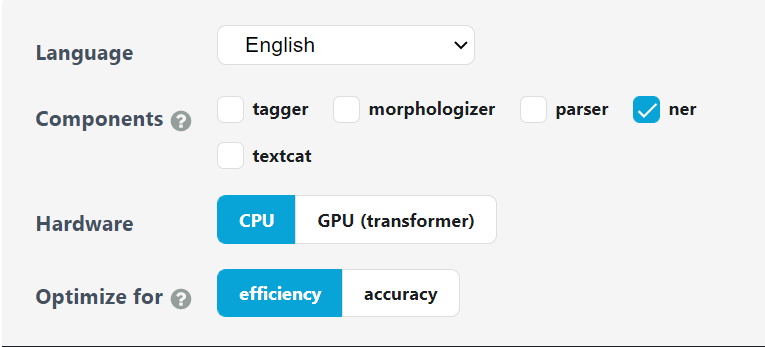

- Once the configurations are set, you can download it.

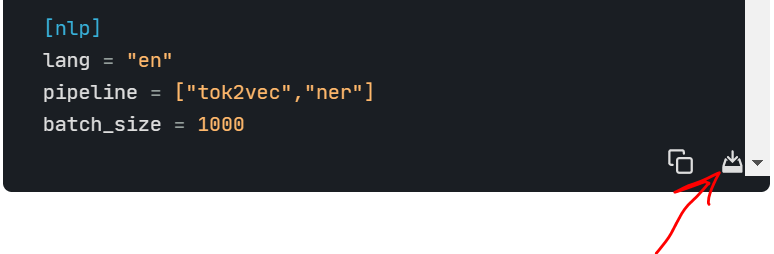

### Step-4 : Filling the Config file 

Go to the directory where base_config.cfg is stored and then run this command

python -m spacy init fill-config base_config.cfg config.cfg

### Step-5 : Run the Training configuration

In [ ]:
python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy 

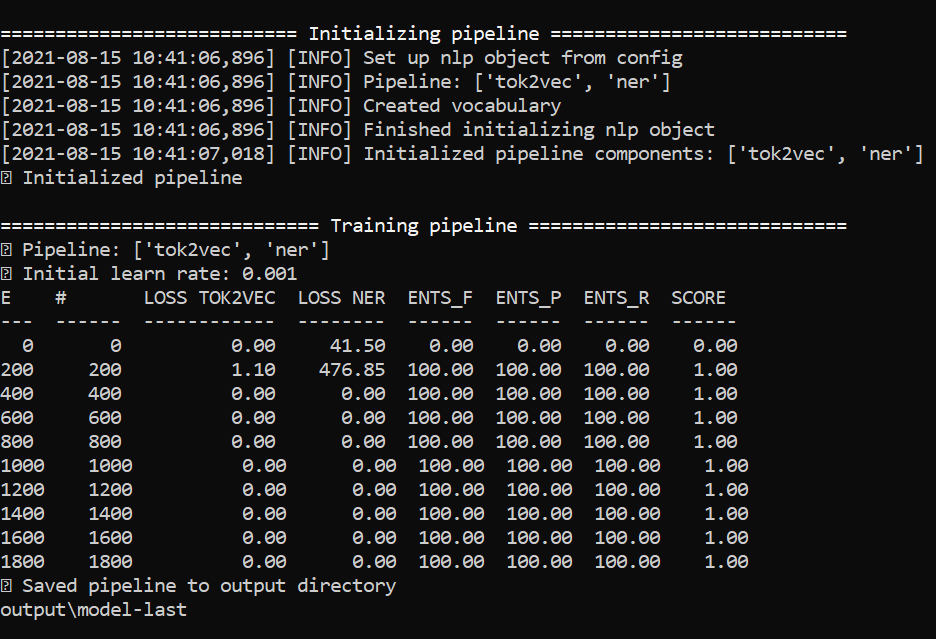

In [45]:
nlp1 = spacy.load(r".\output\model-last") #load the best model
doc = nlp1("""
          OpenAI официально (https://openai.com/index/march-funding-updates/) закрыли раунд инвестиций, договорившись о привлечении $40 миллиардов долларов при оценке в $300B. На данный момент есть лишь одна непубличная компания с оценкой выше — SpaceX; ByteDance упал до ~$215B (а некогда стоил все $400B). ТРИСТА МИЛЛИАРДОВ оценки — это 35-ое место среди всех публичных компаний, вот несколько соседей: Coca-Cola ($308B), Alibaba ($320B), Samsung ($263B), Toyota ($233B).""") # input sample text

spacy.displacy.render(doc, style="ent", jupyter=True) # display in Jupyter

In [48]:
import spacy

# 1. Загружаем русскую модель spaCy с лемматизатором
try:
    nlp = spacy.load("ru_core_news_md")
except OSError:
    print("Модель 'ru_core_news_md' не найдена. Попробуйте 'ru_core_news_sm'.")
    print("Установите модель: python -m spacy download ru_core_news_md")
    try:
        nlp = spacy.load("ru_core_news_sm")
    except OSError:
        print("Модель 'ru_core_news_sm' не найдена. Установите её:")
        print("python -m spacy download ru_core_news_sm")
        exit()

# 2. Текст для обработки
text = "Мама очень быстро мыла раму, но не вымыла её окончательно, стоя на шатком стуле."

# 3. Определяем множество POS-тегов, которые нужно ИСКЛЮЧИТЬ
excluded_pos = {'ADP', 'ADV', 'VERB', 'PART'} # Предлог, Наречие, Глагол(вкл. прич/дееприч), Частица

# 4. Обрабатываем текст с помощью spaCy
doc = nlp(text)

# 5. Фильтруем токены и берем их ЛЕММЫ
filtered_lemmas = []
print("--- Детальный анализ ---")
for token in doc:
    is_excluded = token.pos_ in excluded_pos
    is_punct = token.is_punct

    # Выводим информацию для наглядности, включая лемму
    print(f"Токен: '{token.text}'\t POS: {token.pos_}\t Лемма: '{token.lemma_}'\t Исключить: {is_excluded or is_punct}")

    if not is_excluded and not is_punct:
        # Если часть речи НЕ входит в список исключений И это не пунктуация,
        # добавляем ЛЕММУ токена в результат
        filtered_lemmas.append(token.lemma_)

# 6. Выводим результат
print("\n--- Результат ---")
print("Исходный текст:", text)
print("Отфильтрованные леммы:", filtered_lemmas)
# Ожидаемый результат (примерно): ['мама', 'рама', 'она', 'шаткий', 'стул']
# Обрати внимание: "Мама" -> "мама", "раму" -> "рама", "её" -> "она", "шатком" -> "шаткий", "стуле" -> "стул"

--- Детальный анализ ---
Токен: '—'	 POS: PUNCT	 Исключить: True
Токен: ' '	 POS: SPACE	 Исключить: False
Токен: 'OpenAI'	 POS: PROPN	 Исключить: False
Токен: 'официально'	 POS: ADV	 Исключить: True
Токен: '('	 POS: PUNCT	 Исключить: True
Токен: 'https://openai.com/index/march-funding-updates/'	 POS: PROPN	 Исключить: False
Токен: ')'	 POS: PUNCT	 Исключить: True
Токен: 'закрыли'	 POS: VERB	 Исключить: True
Токен: 'раунд'	 POS: NOUN	 Исключить: False
Токен: 'инвестиций'	 POS: NOUN	 Исключить: False
Токен: ','	 POS: PUNCT	 Исключить: True
Токен: 'договорившись'	 POS: VERB	 Исключить: True
Токен: 'о'	 POS: ADP	 Исключить: True
Токен: 'привлечении'	 POS: NOUN	 Исключить: False
Токен: '$'	 POS: SYM	 Исключить: False
Токен: '40'	 POS: NUM	 Исключить: False
Токен: 'миллиардов'	 POS: NOUN	 Исключить: False
Токен: 'долларов'	 POS: NOUN	 Исключить: False
Токен: 'при'	 POS: ADP	 Исключить: True
Токен: 'оценке'	 POS: NOUN	 Исключить: False
Токен: 'в'	 POS: ADP	 Исключить: True
Токен: '$'	 POS: NO